# Motivation:

According to Knuth, using linear Probing with filling rate α in a dictionary with M slots

On average:
- 1/2 ( 1 + 1/(1-α)) probes, if the element exists in the dictionary
- 1/2 ( 1 + 1/(1-α)**2 ) probes, if the element doesnt't exist in the dictionary

In our case, we have the liberty to add an element to a dictionary or discard it since we can generate a new one.


One might consider the following optimization:
- To search for an element inside the dicitonary, make at most O( 1/2 ( 1 + 1/(1-α)) ) propes.
- It is possible to exploit the discarding elements by excluding all elements that requires more than c0 * 1 + 1/(1-α))


The goal of this experiment is to determine c0 such that 0.95α elements are added to the dictionary. 


# Experiment Steps

For a given filling rate α, we would like to find the distribution of (nprobes, nelements that need nprobes to be inserted). Our initial guess this follows a Poisson Distribution. 


1. Determine the mean lamba of poisson distribution for given α
2. Plot the experimental distributions against the estimated poisson dist





In [1]:
import os
import importlib


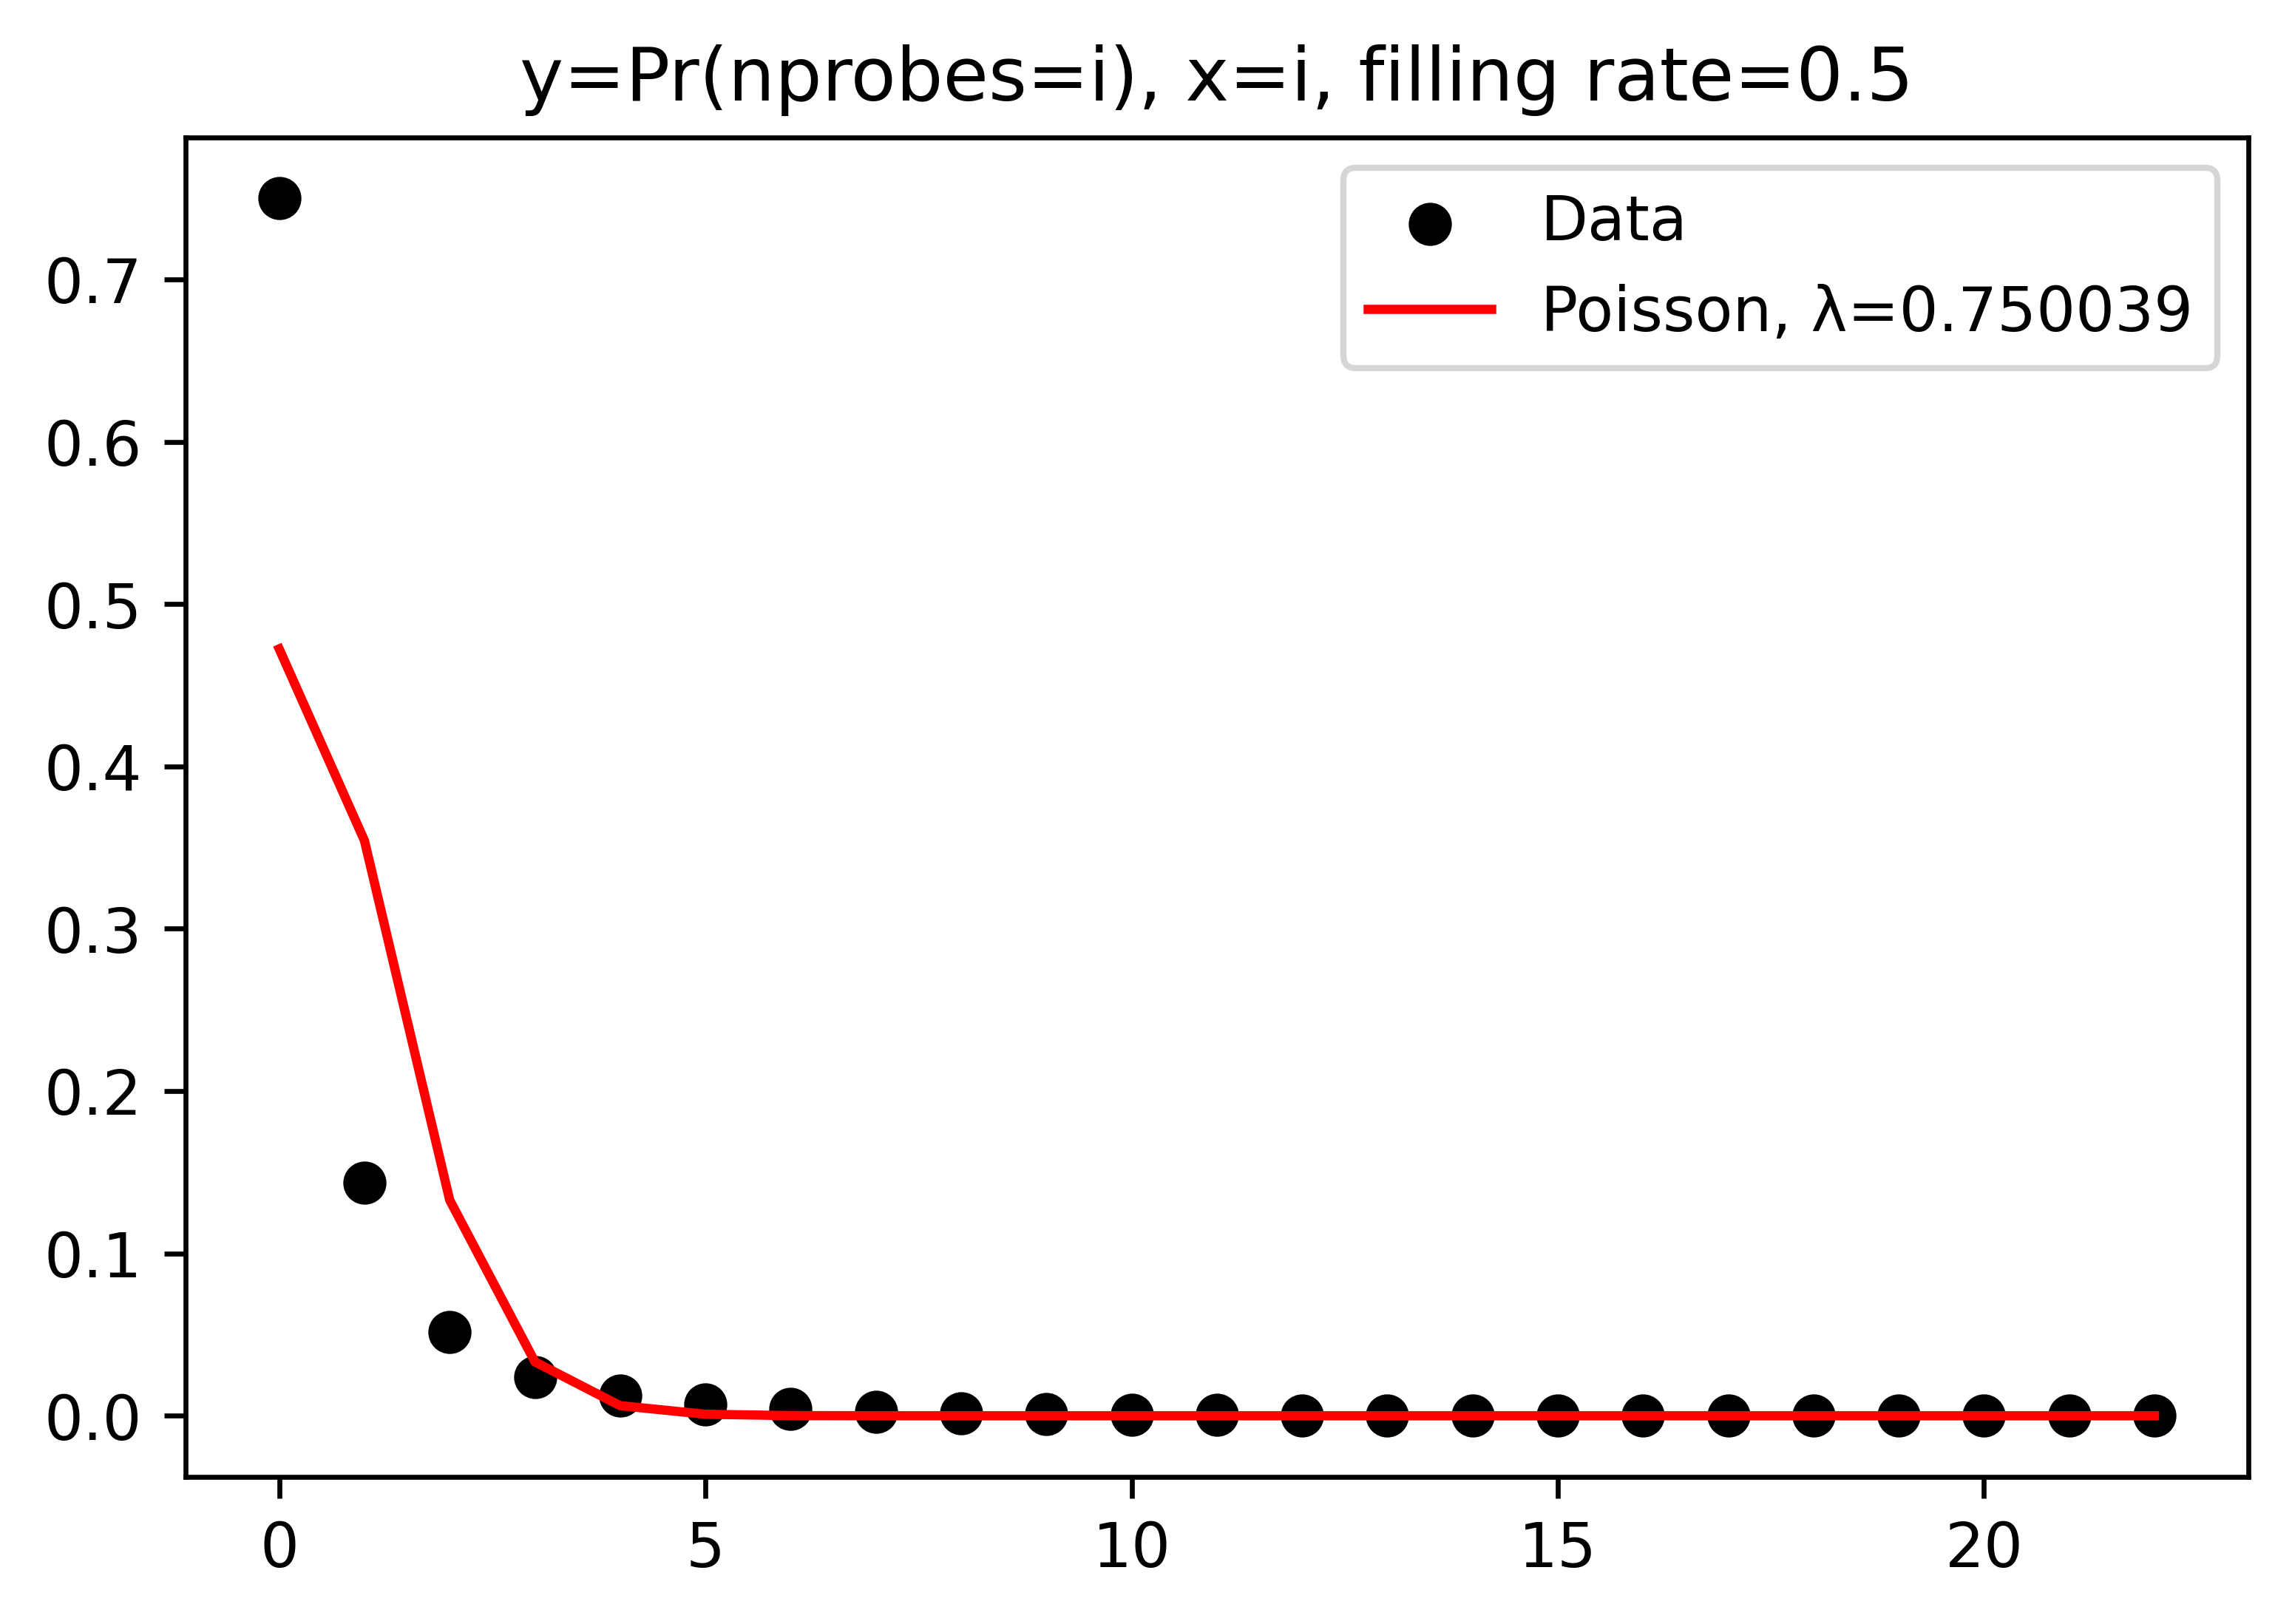

None

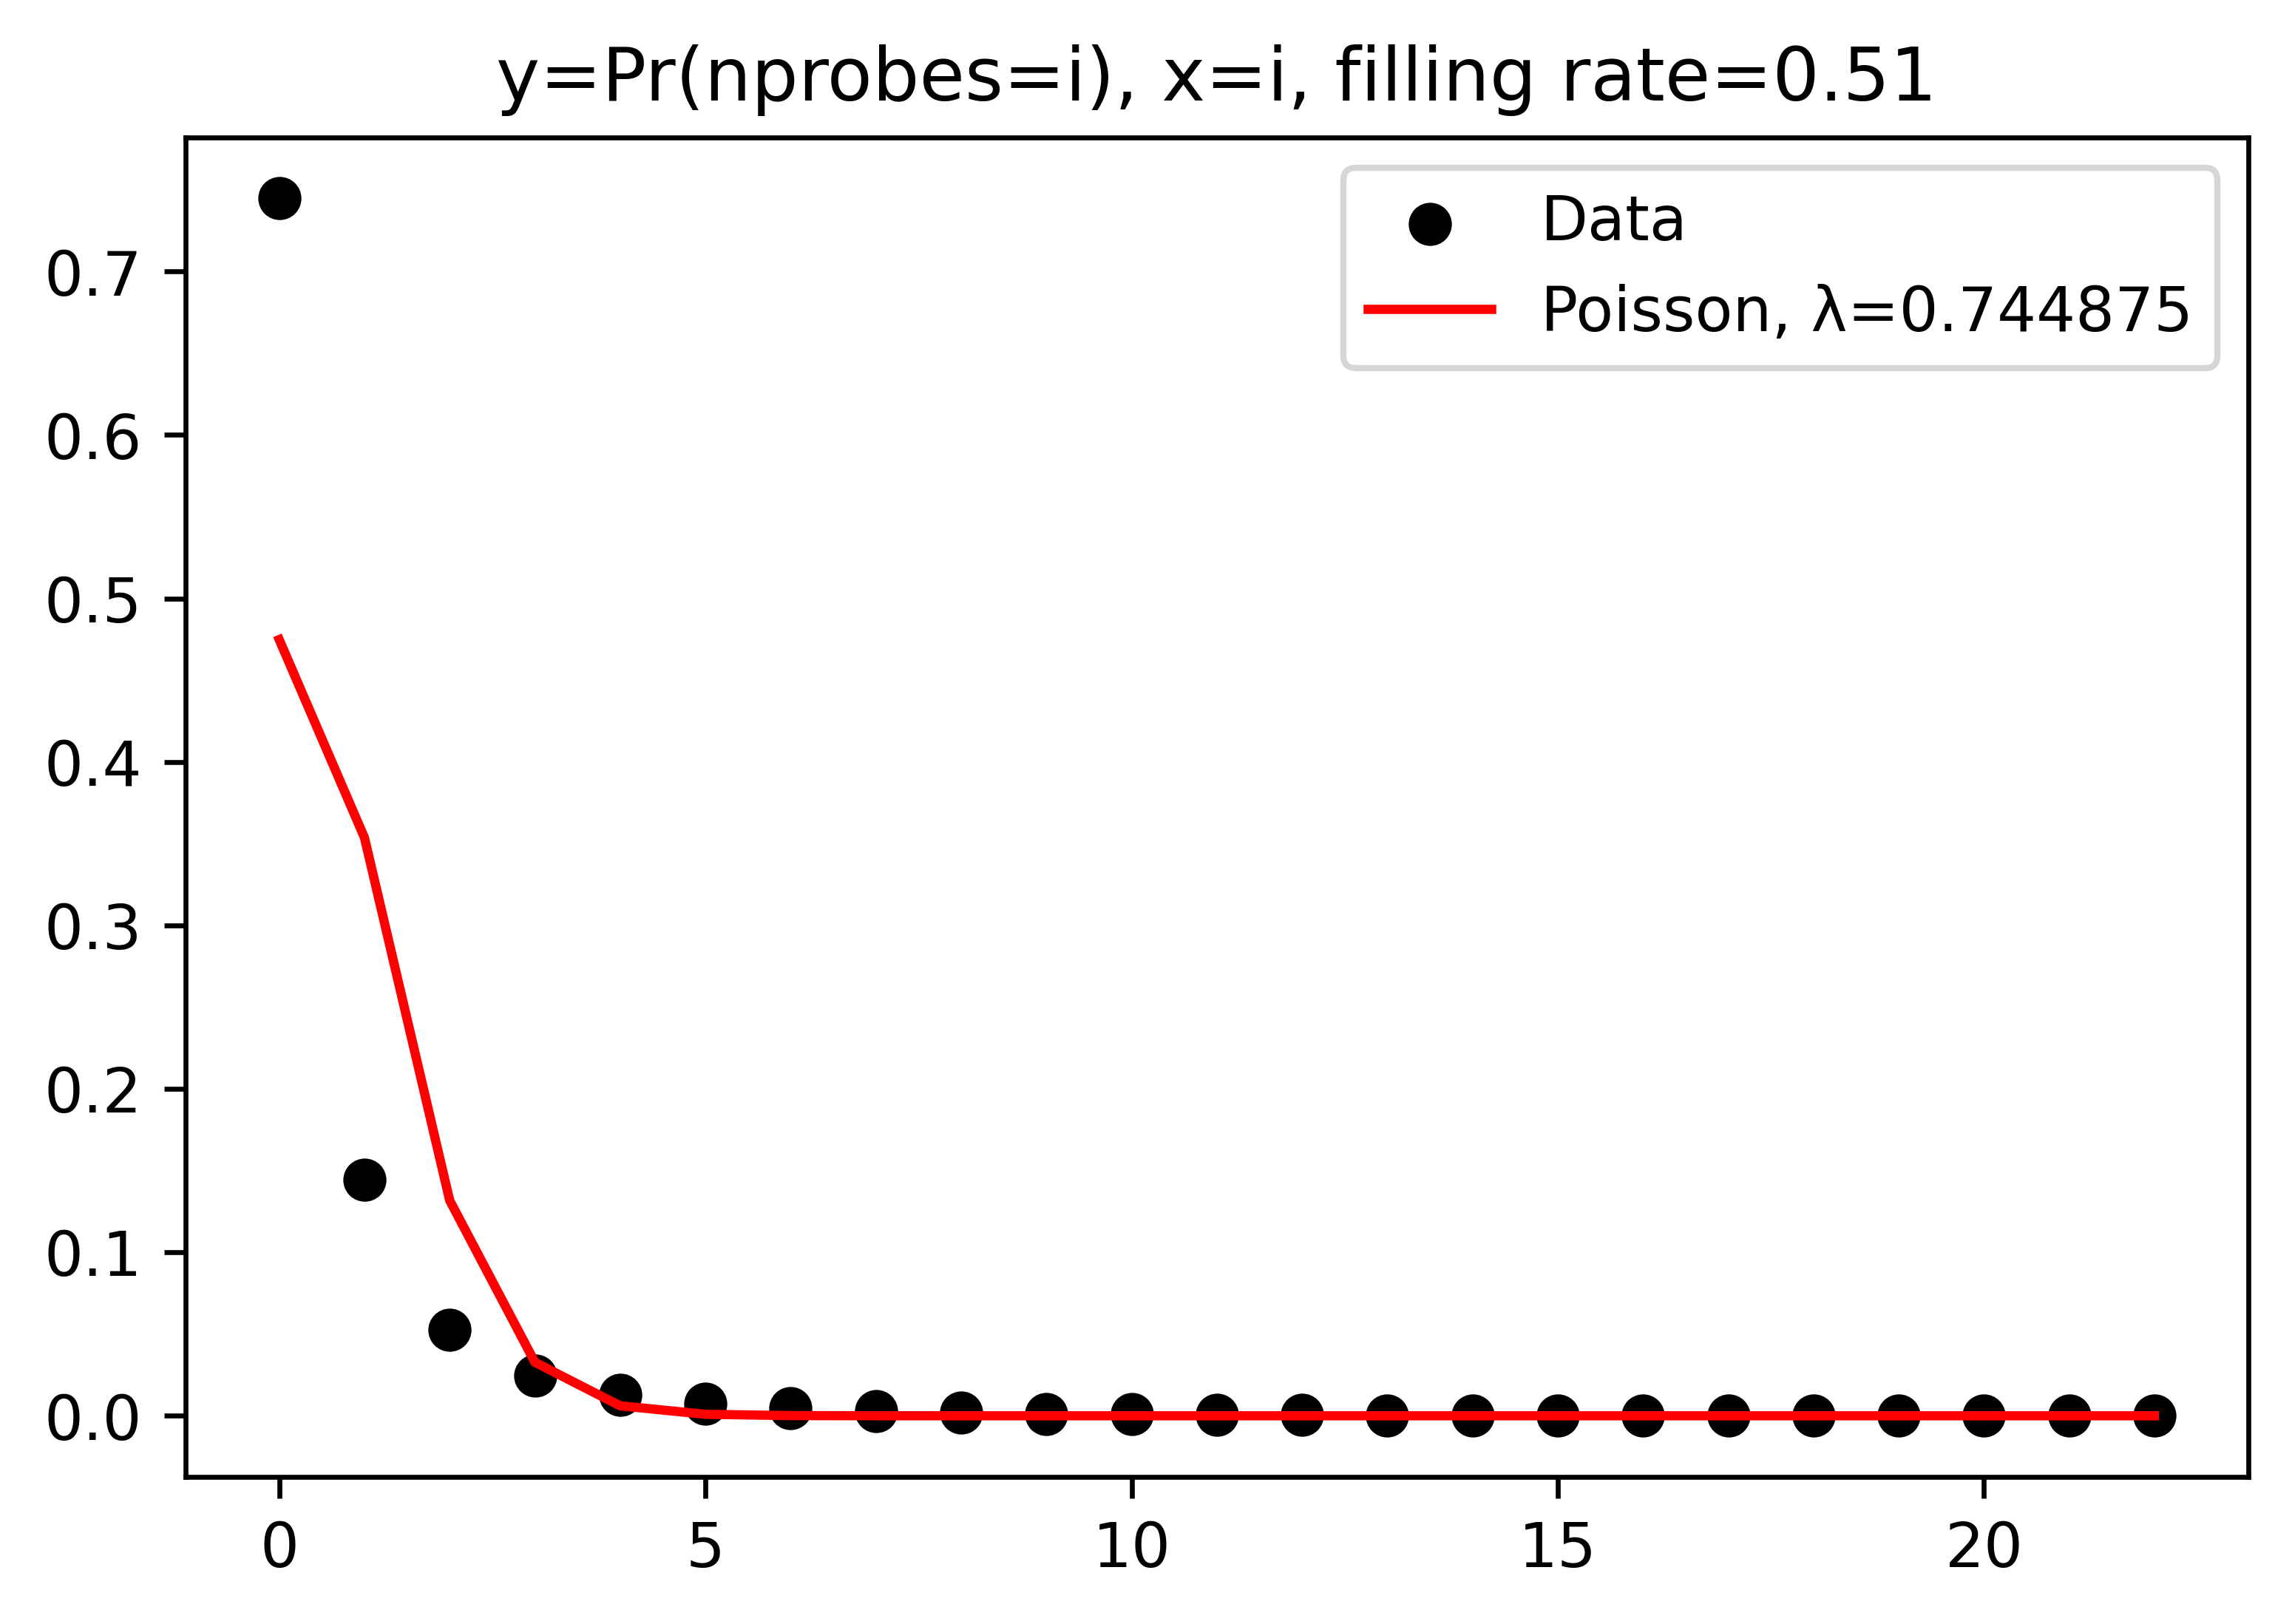

None

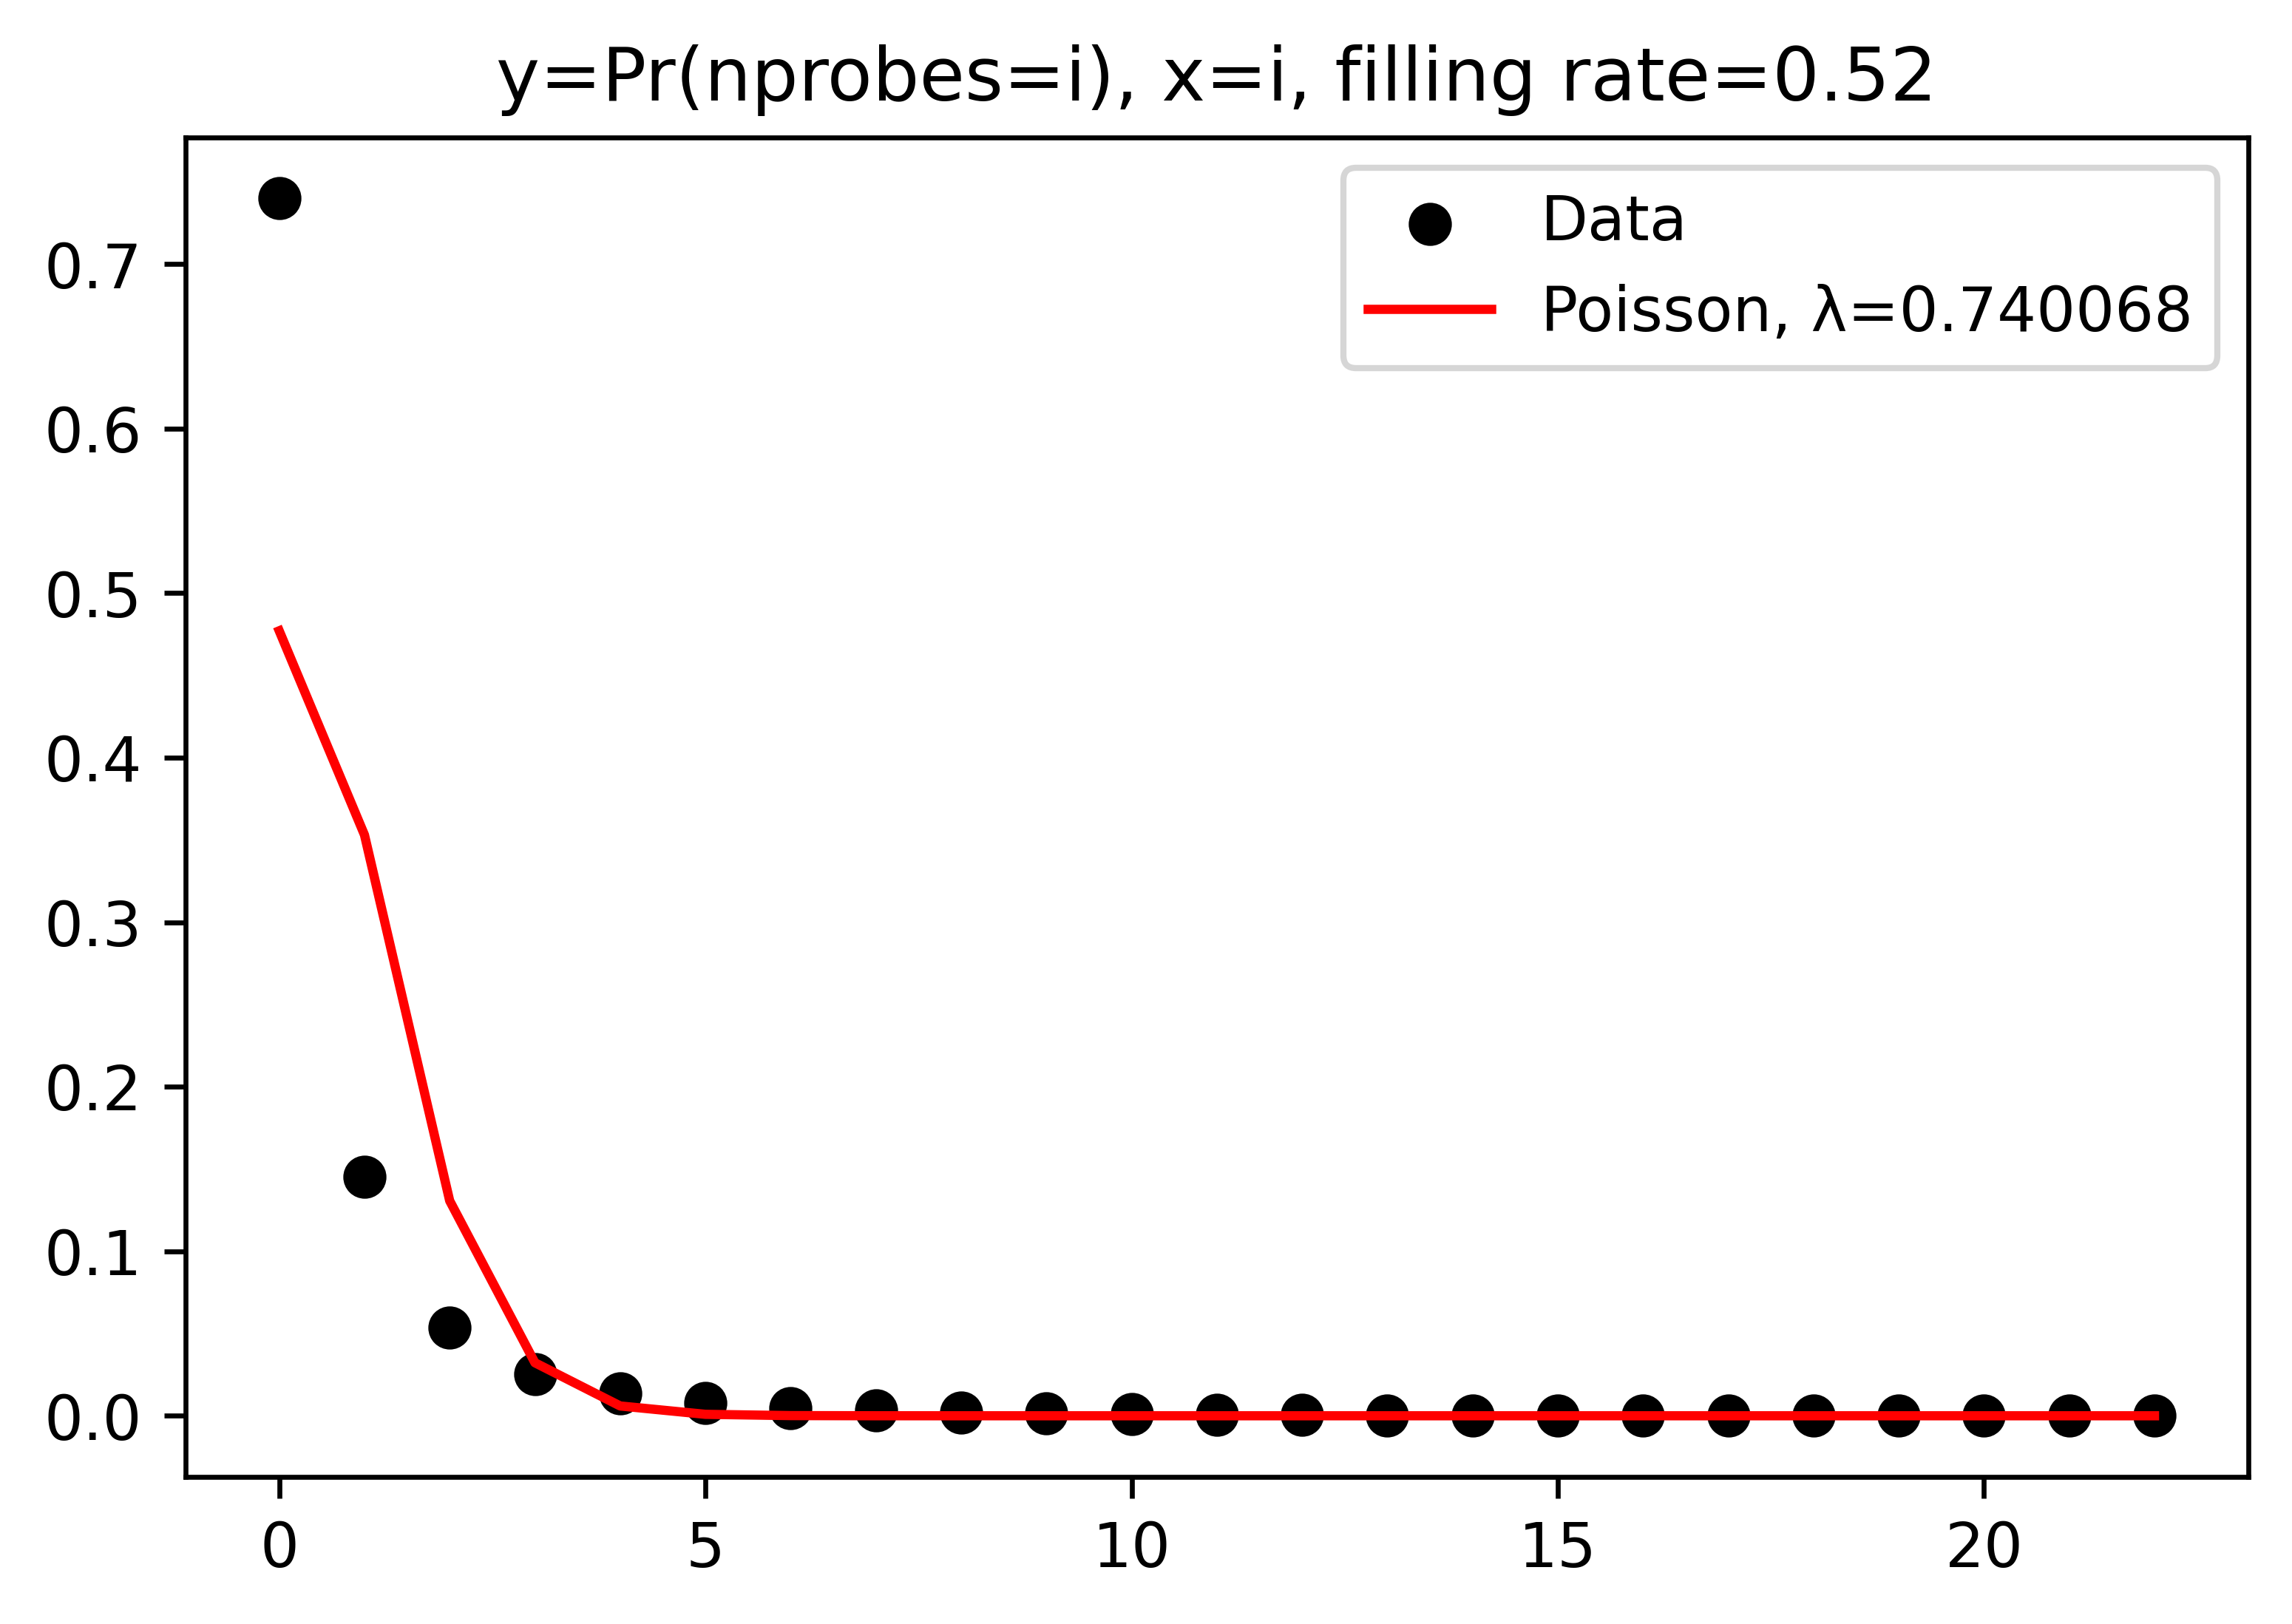

None

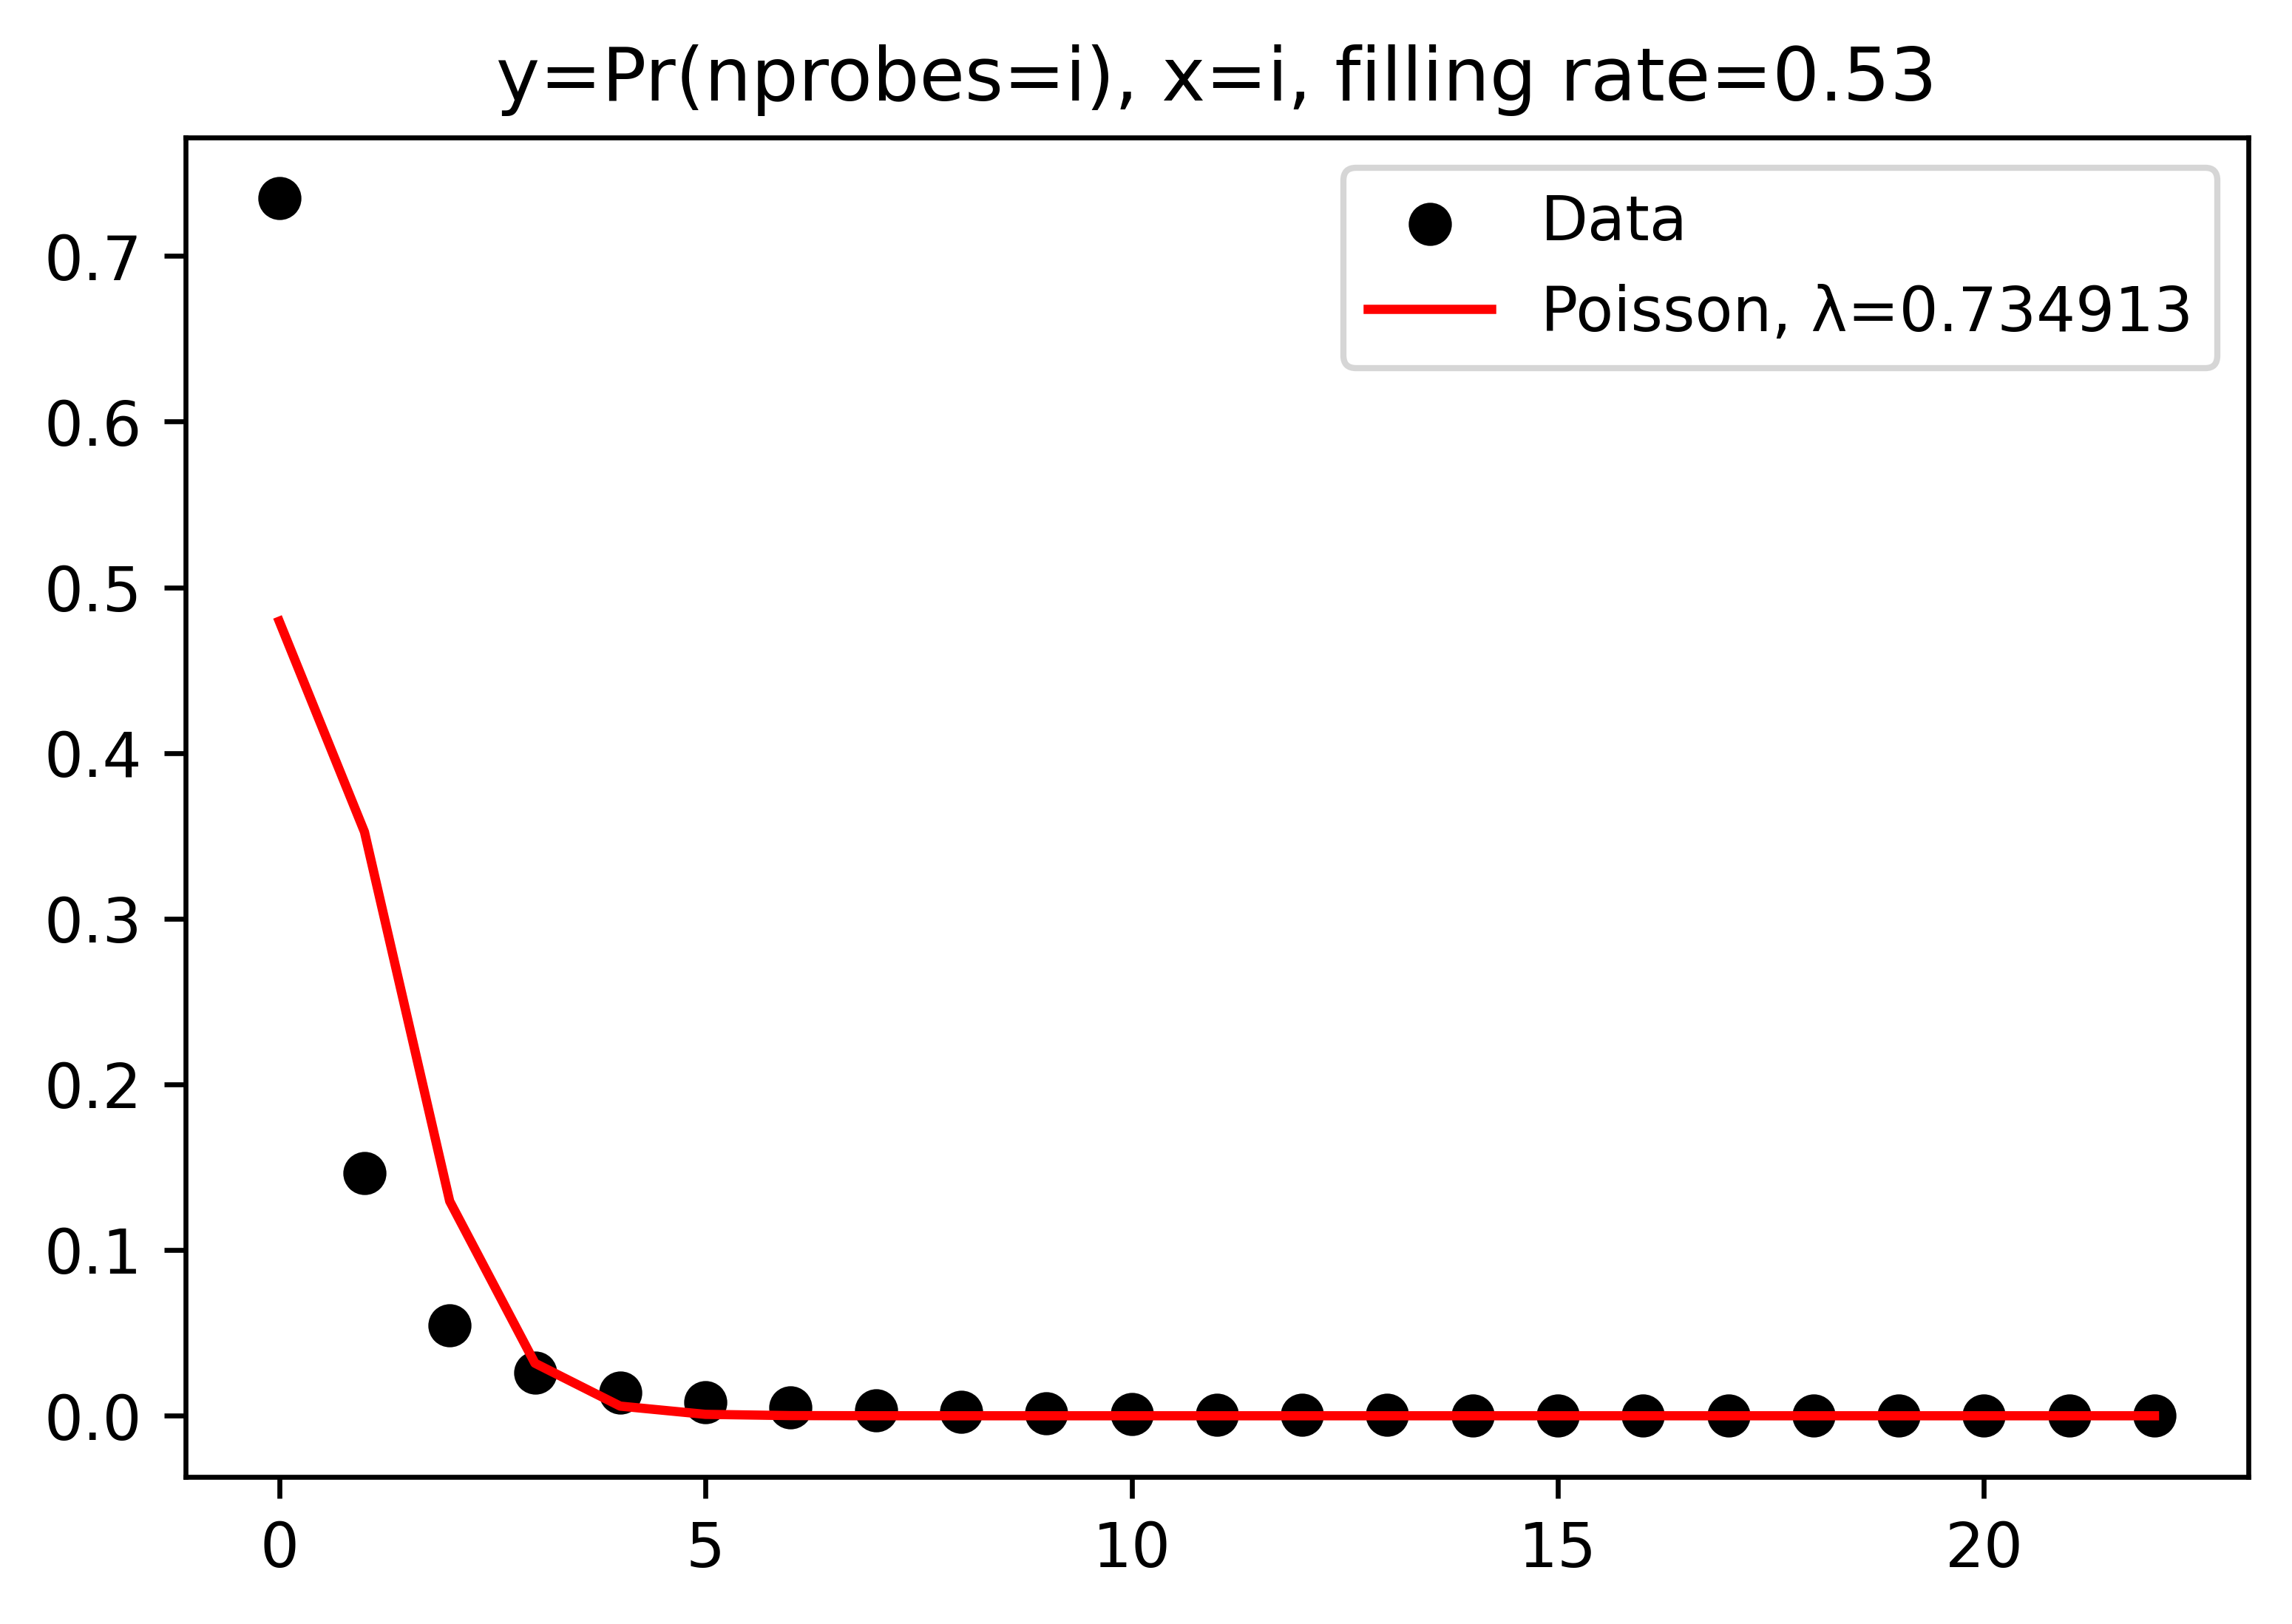

None

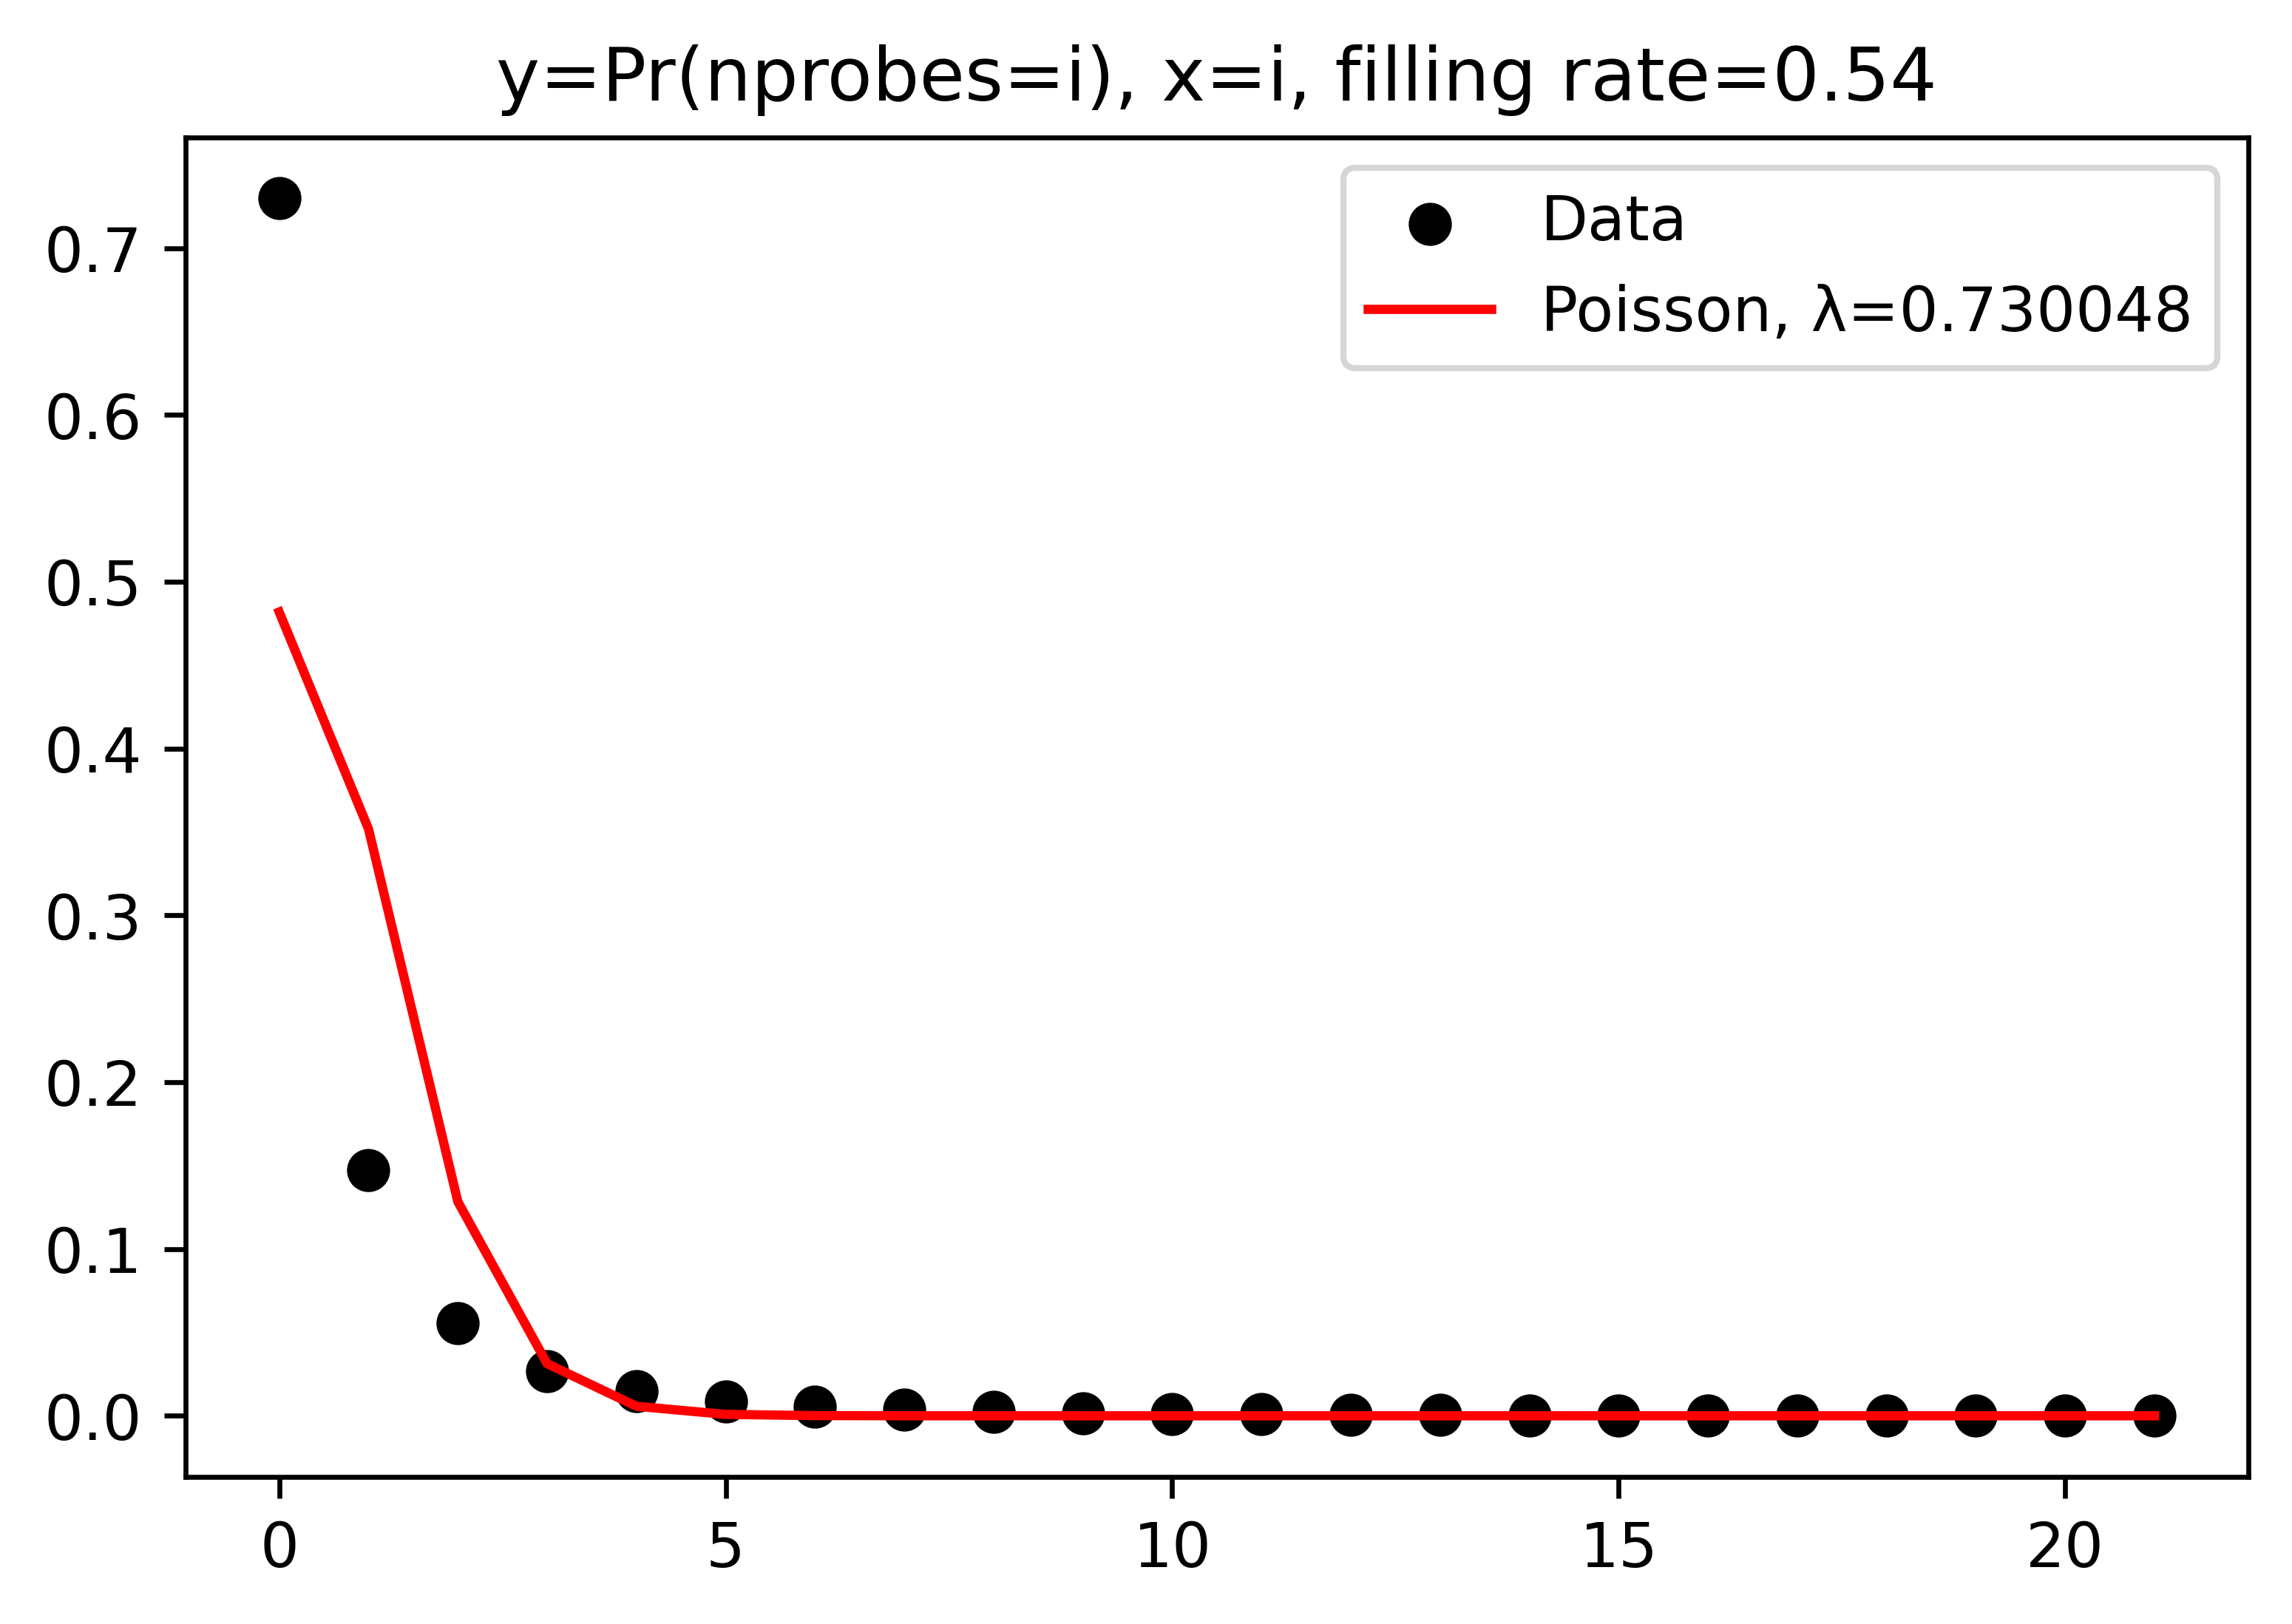

None

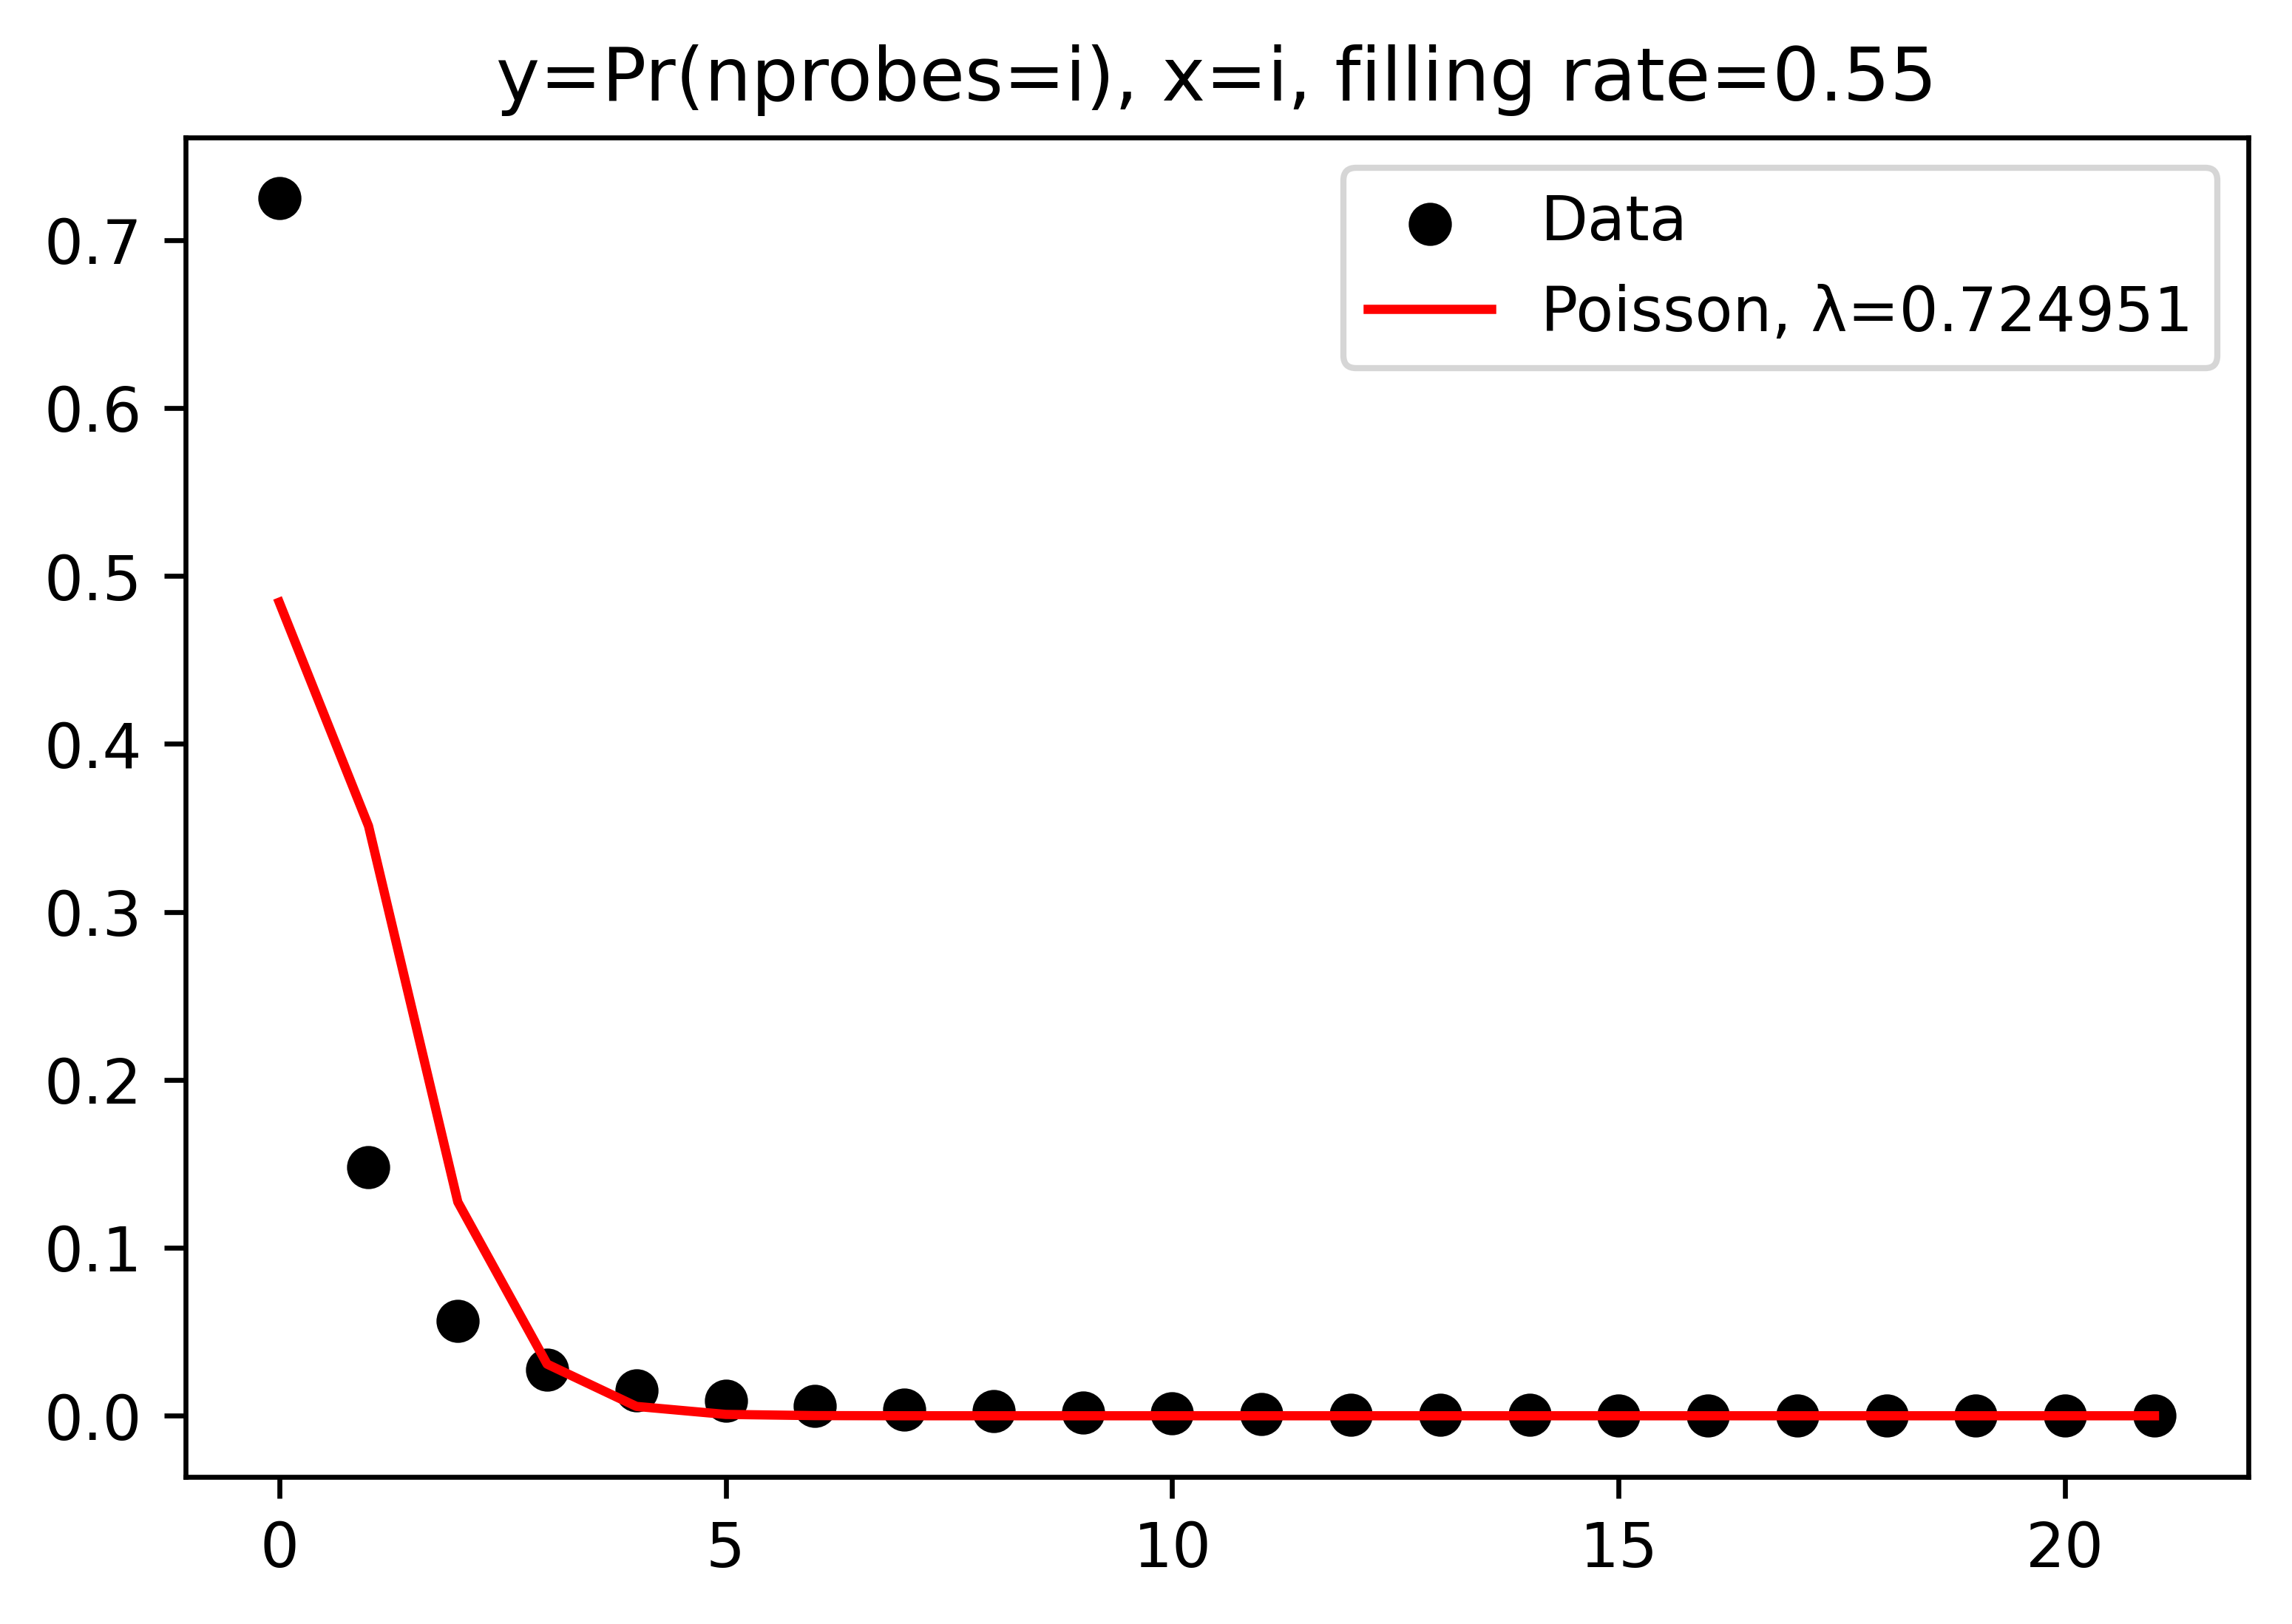

None

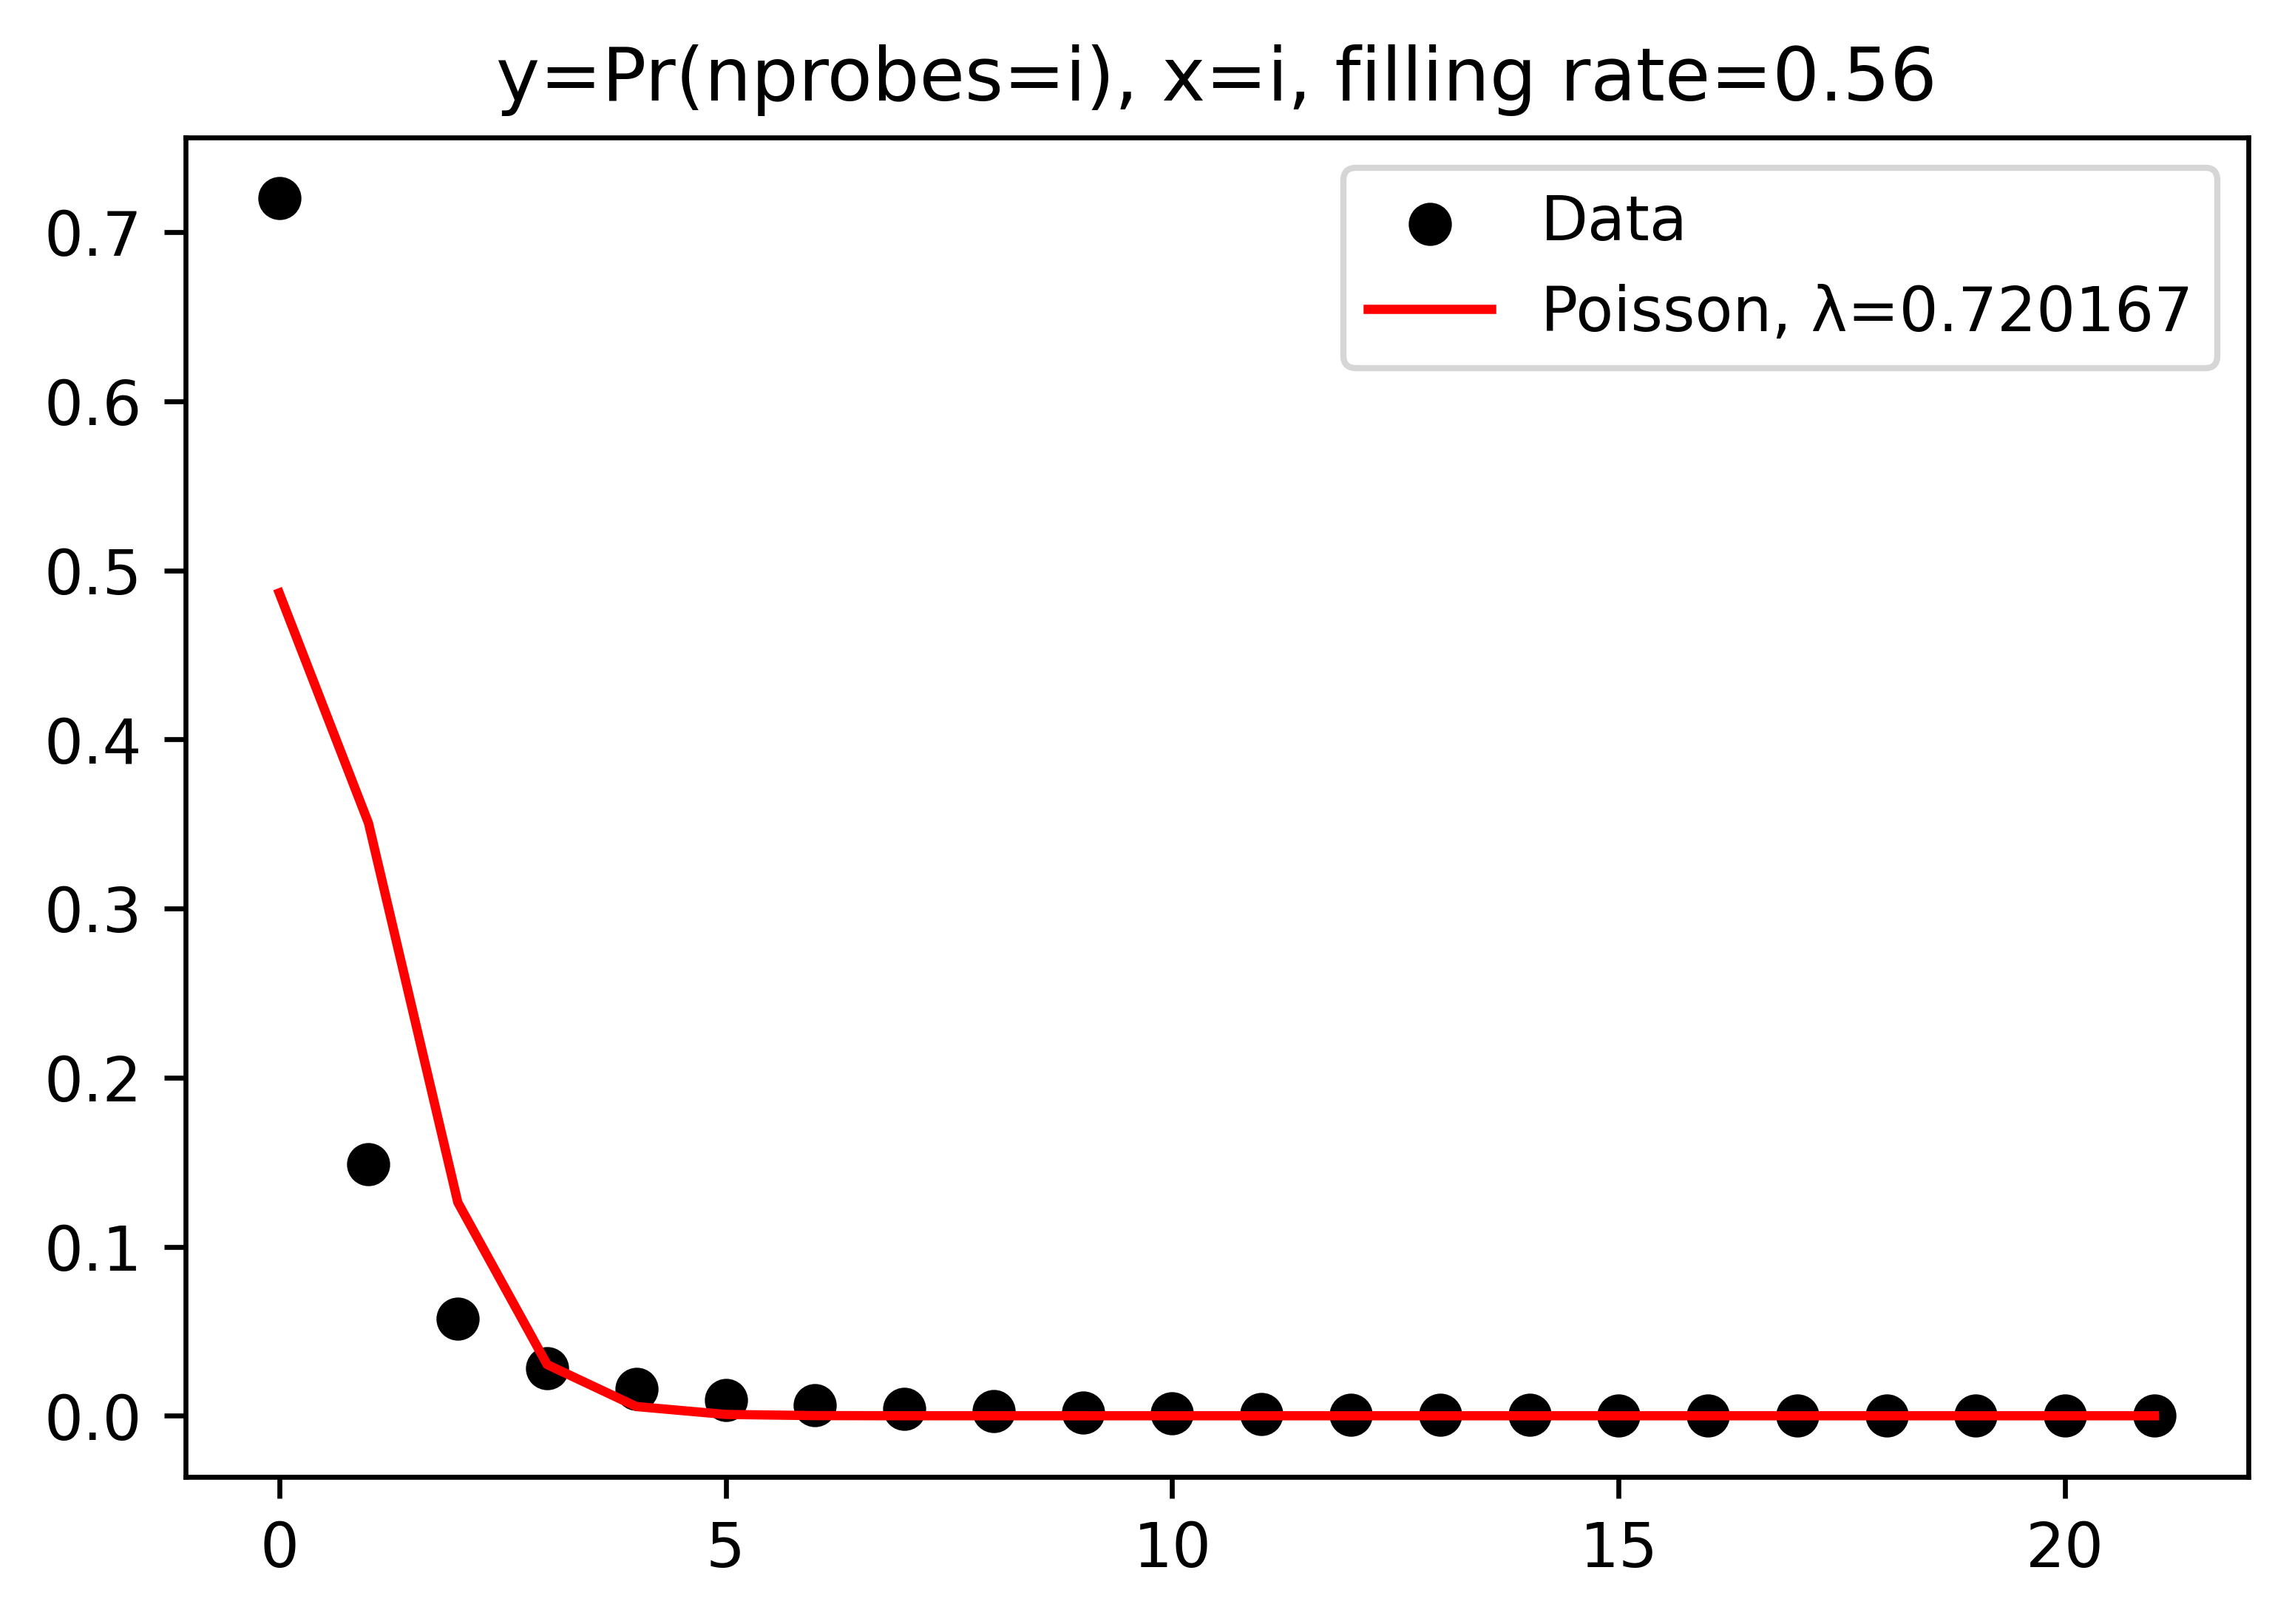

None

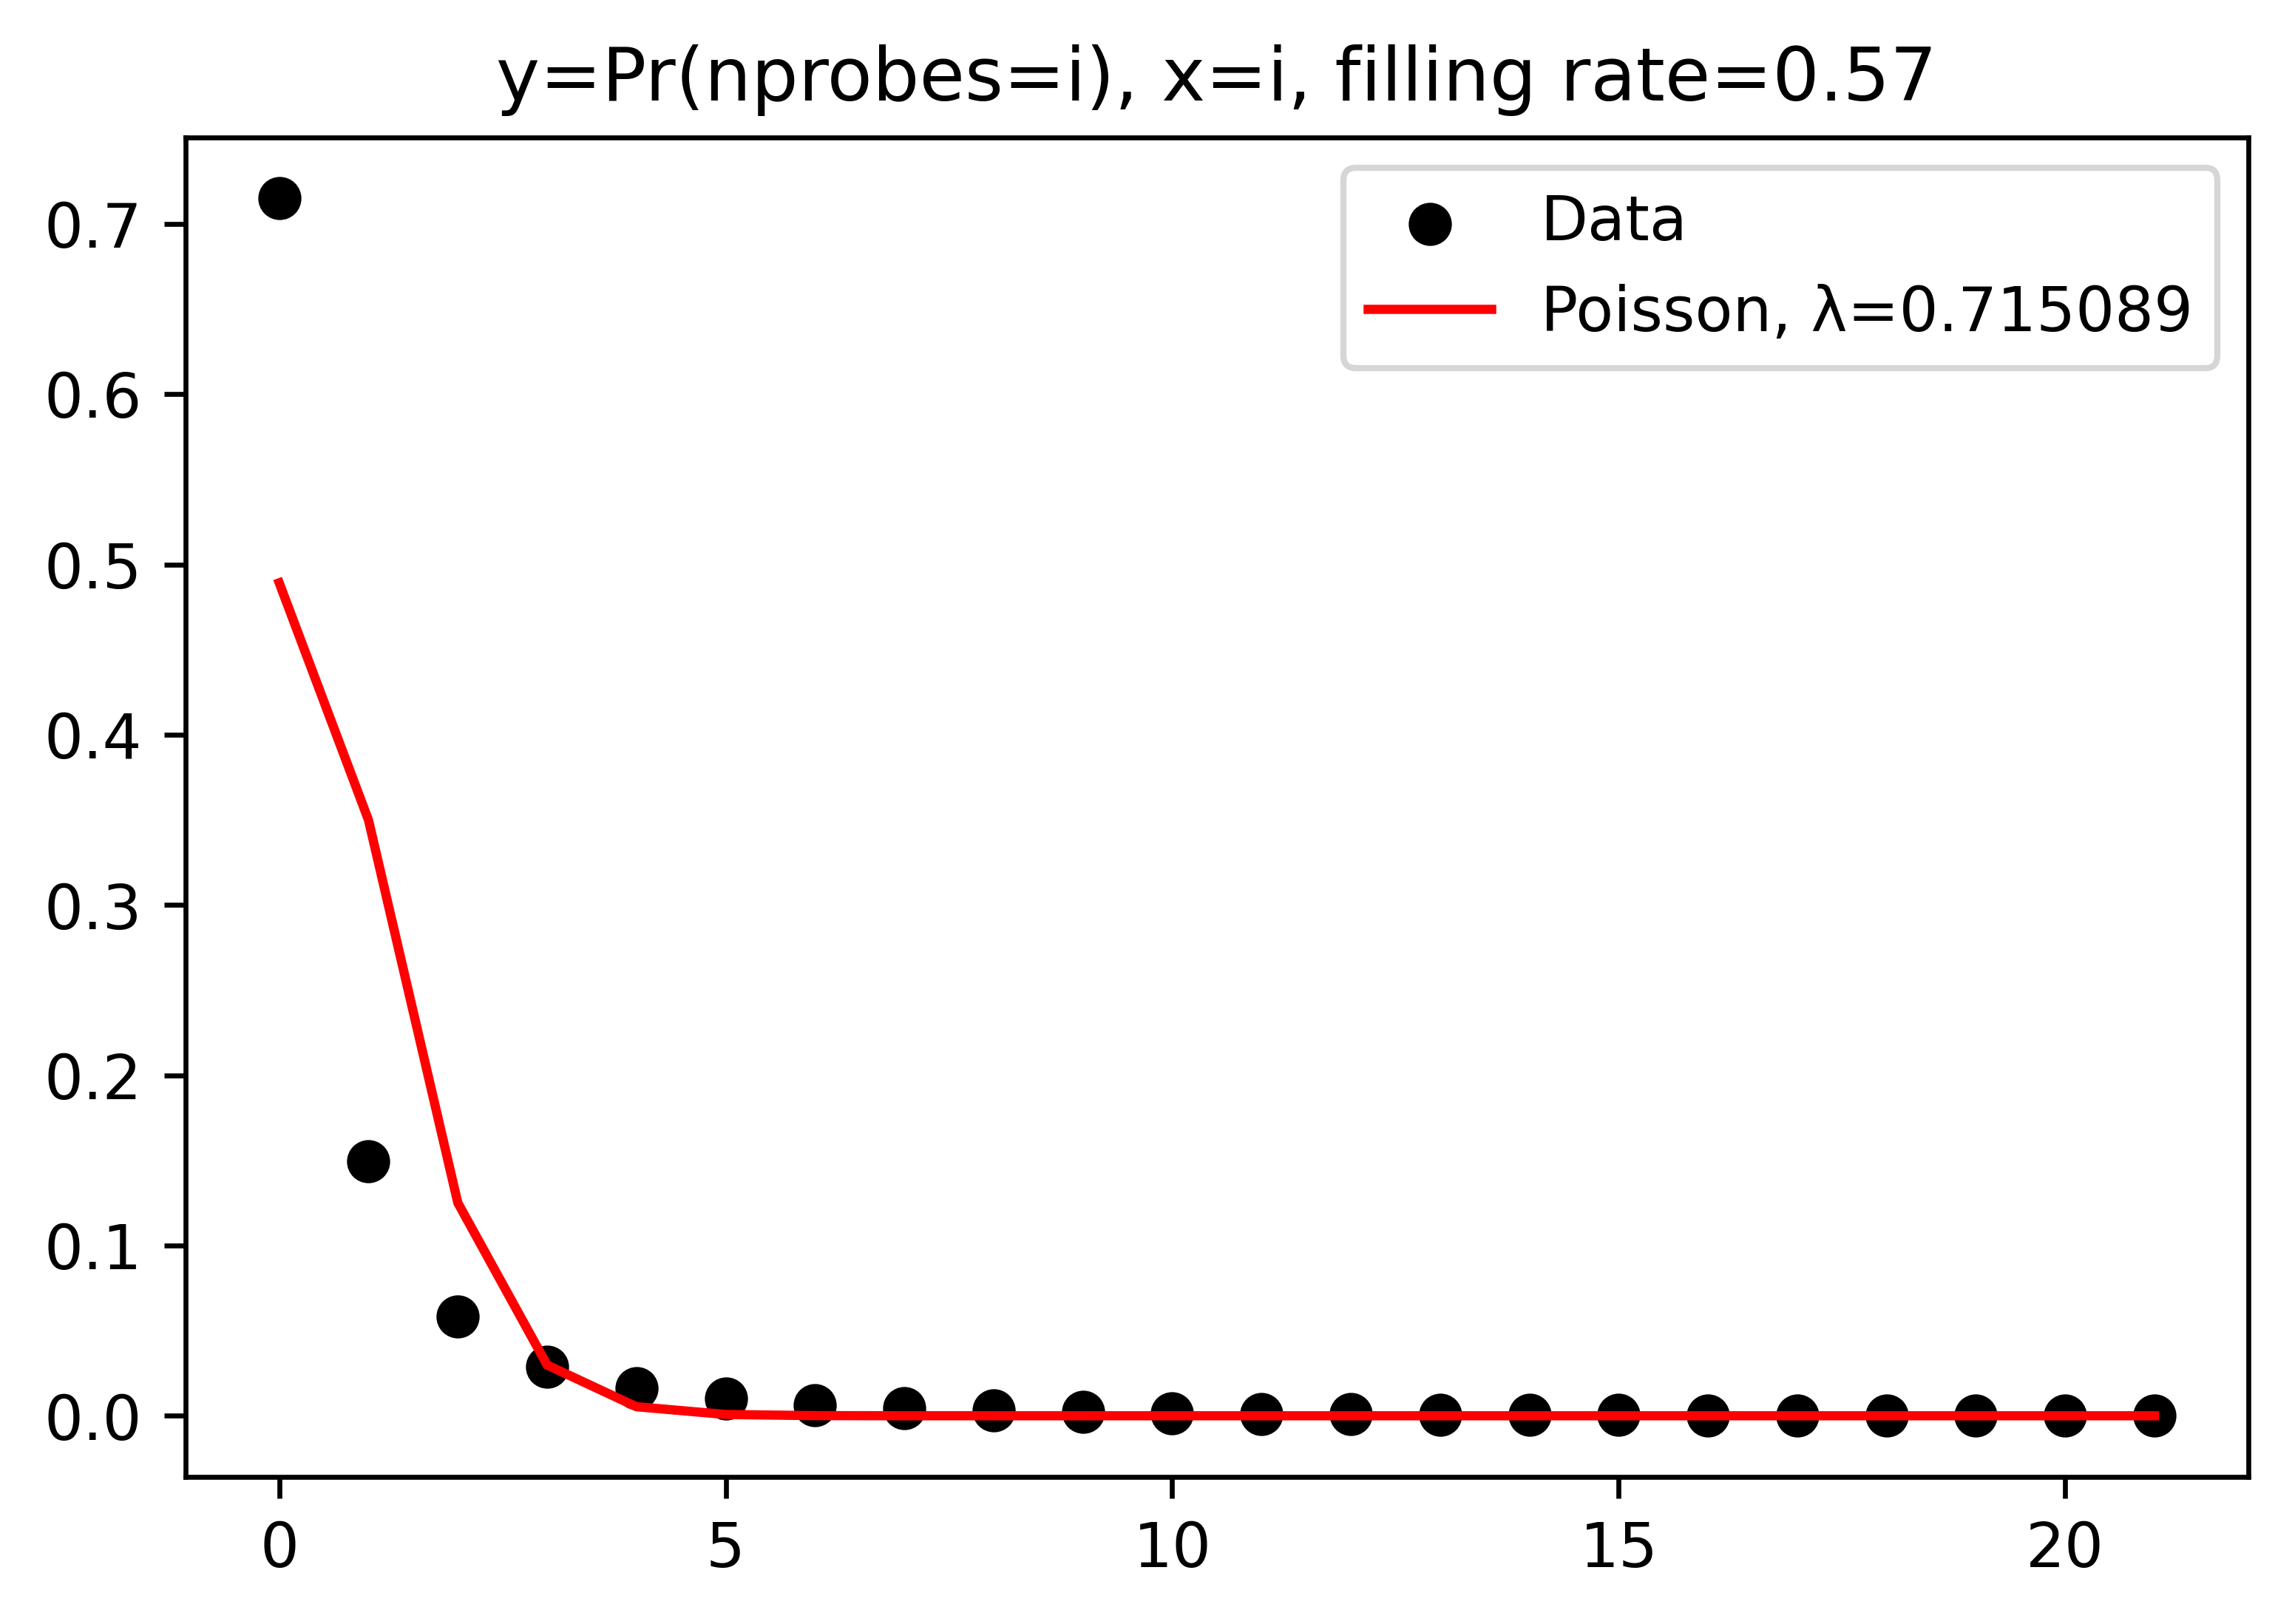

None

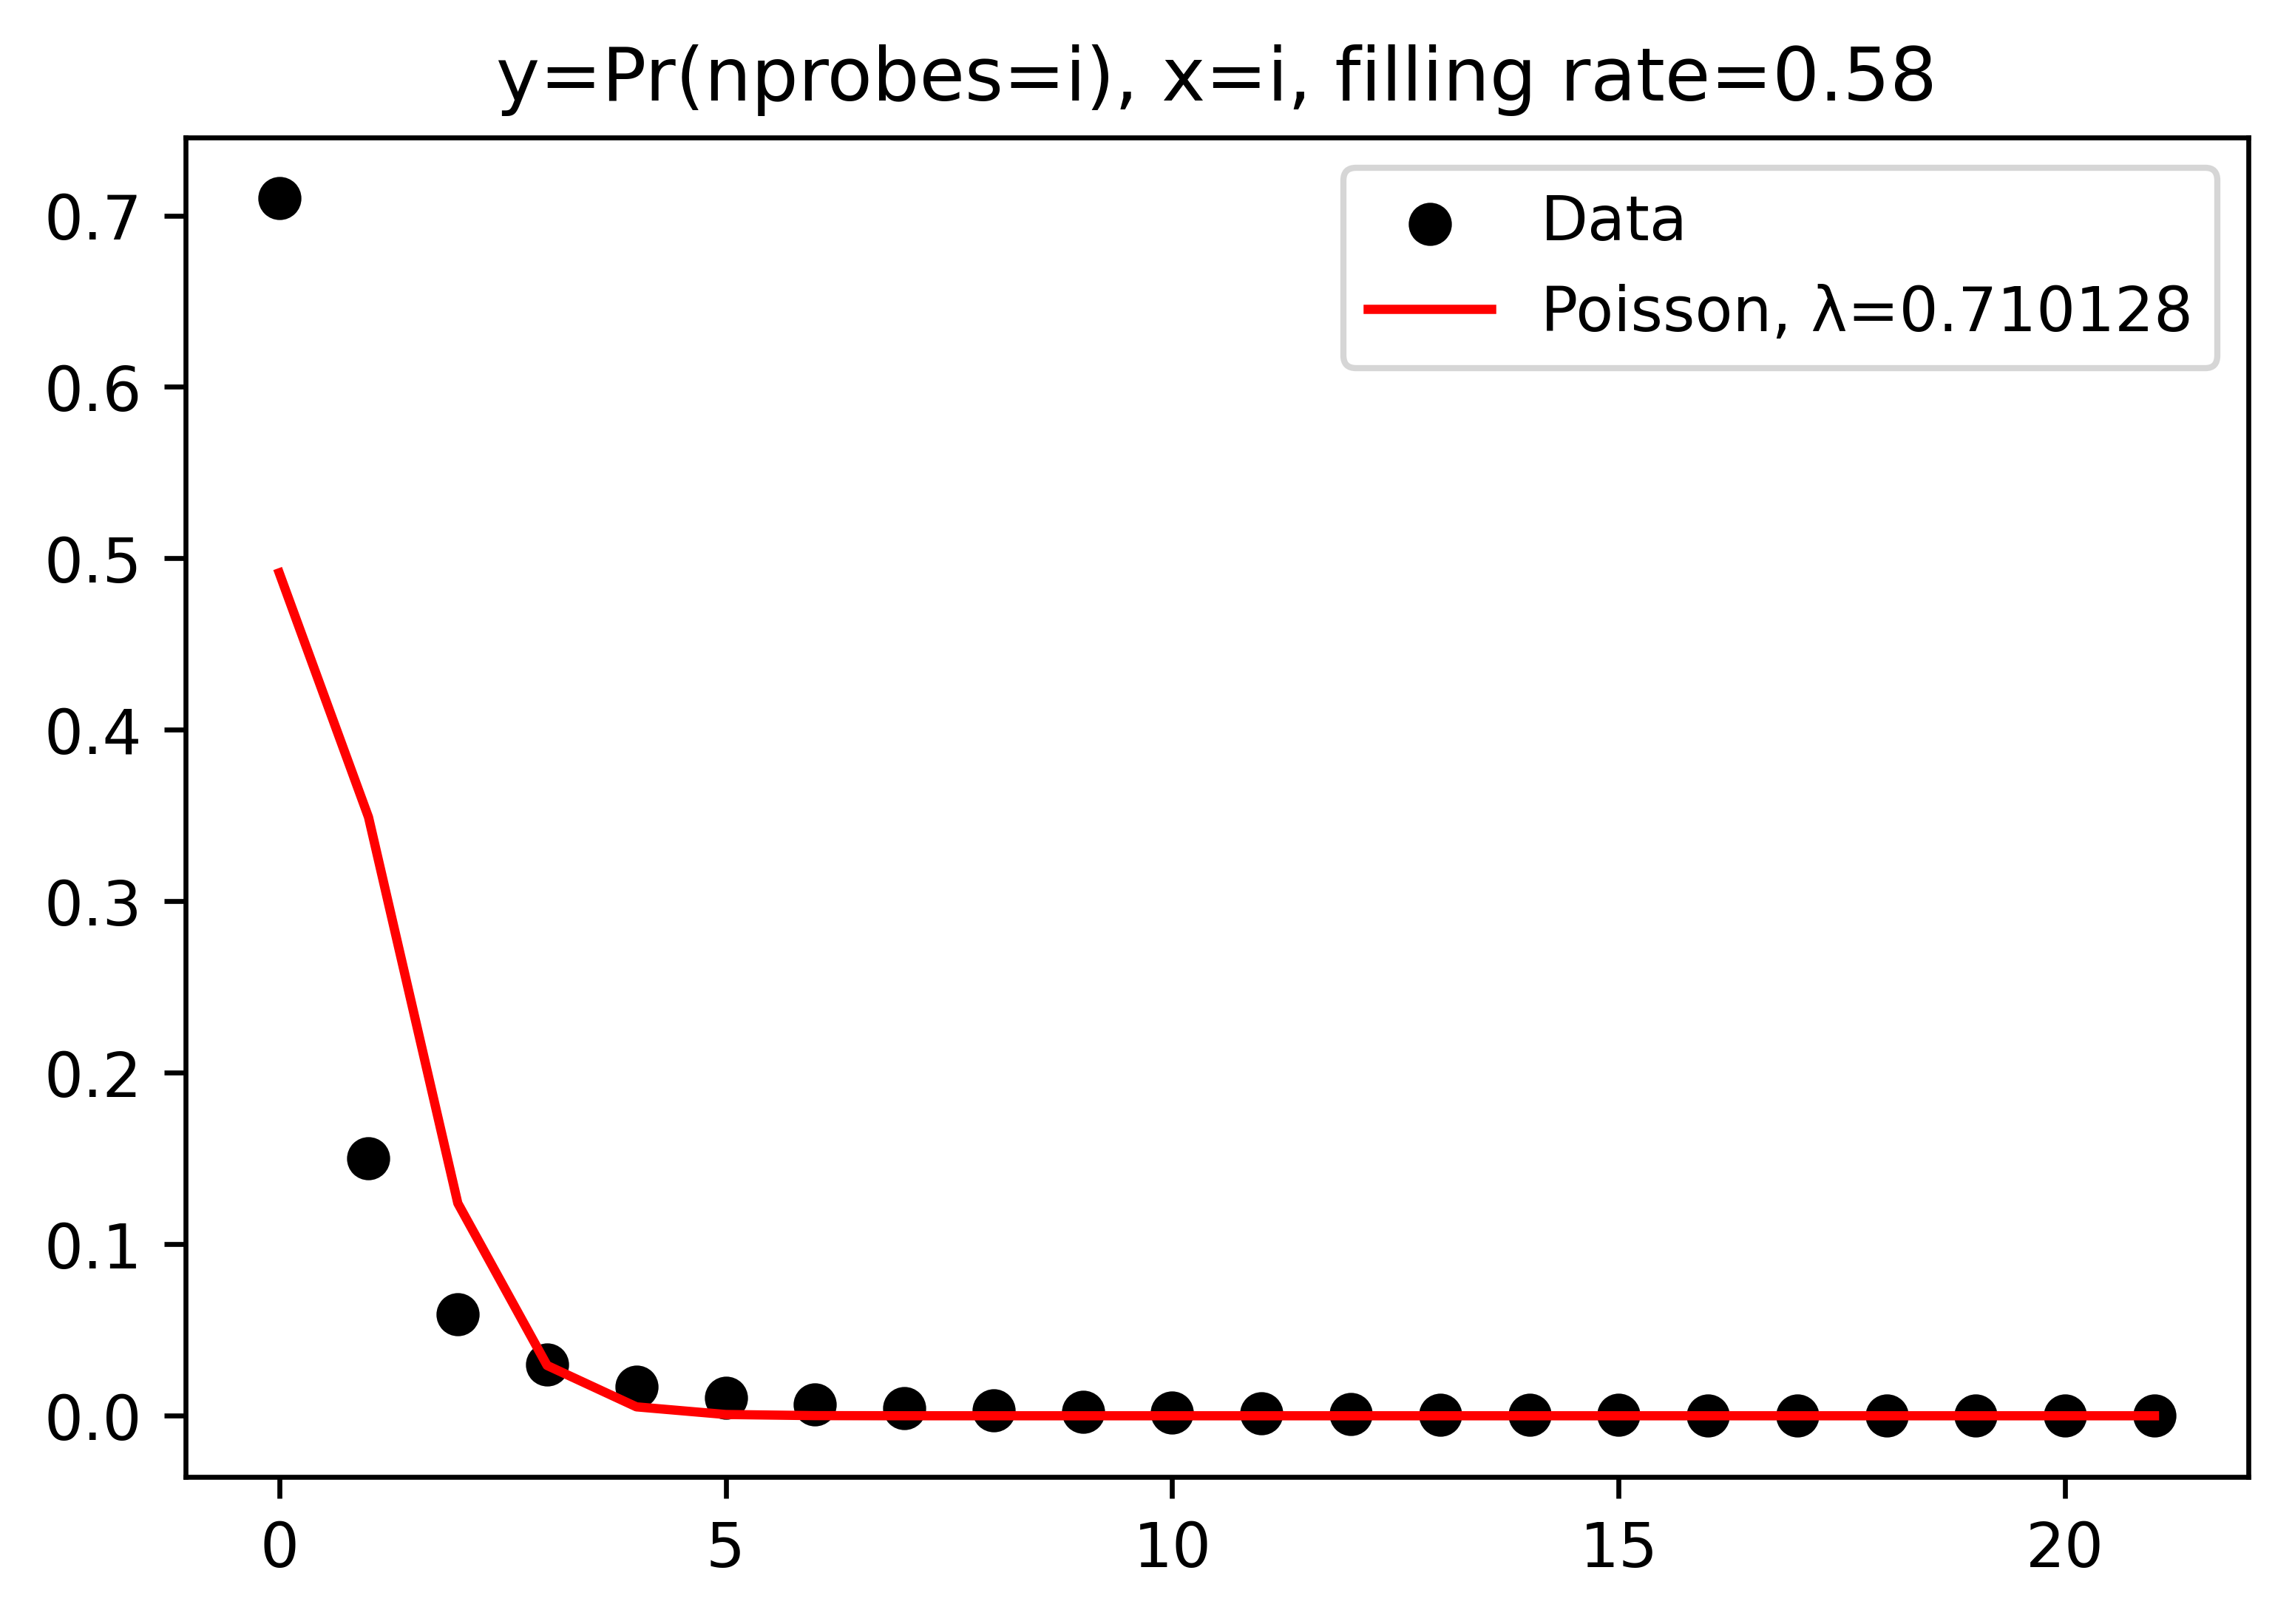

None

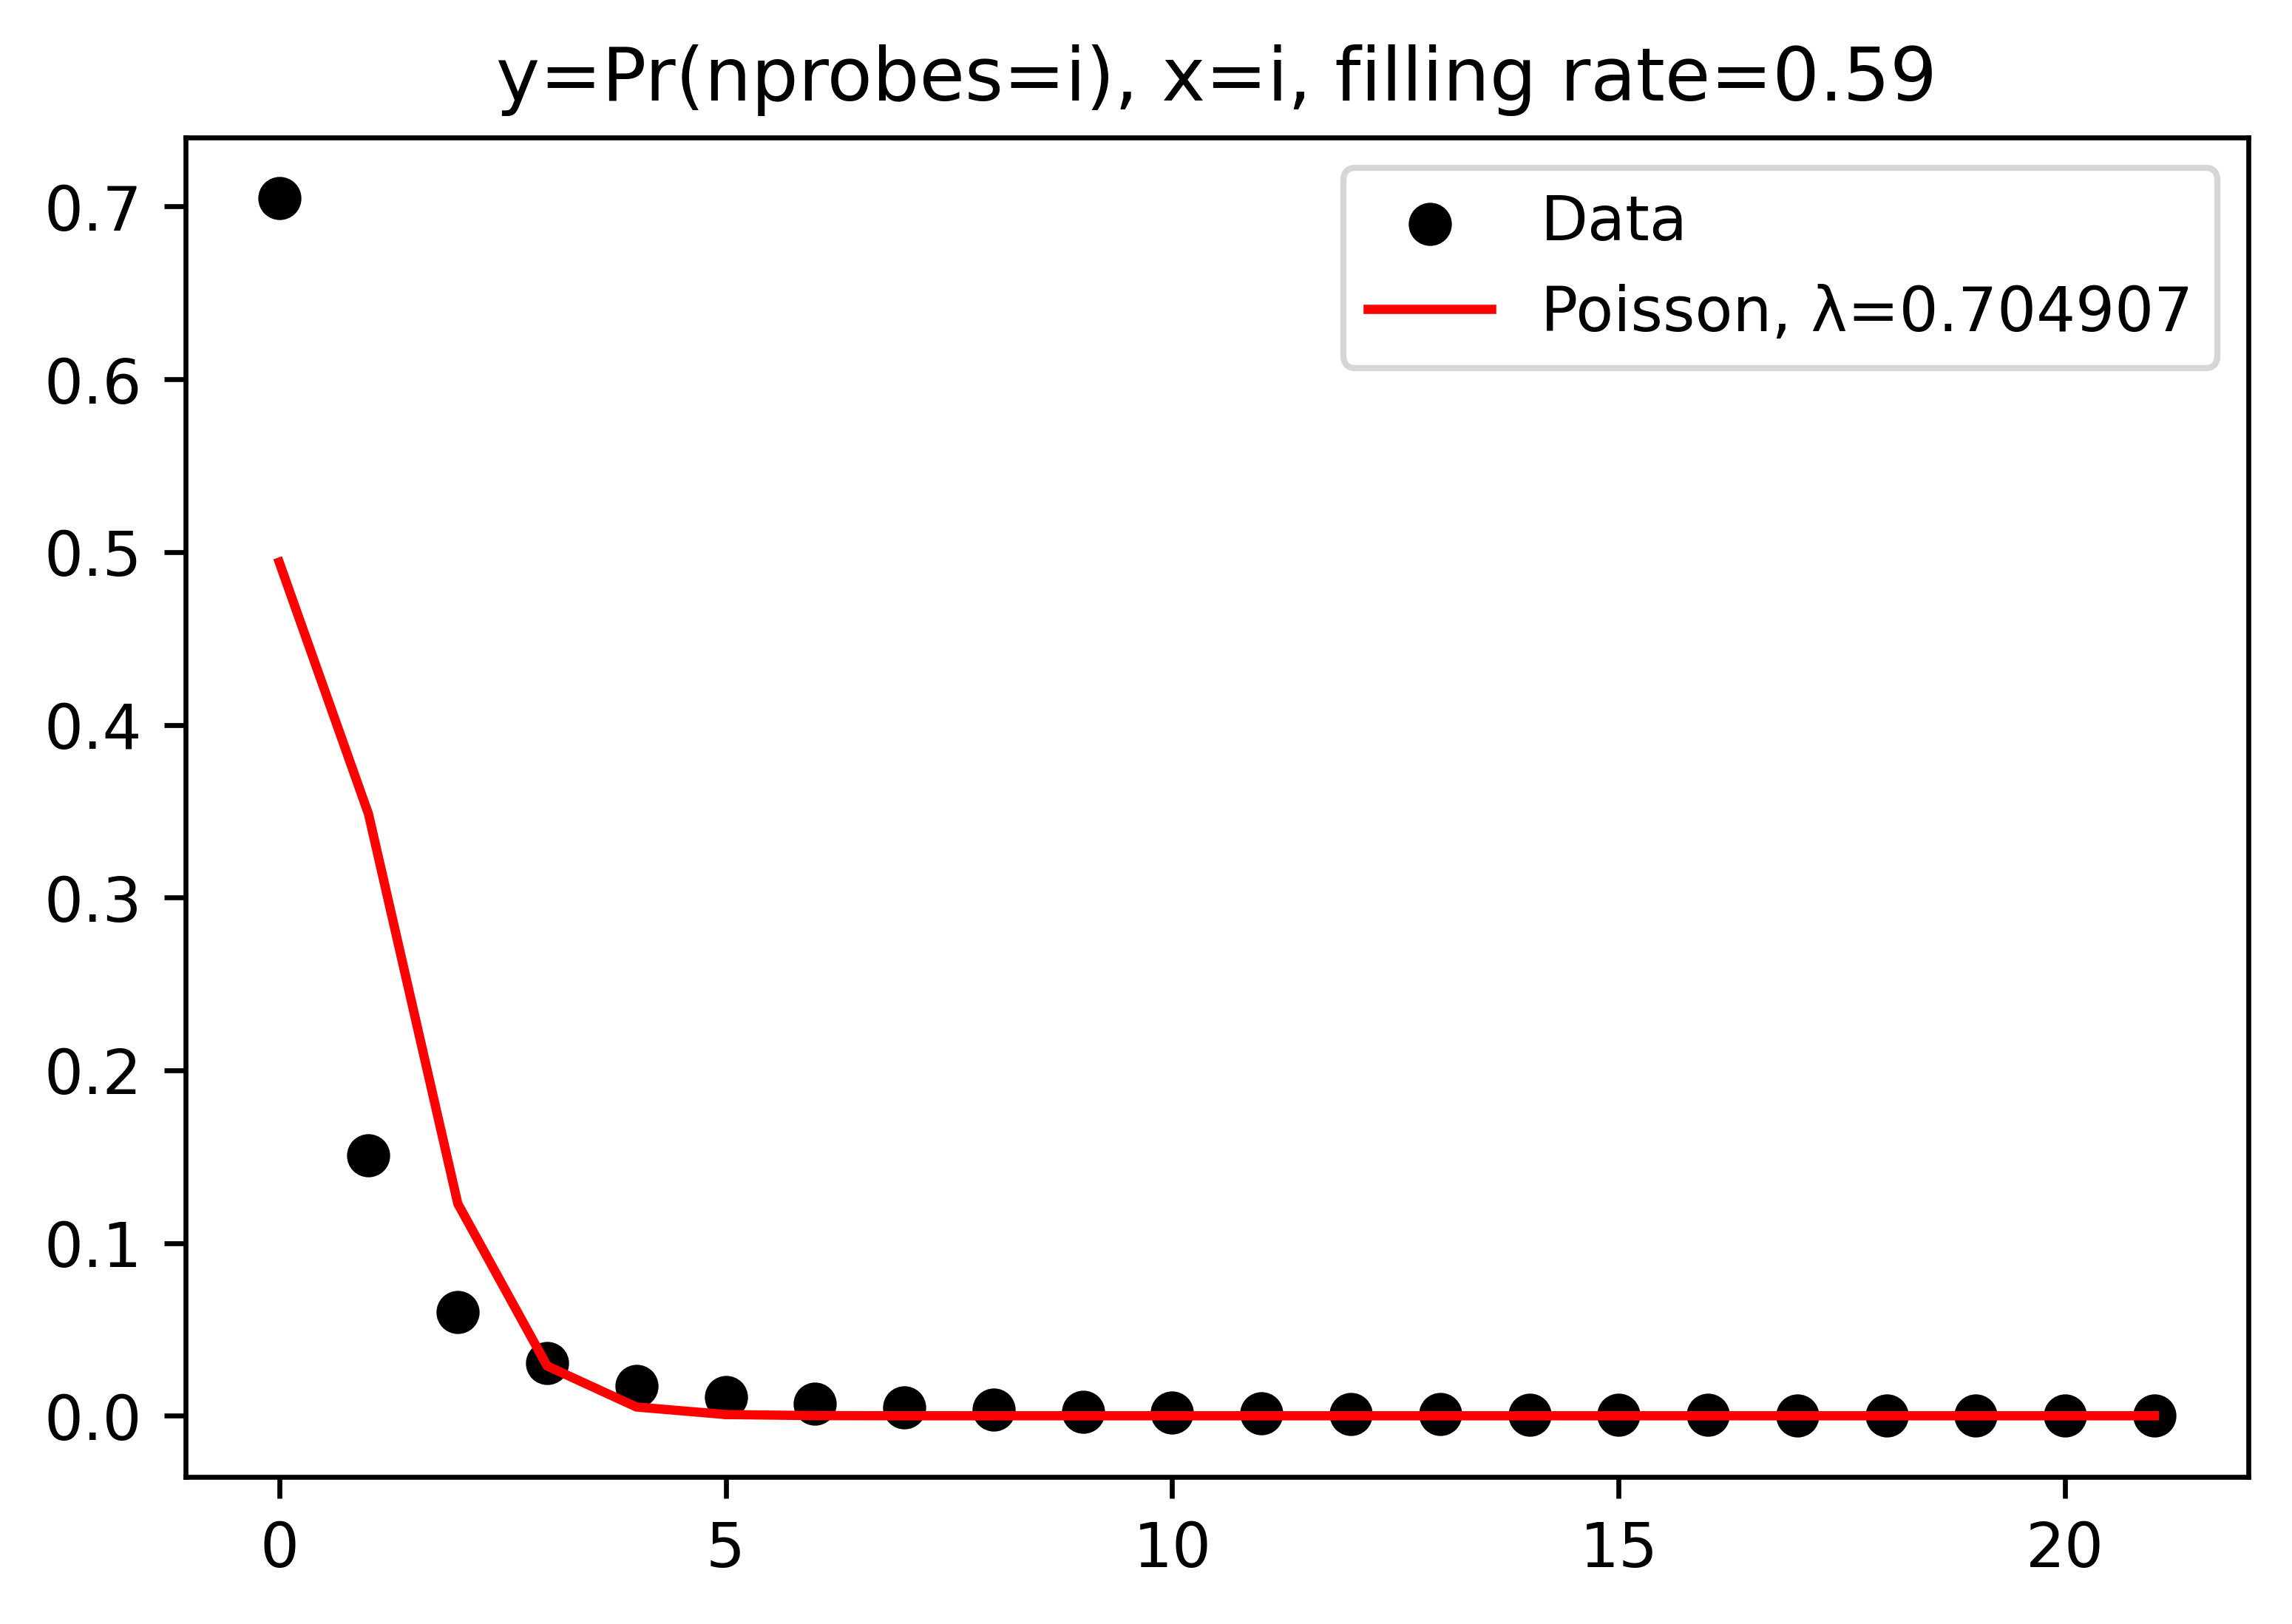

None

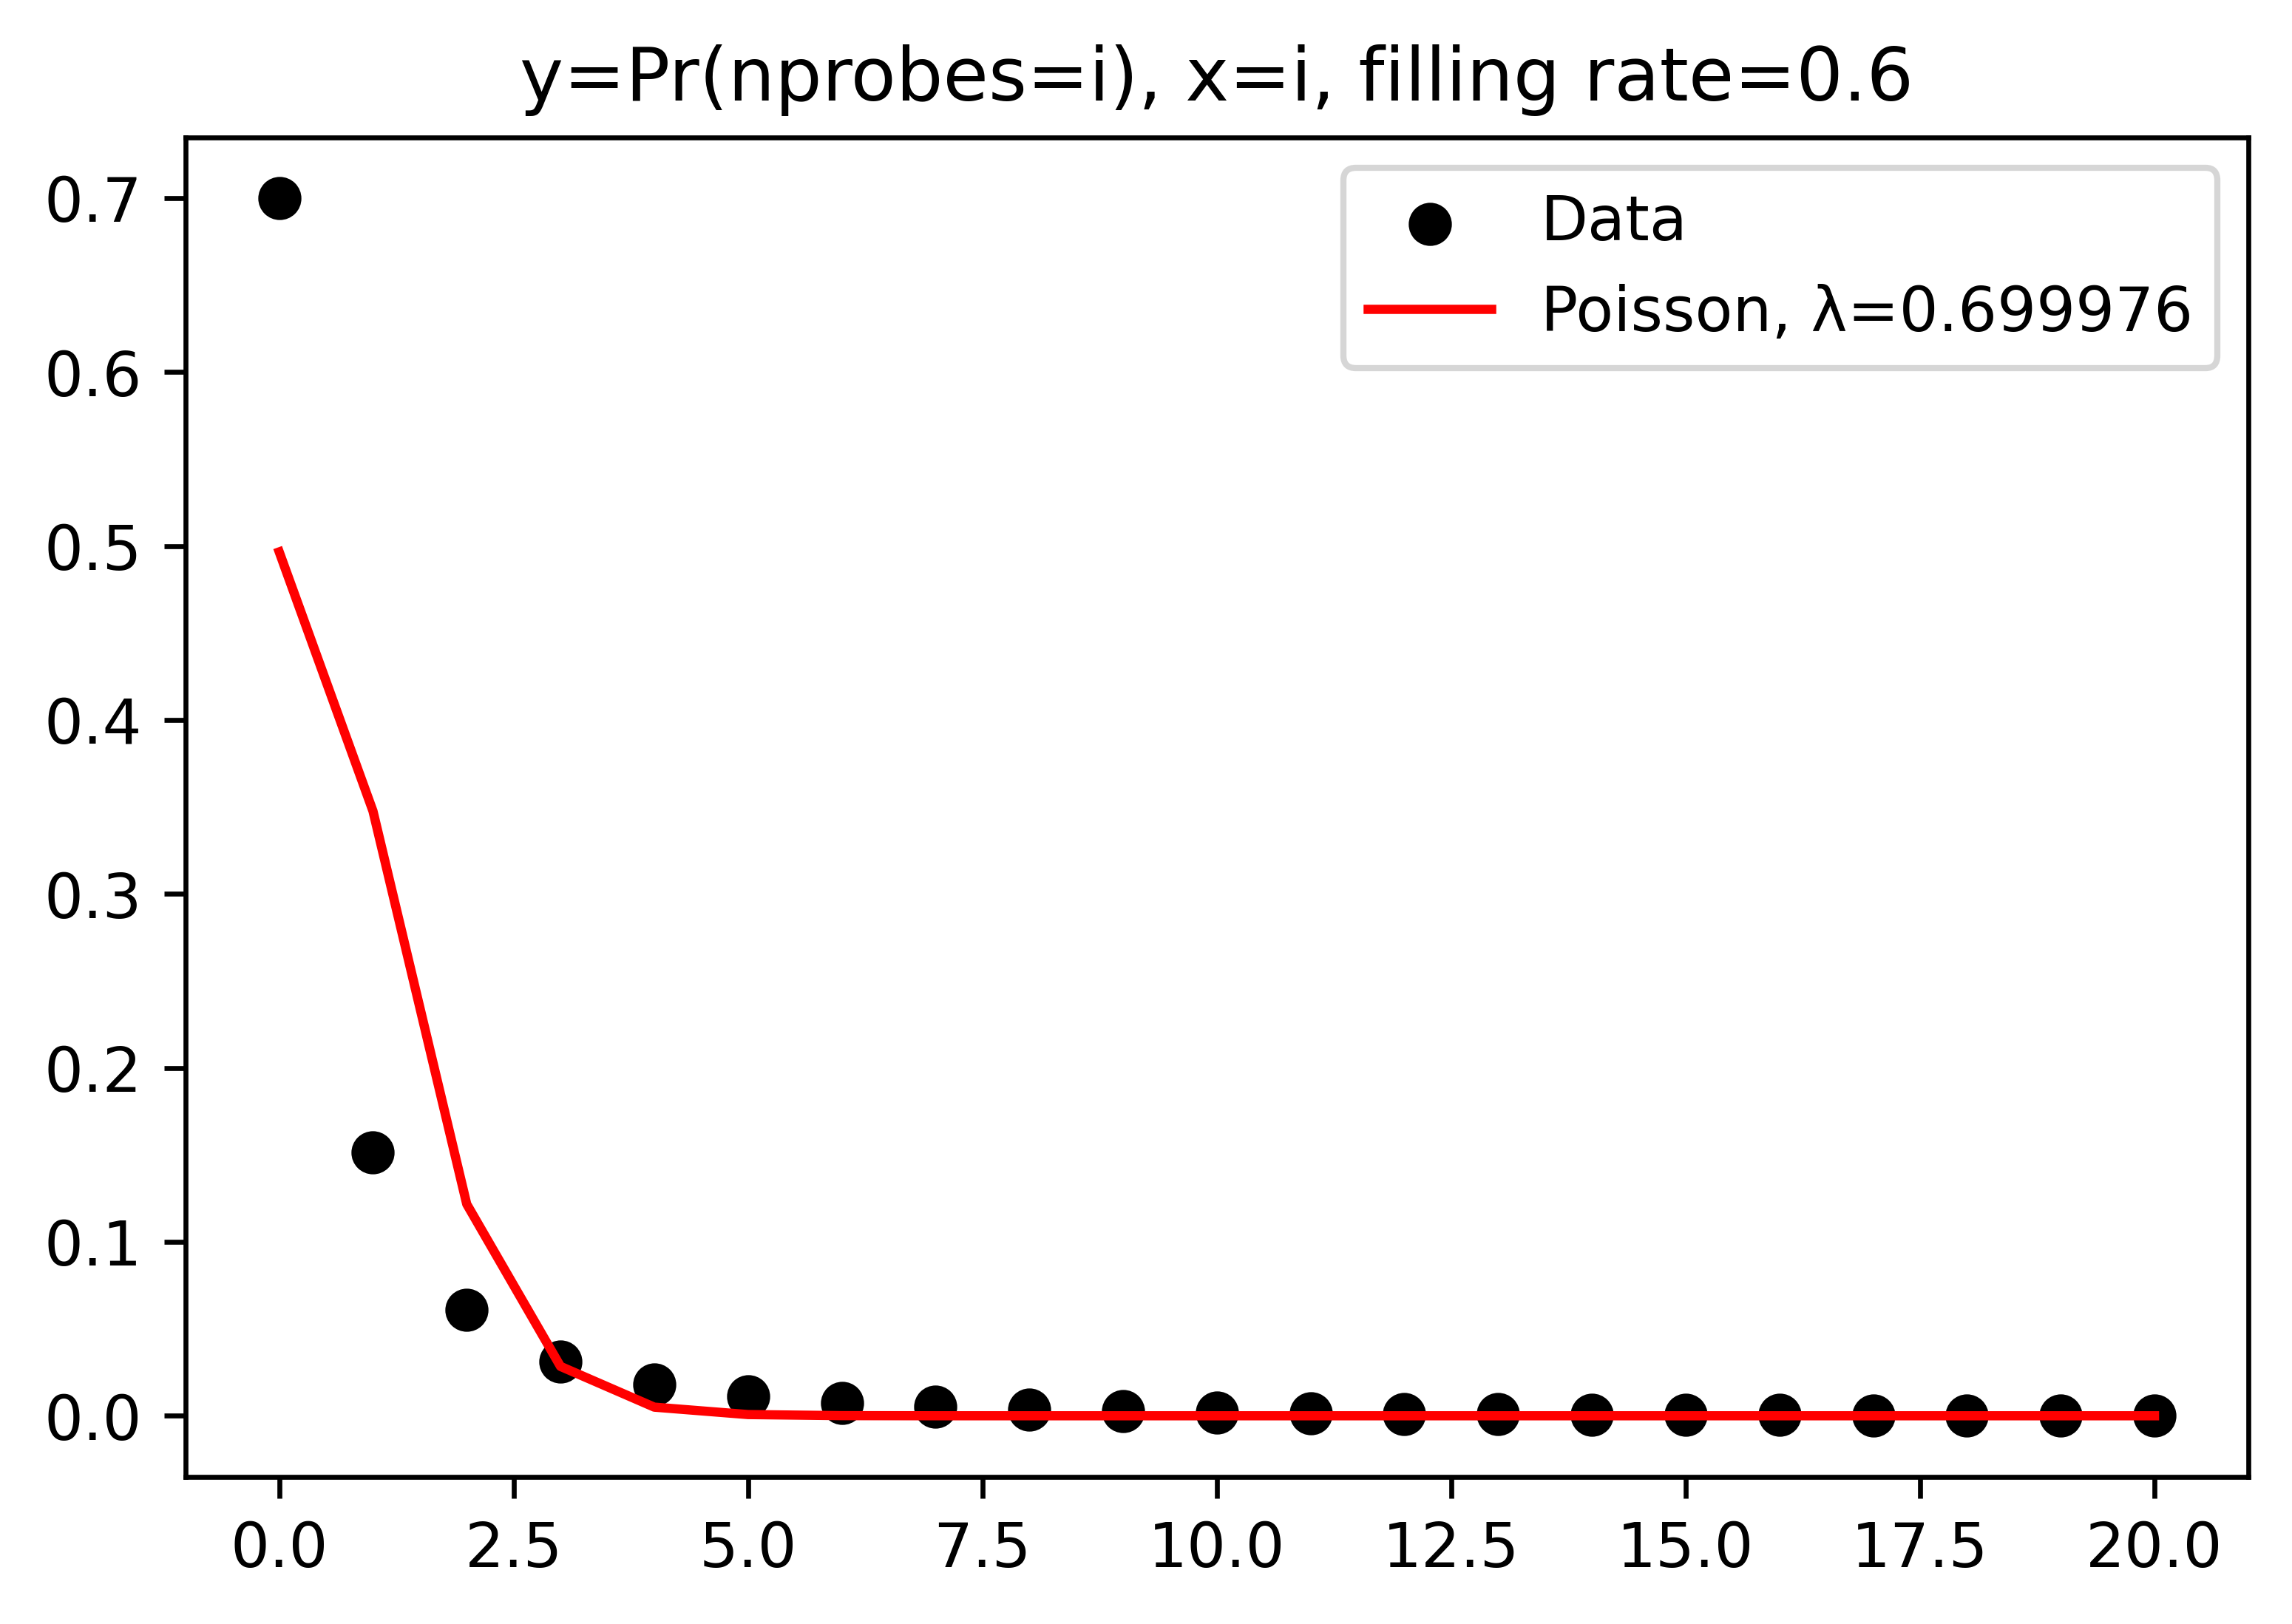

None

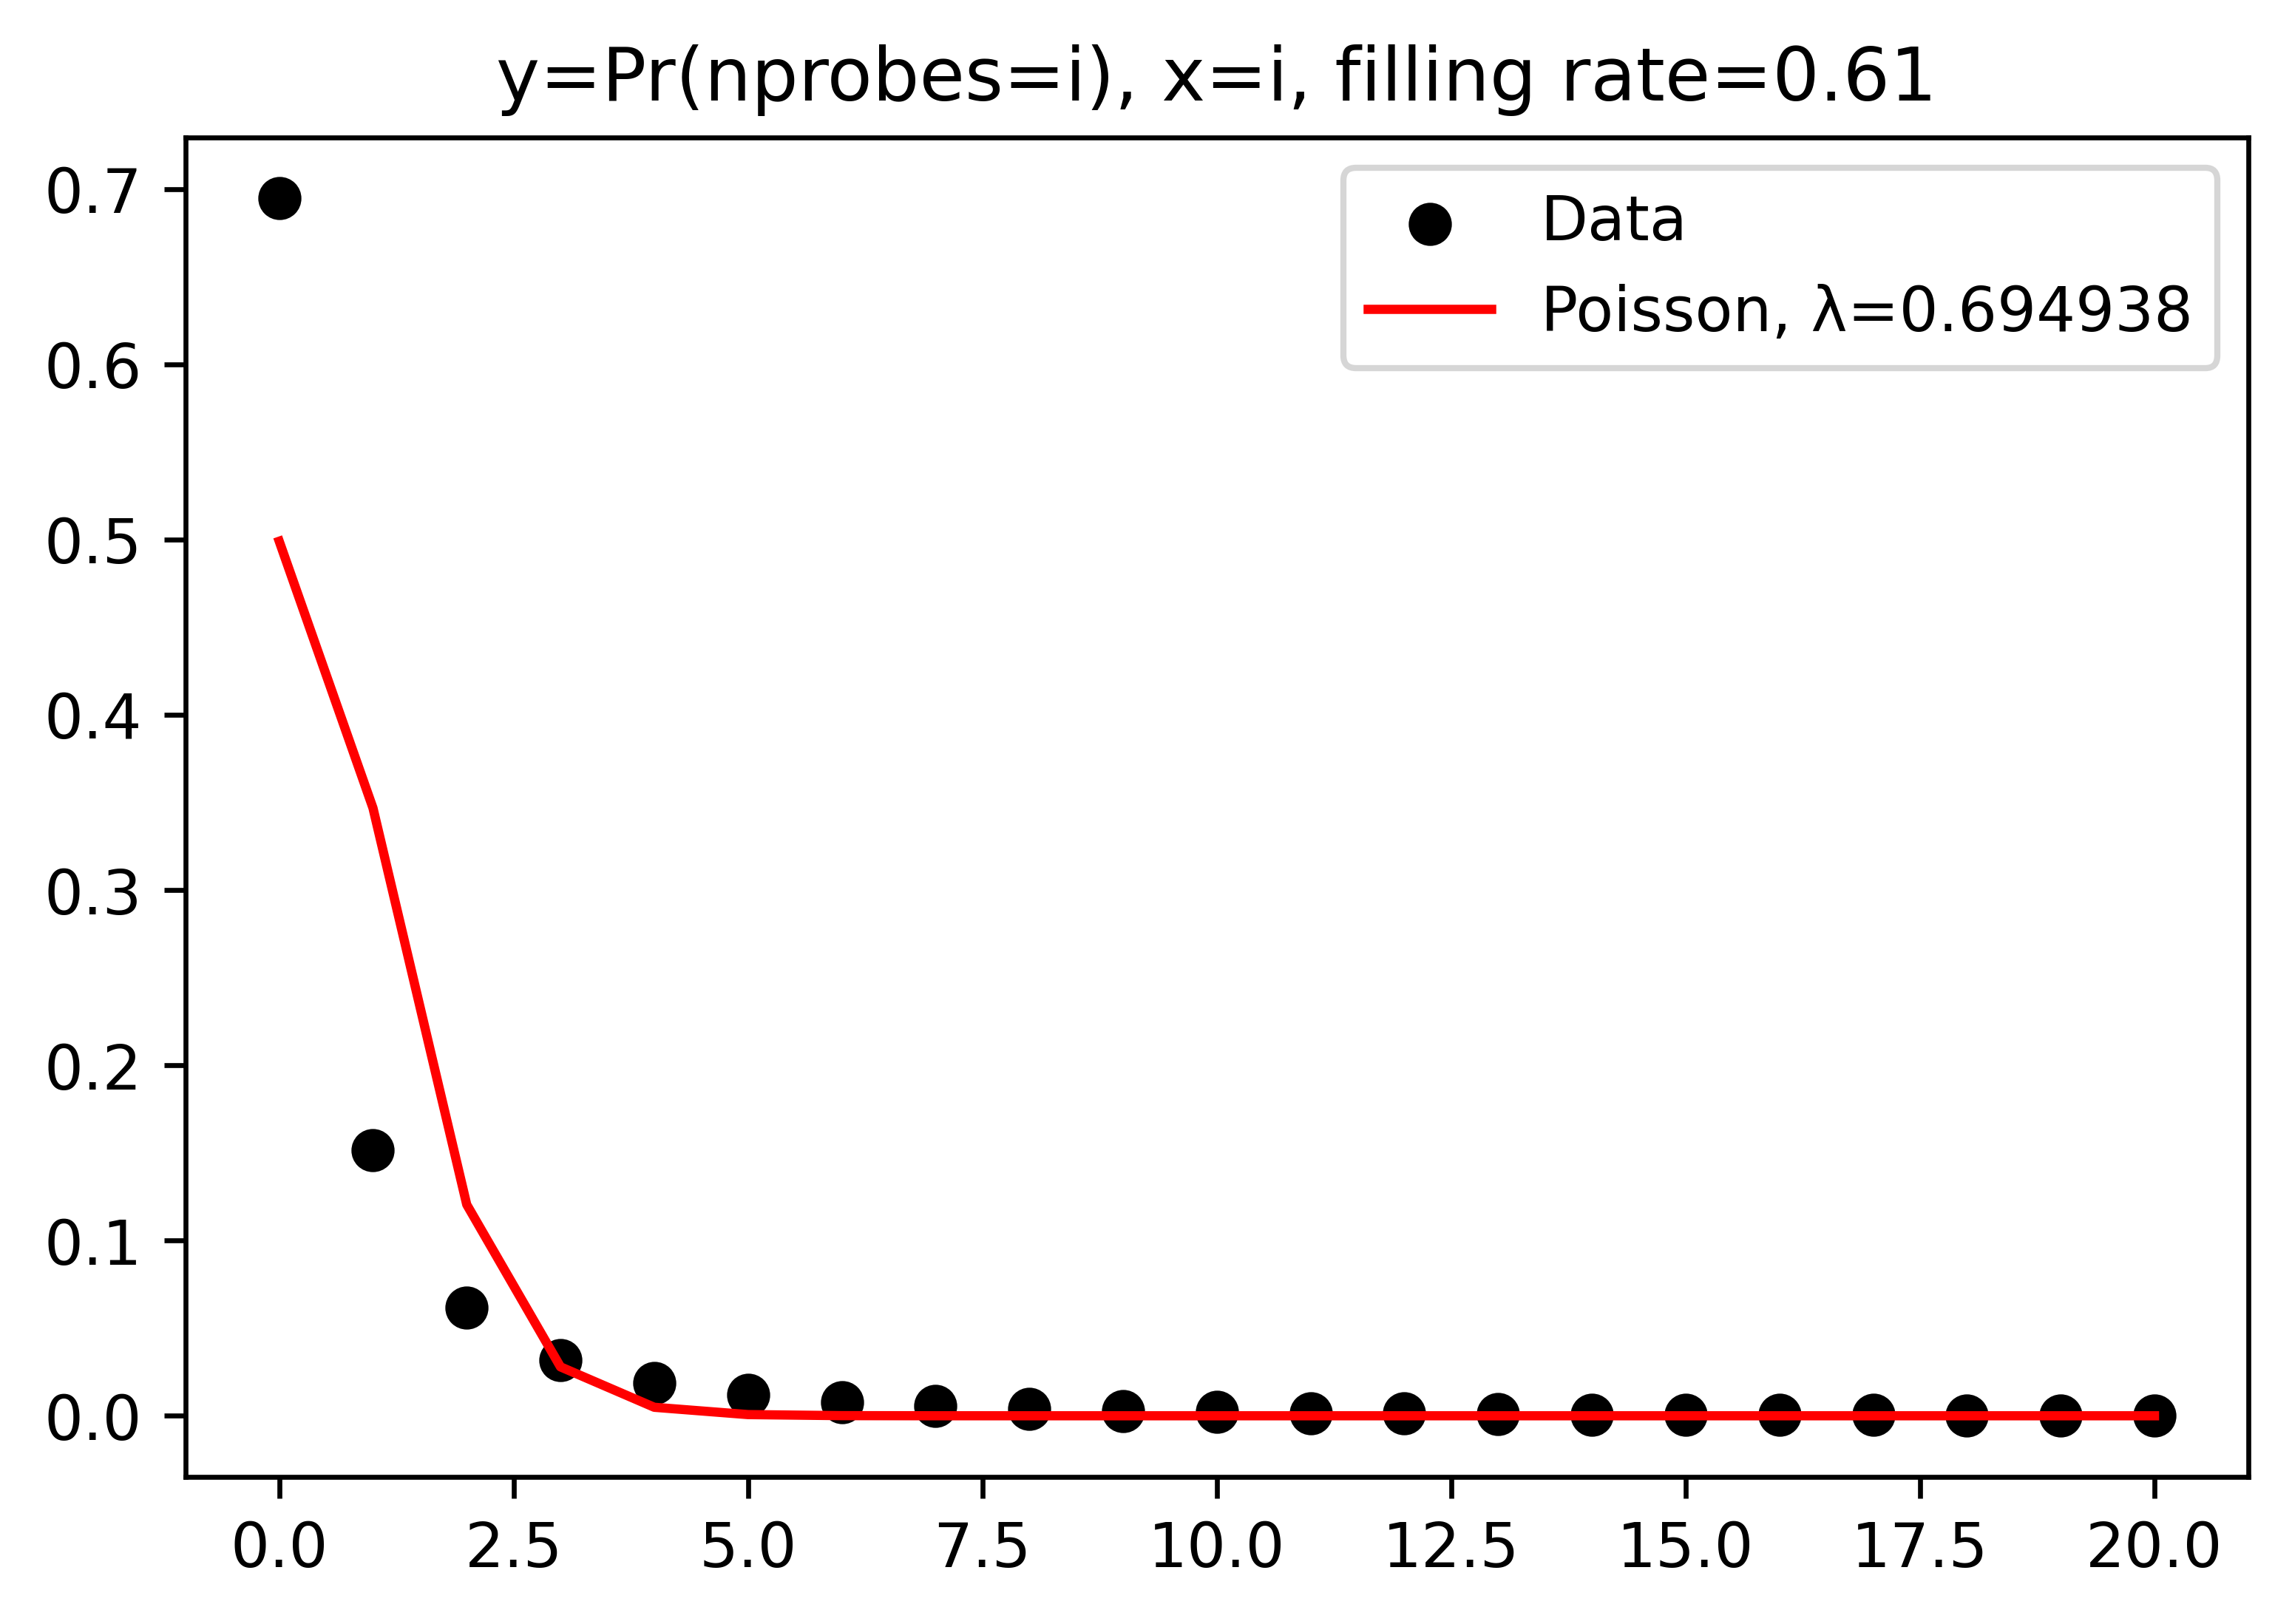

None

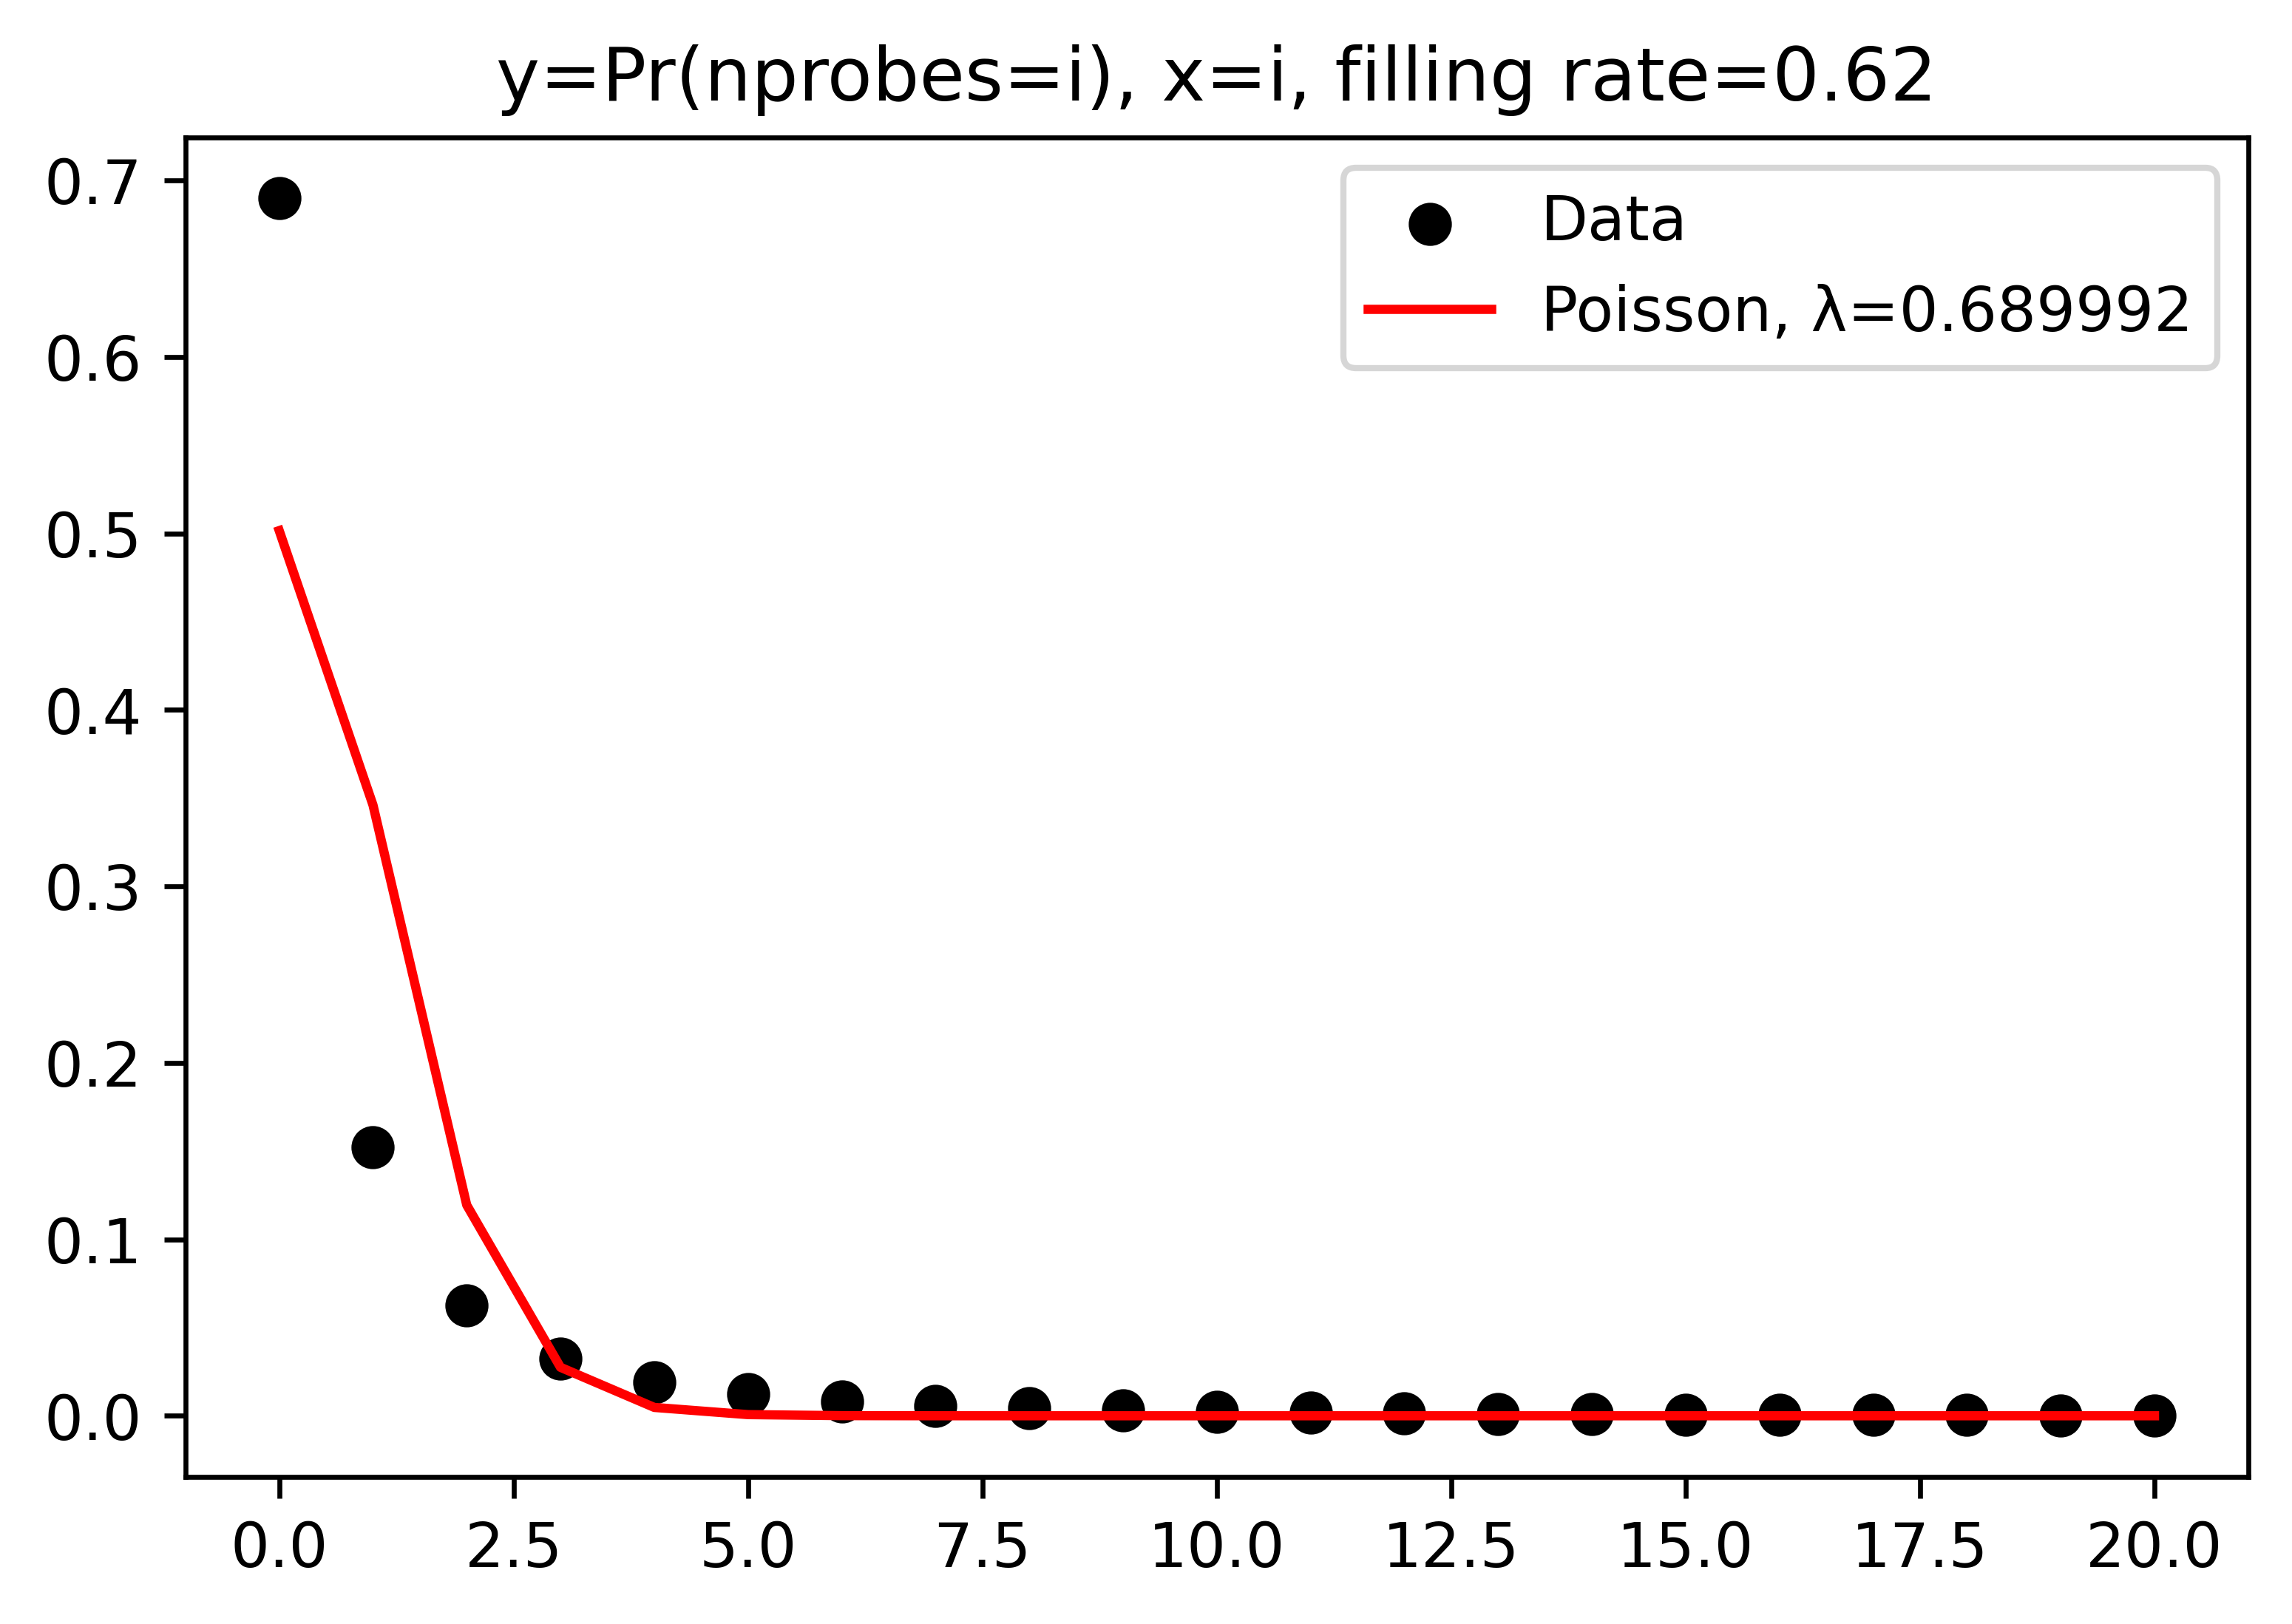

None

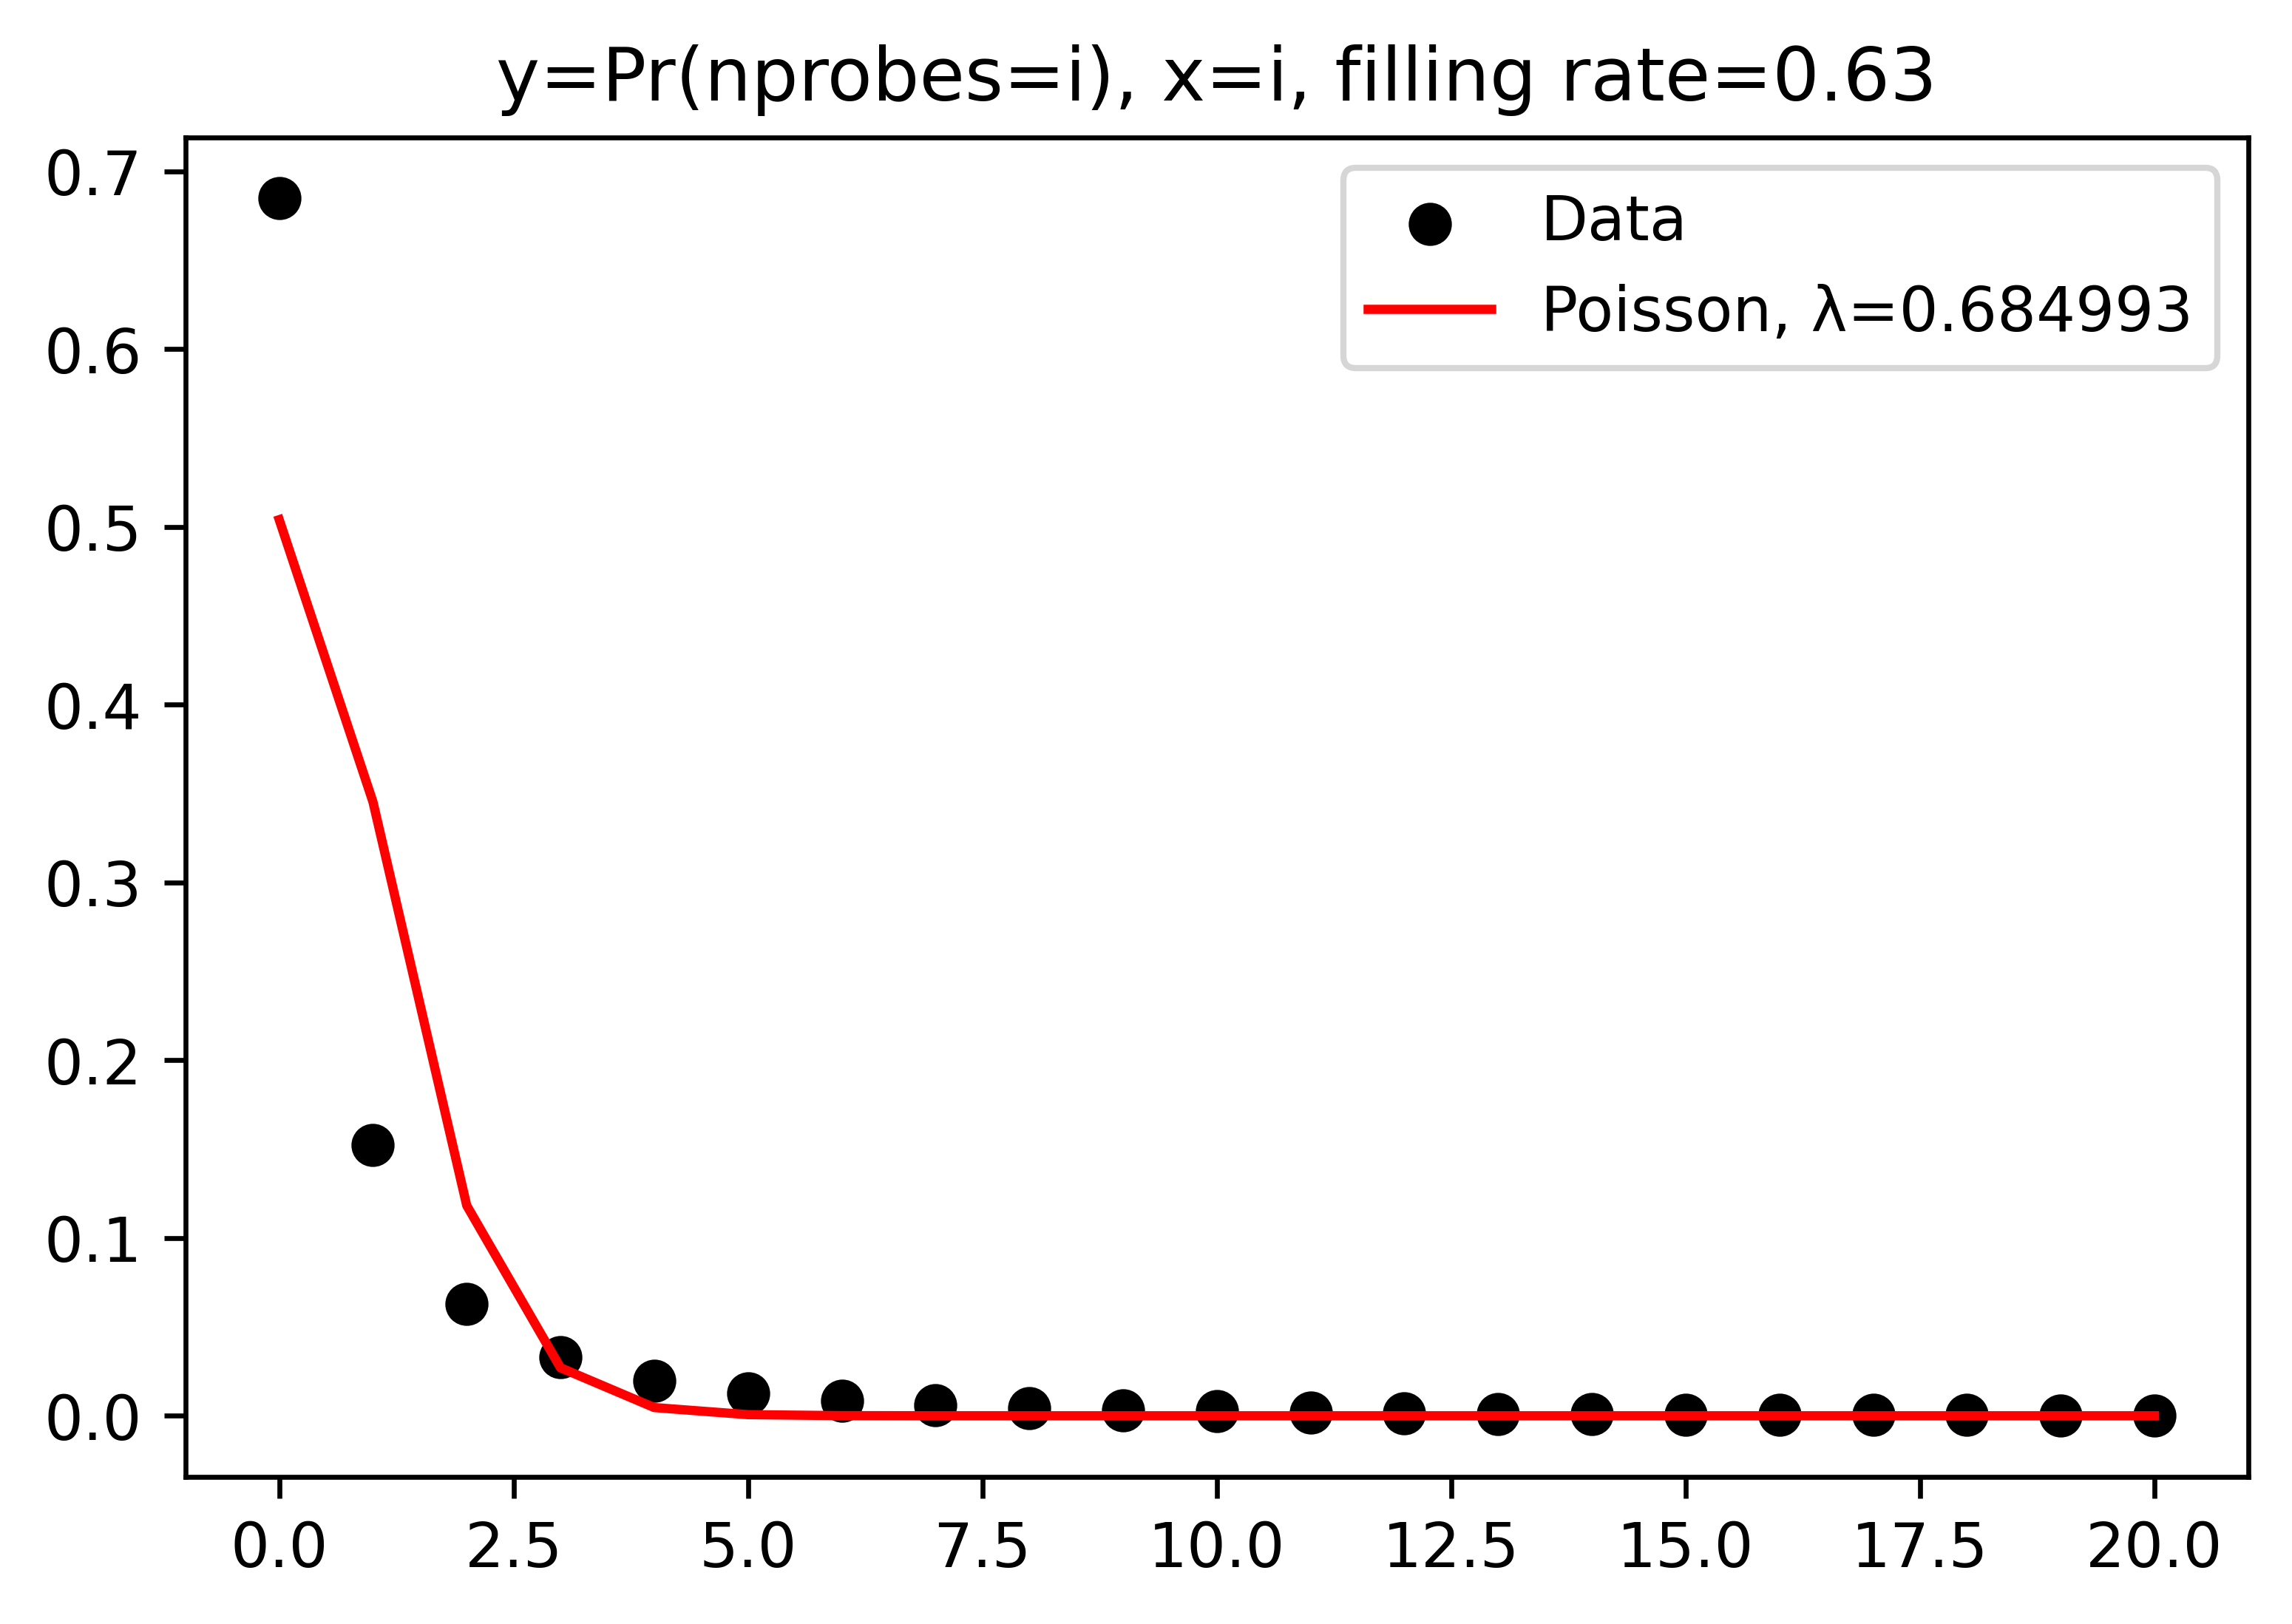

None

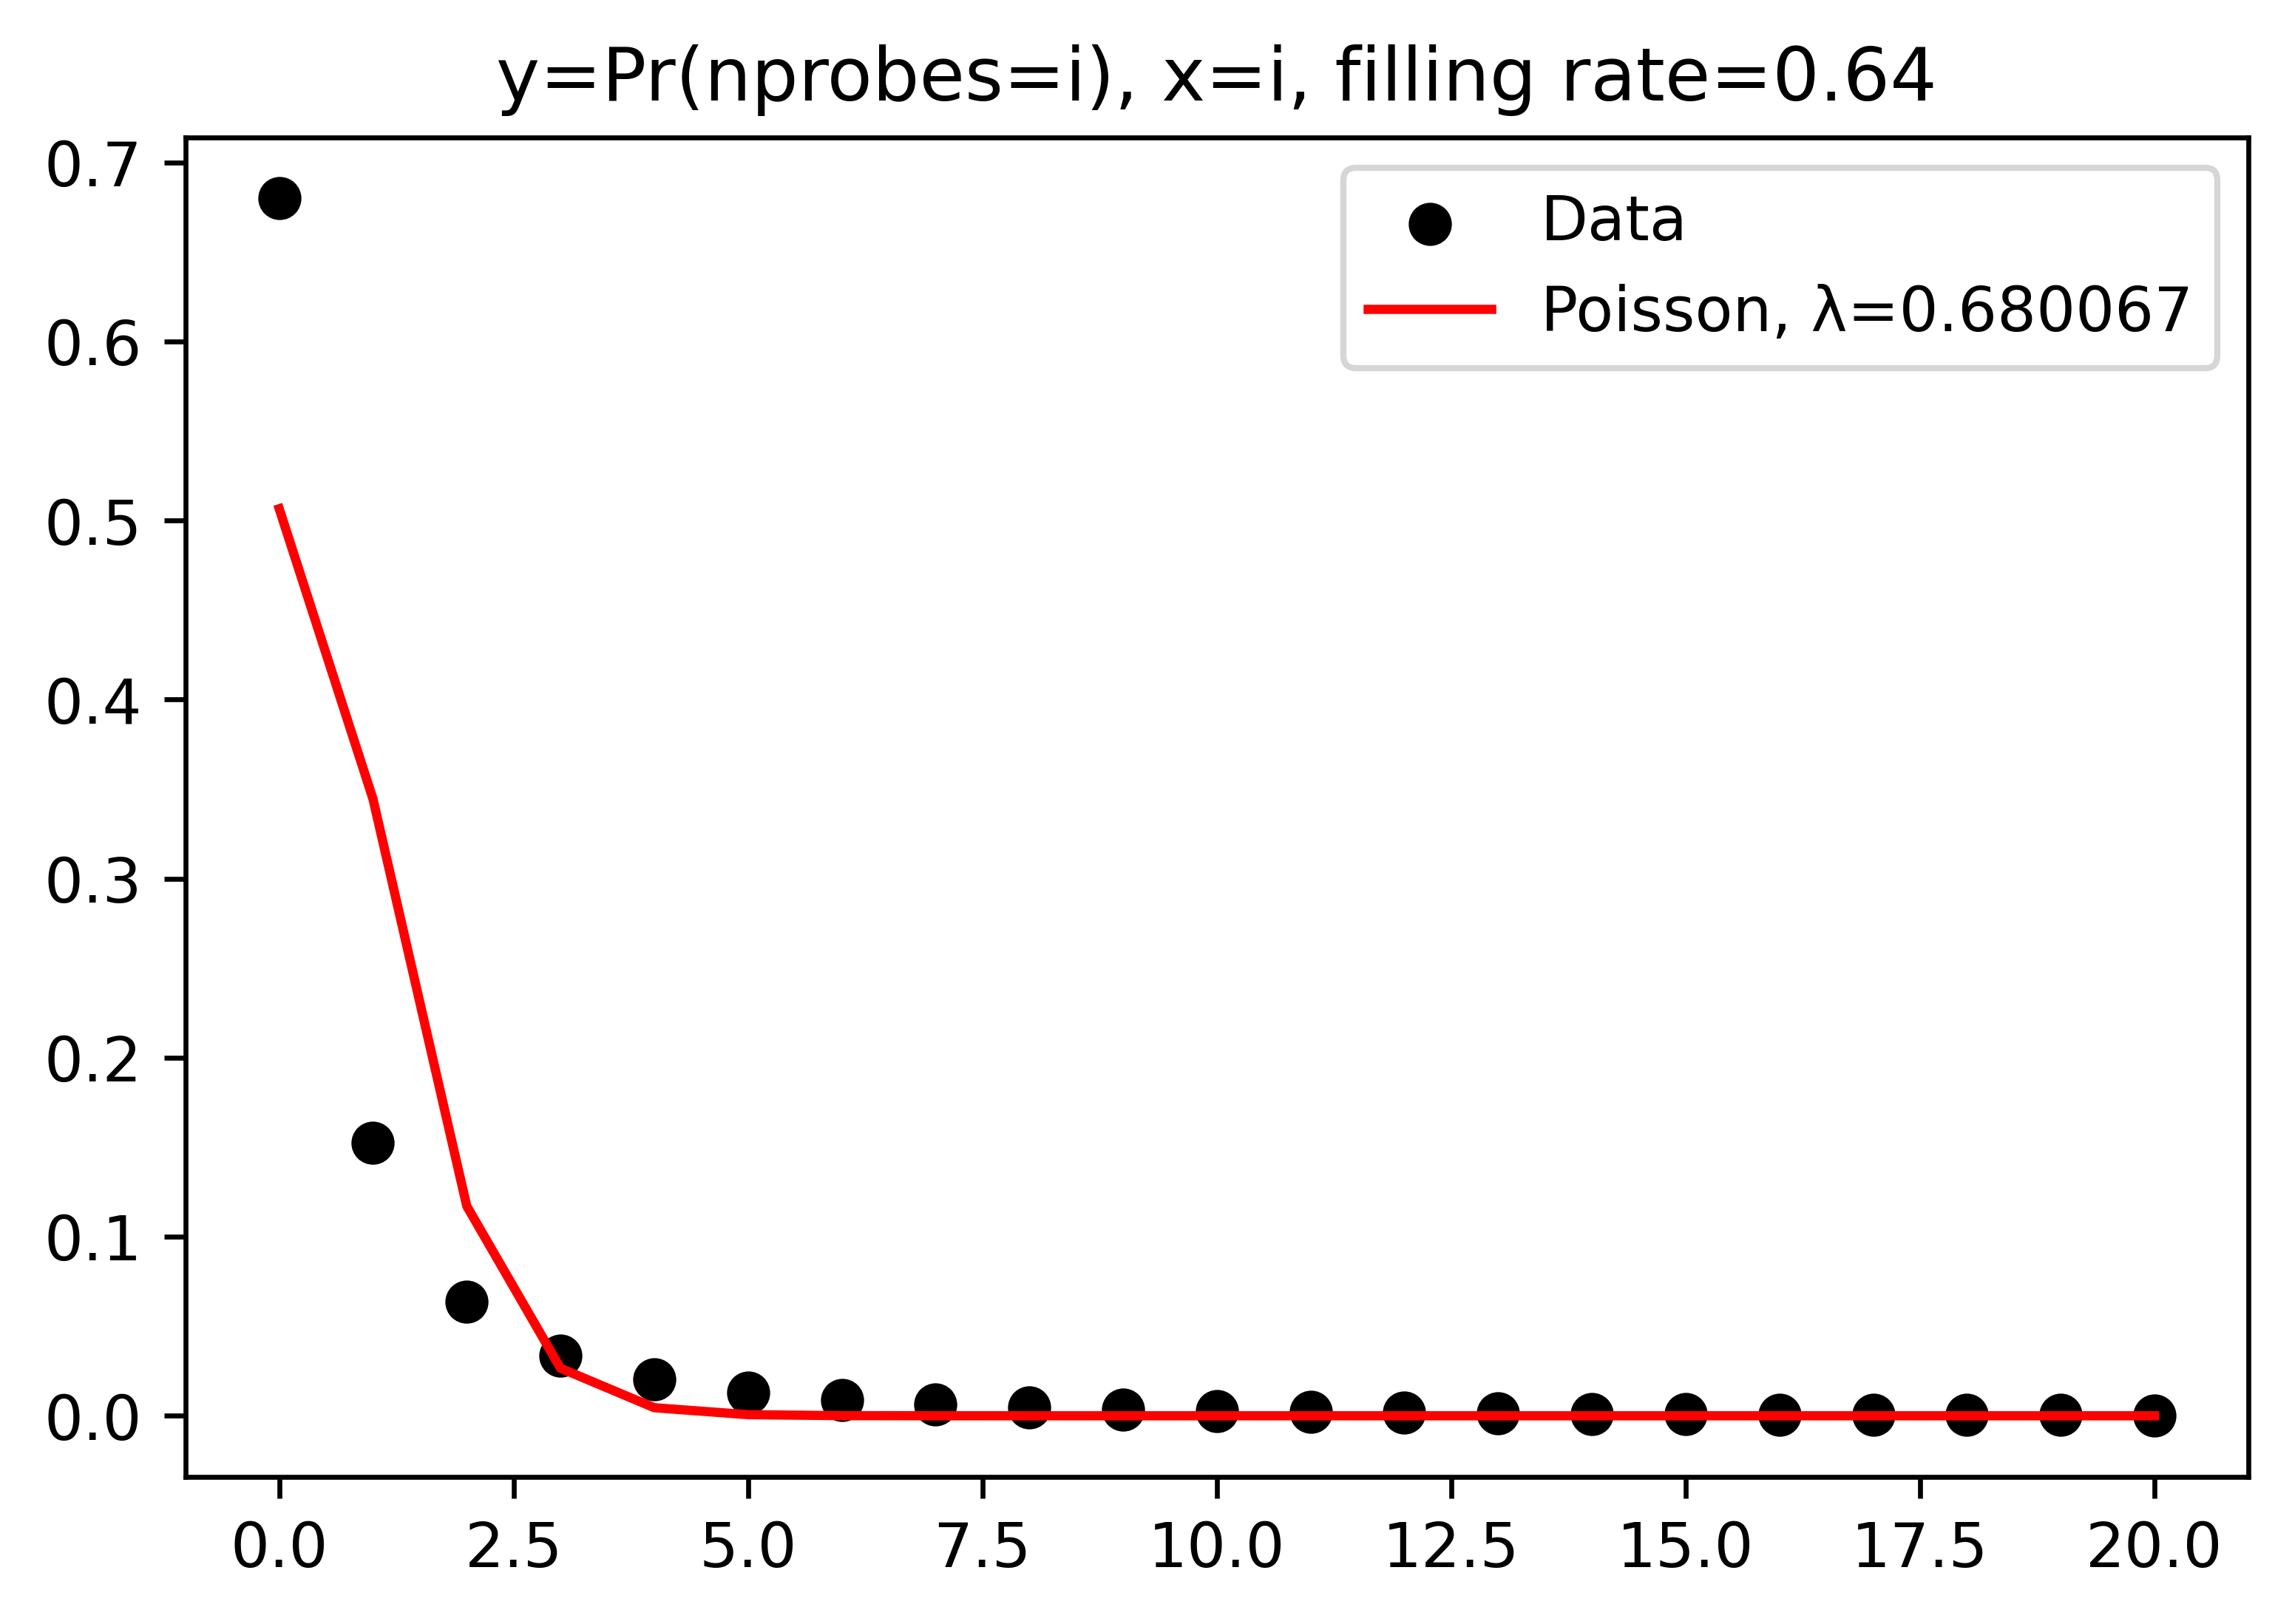

None

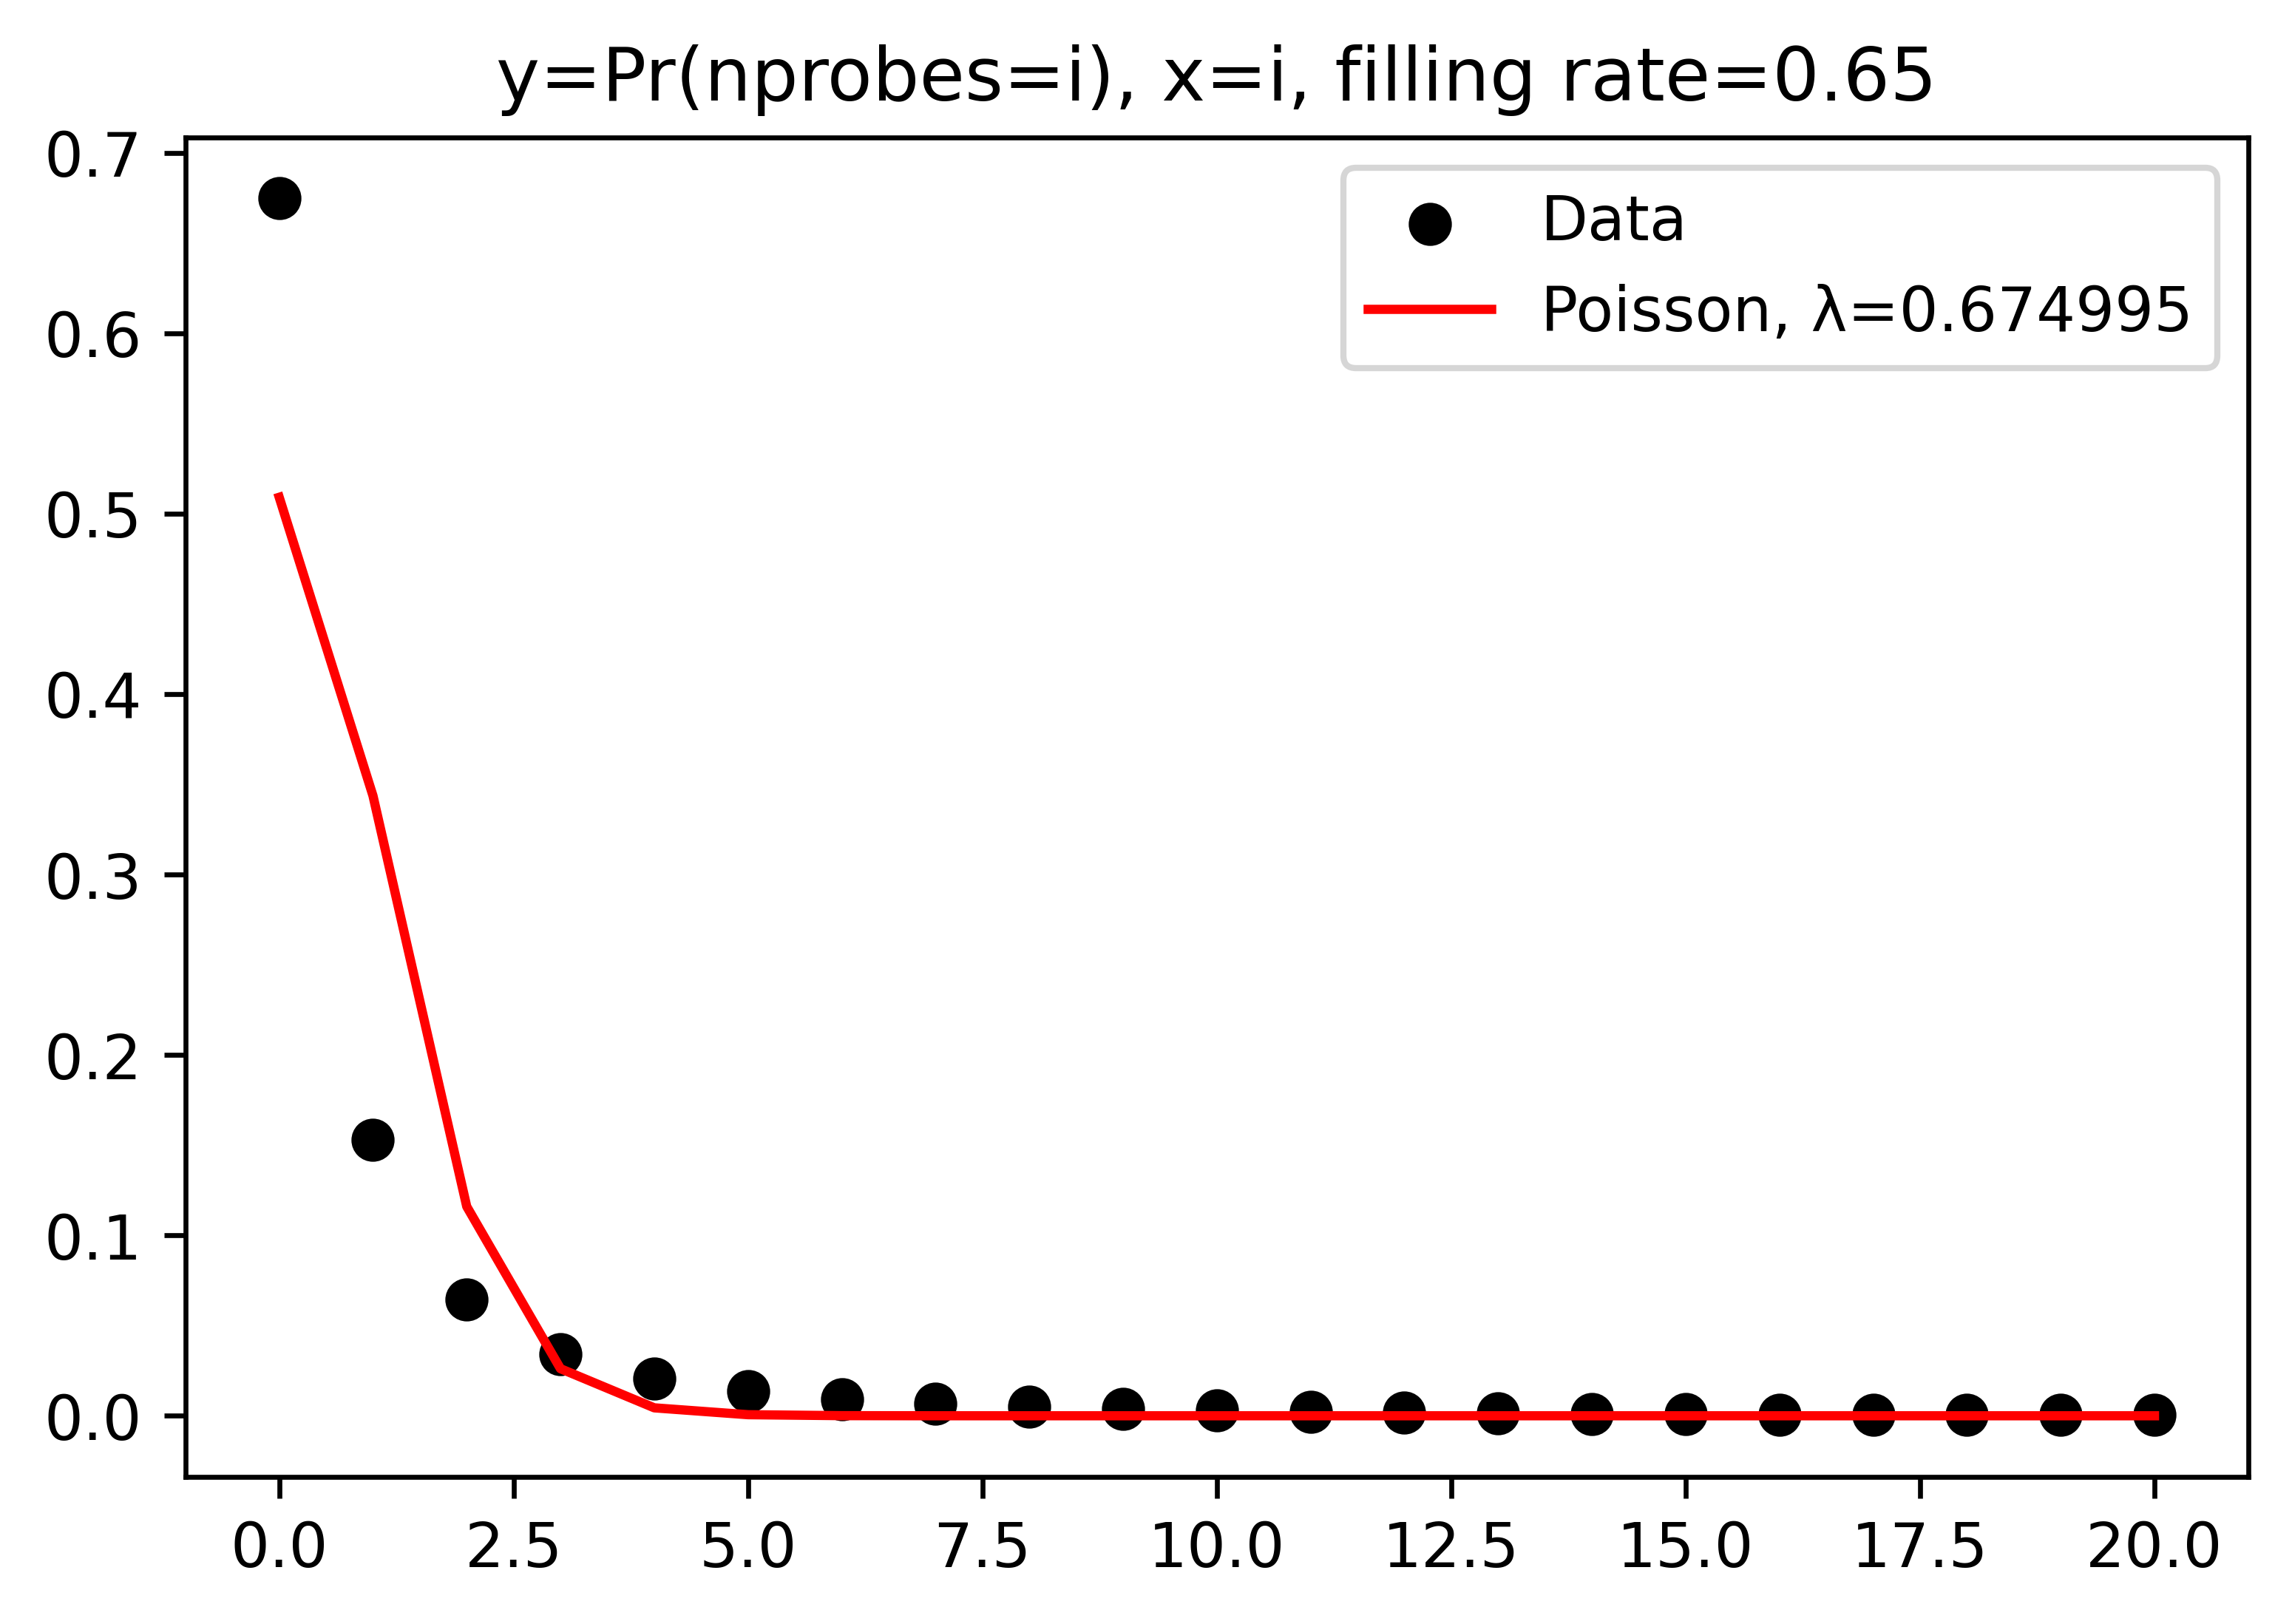

None

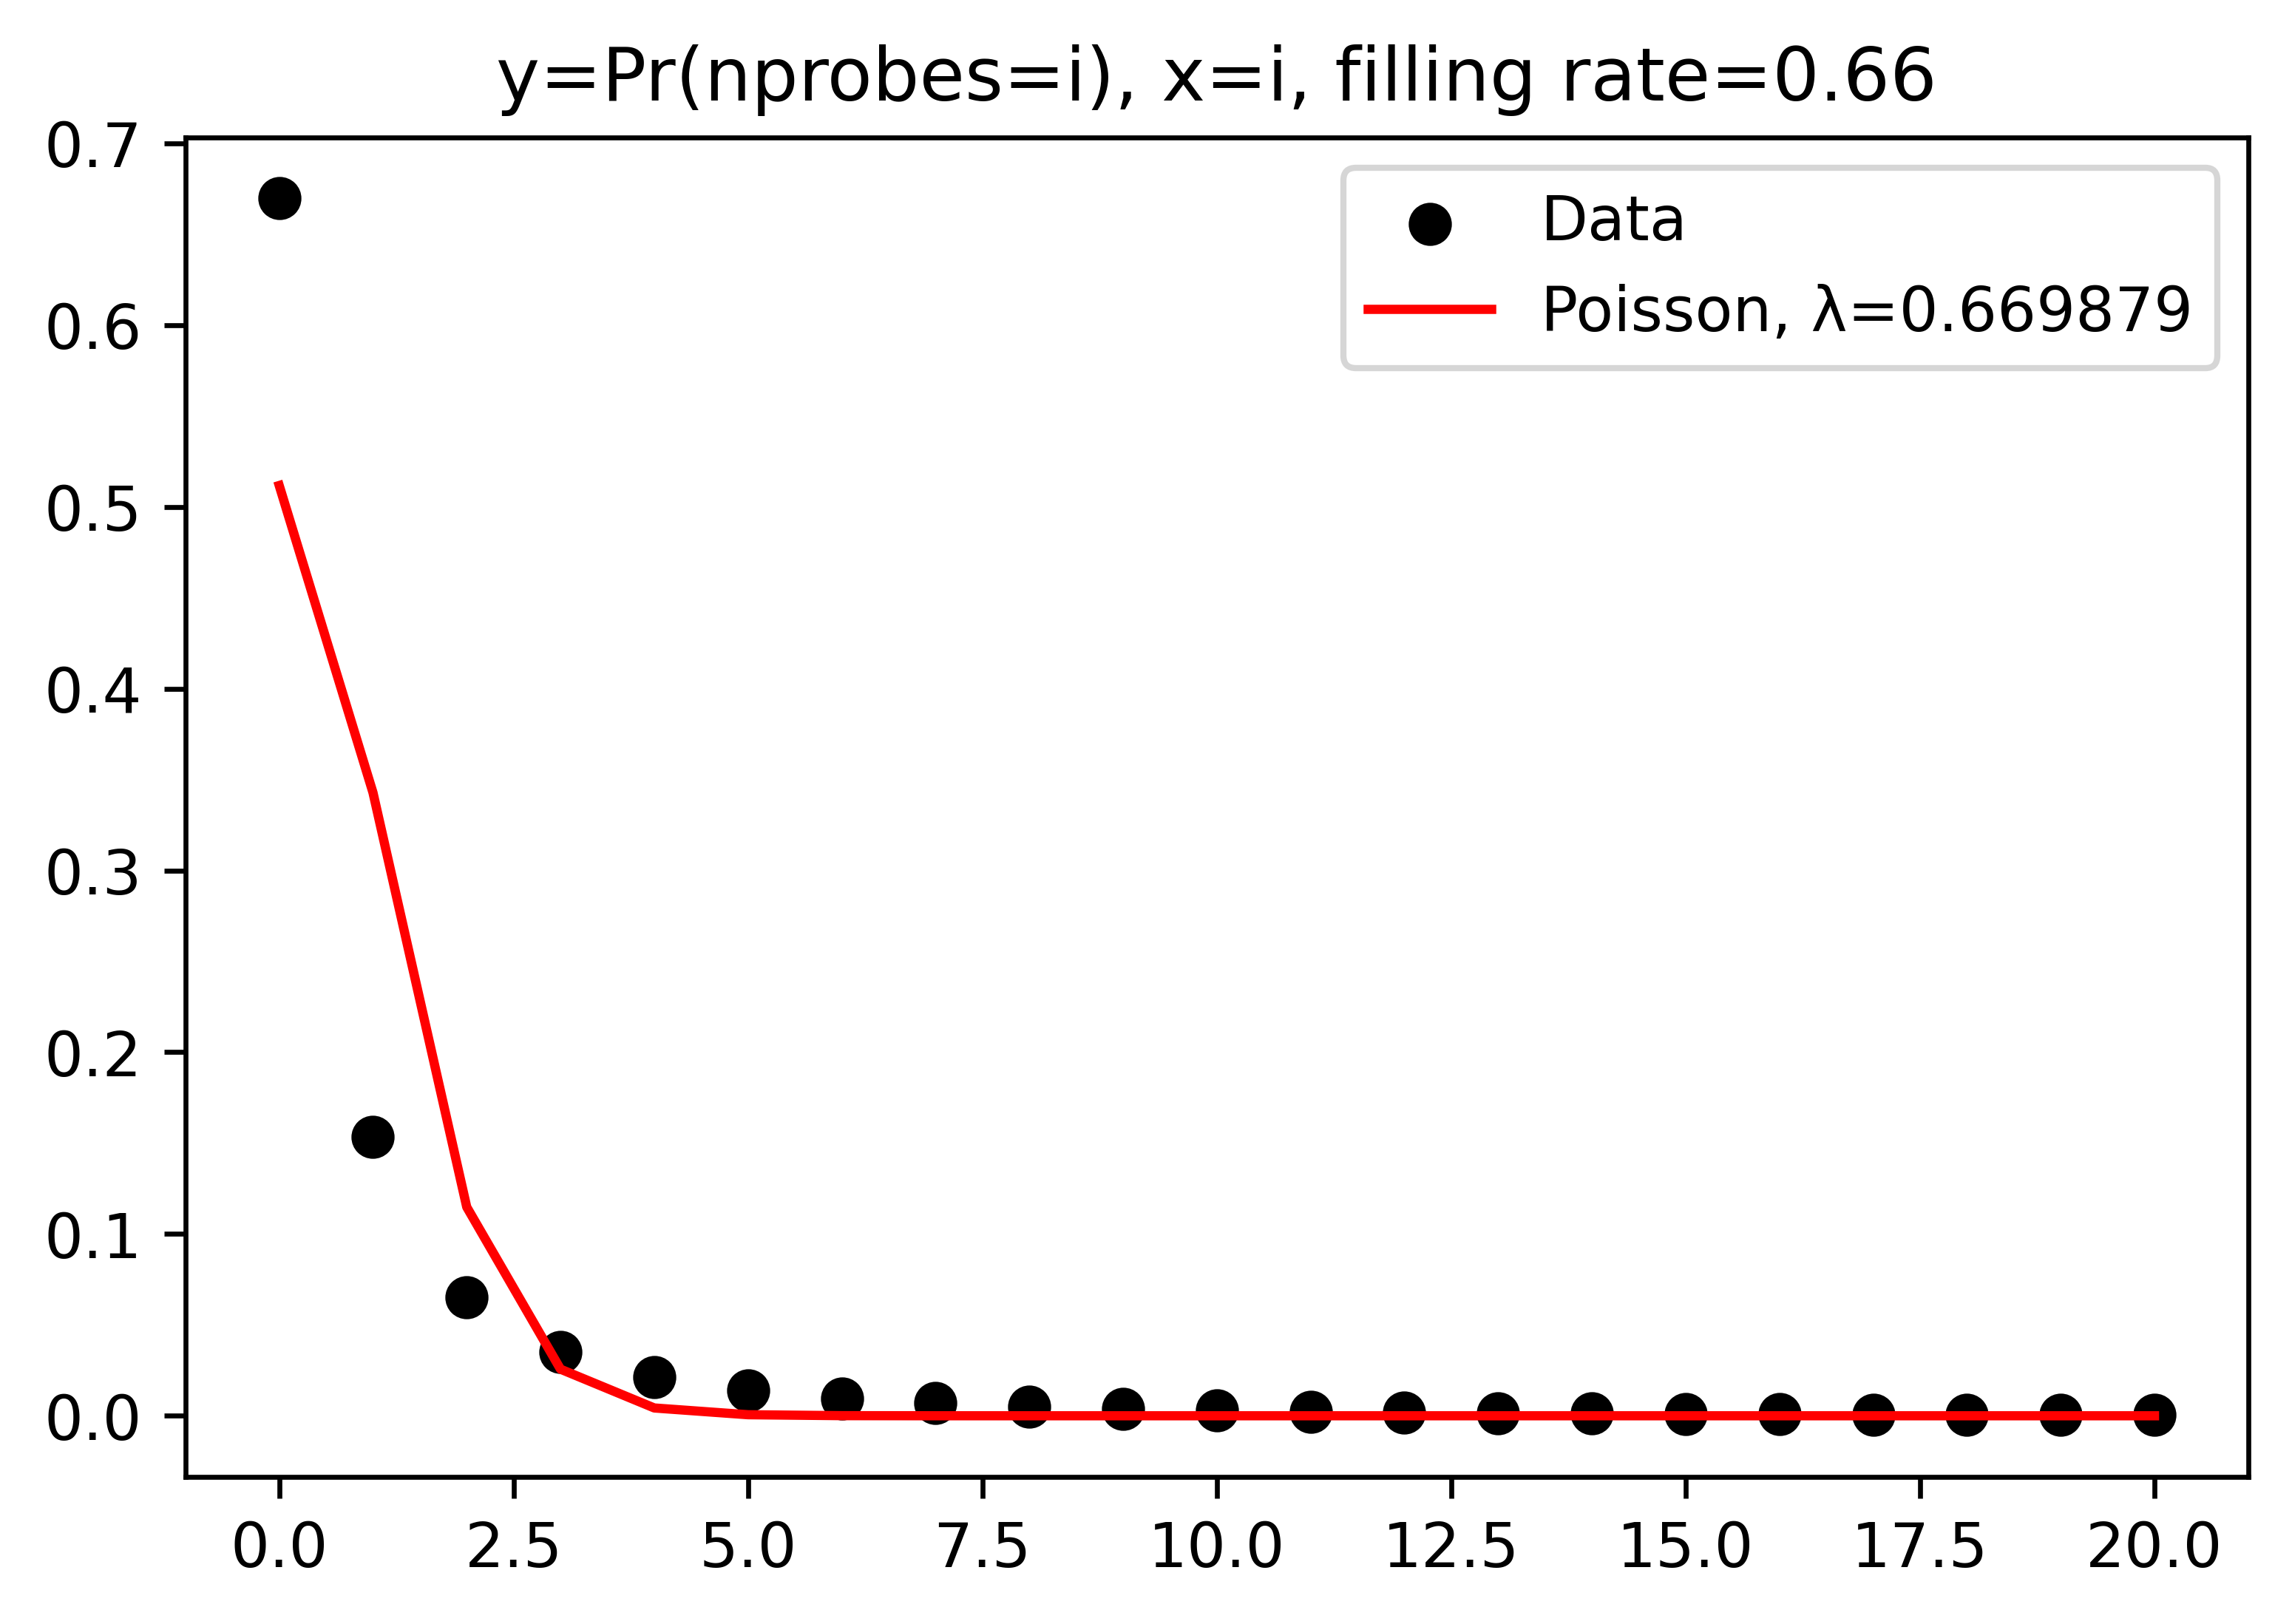

None

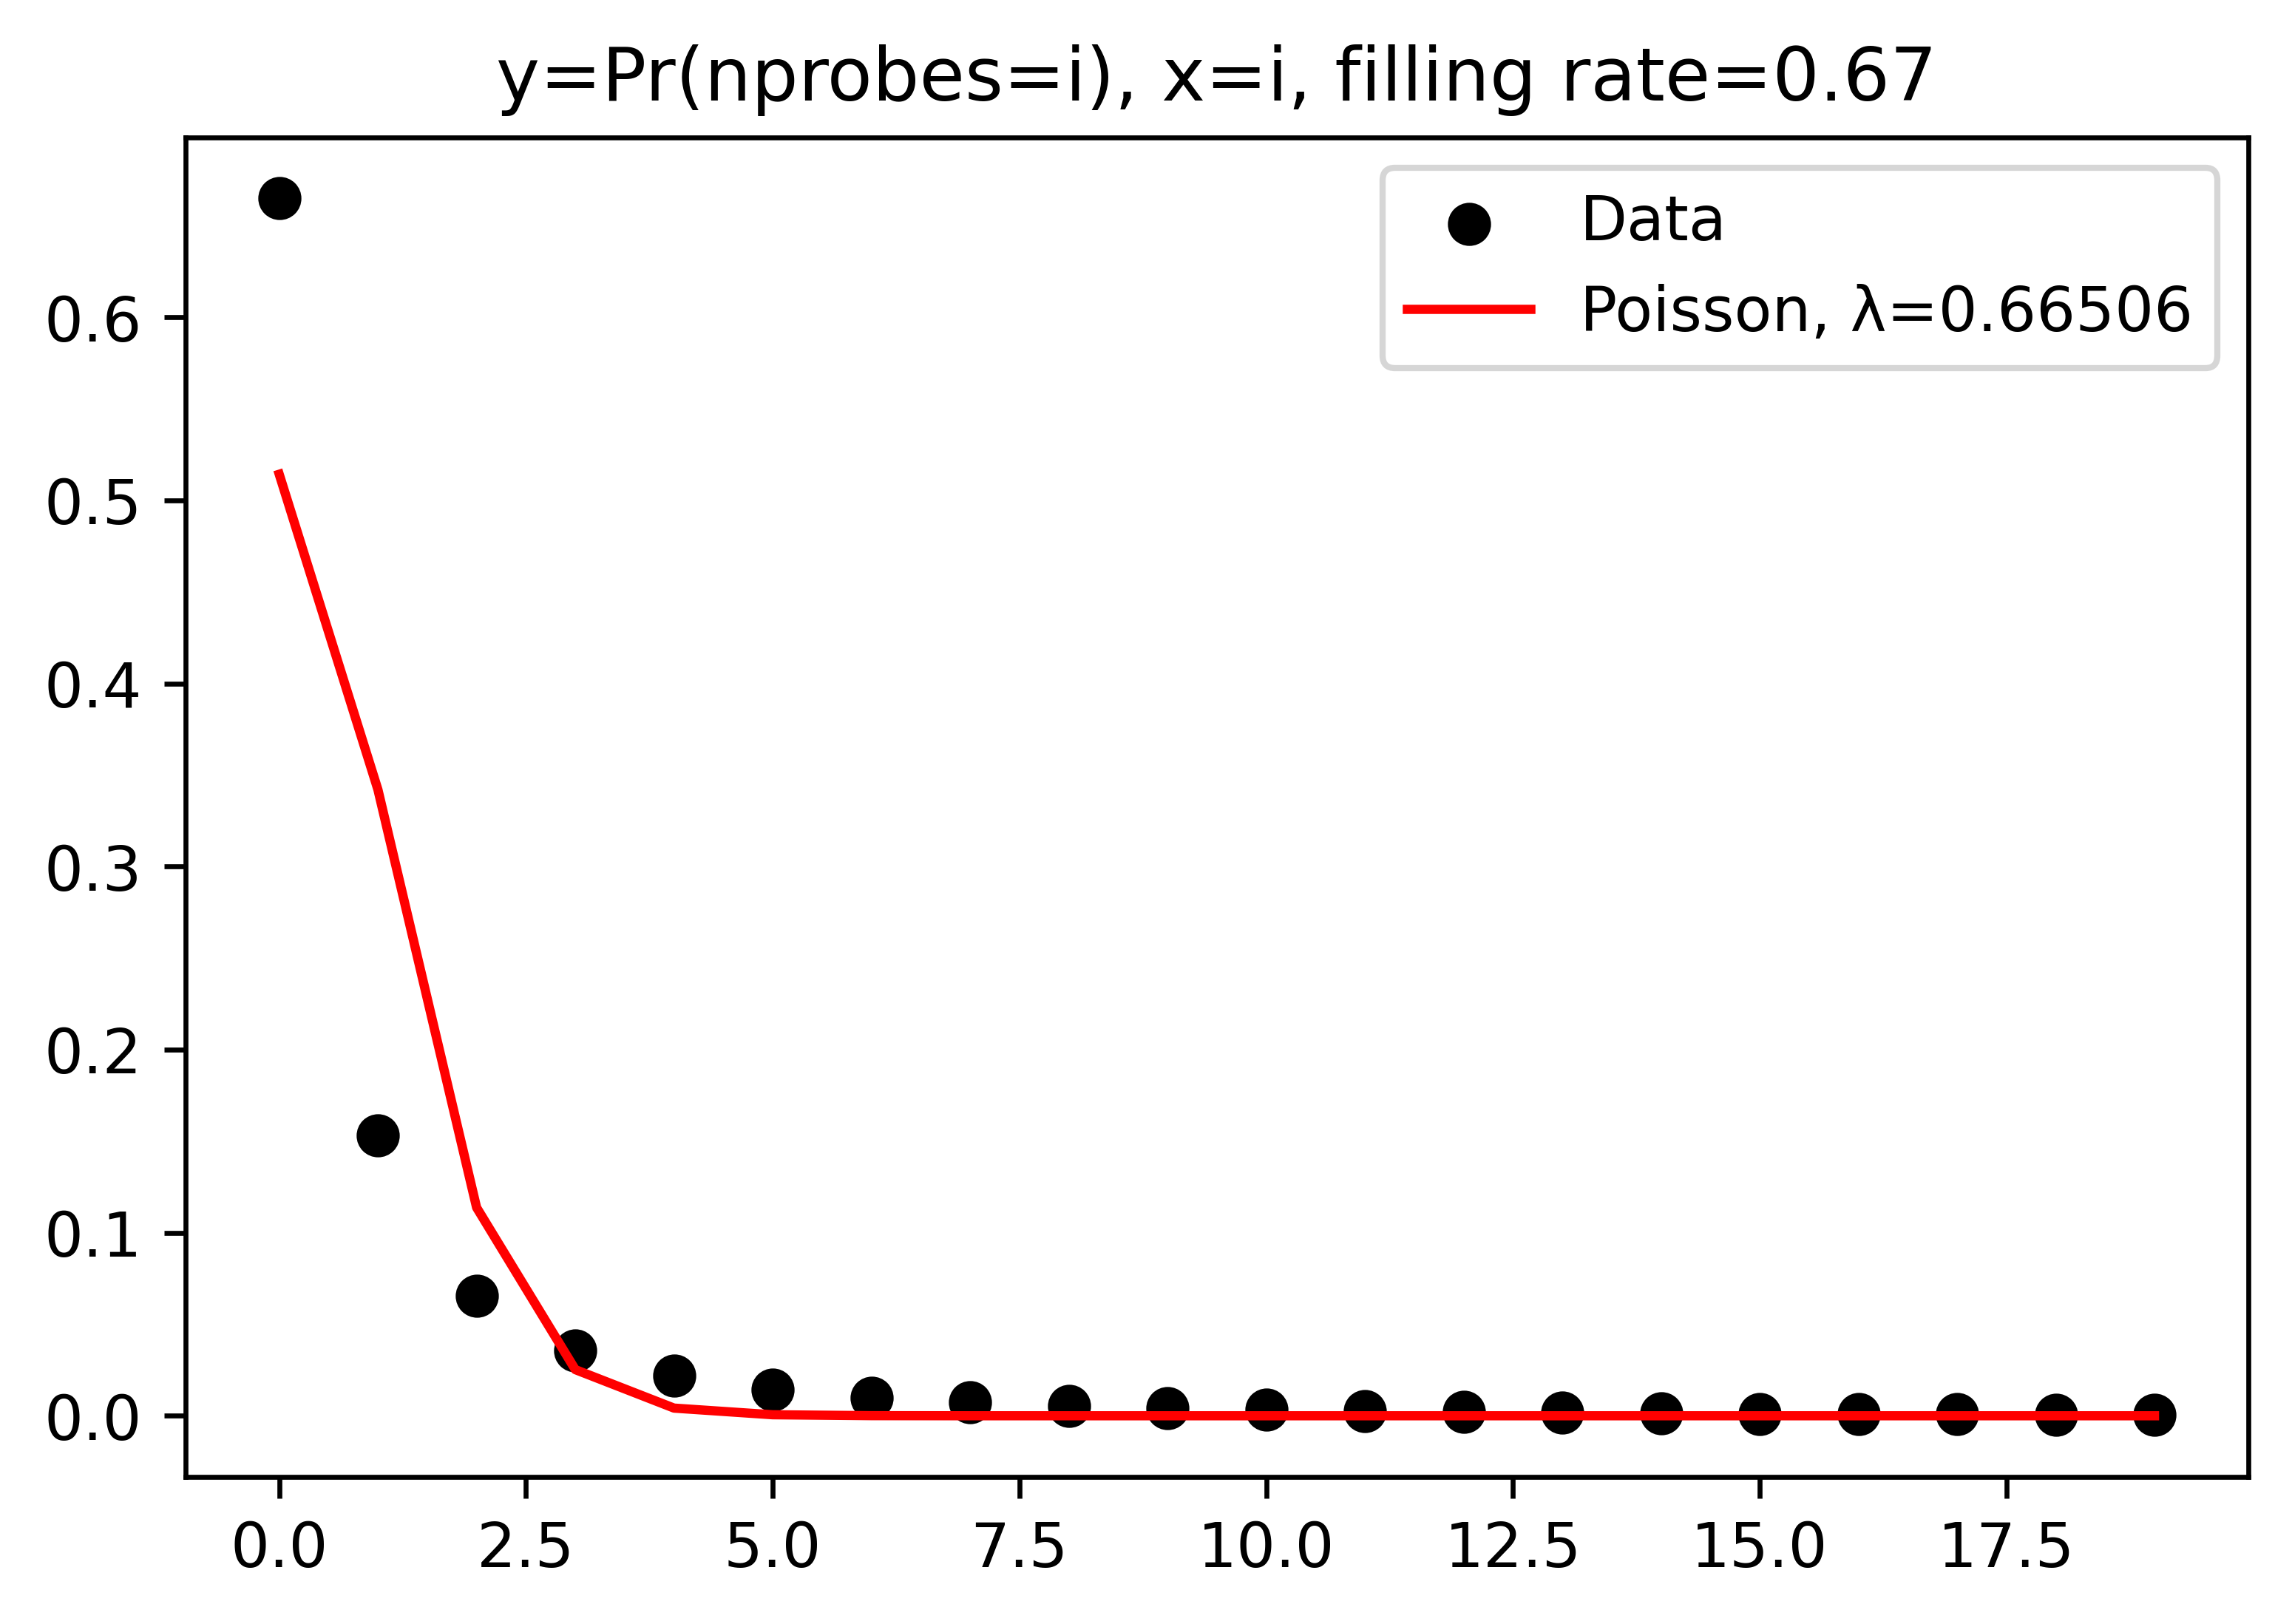

None

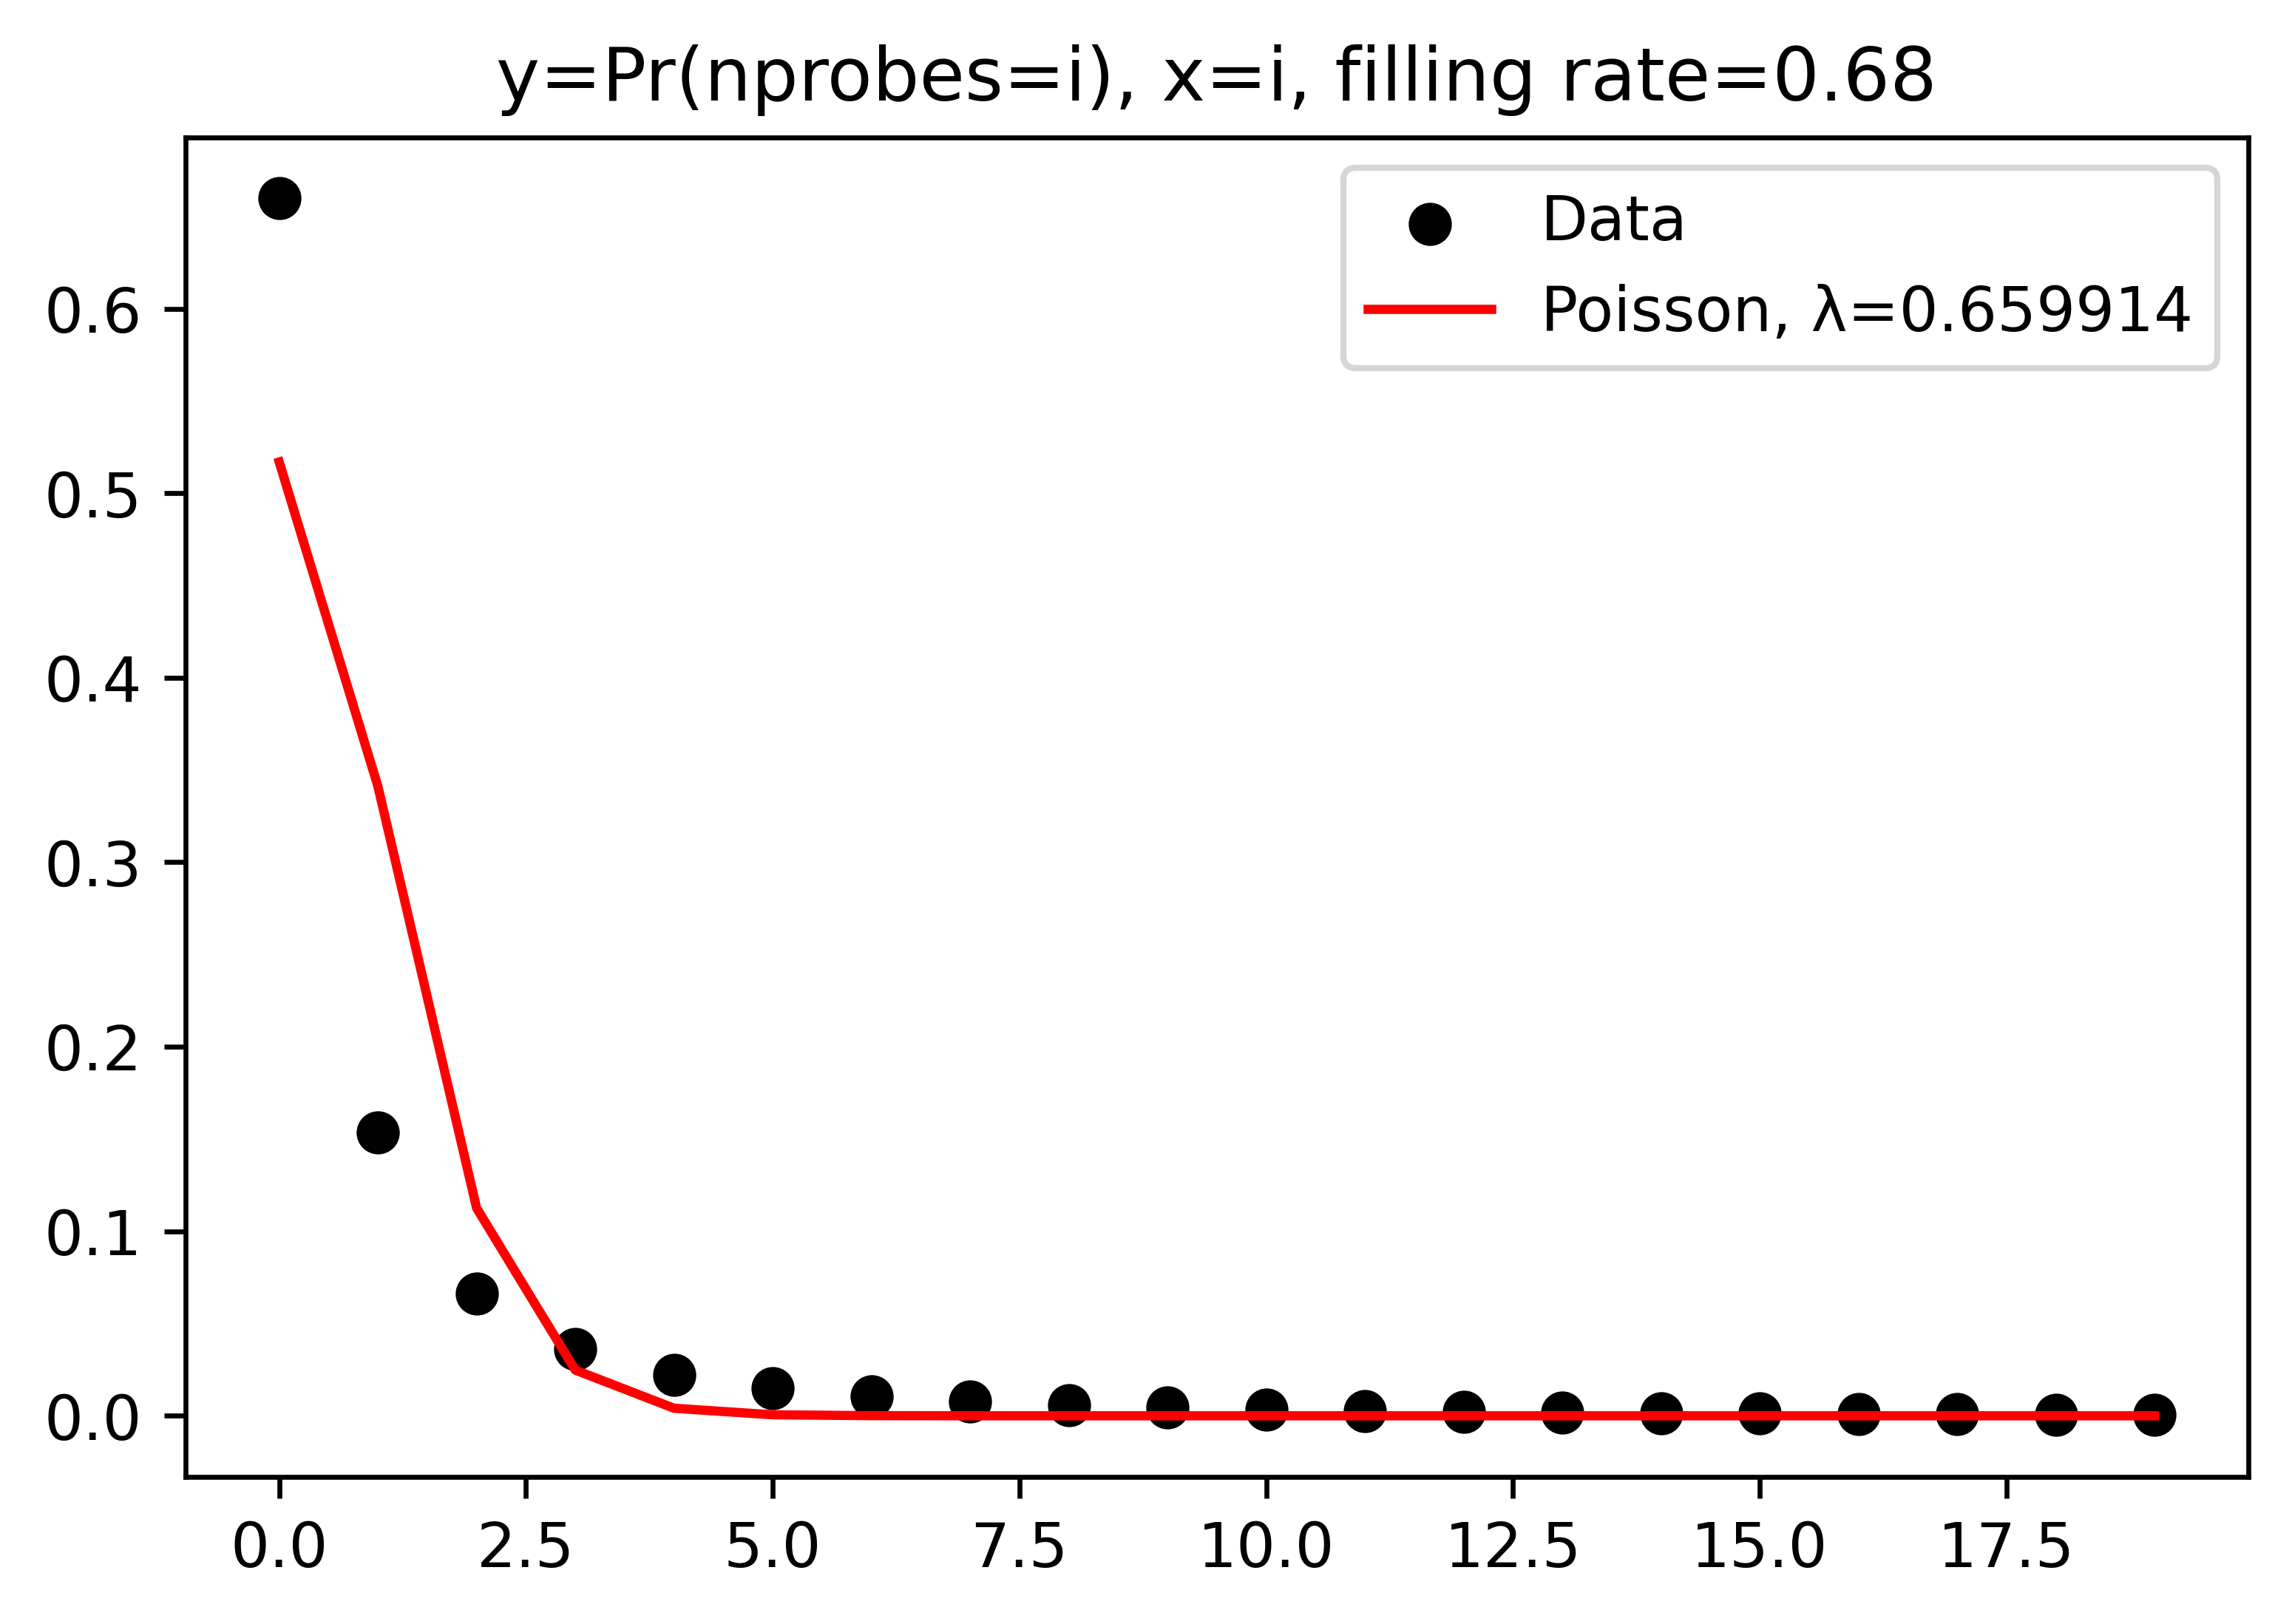

None

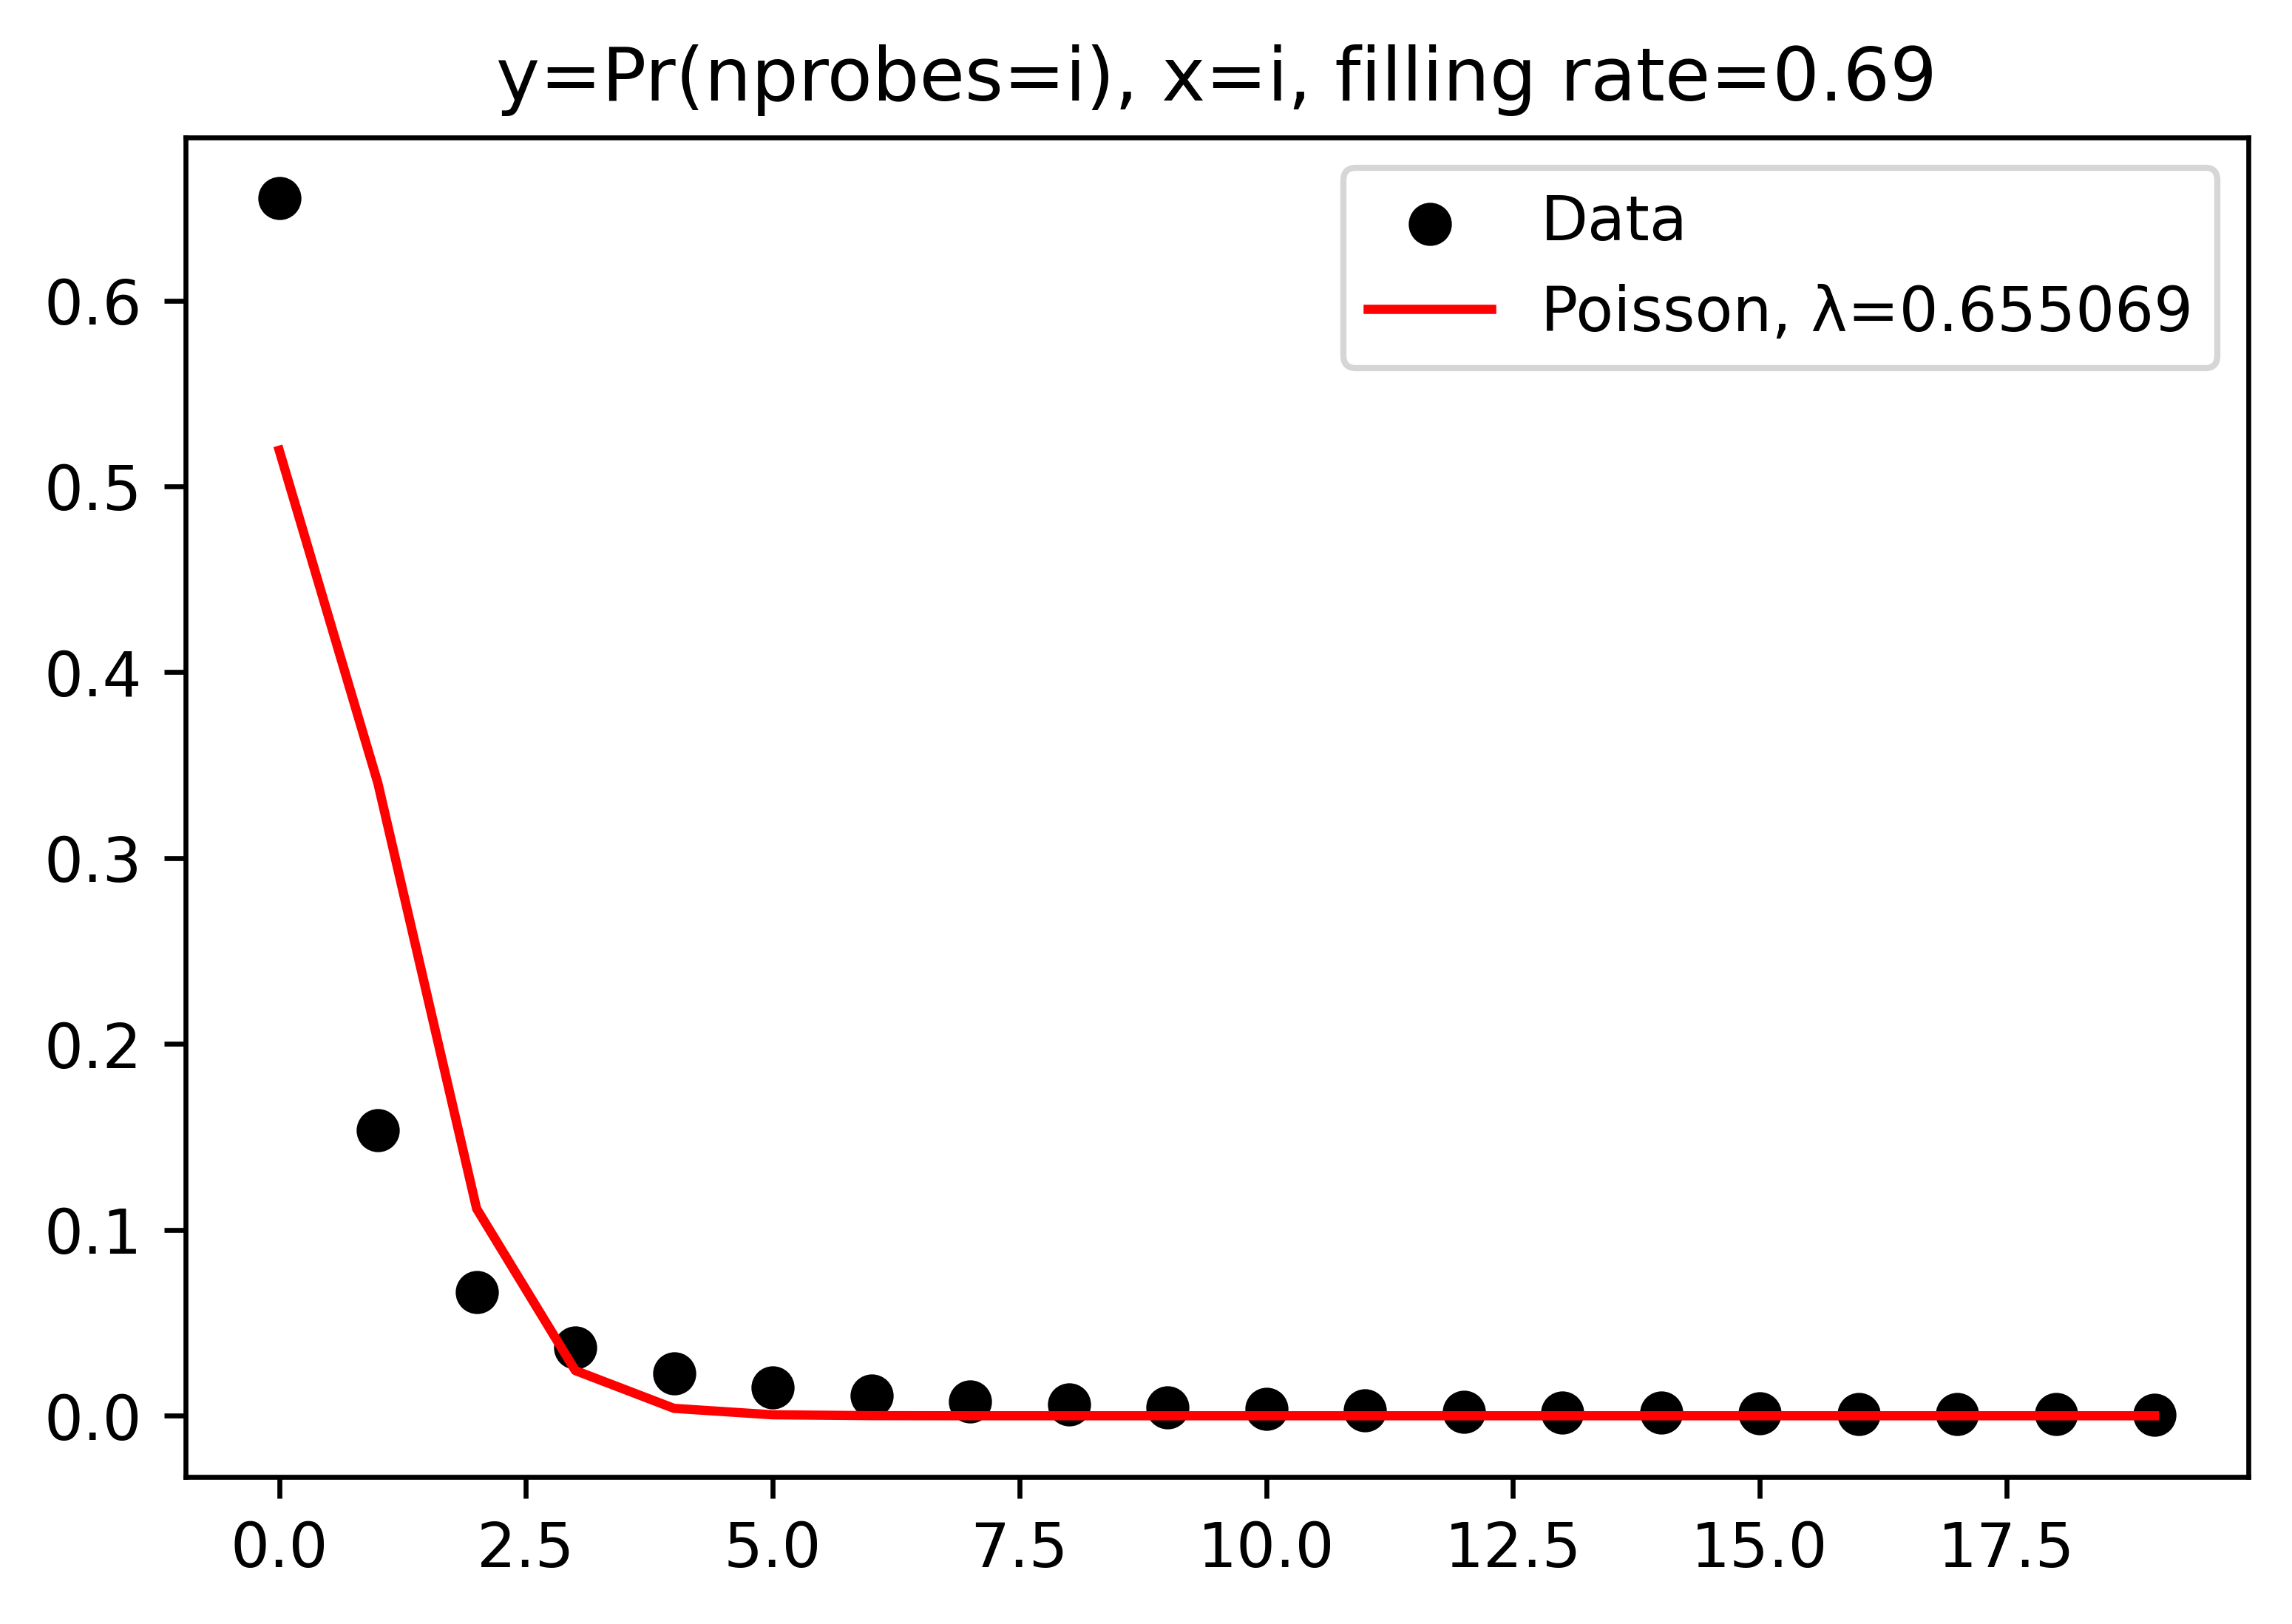

None

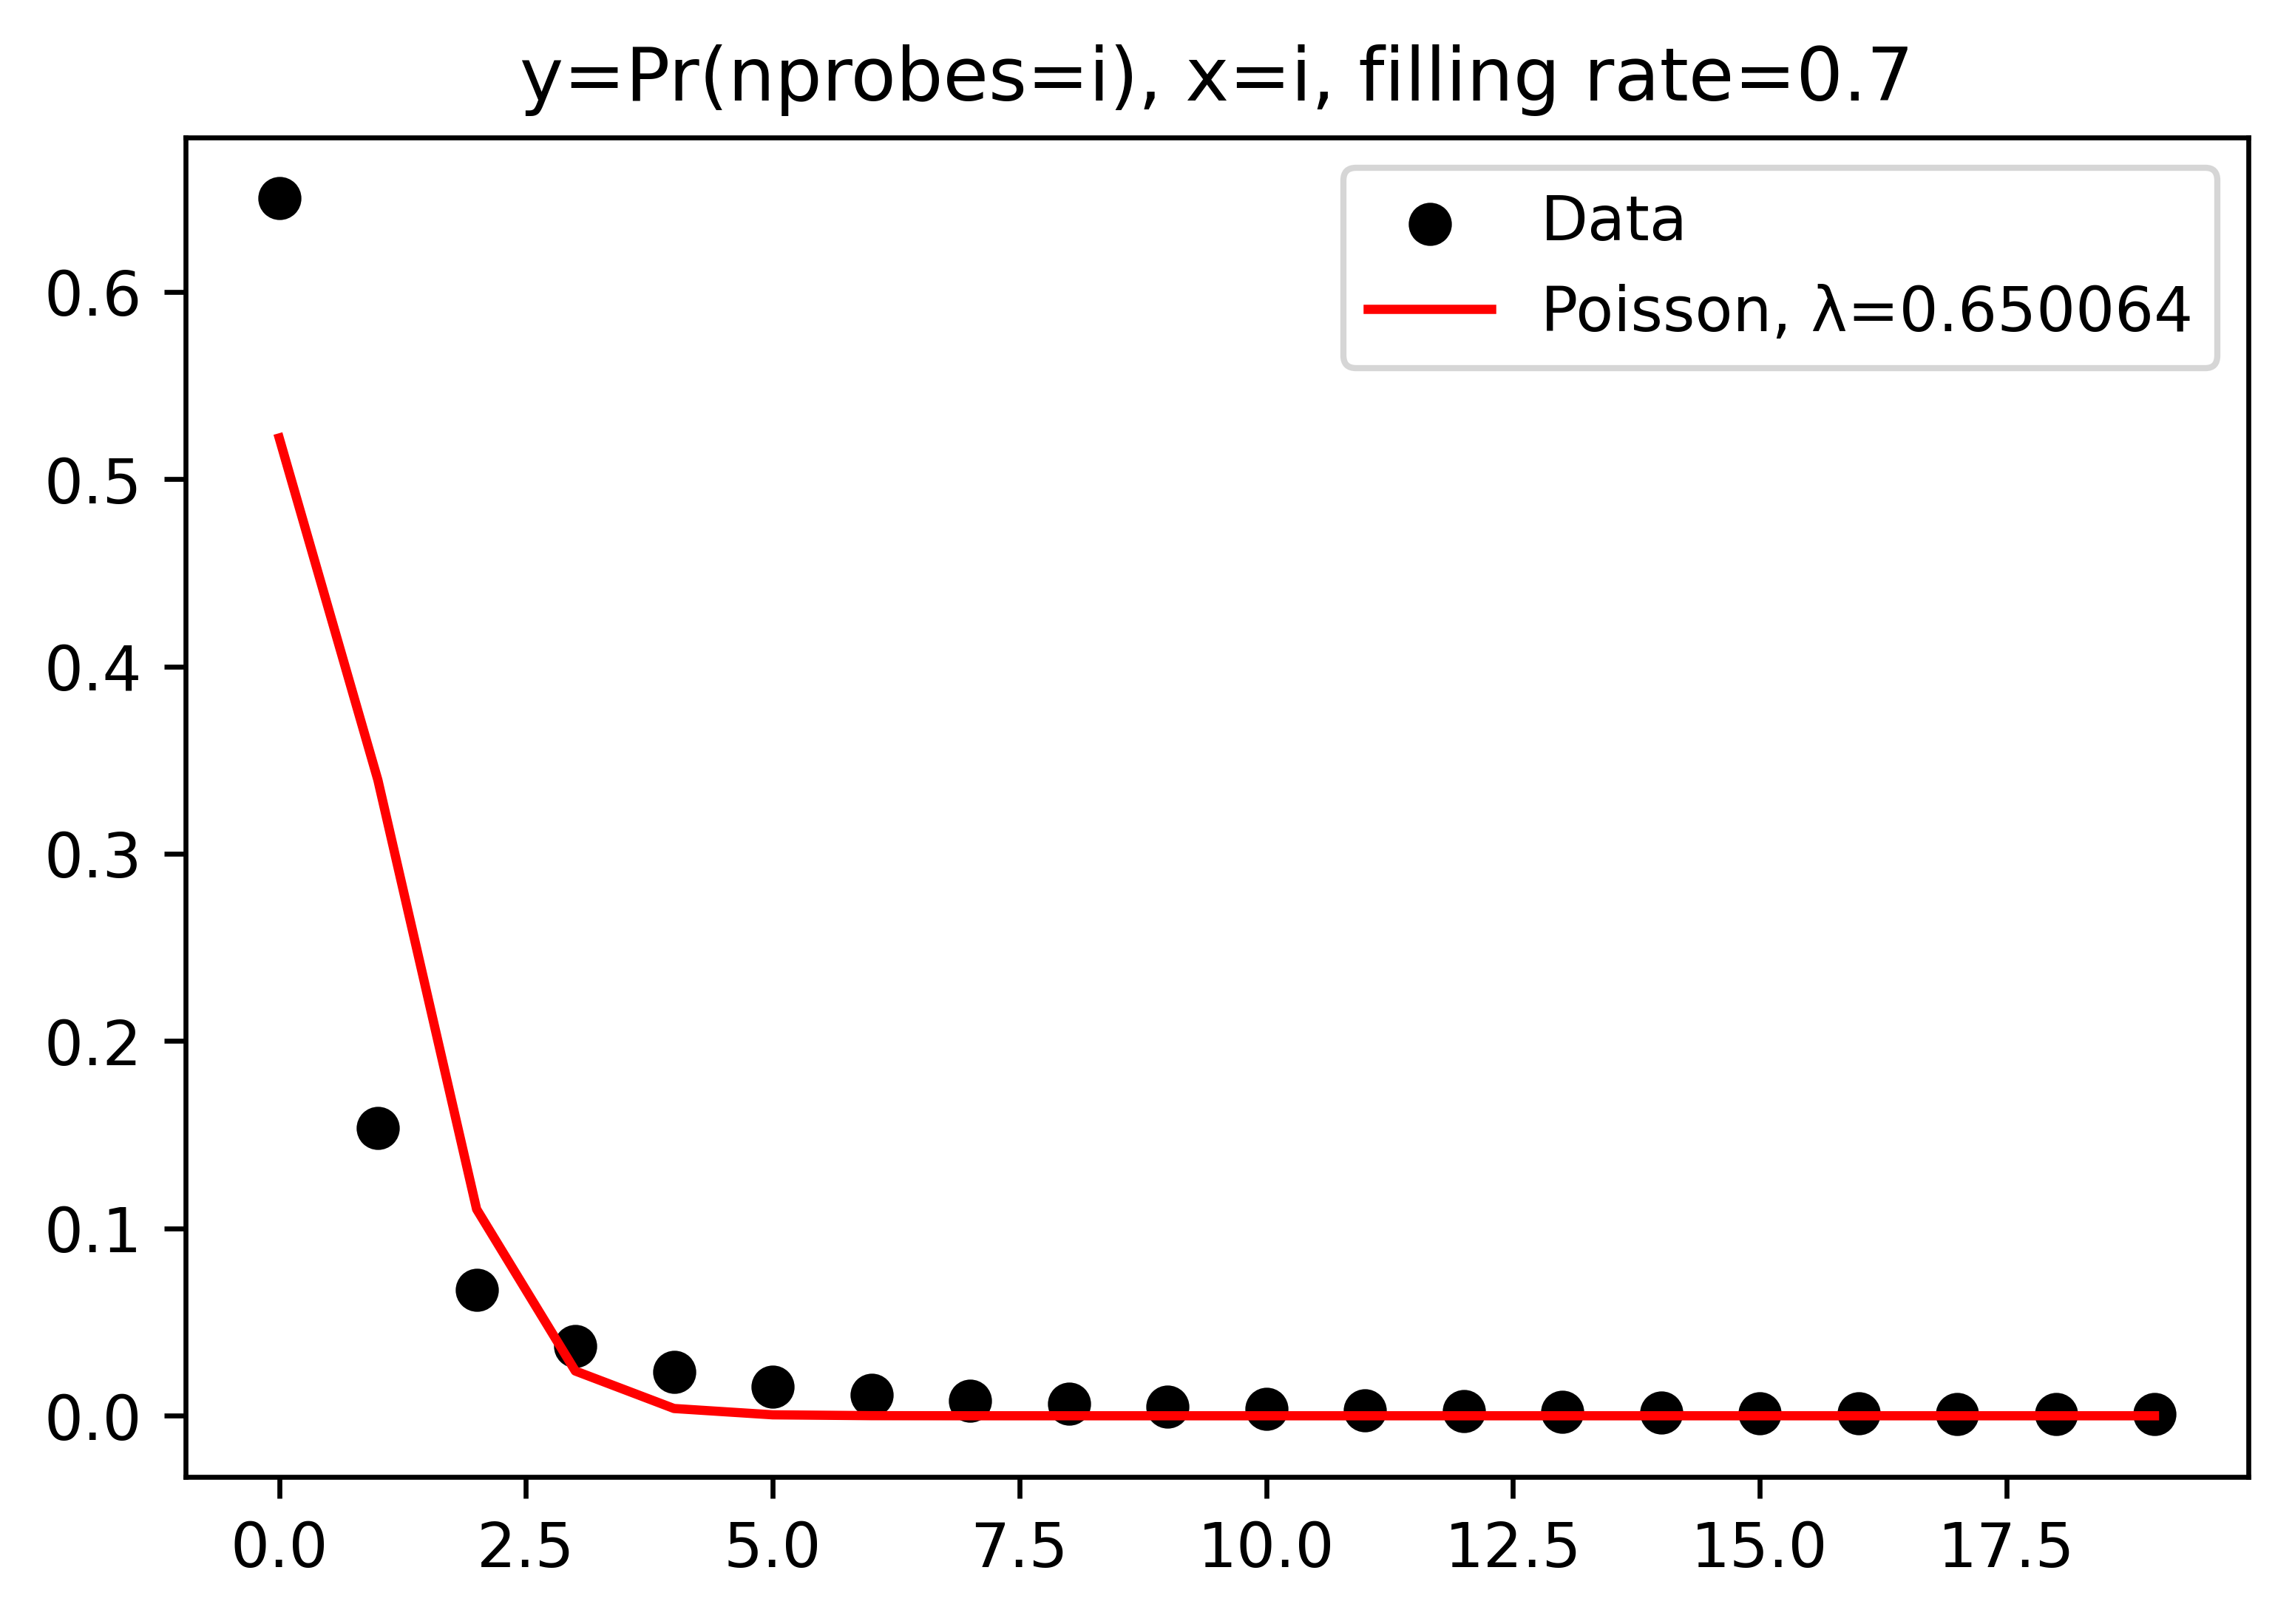

None

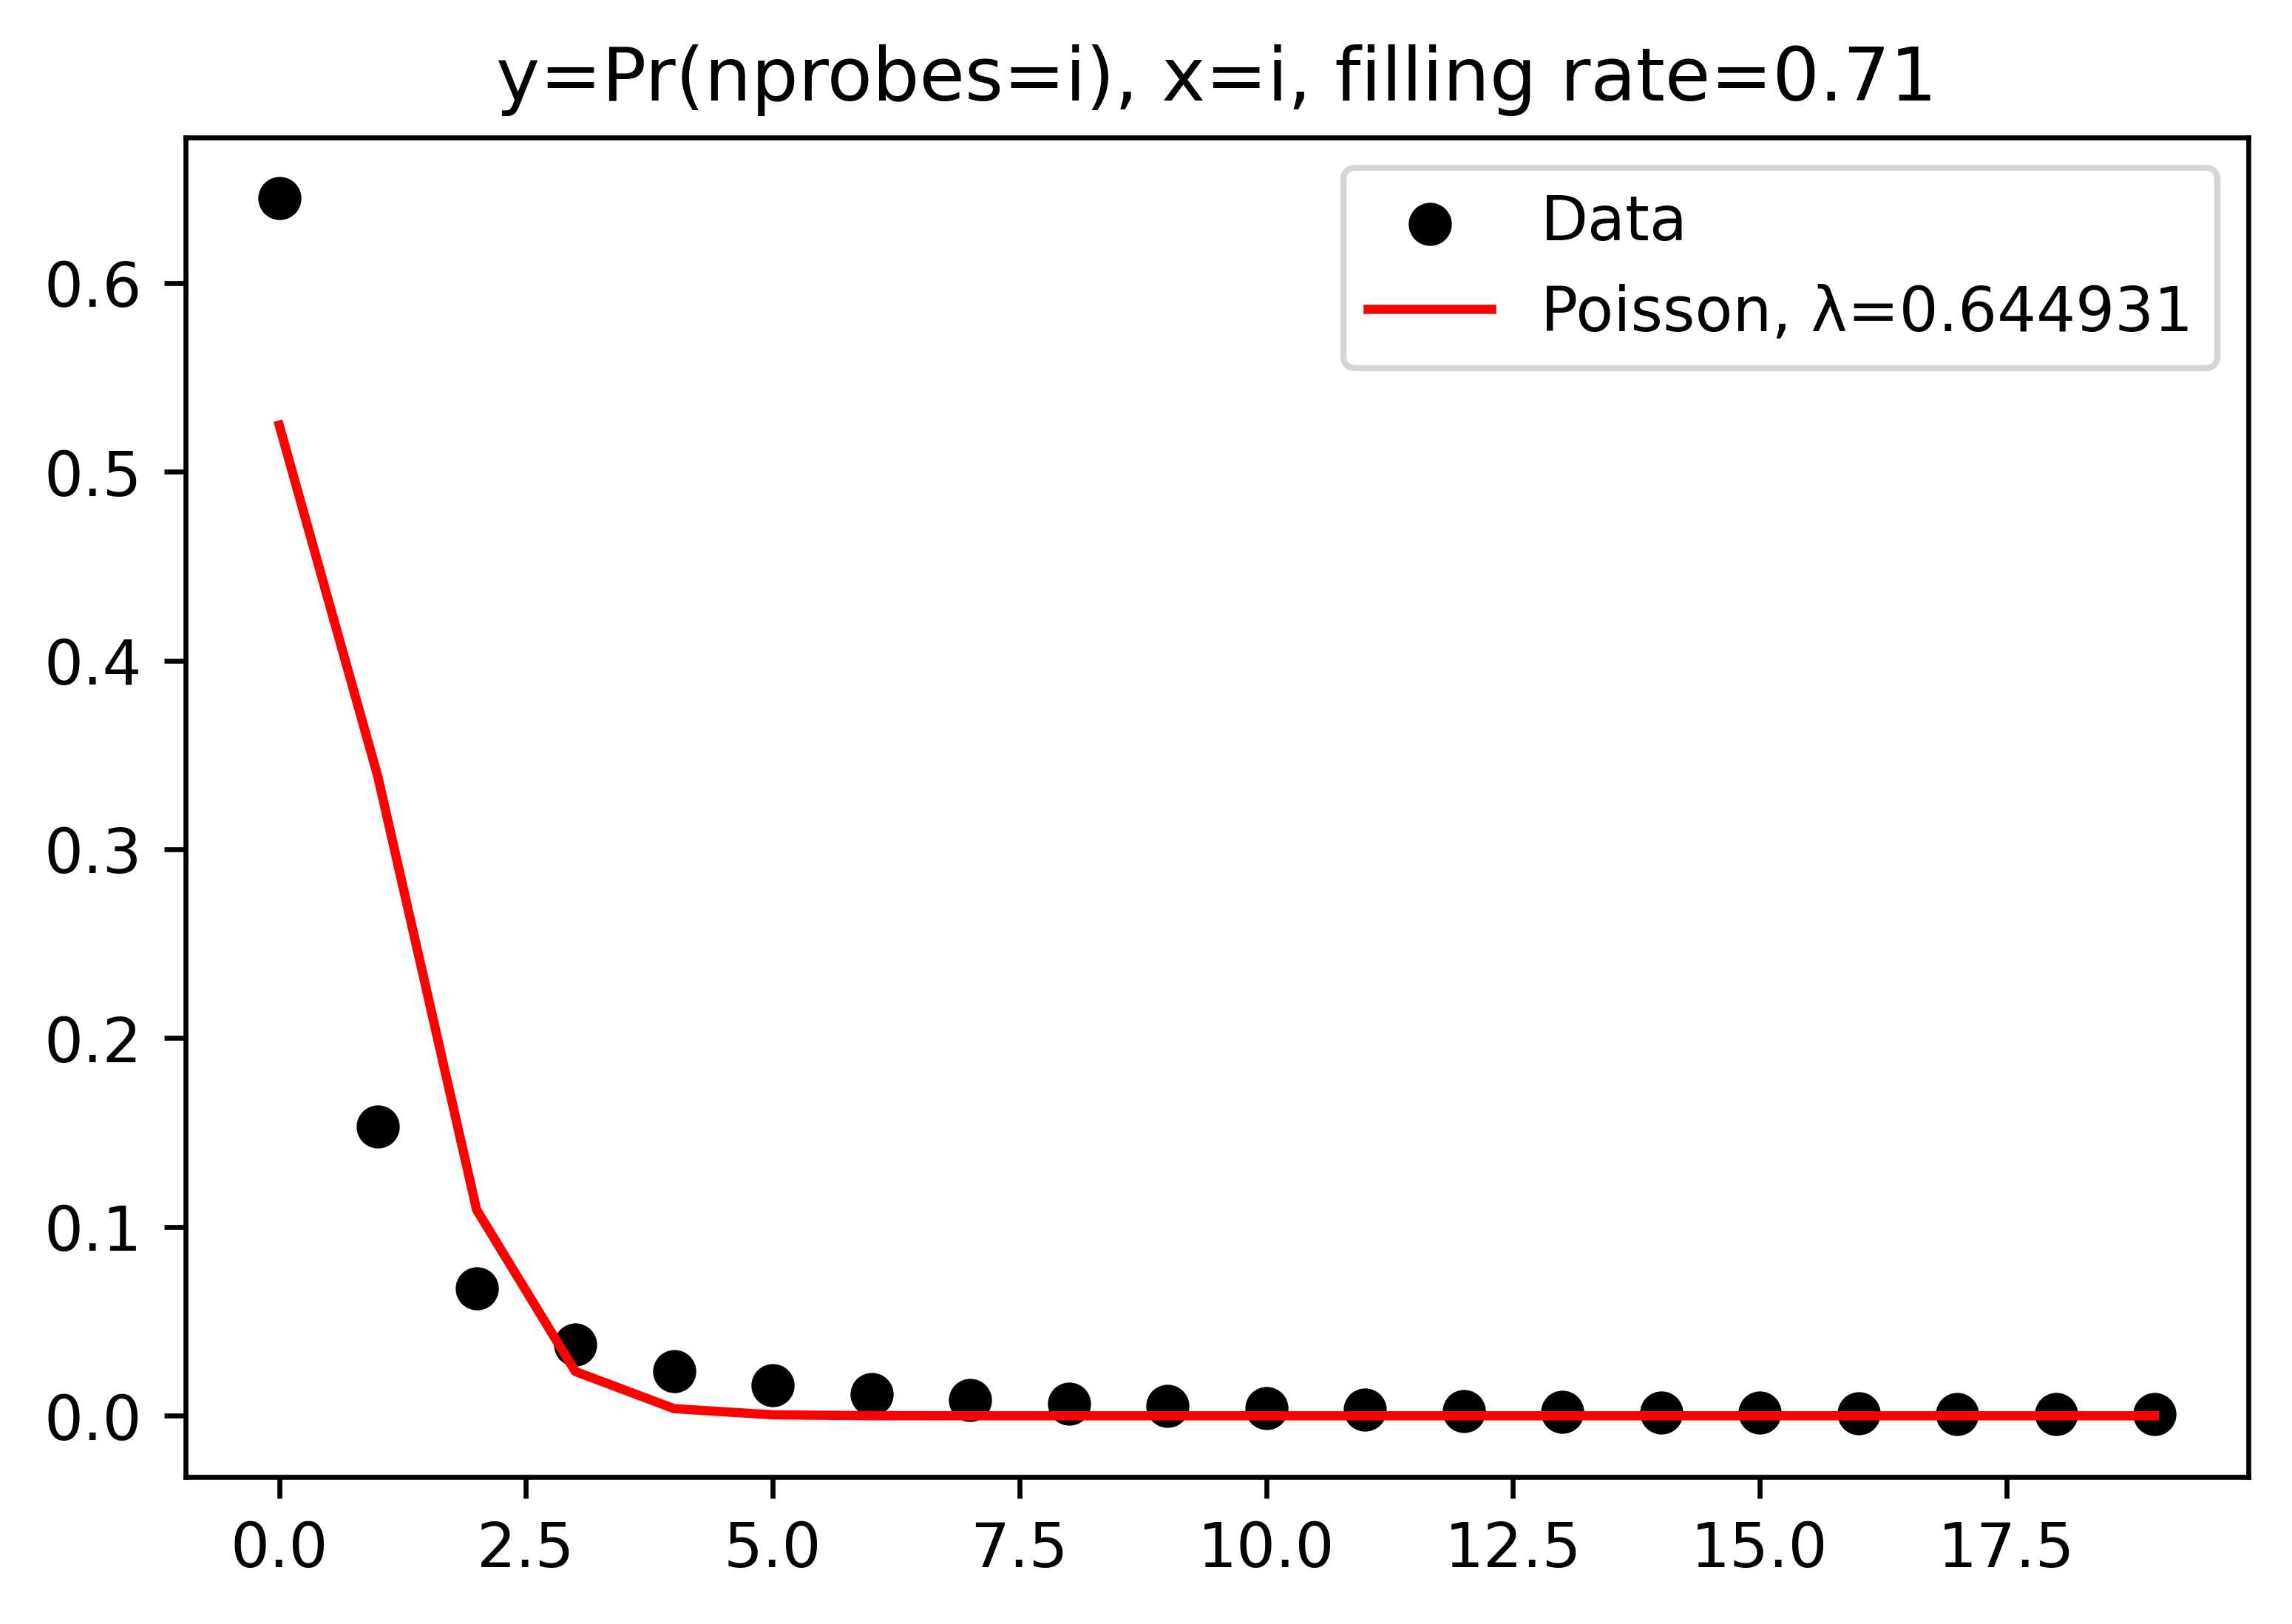

None

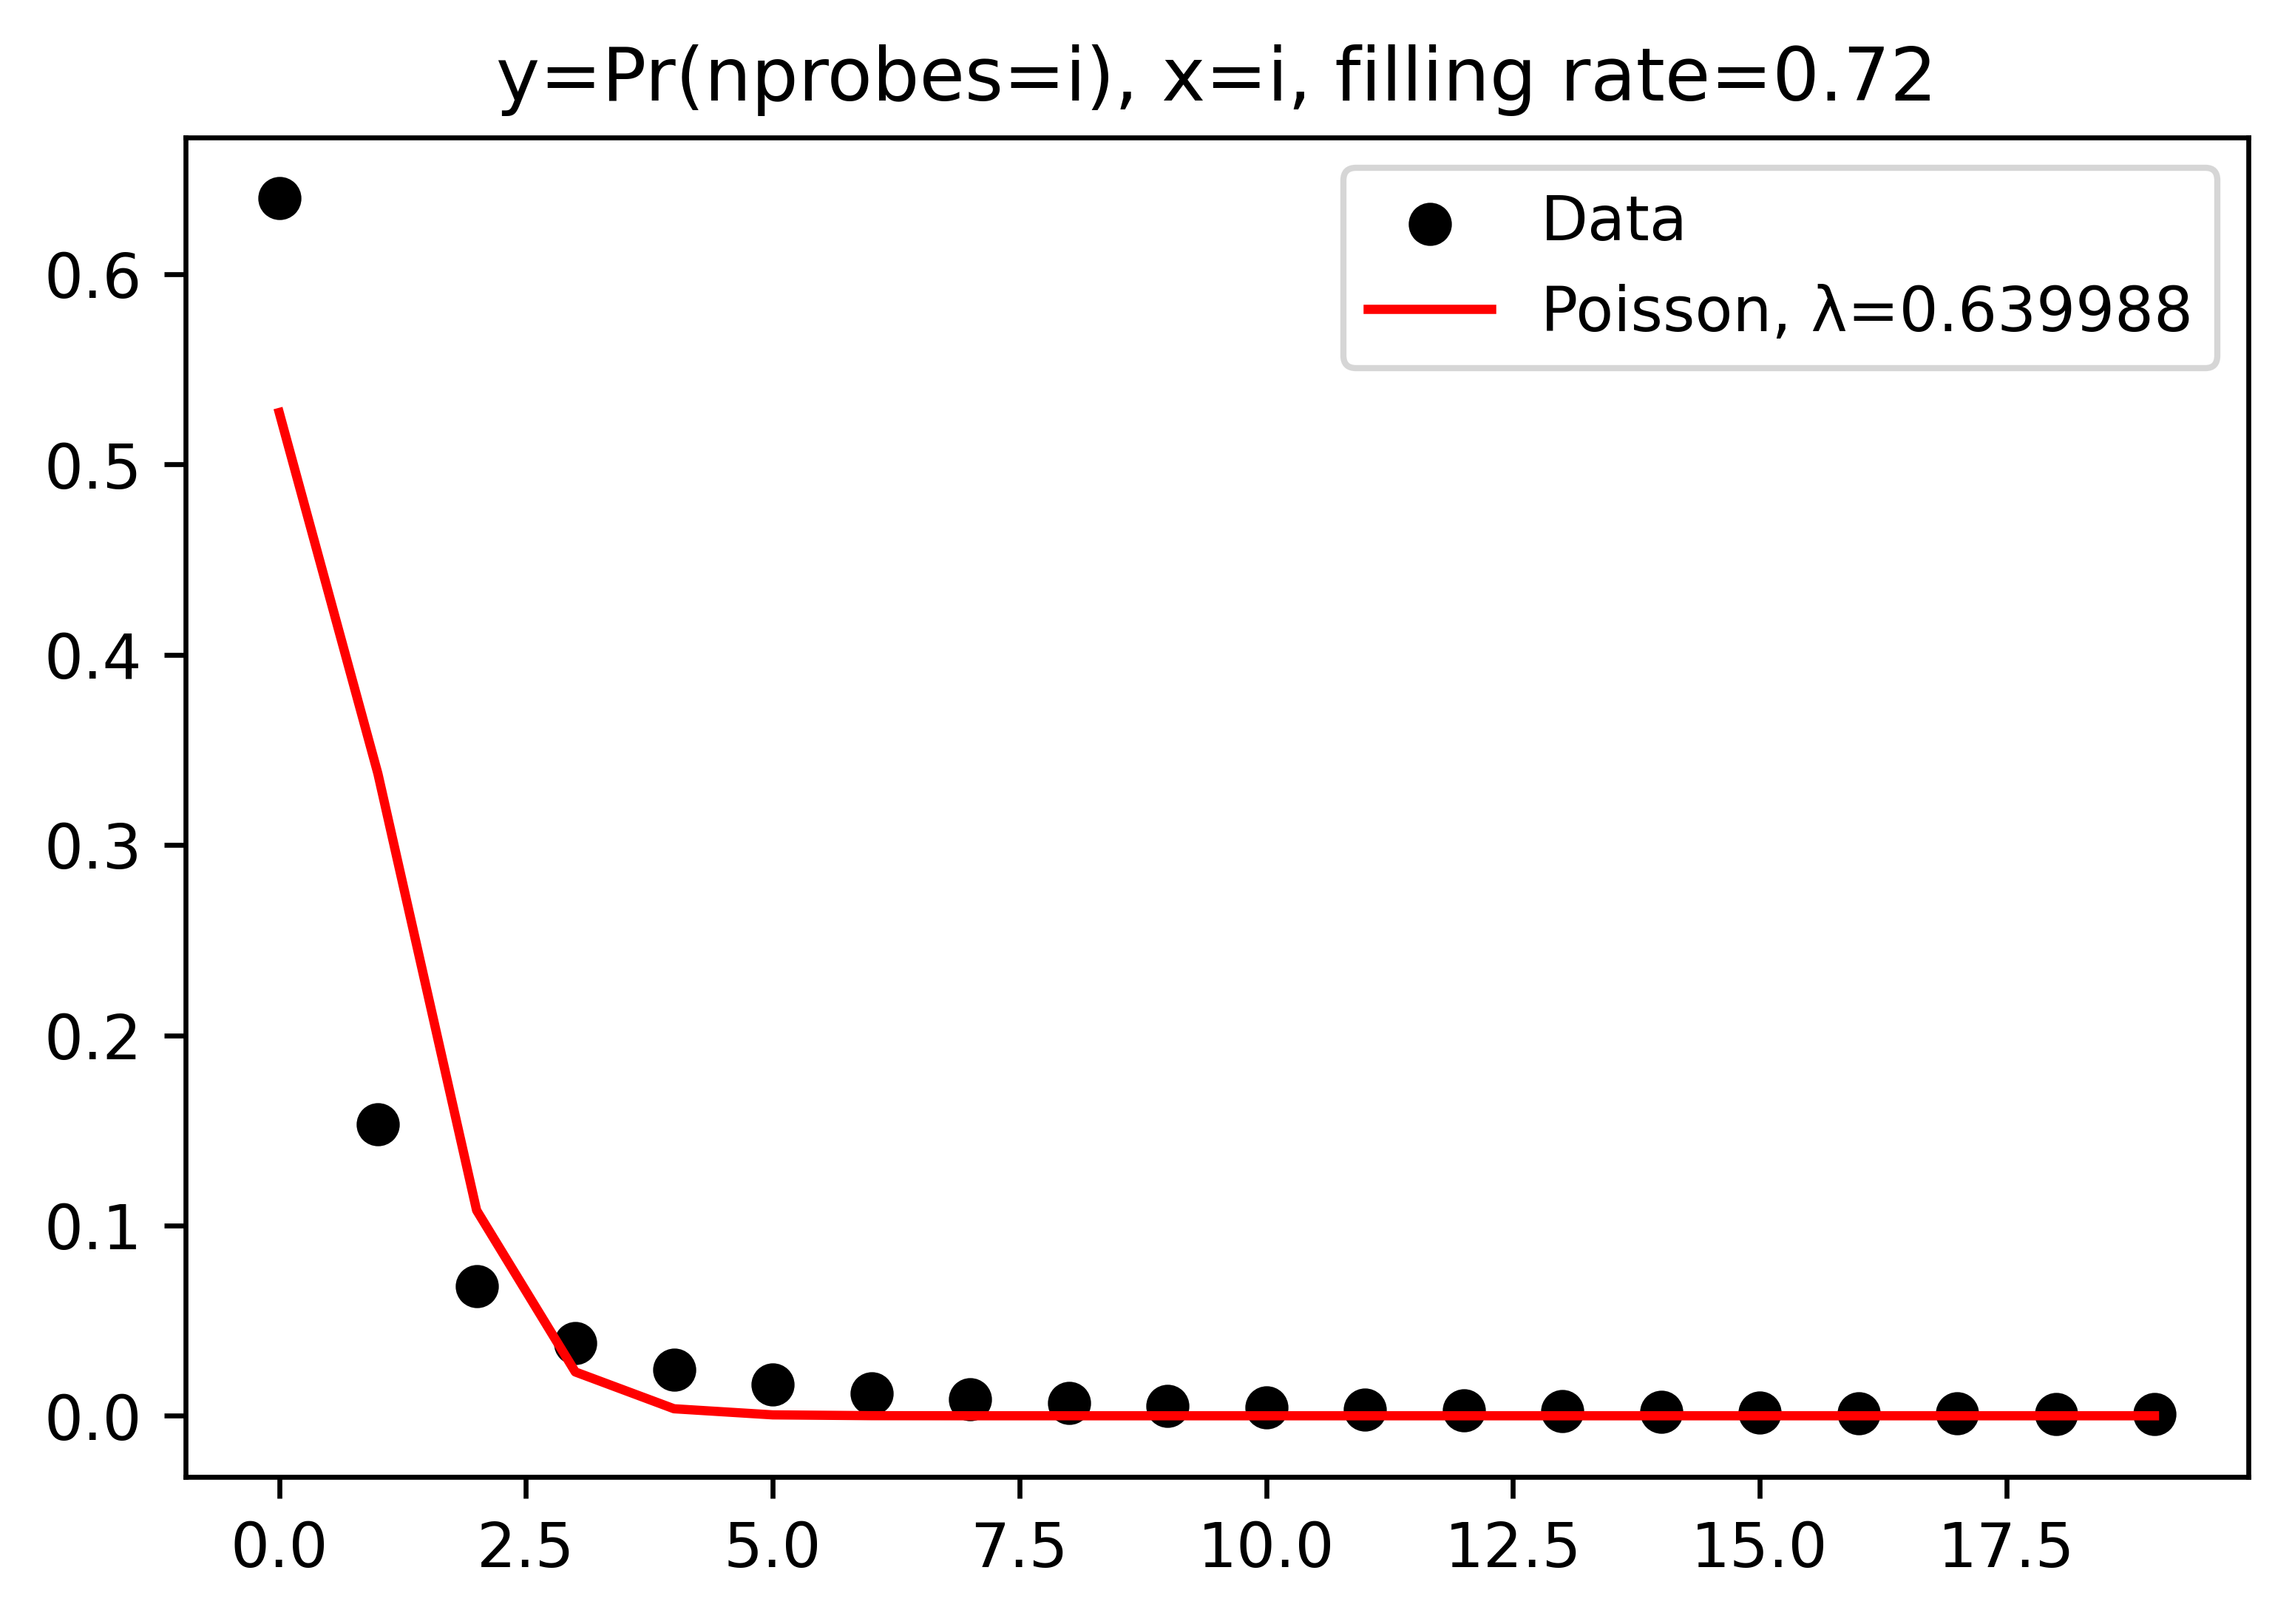

None

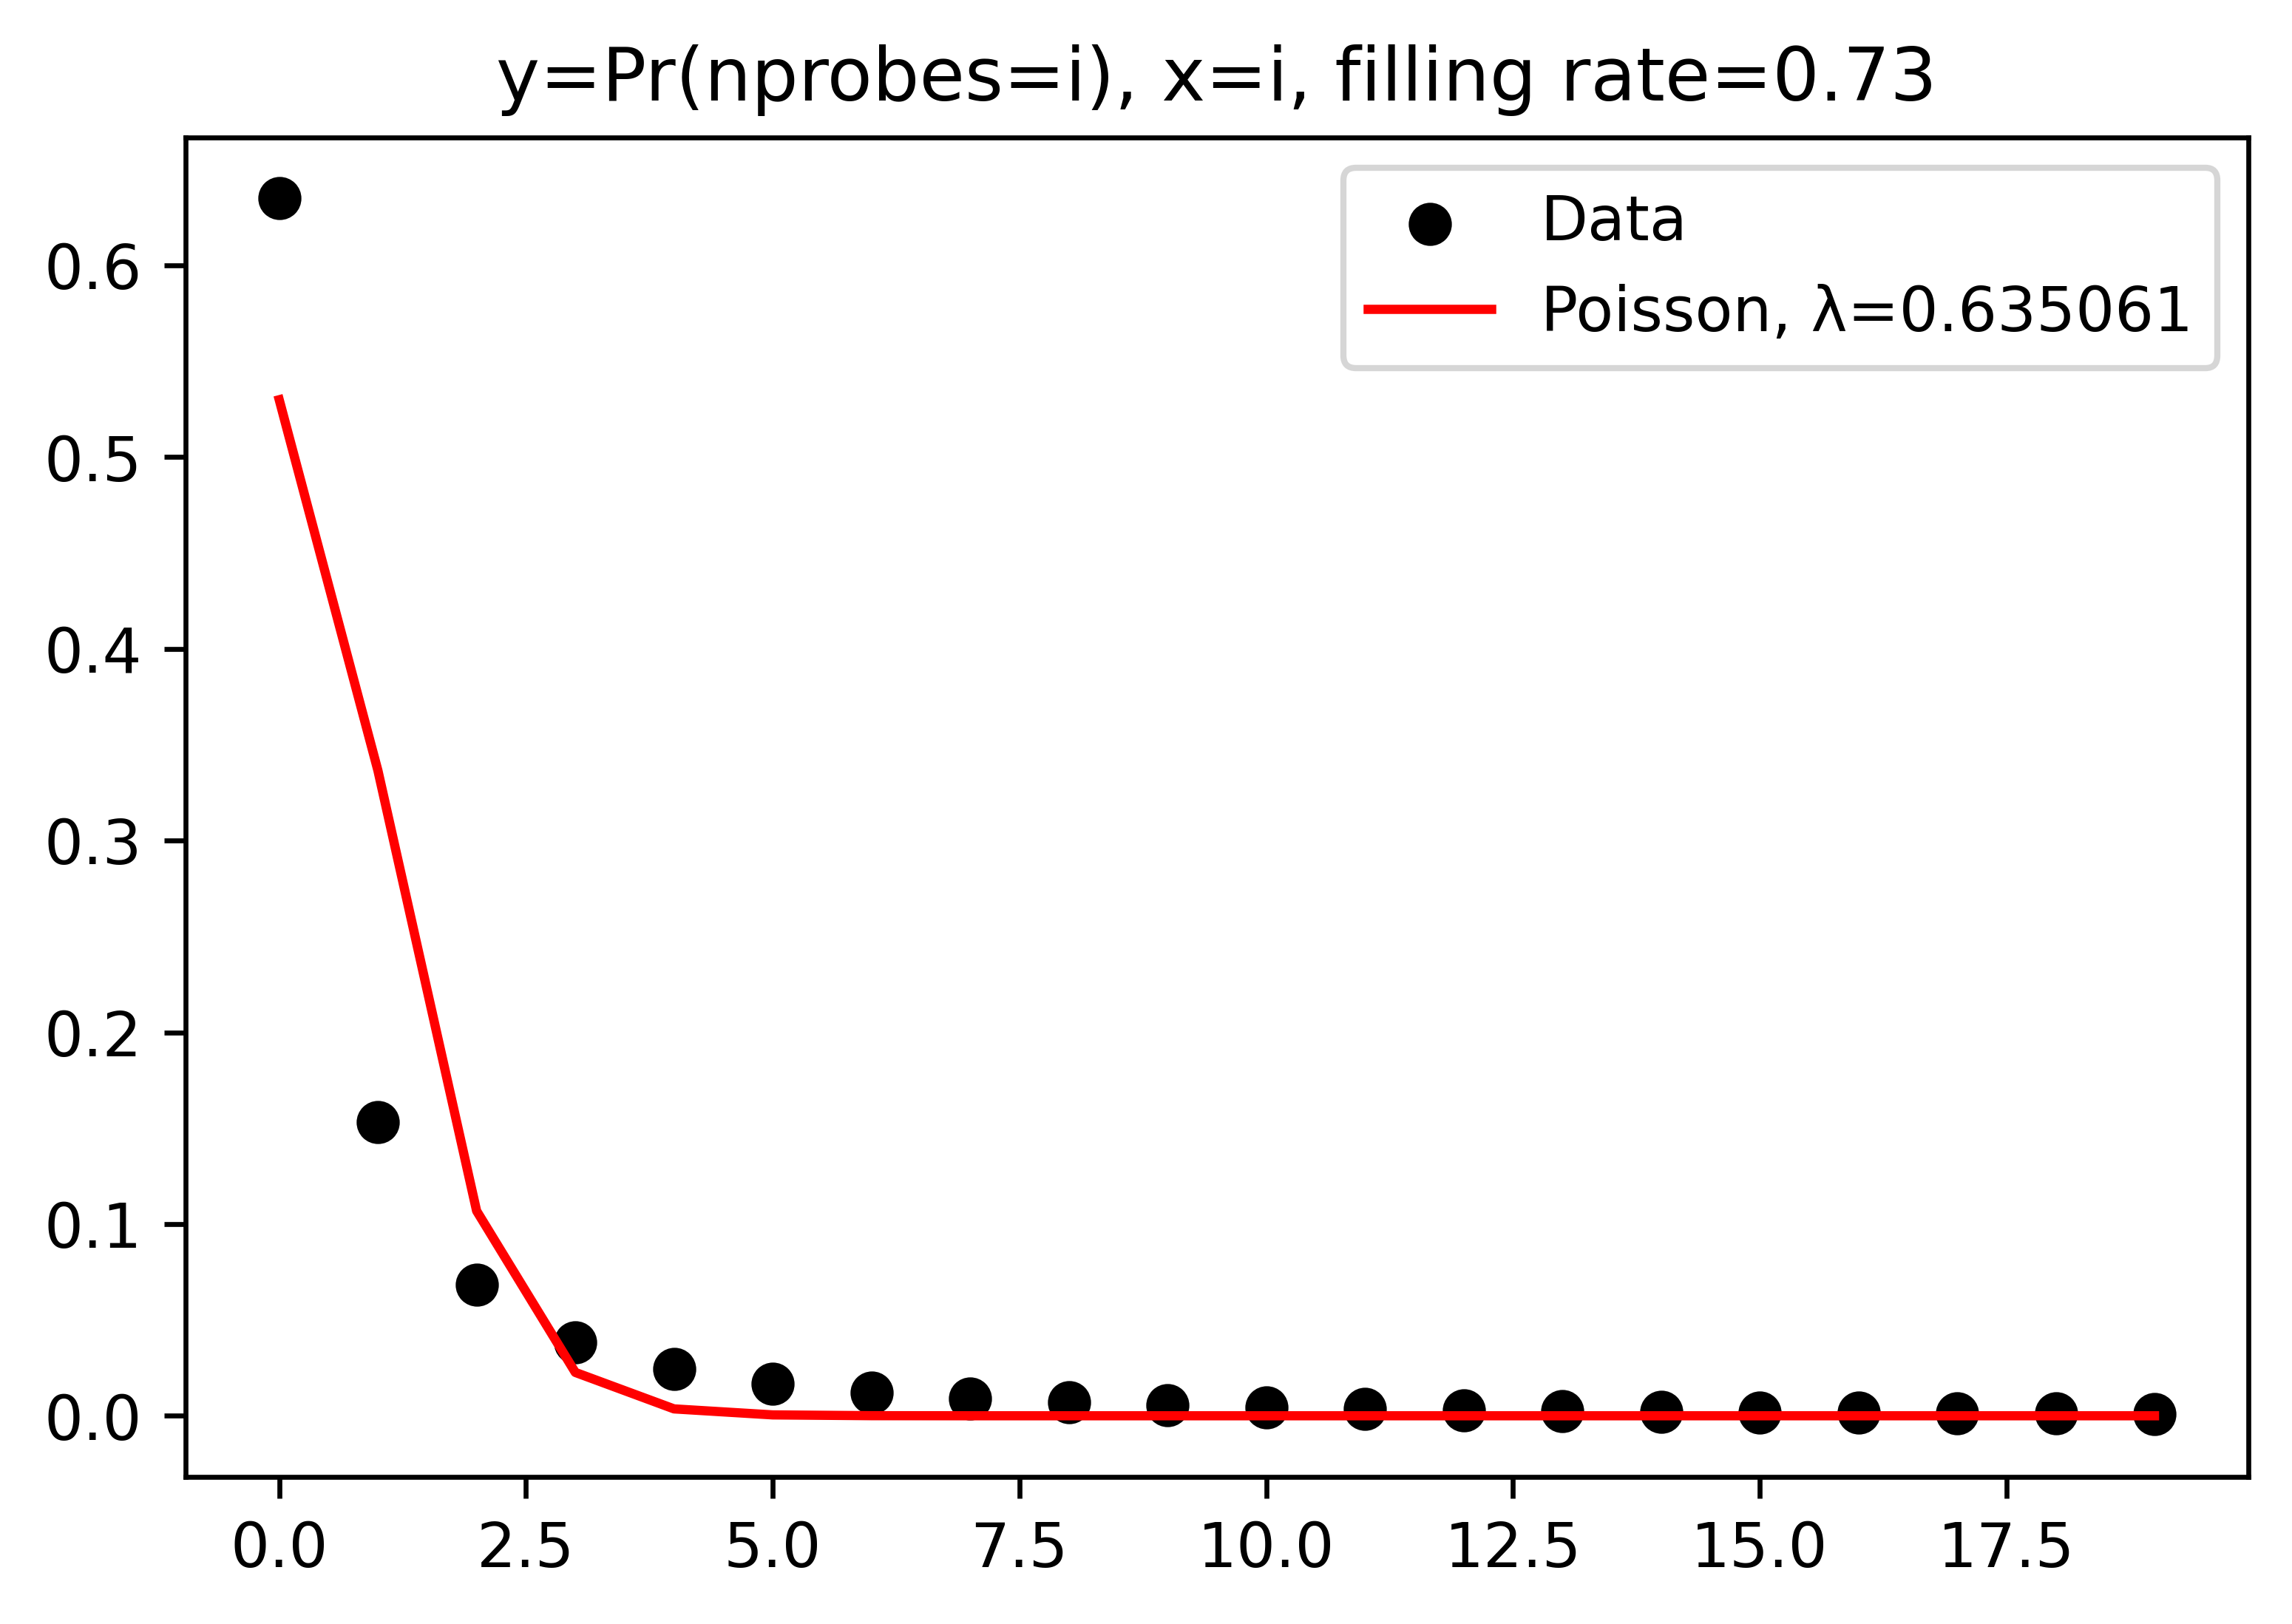

None

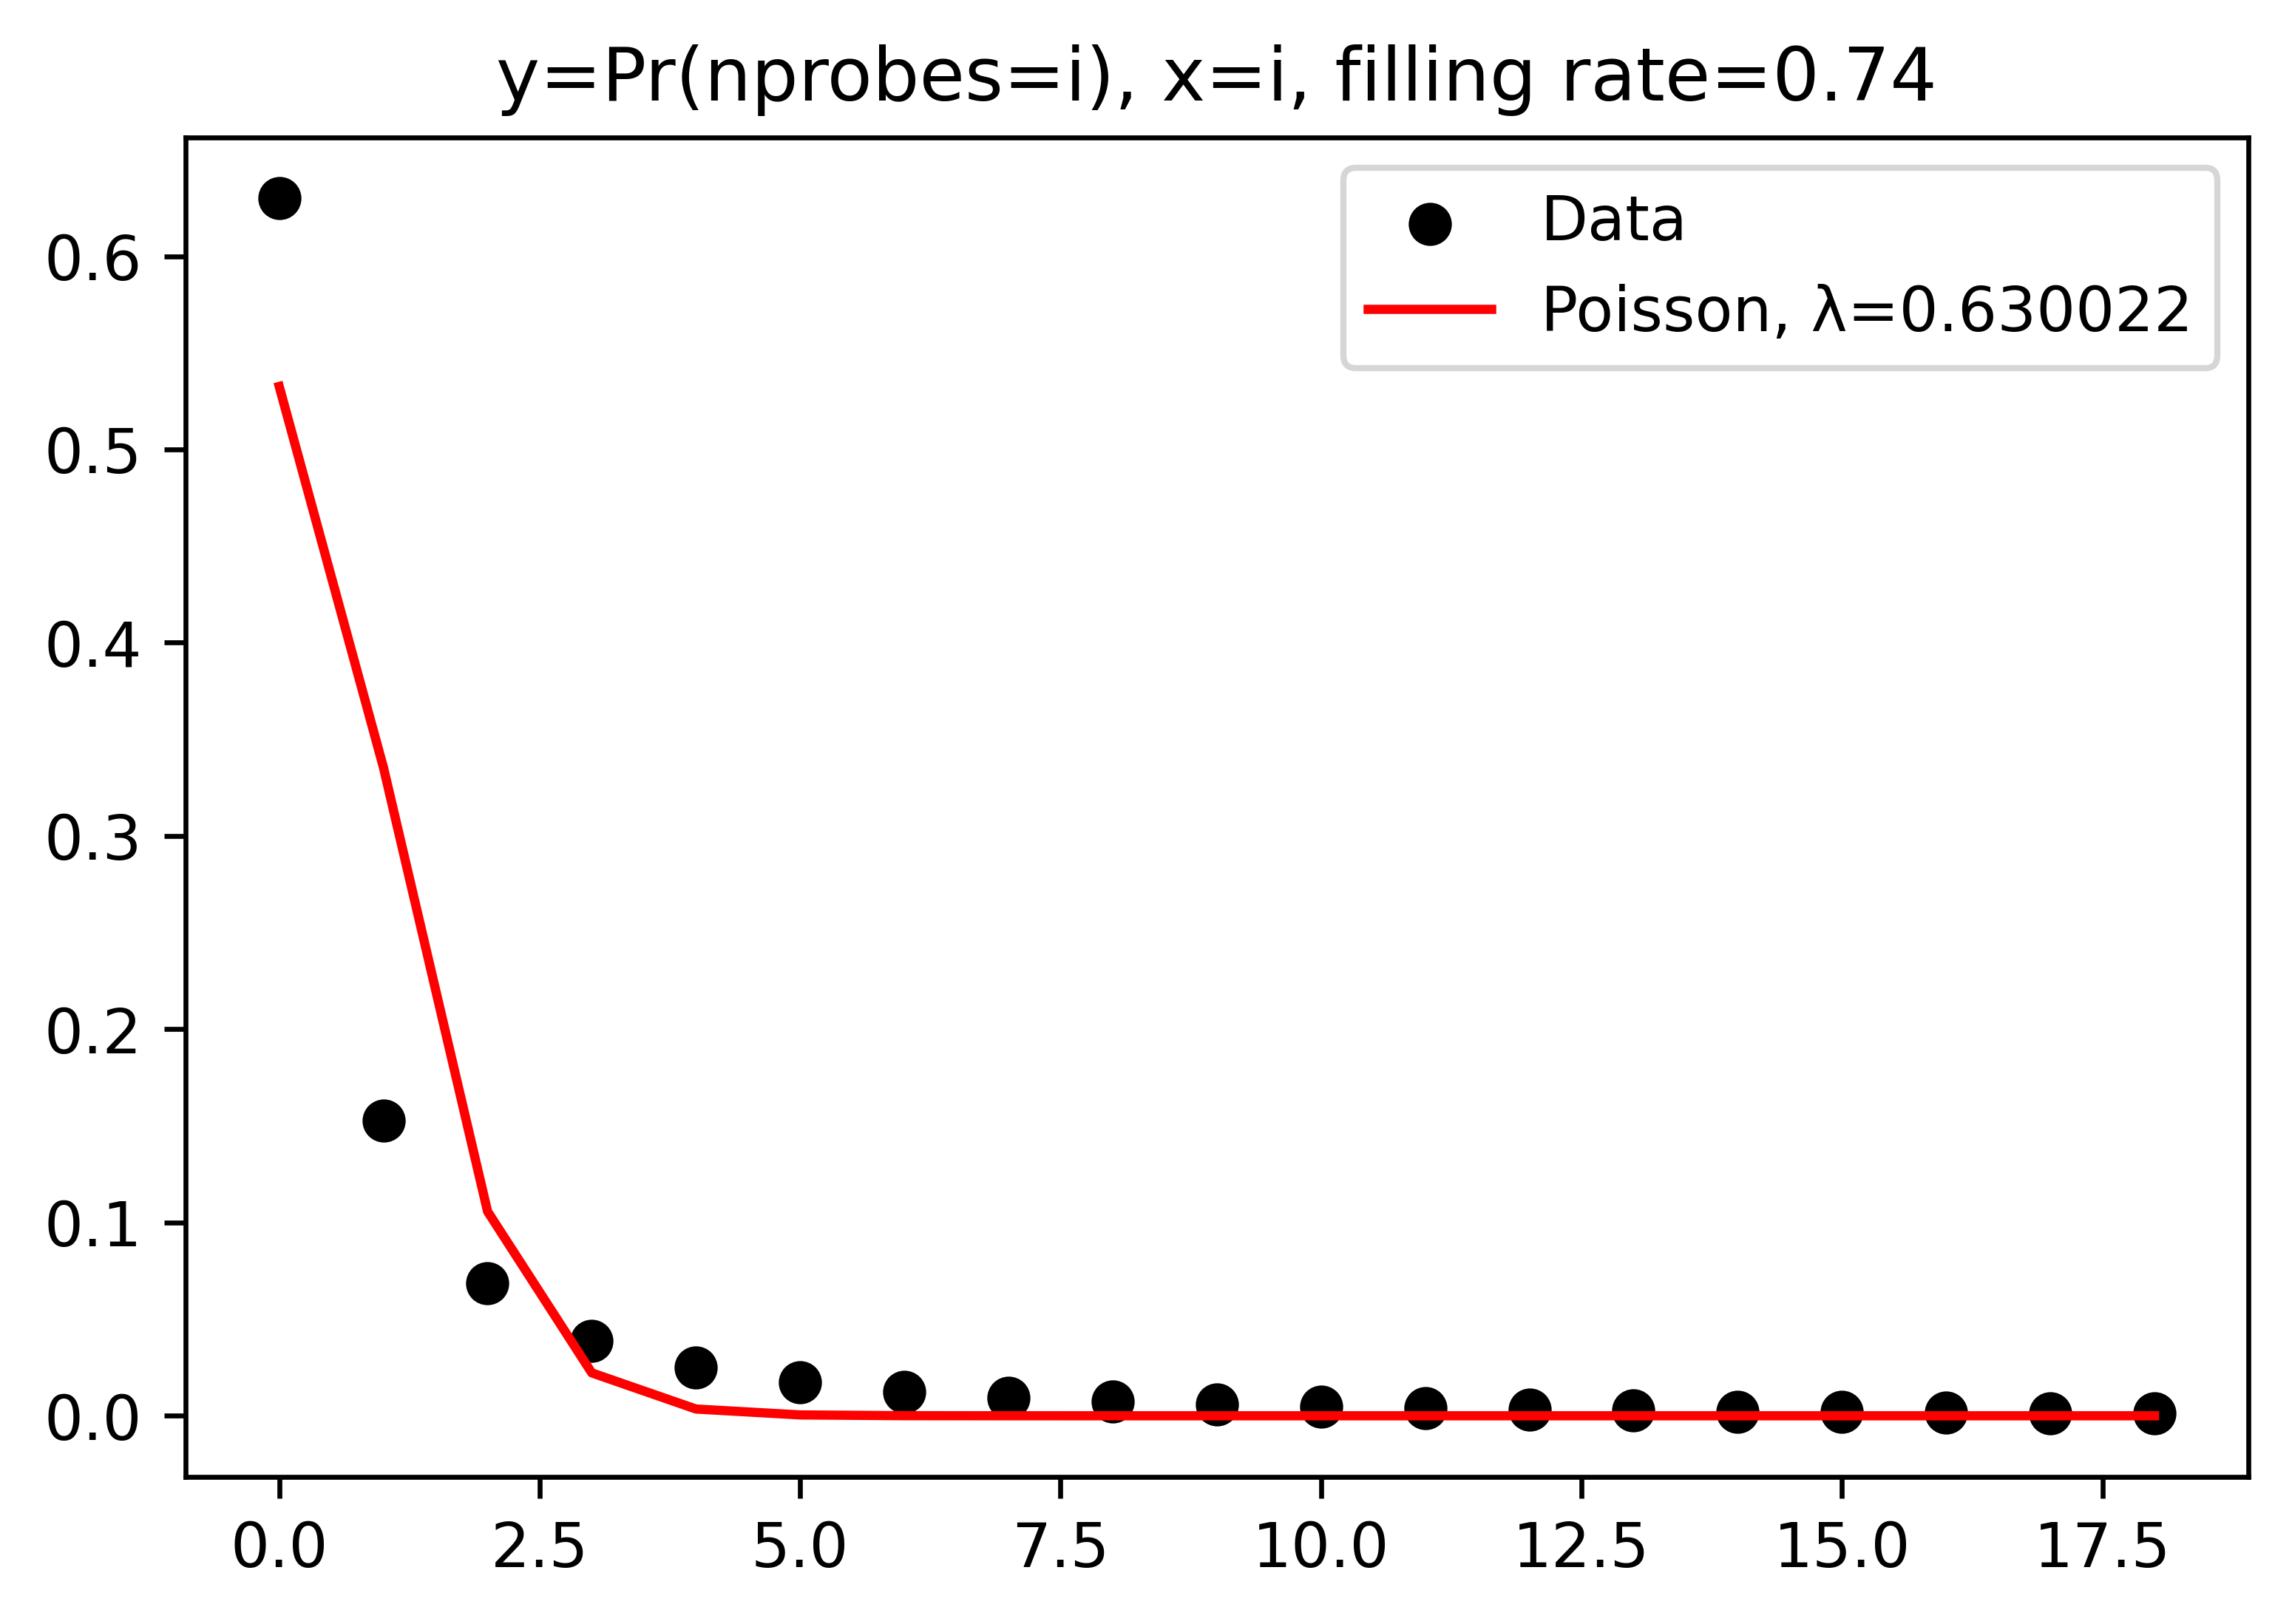

None

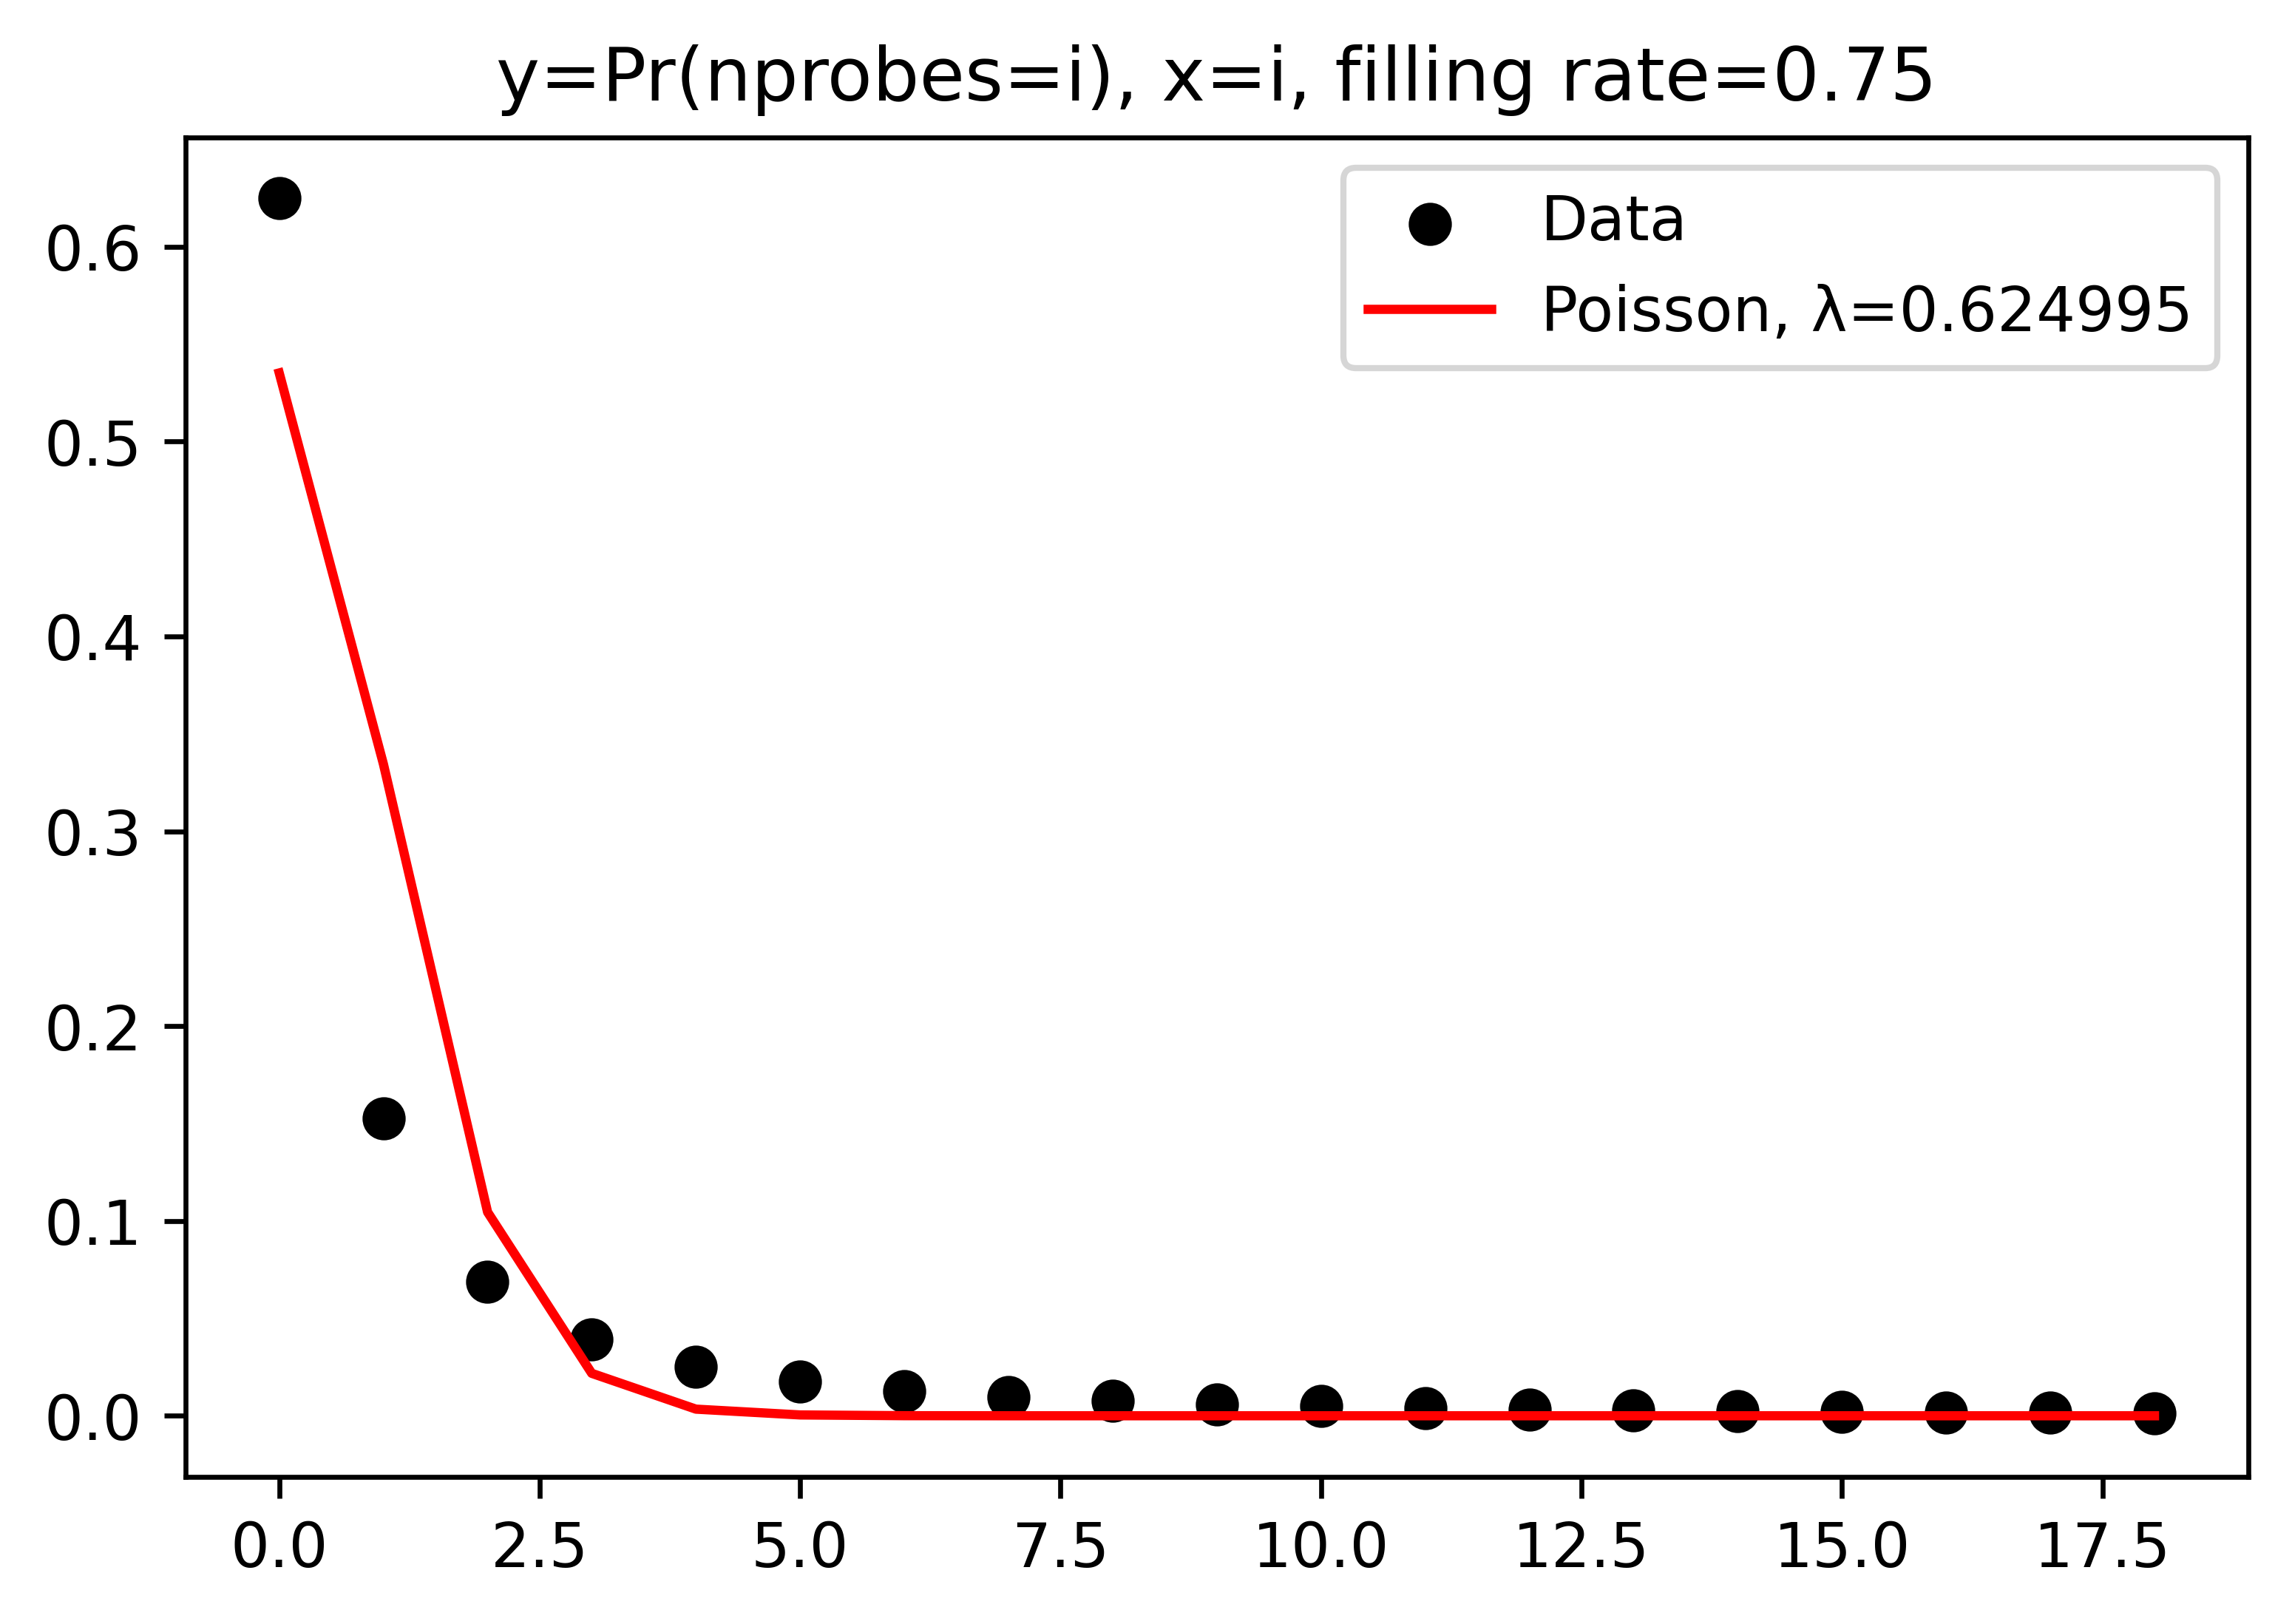

None

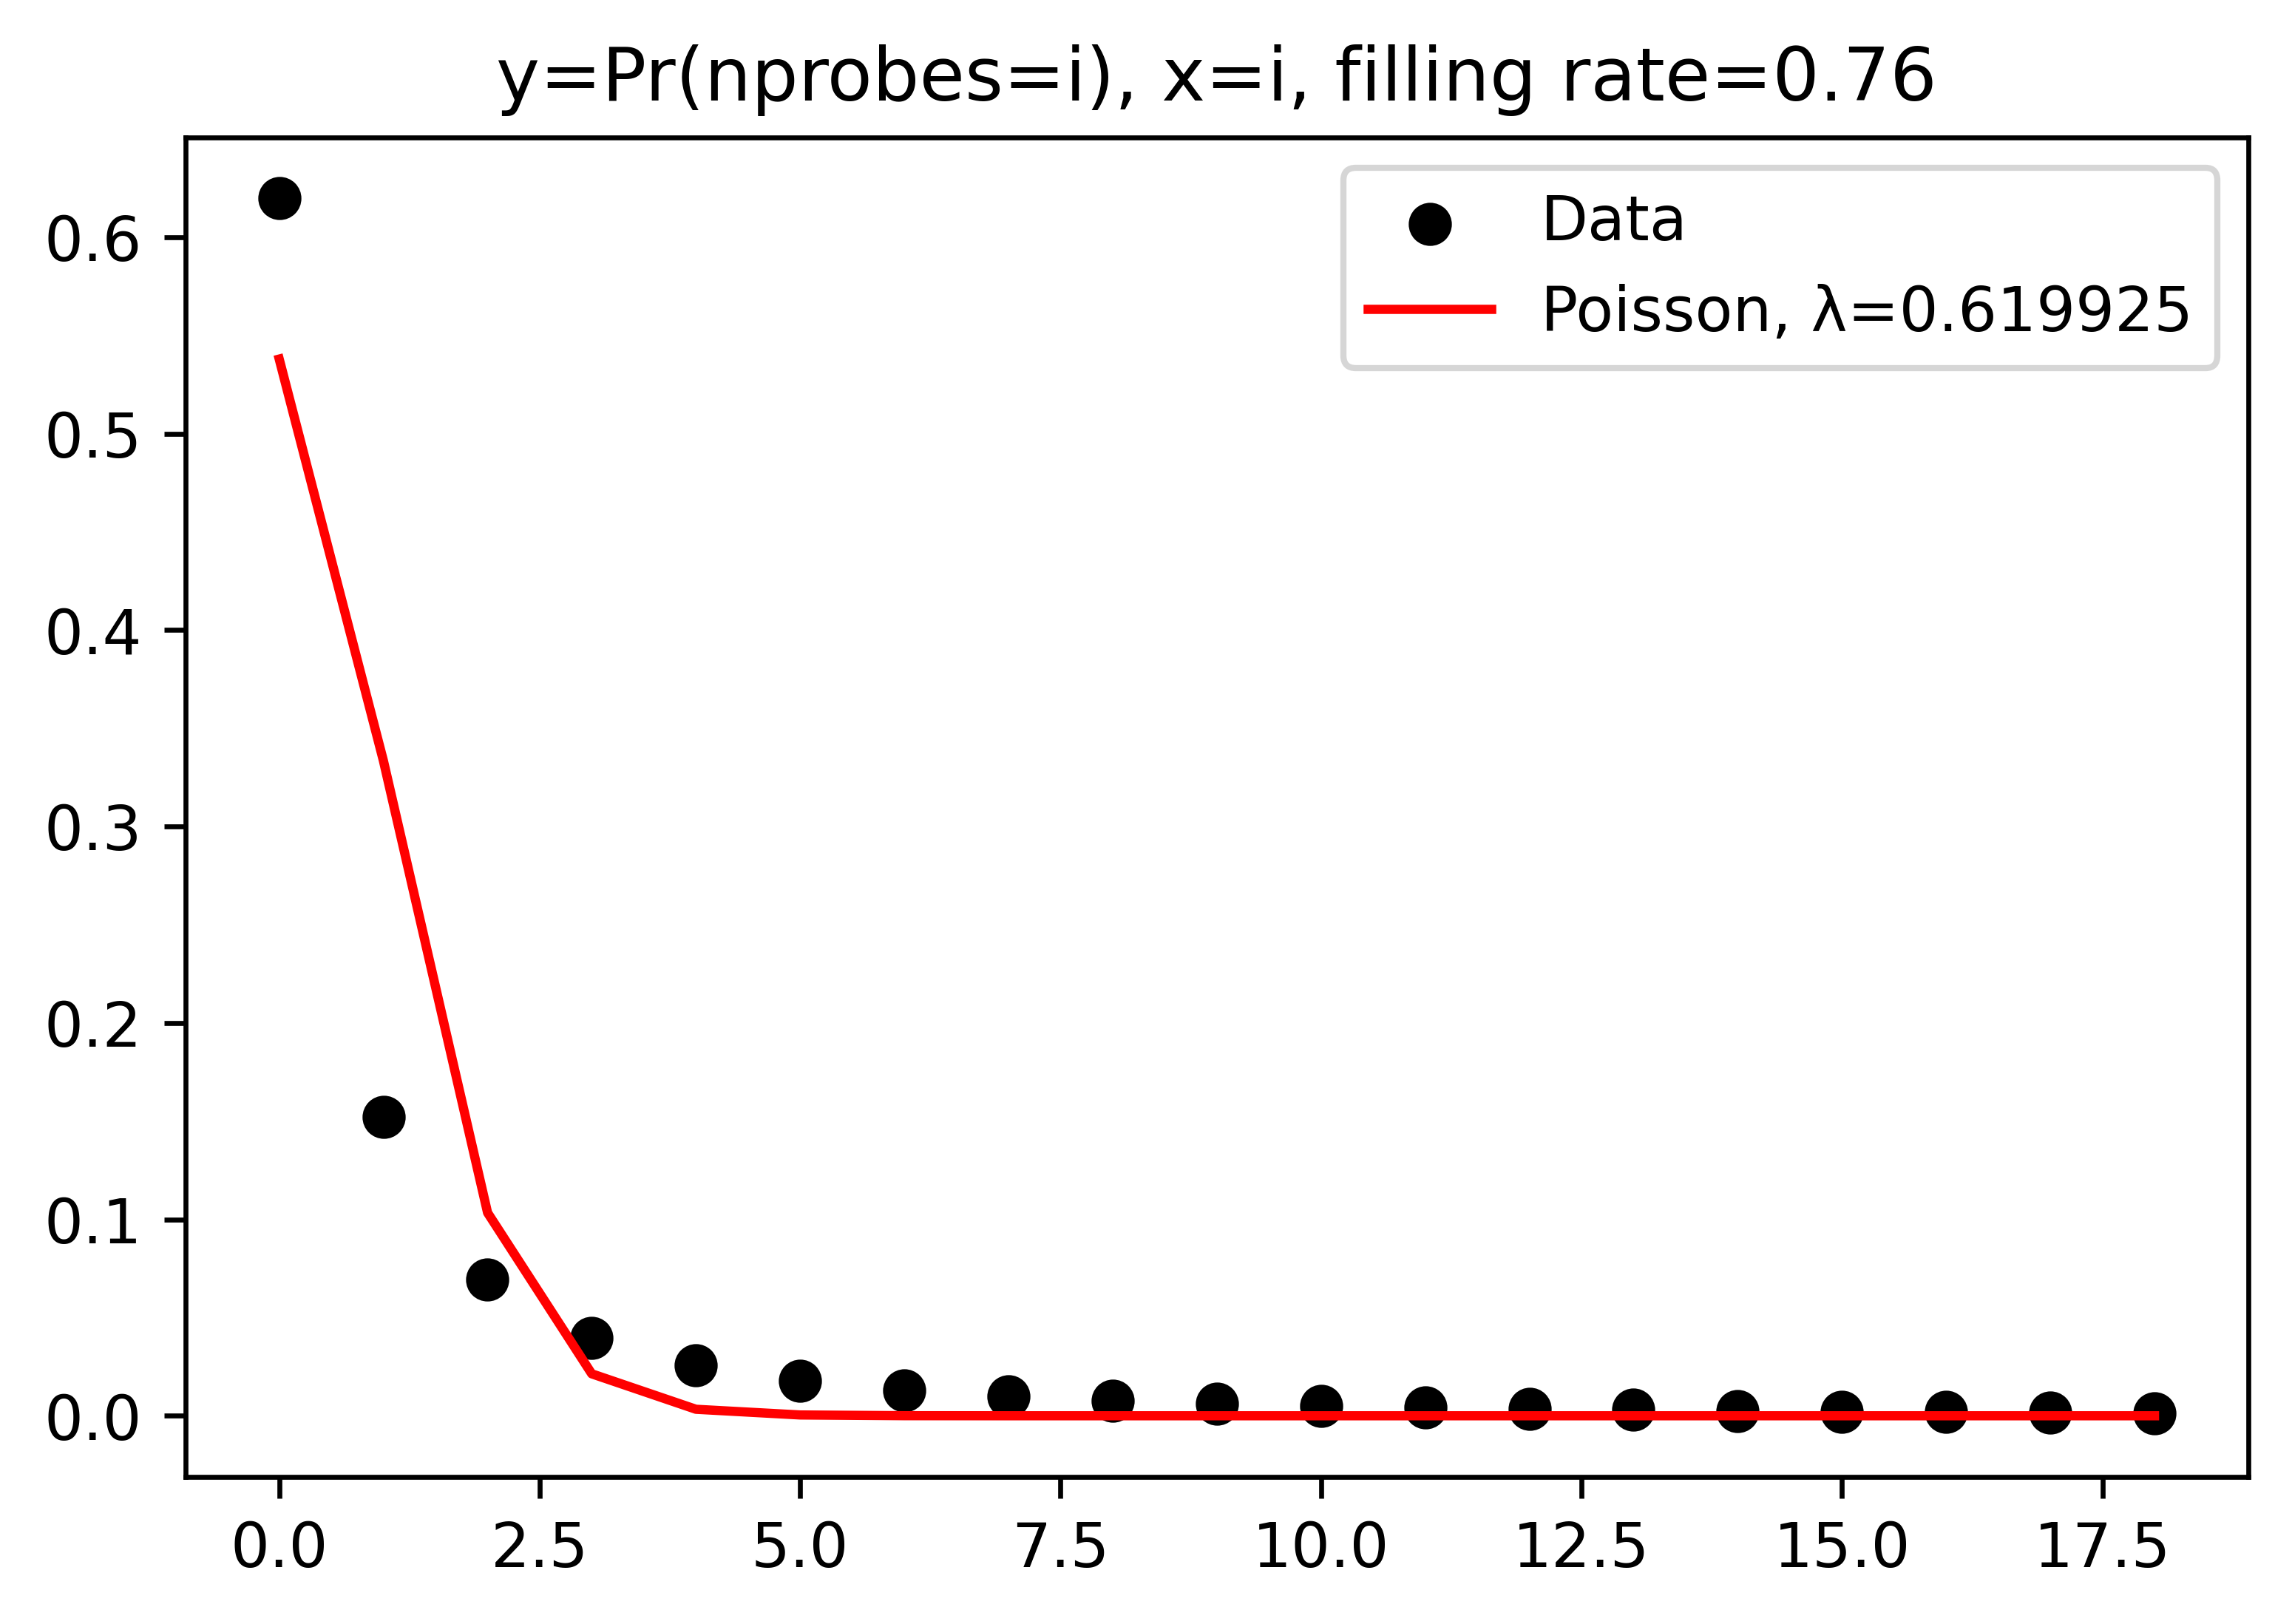

None

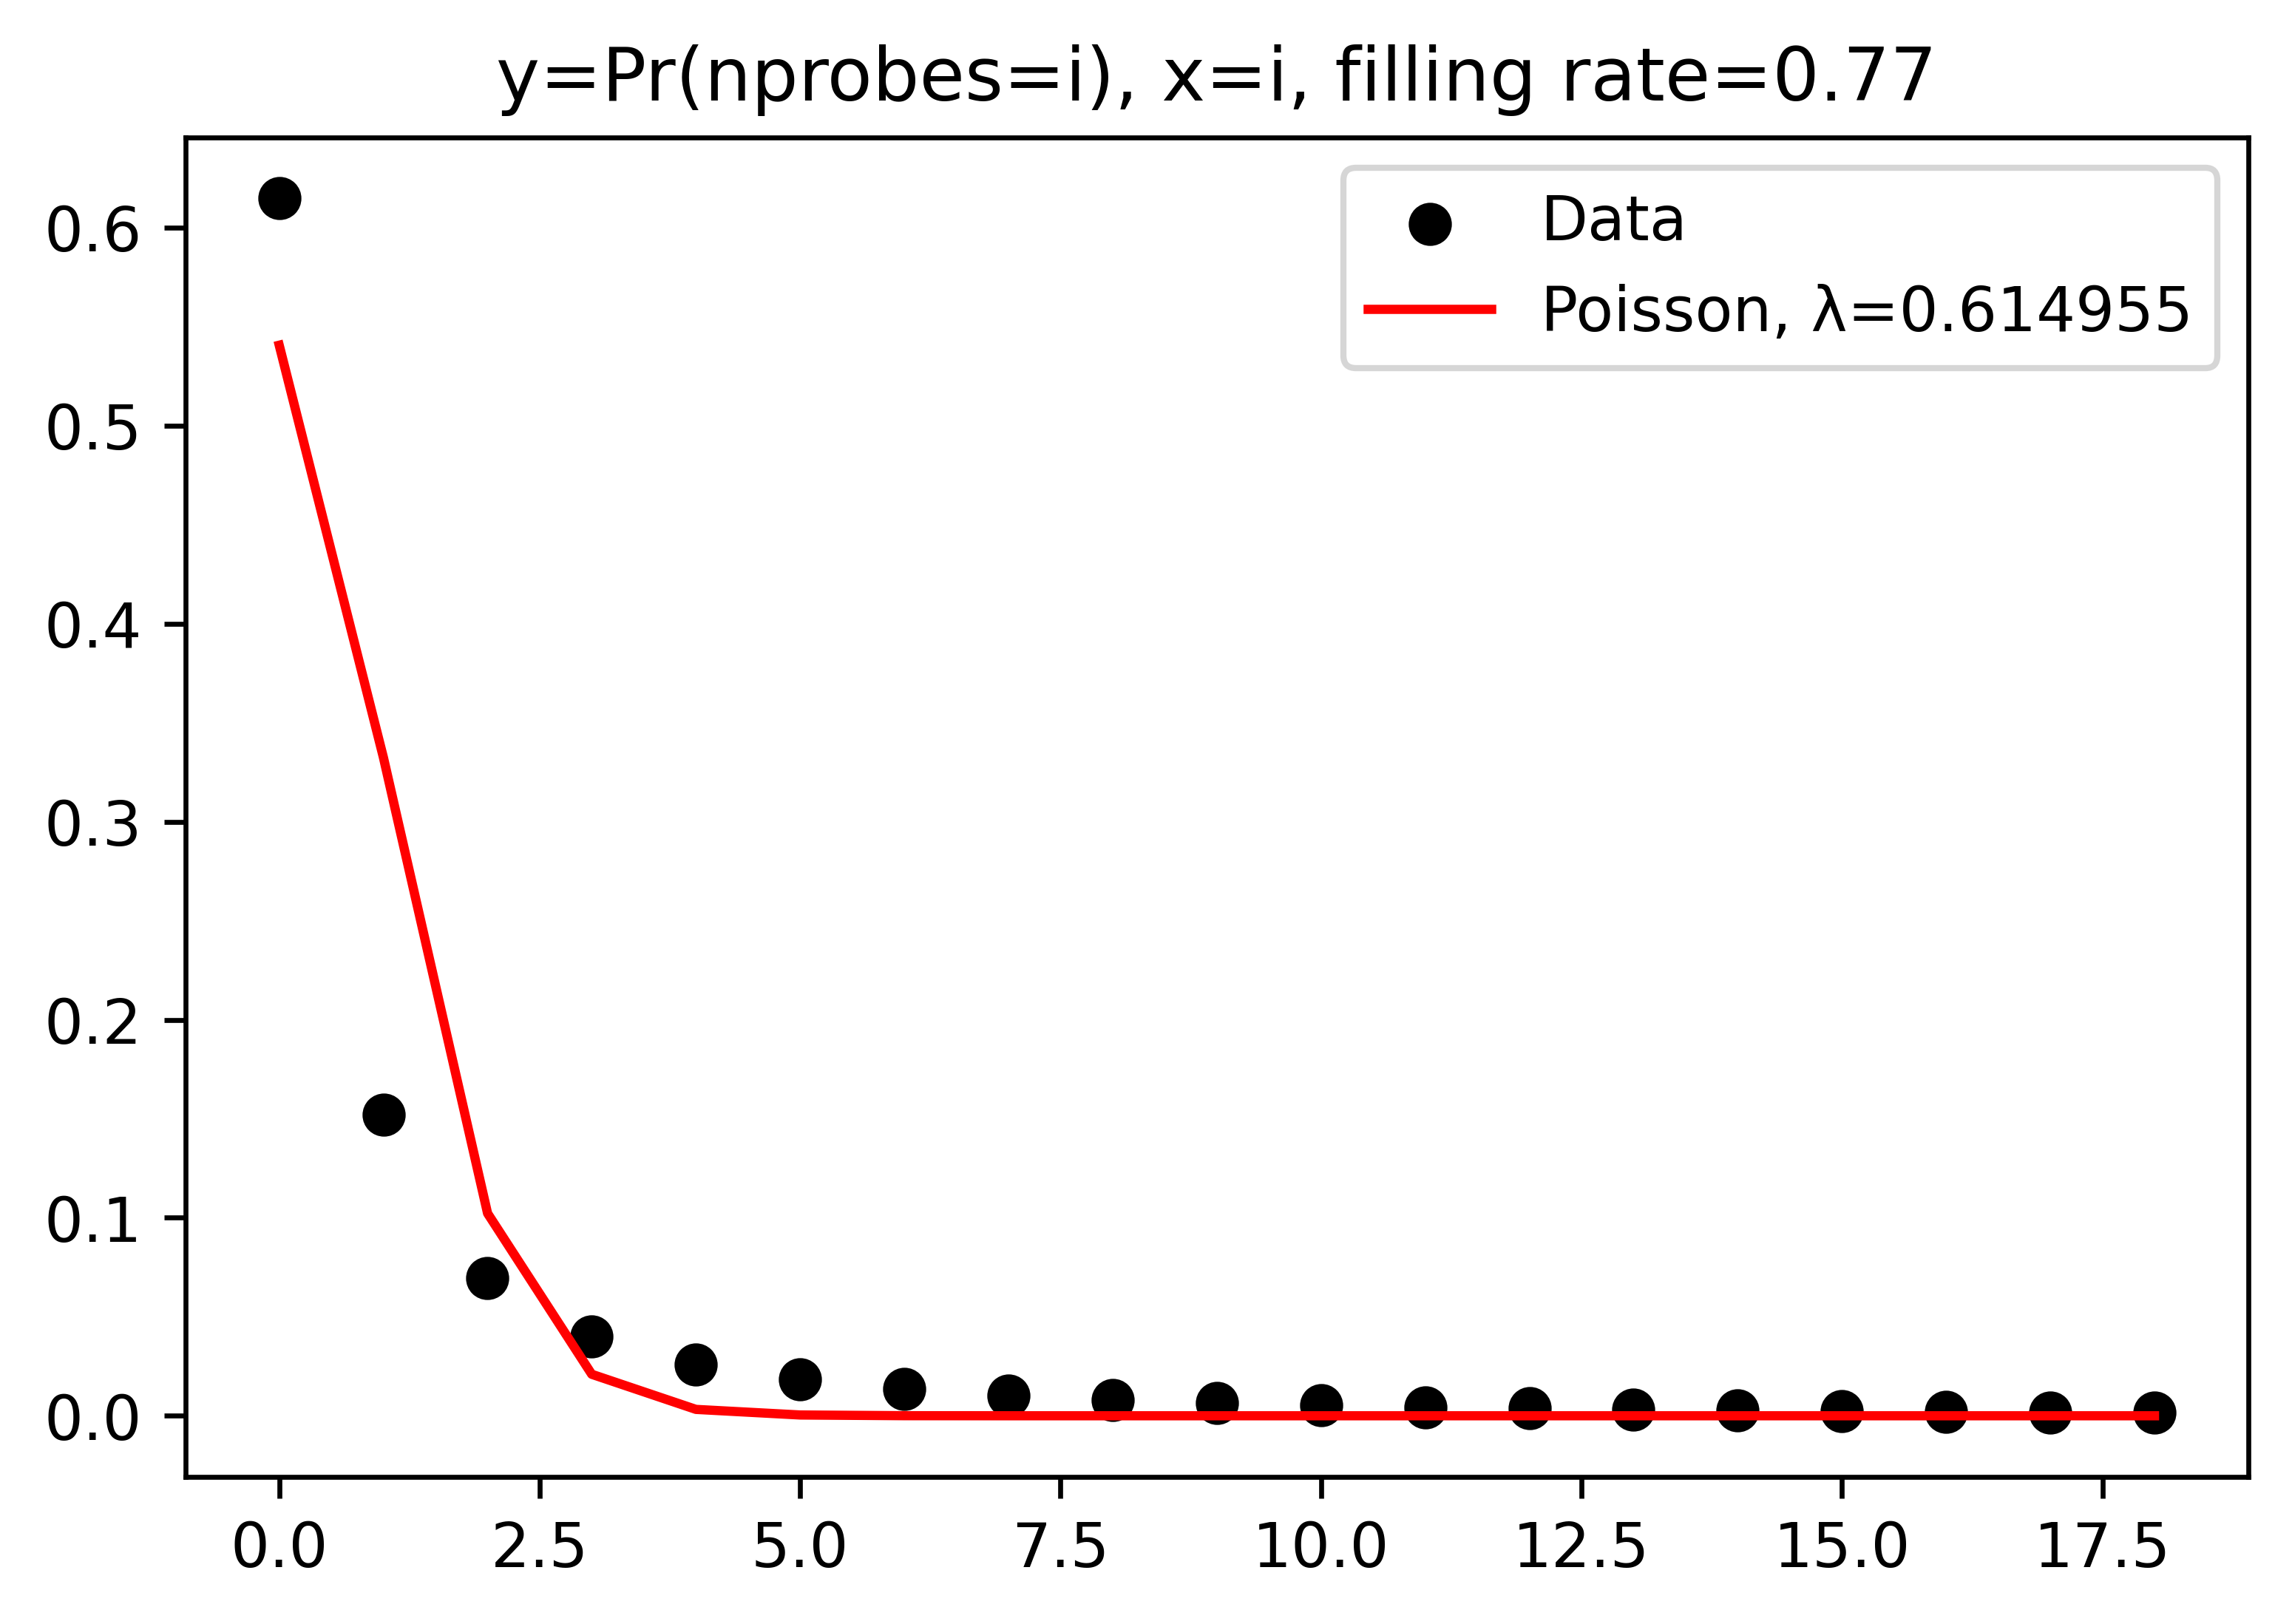

None

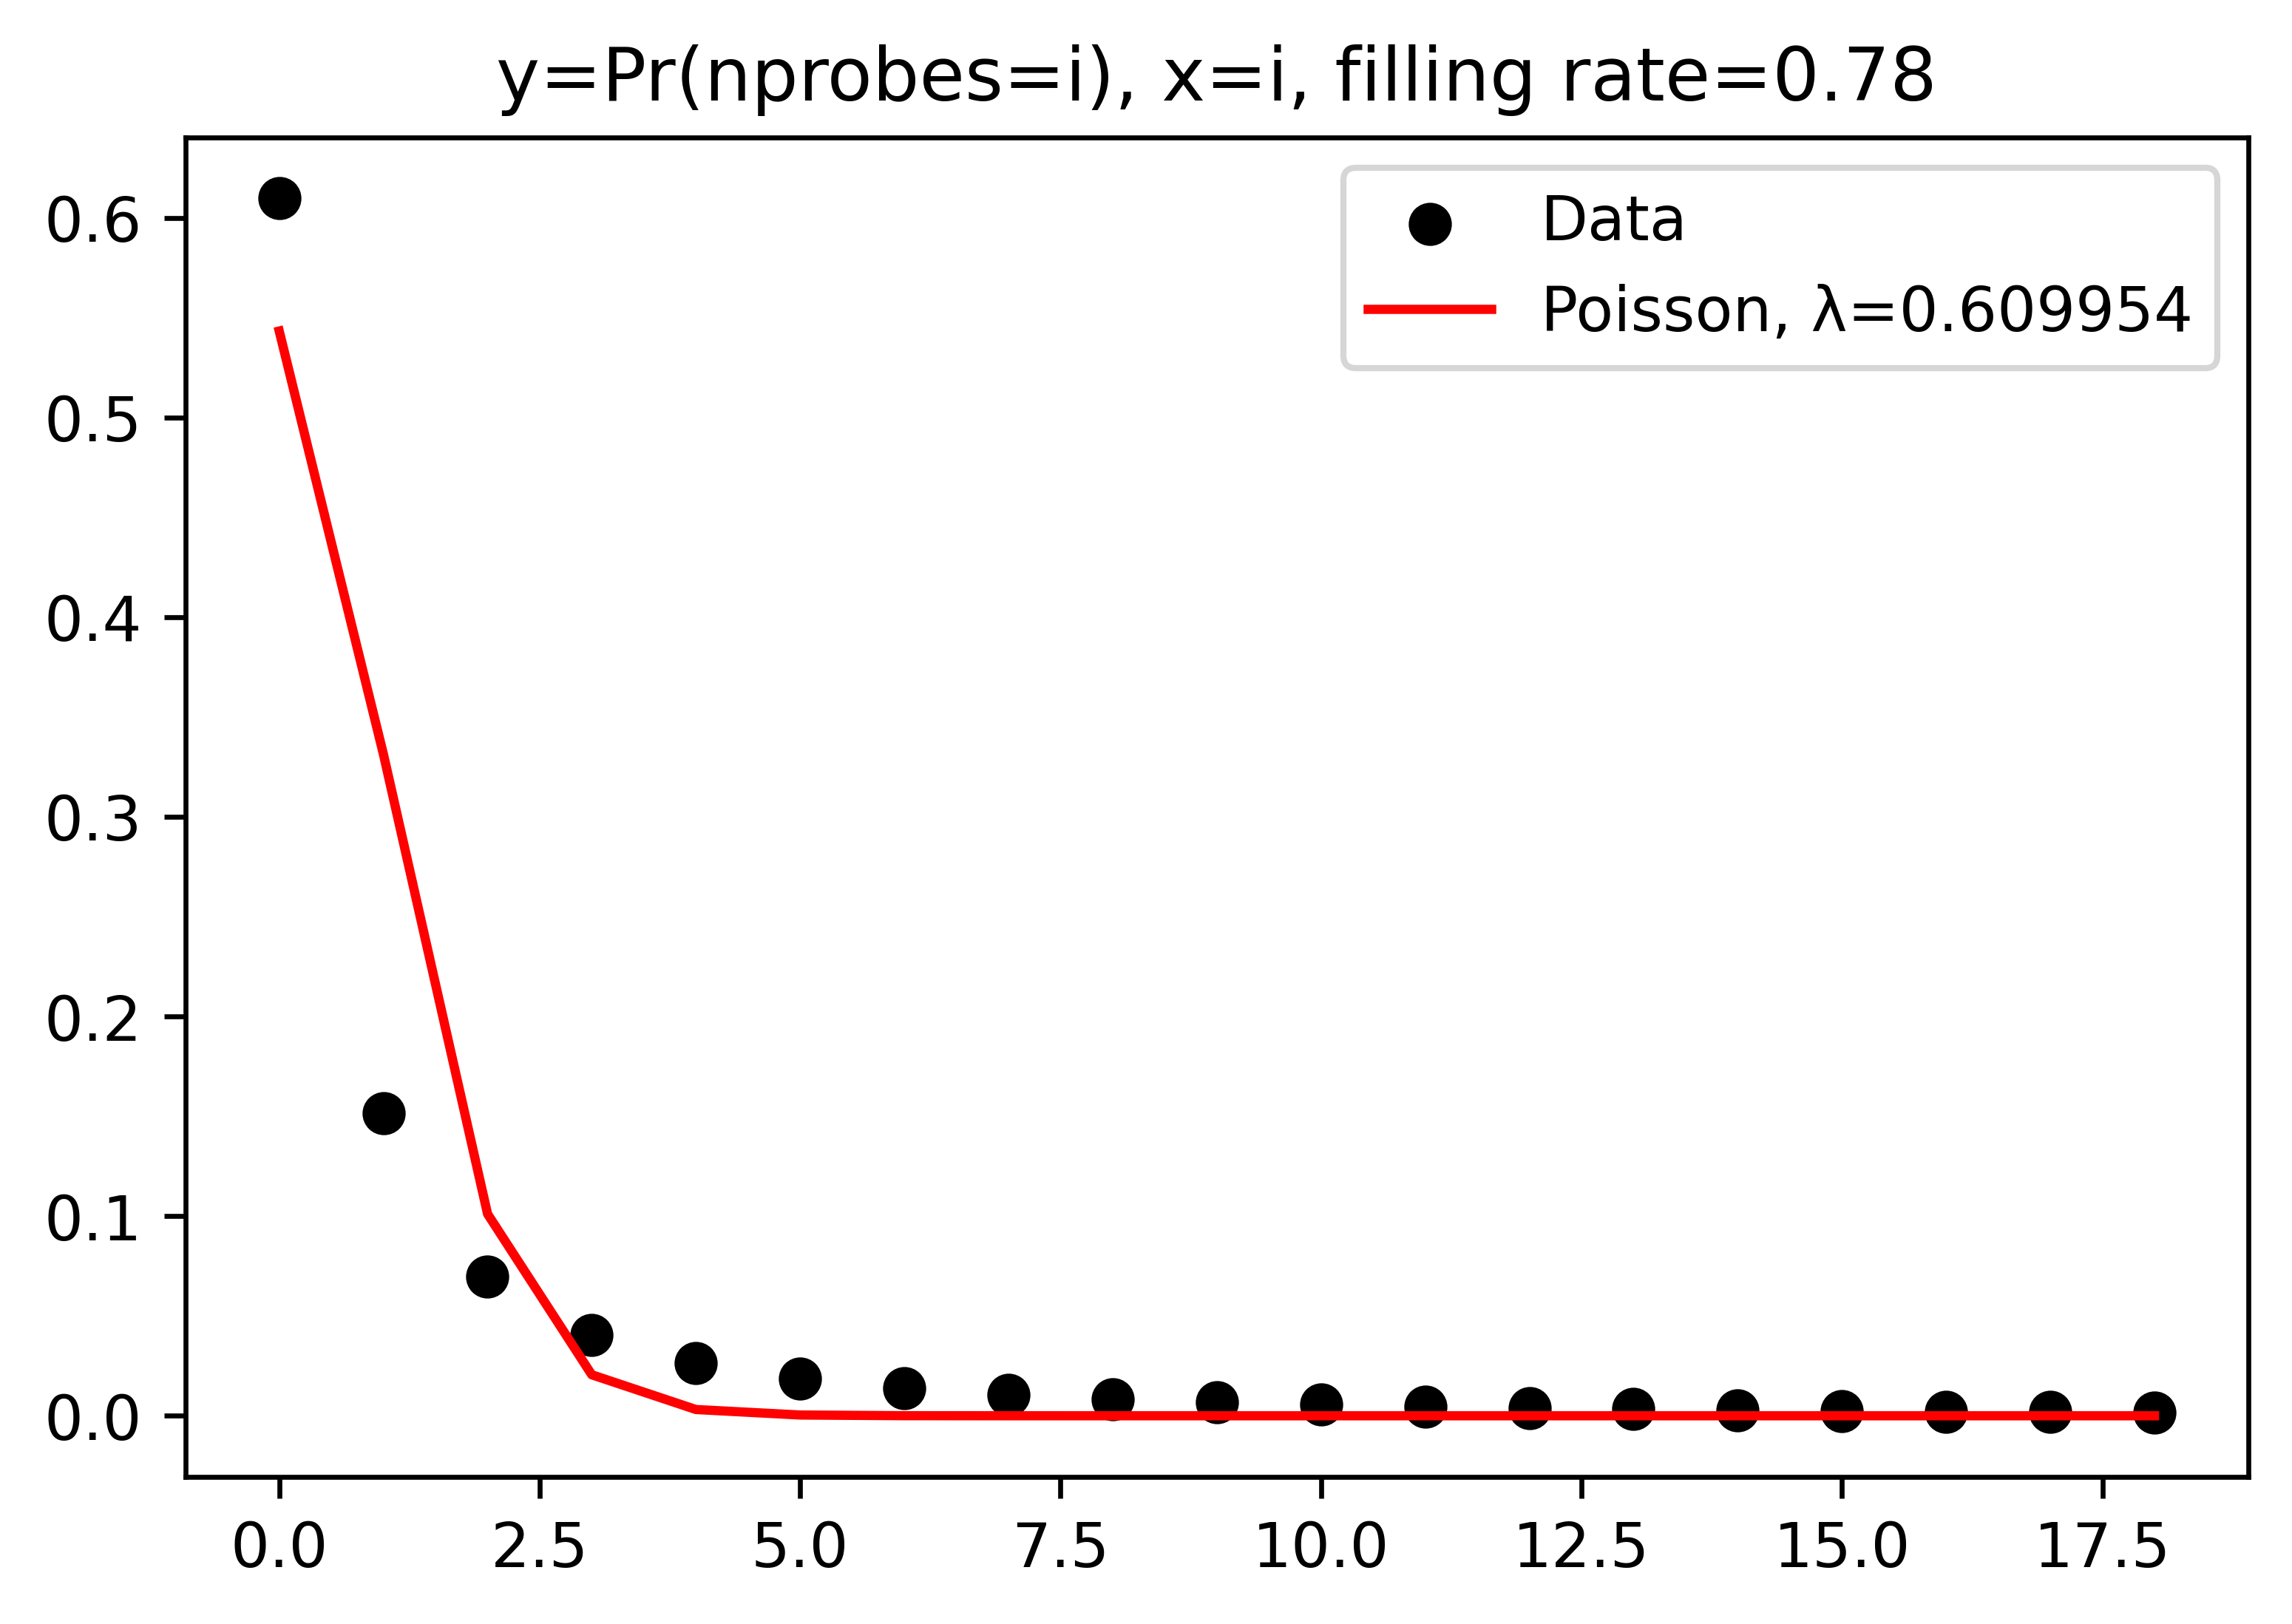

None

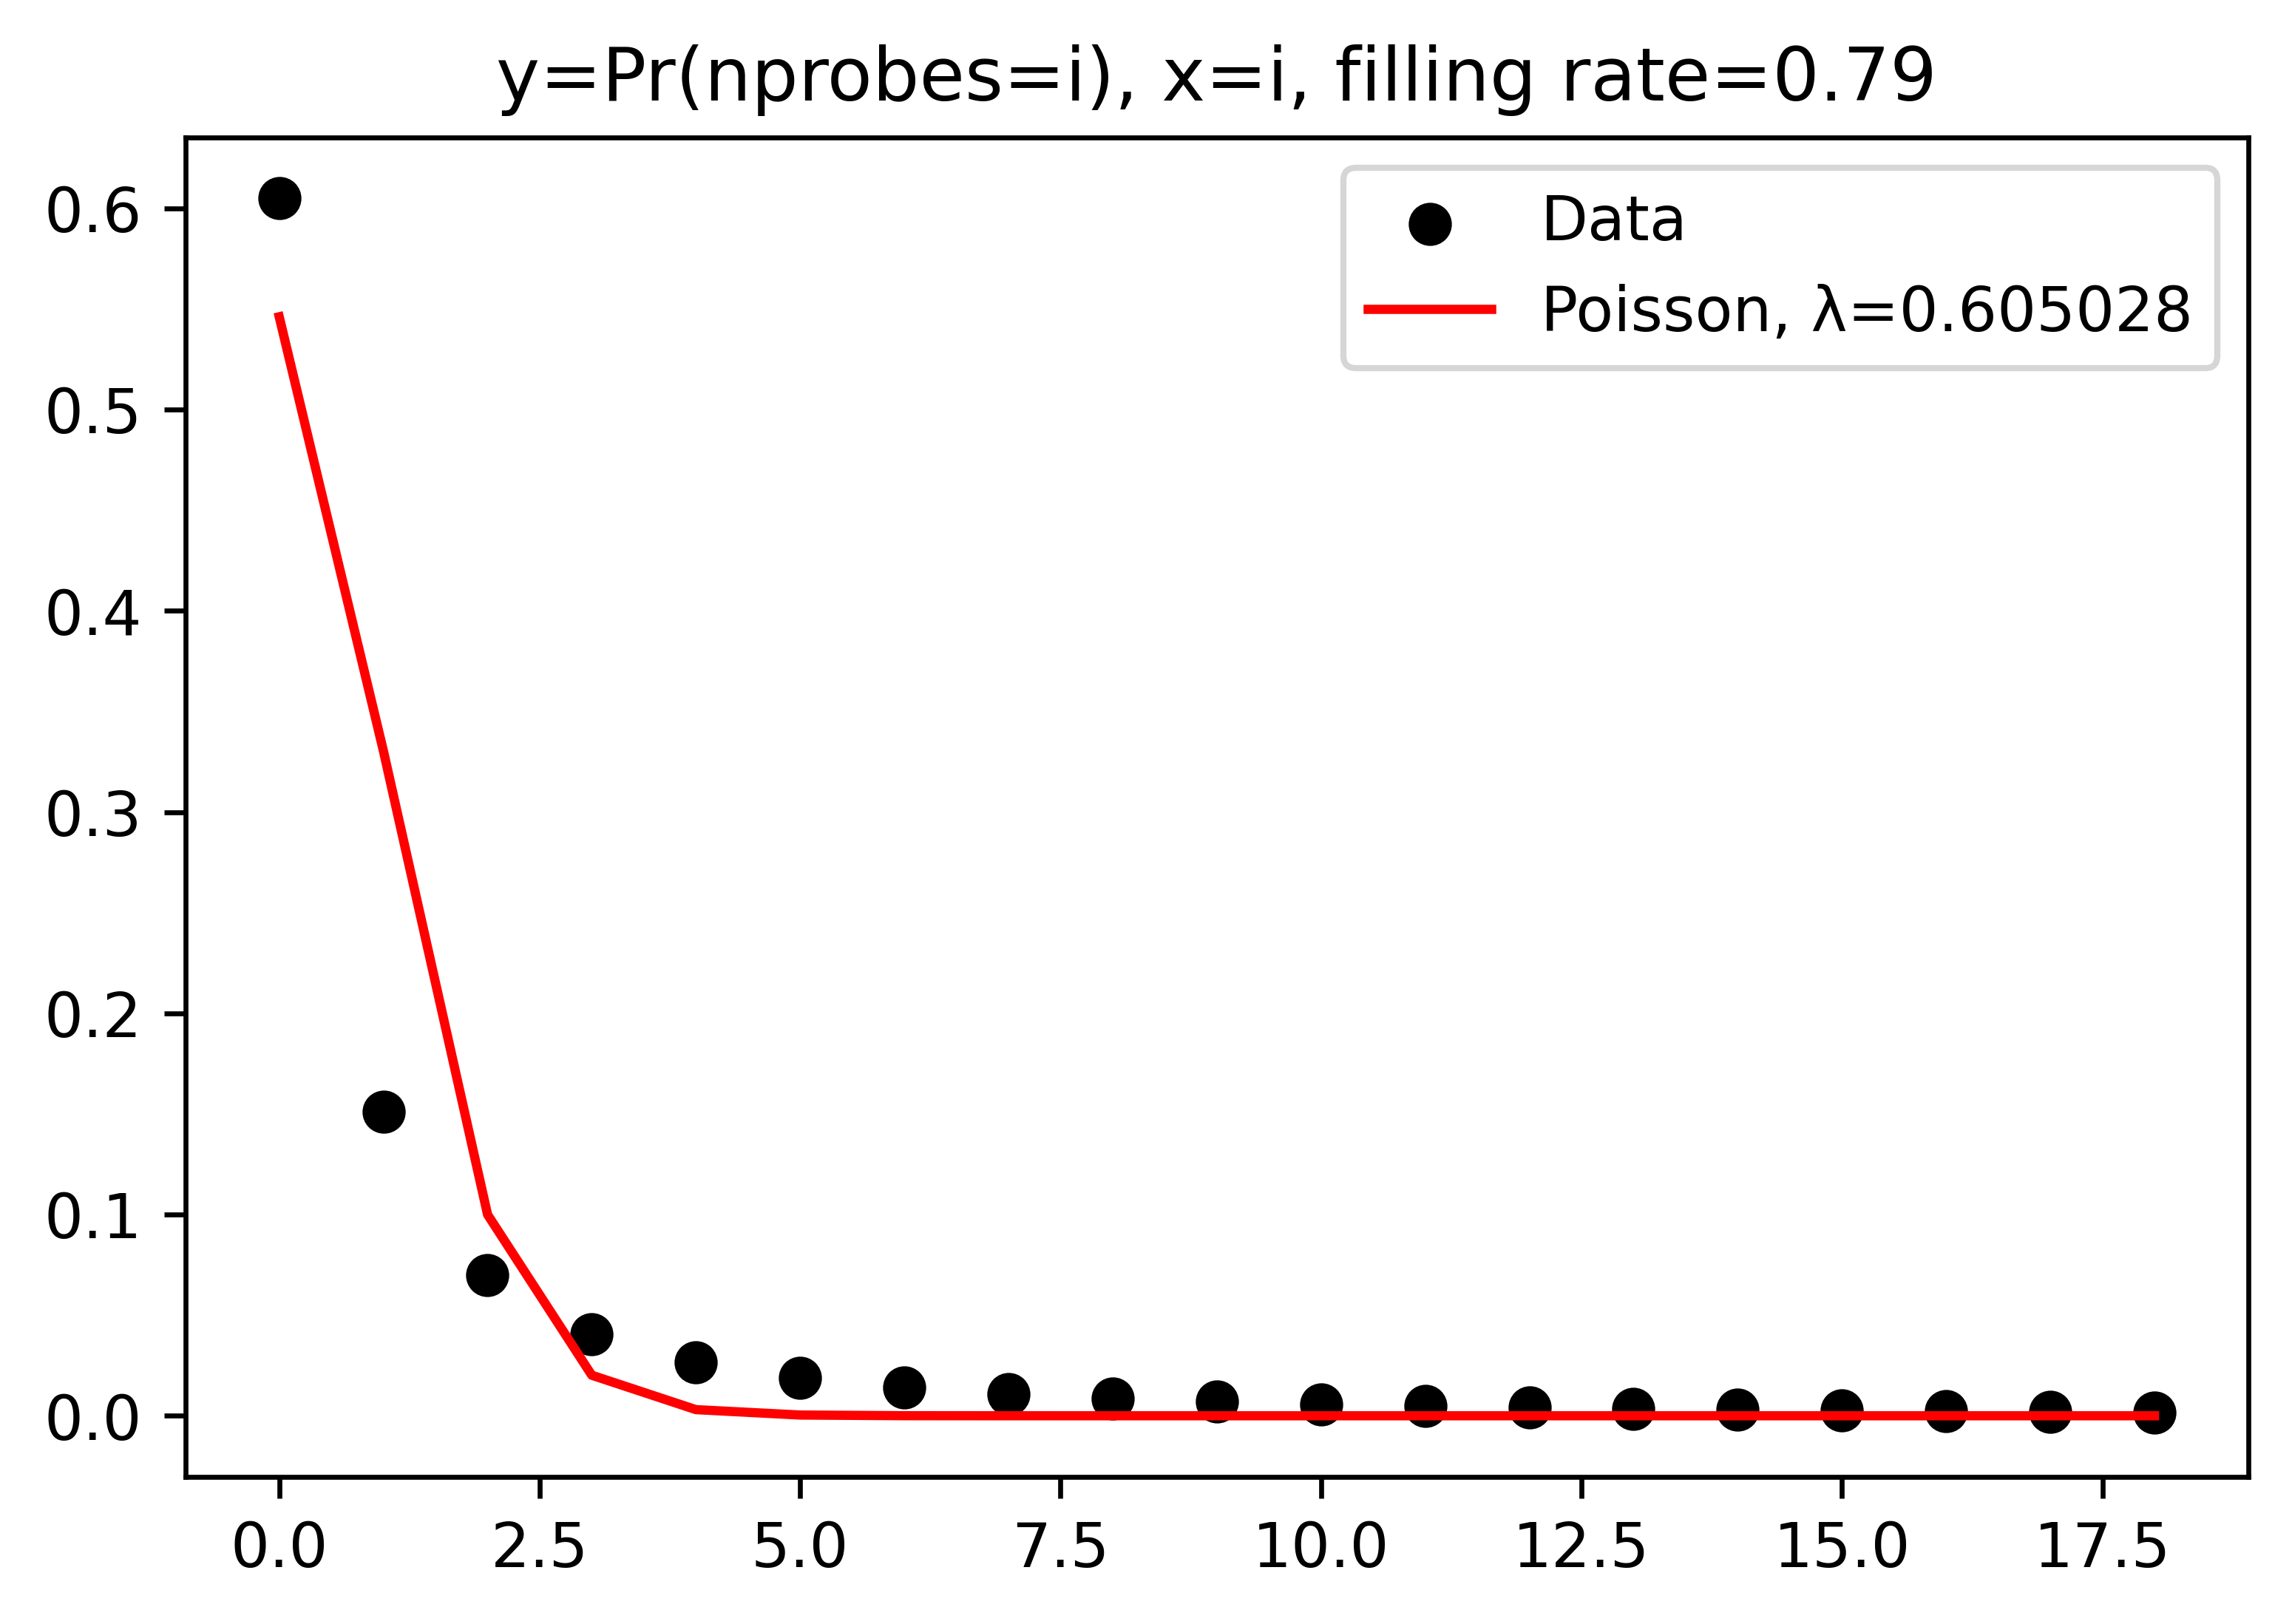

None

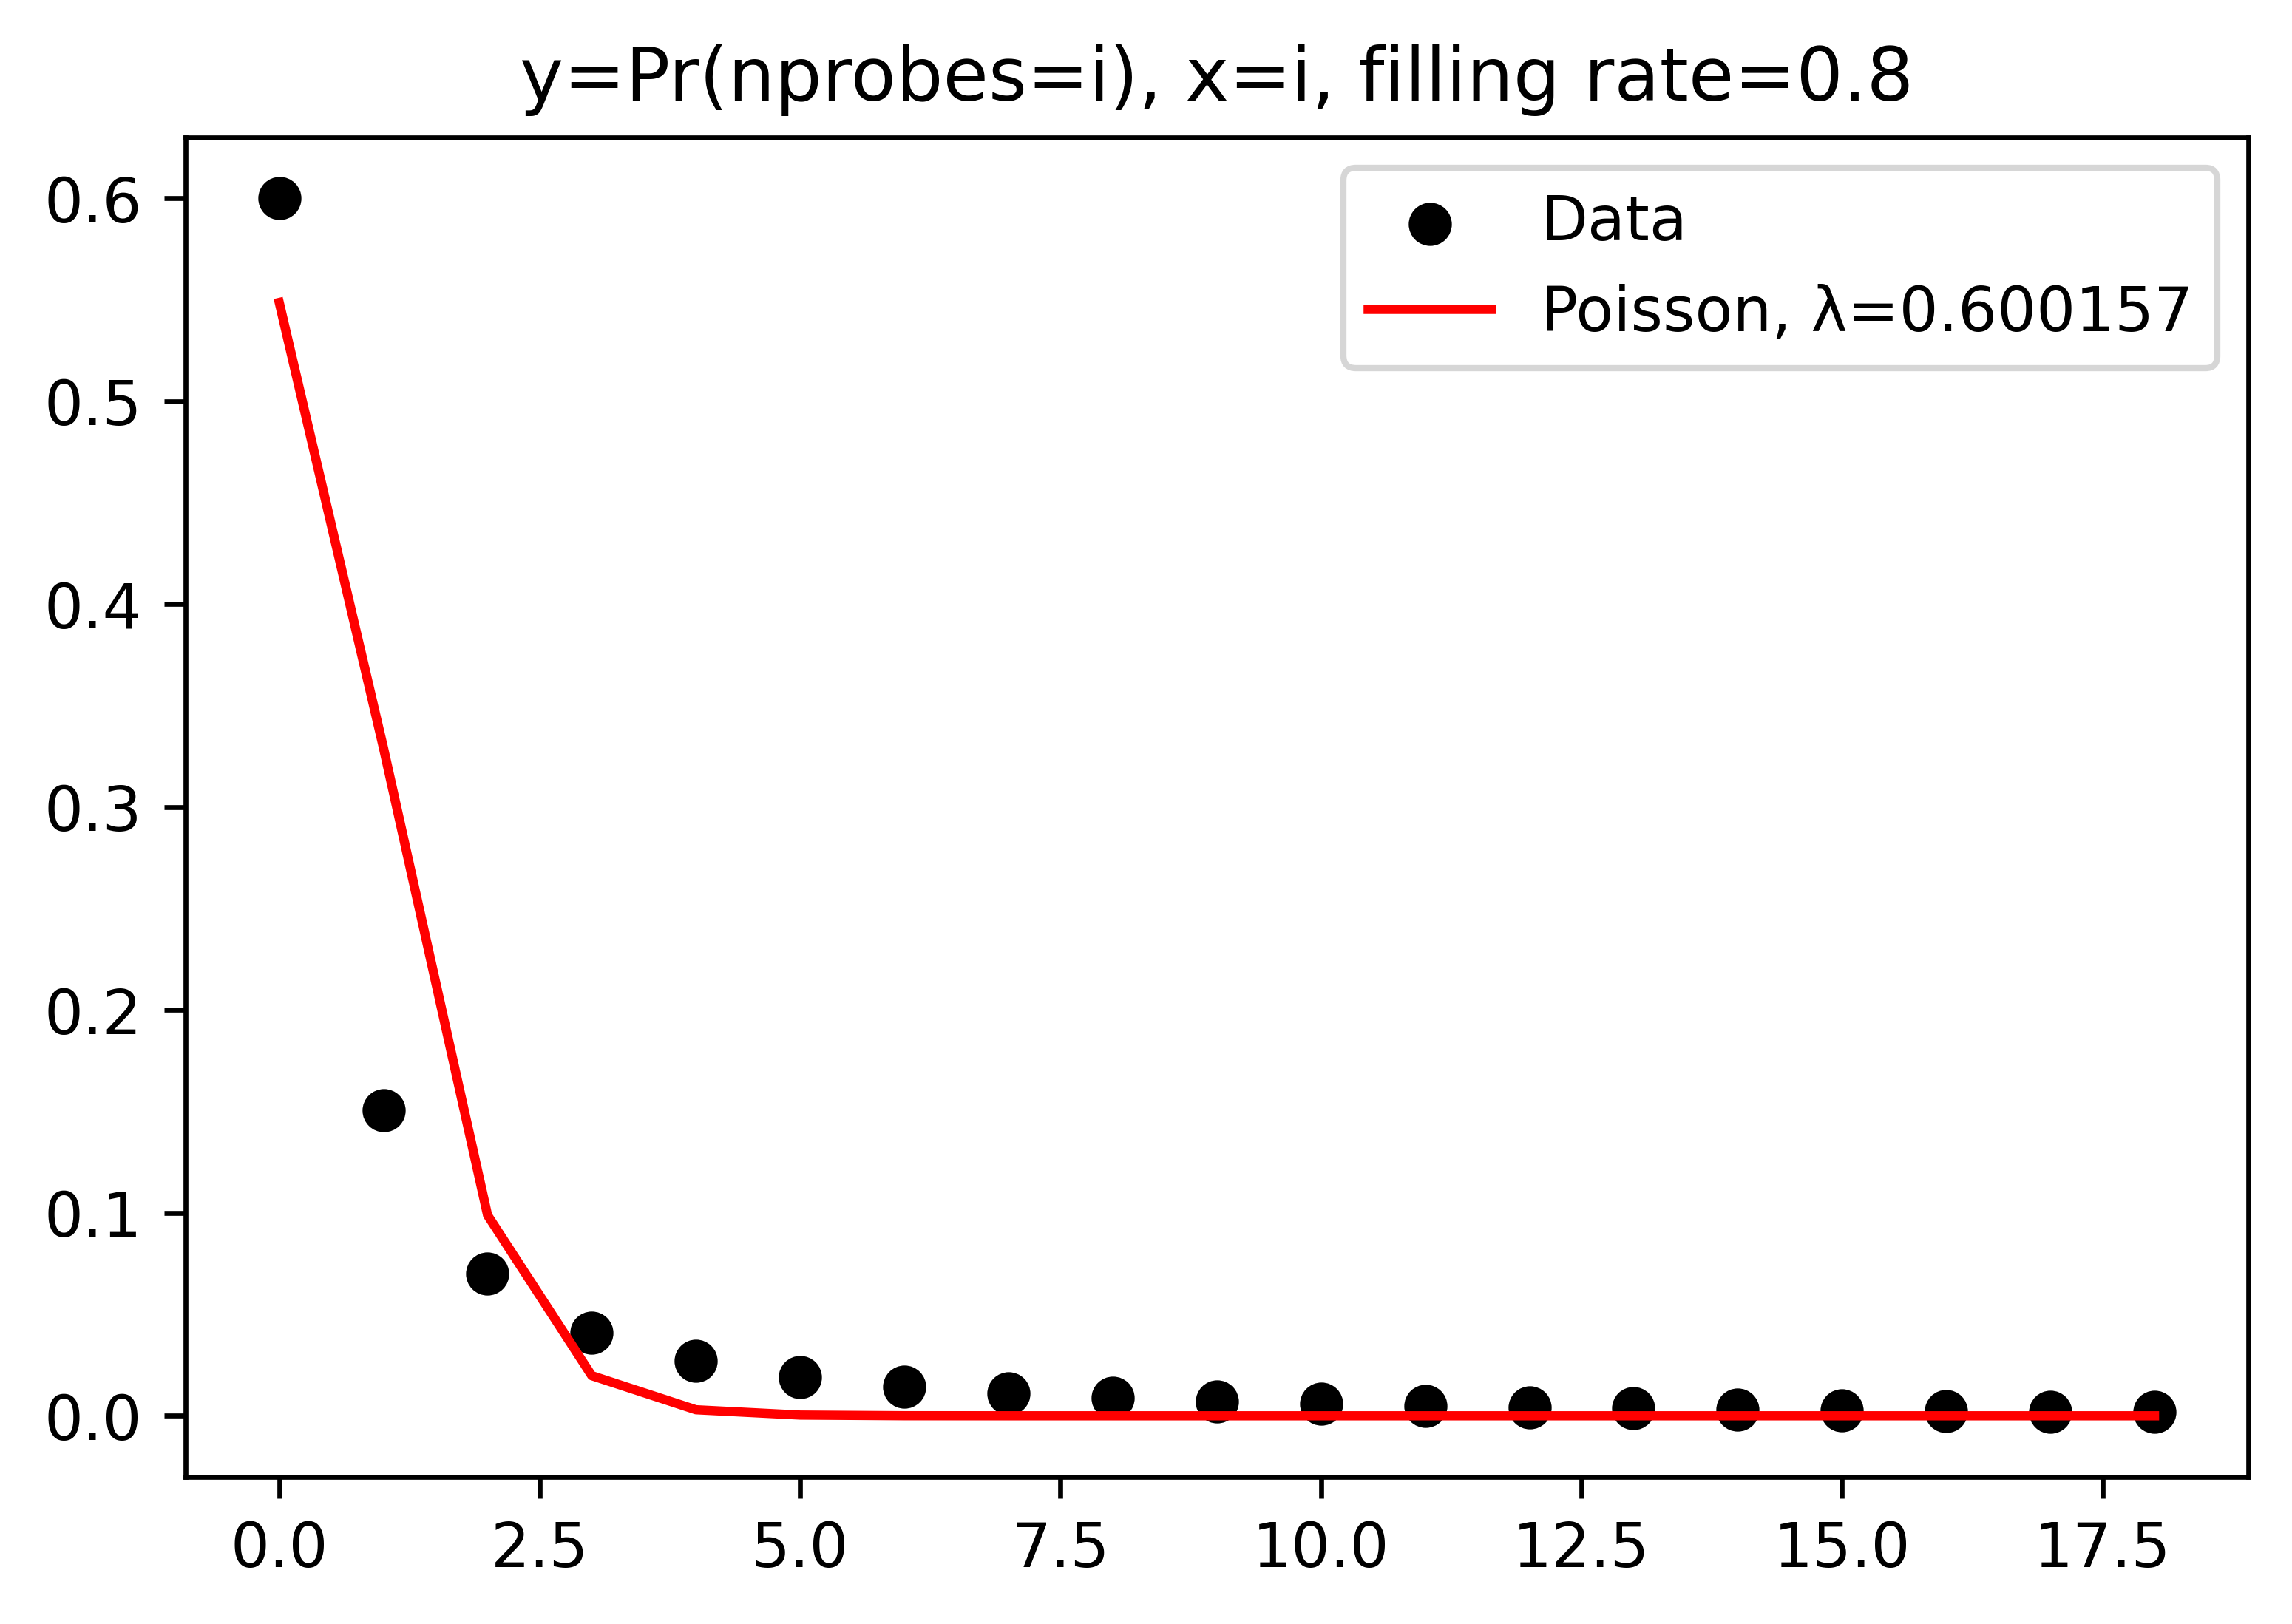

None

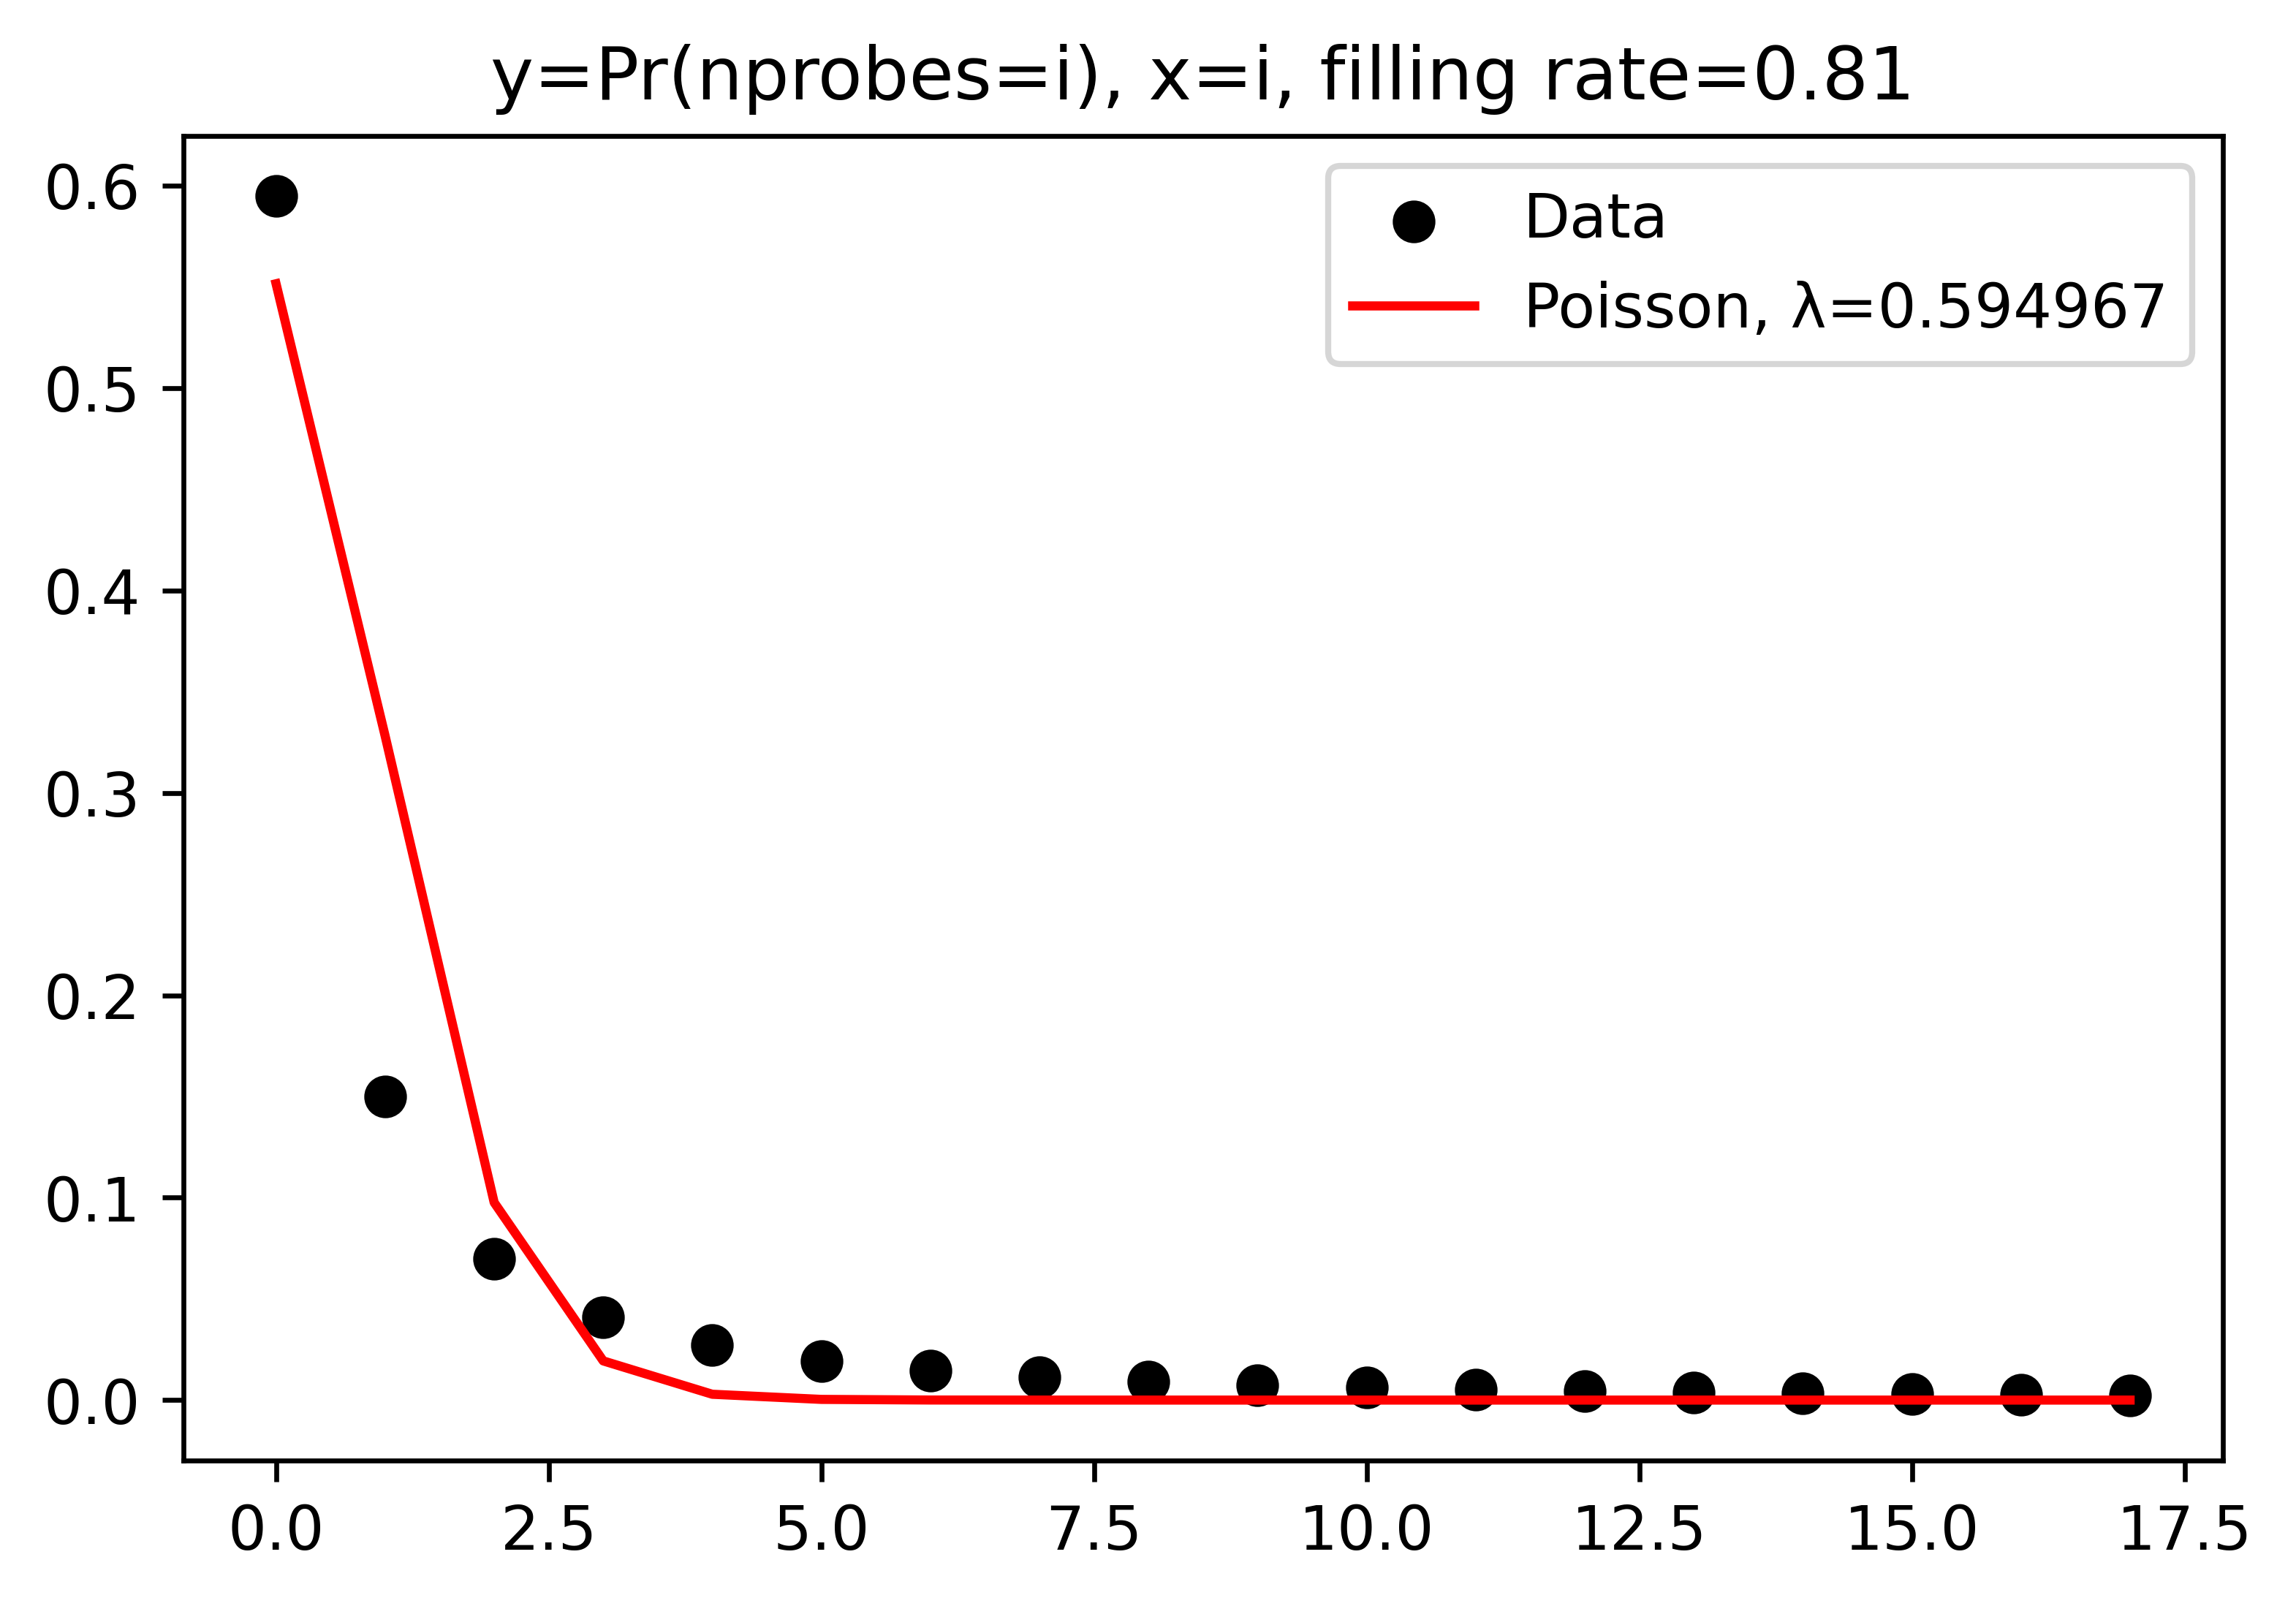

None

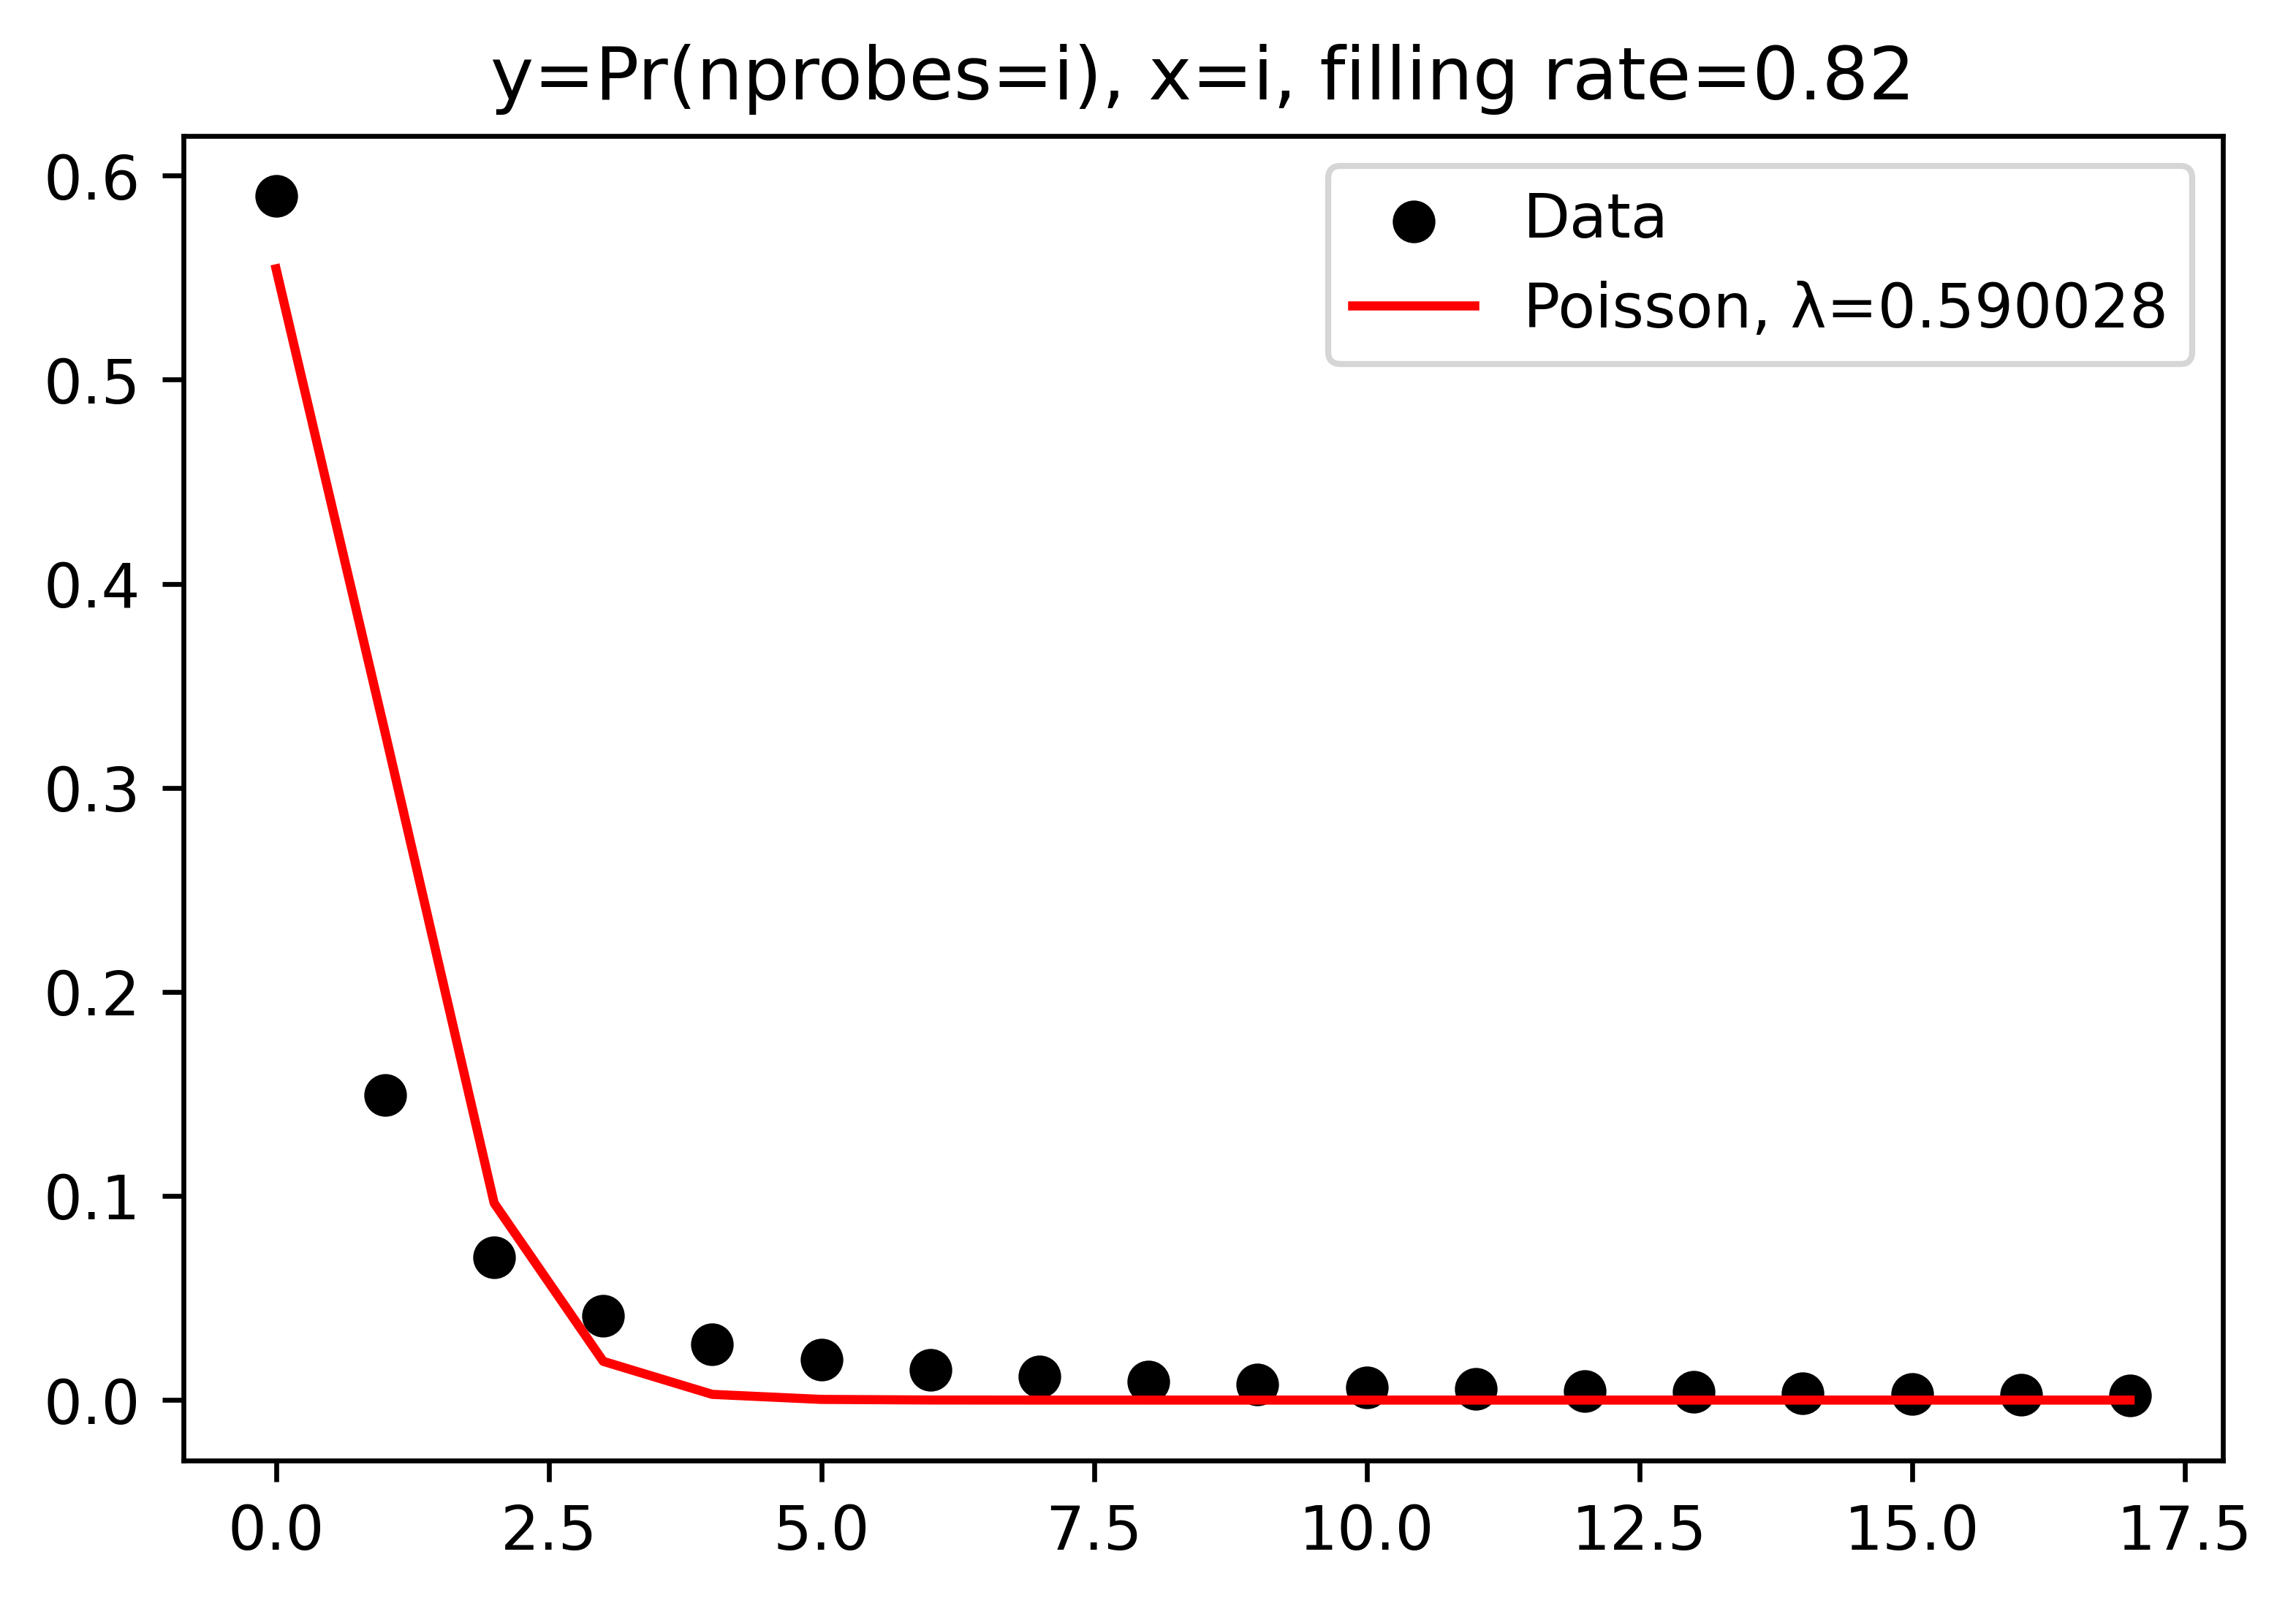

None

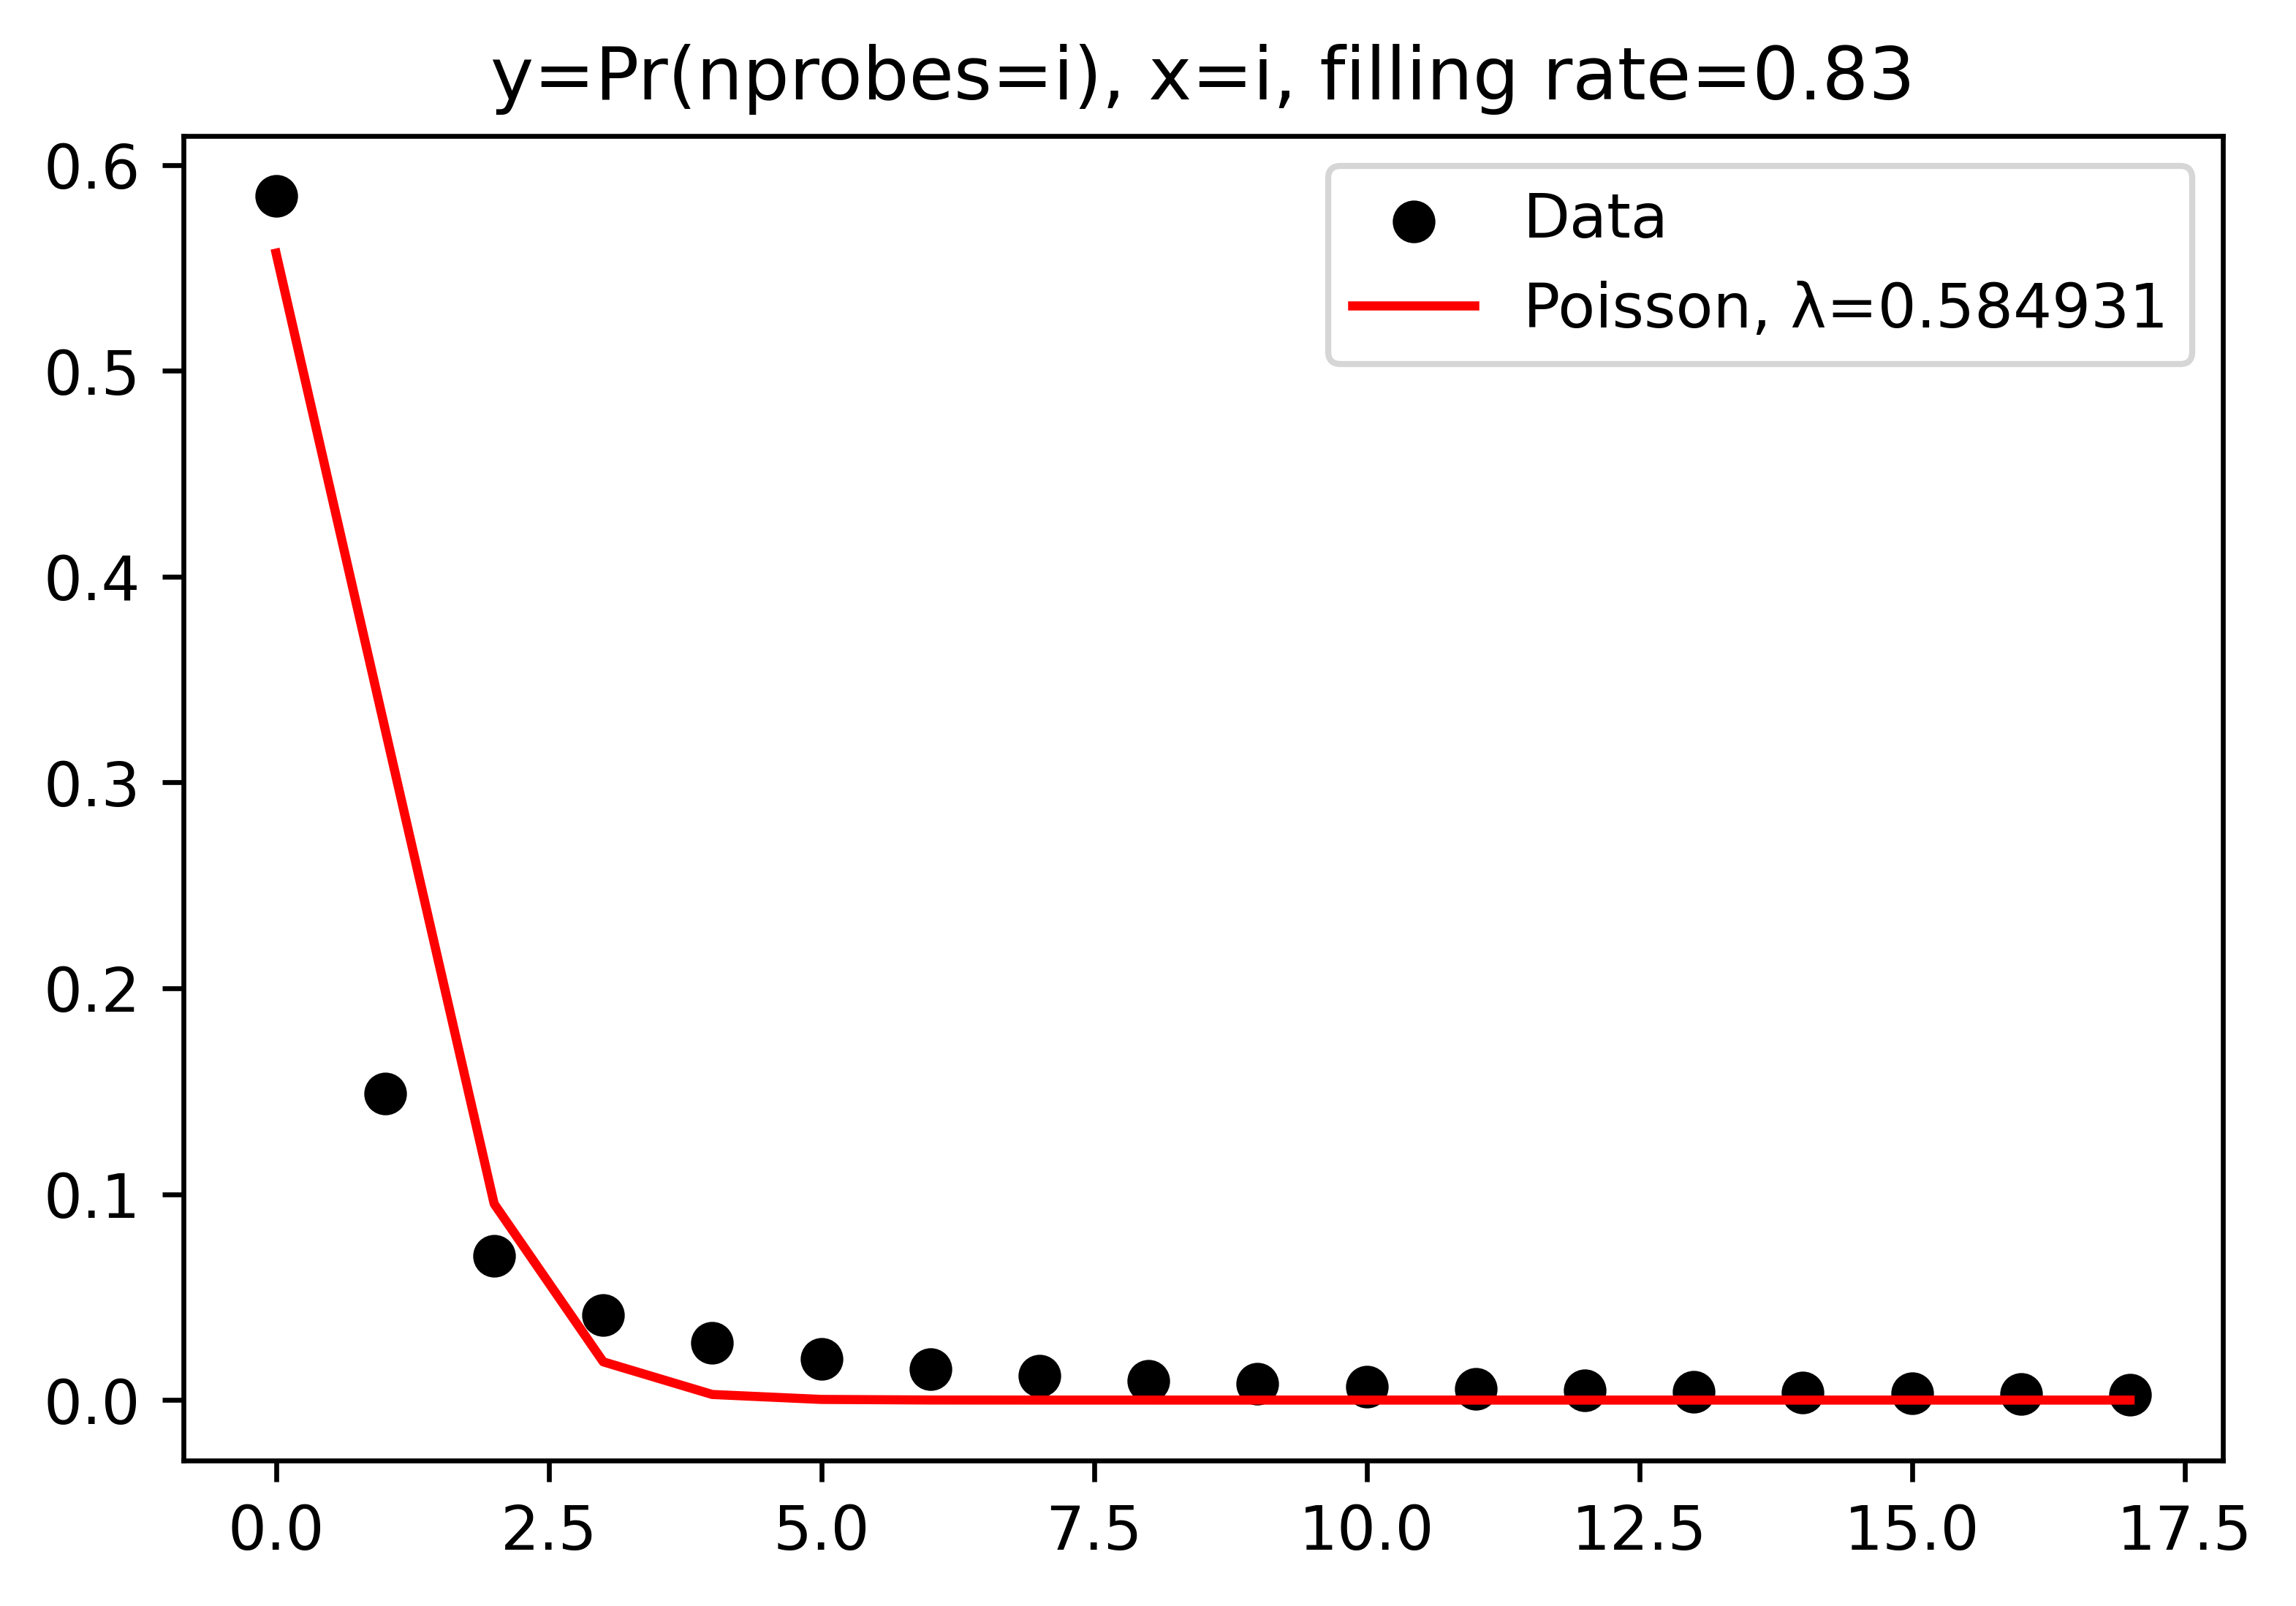

None

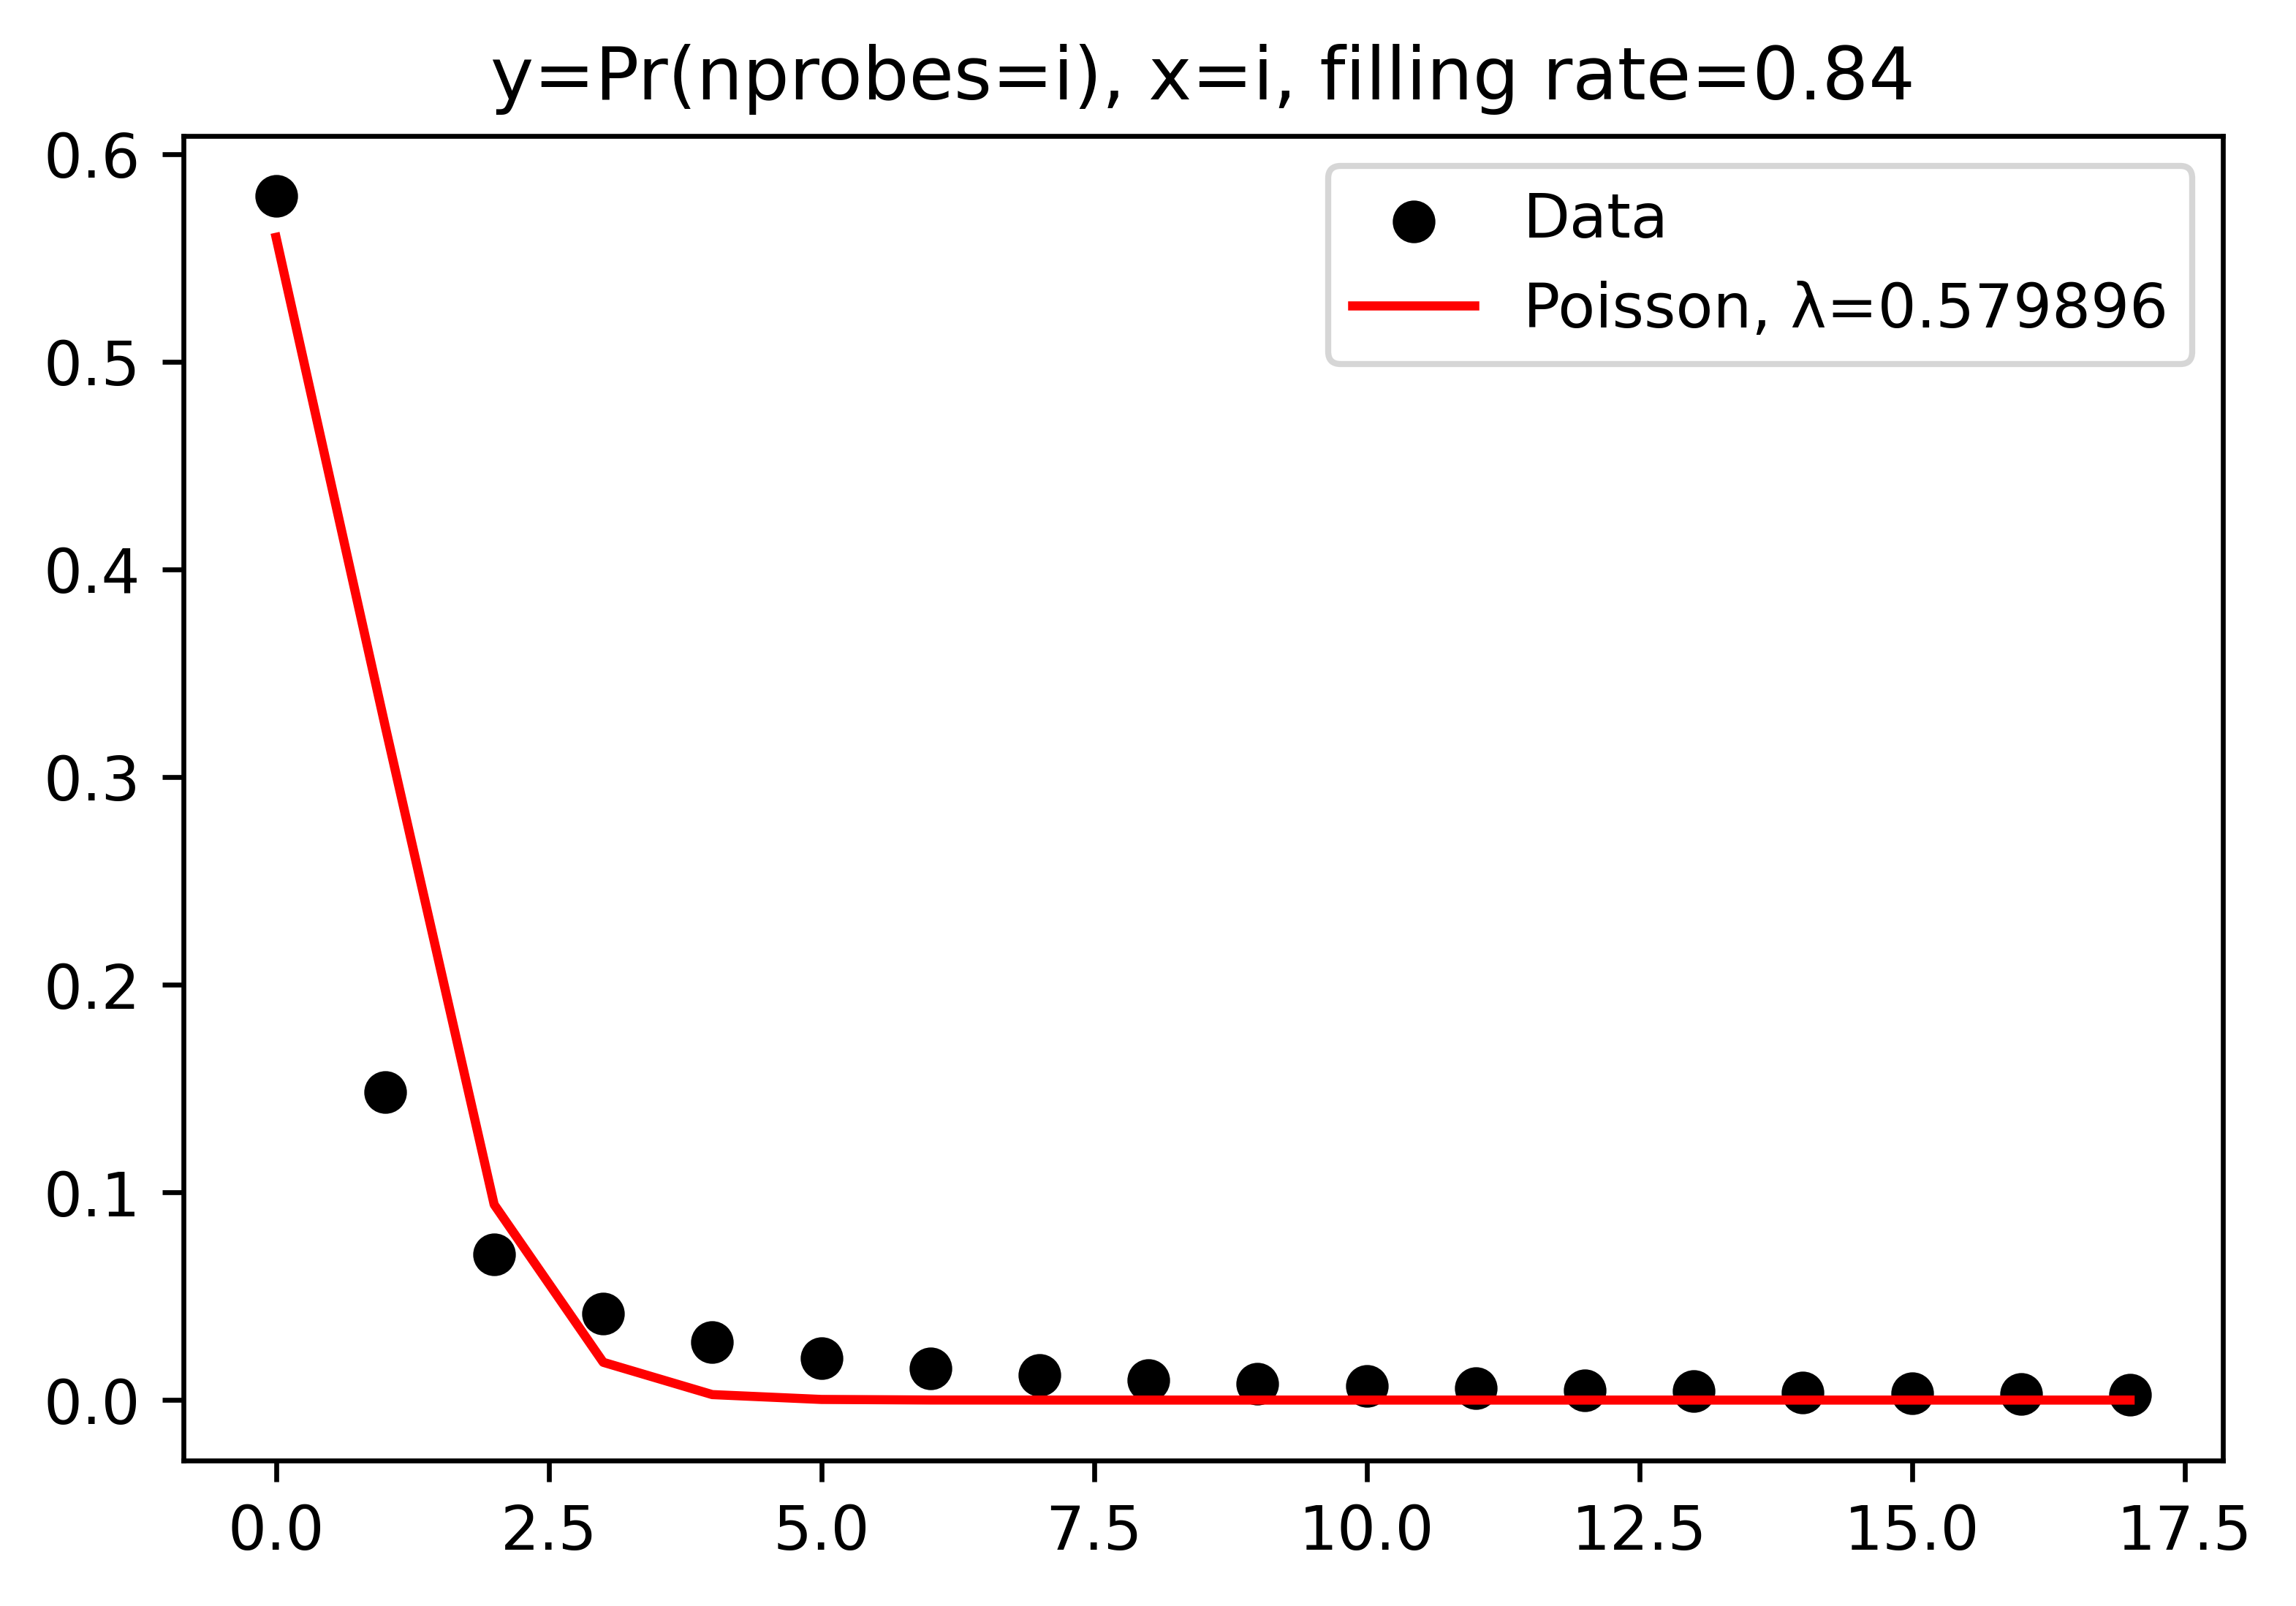

None

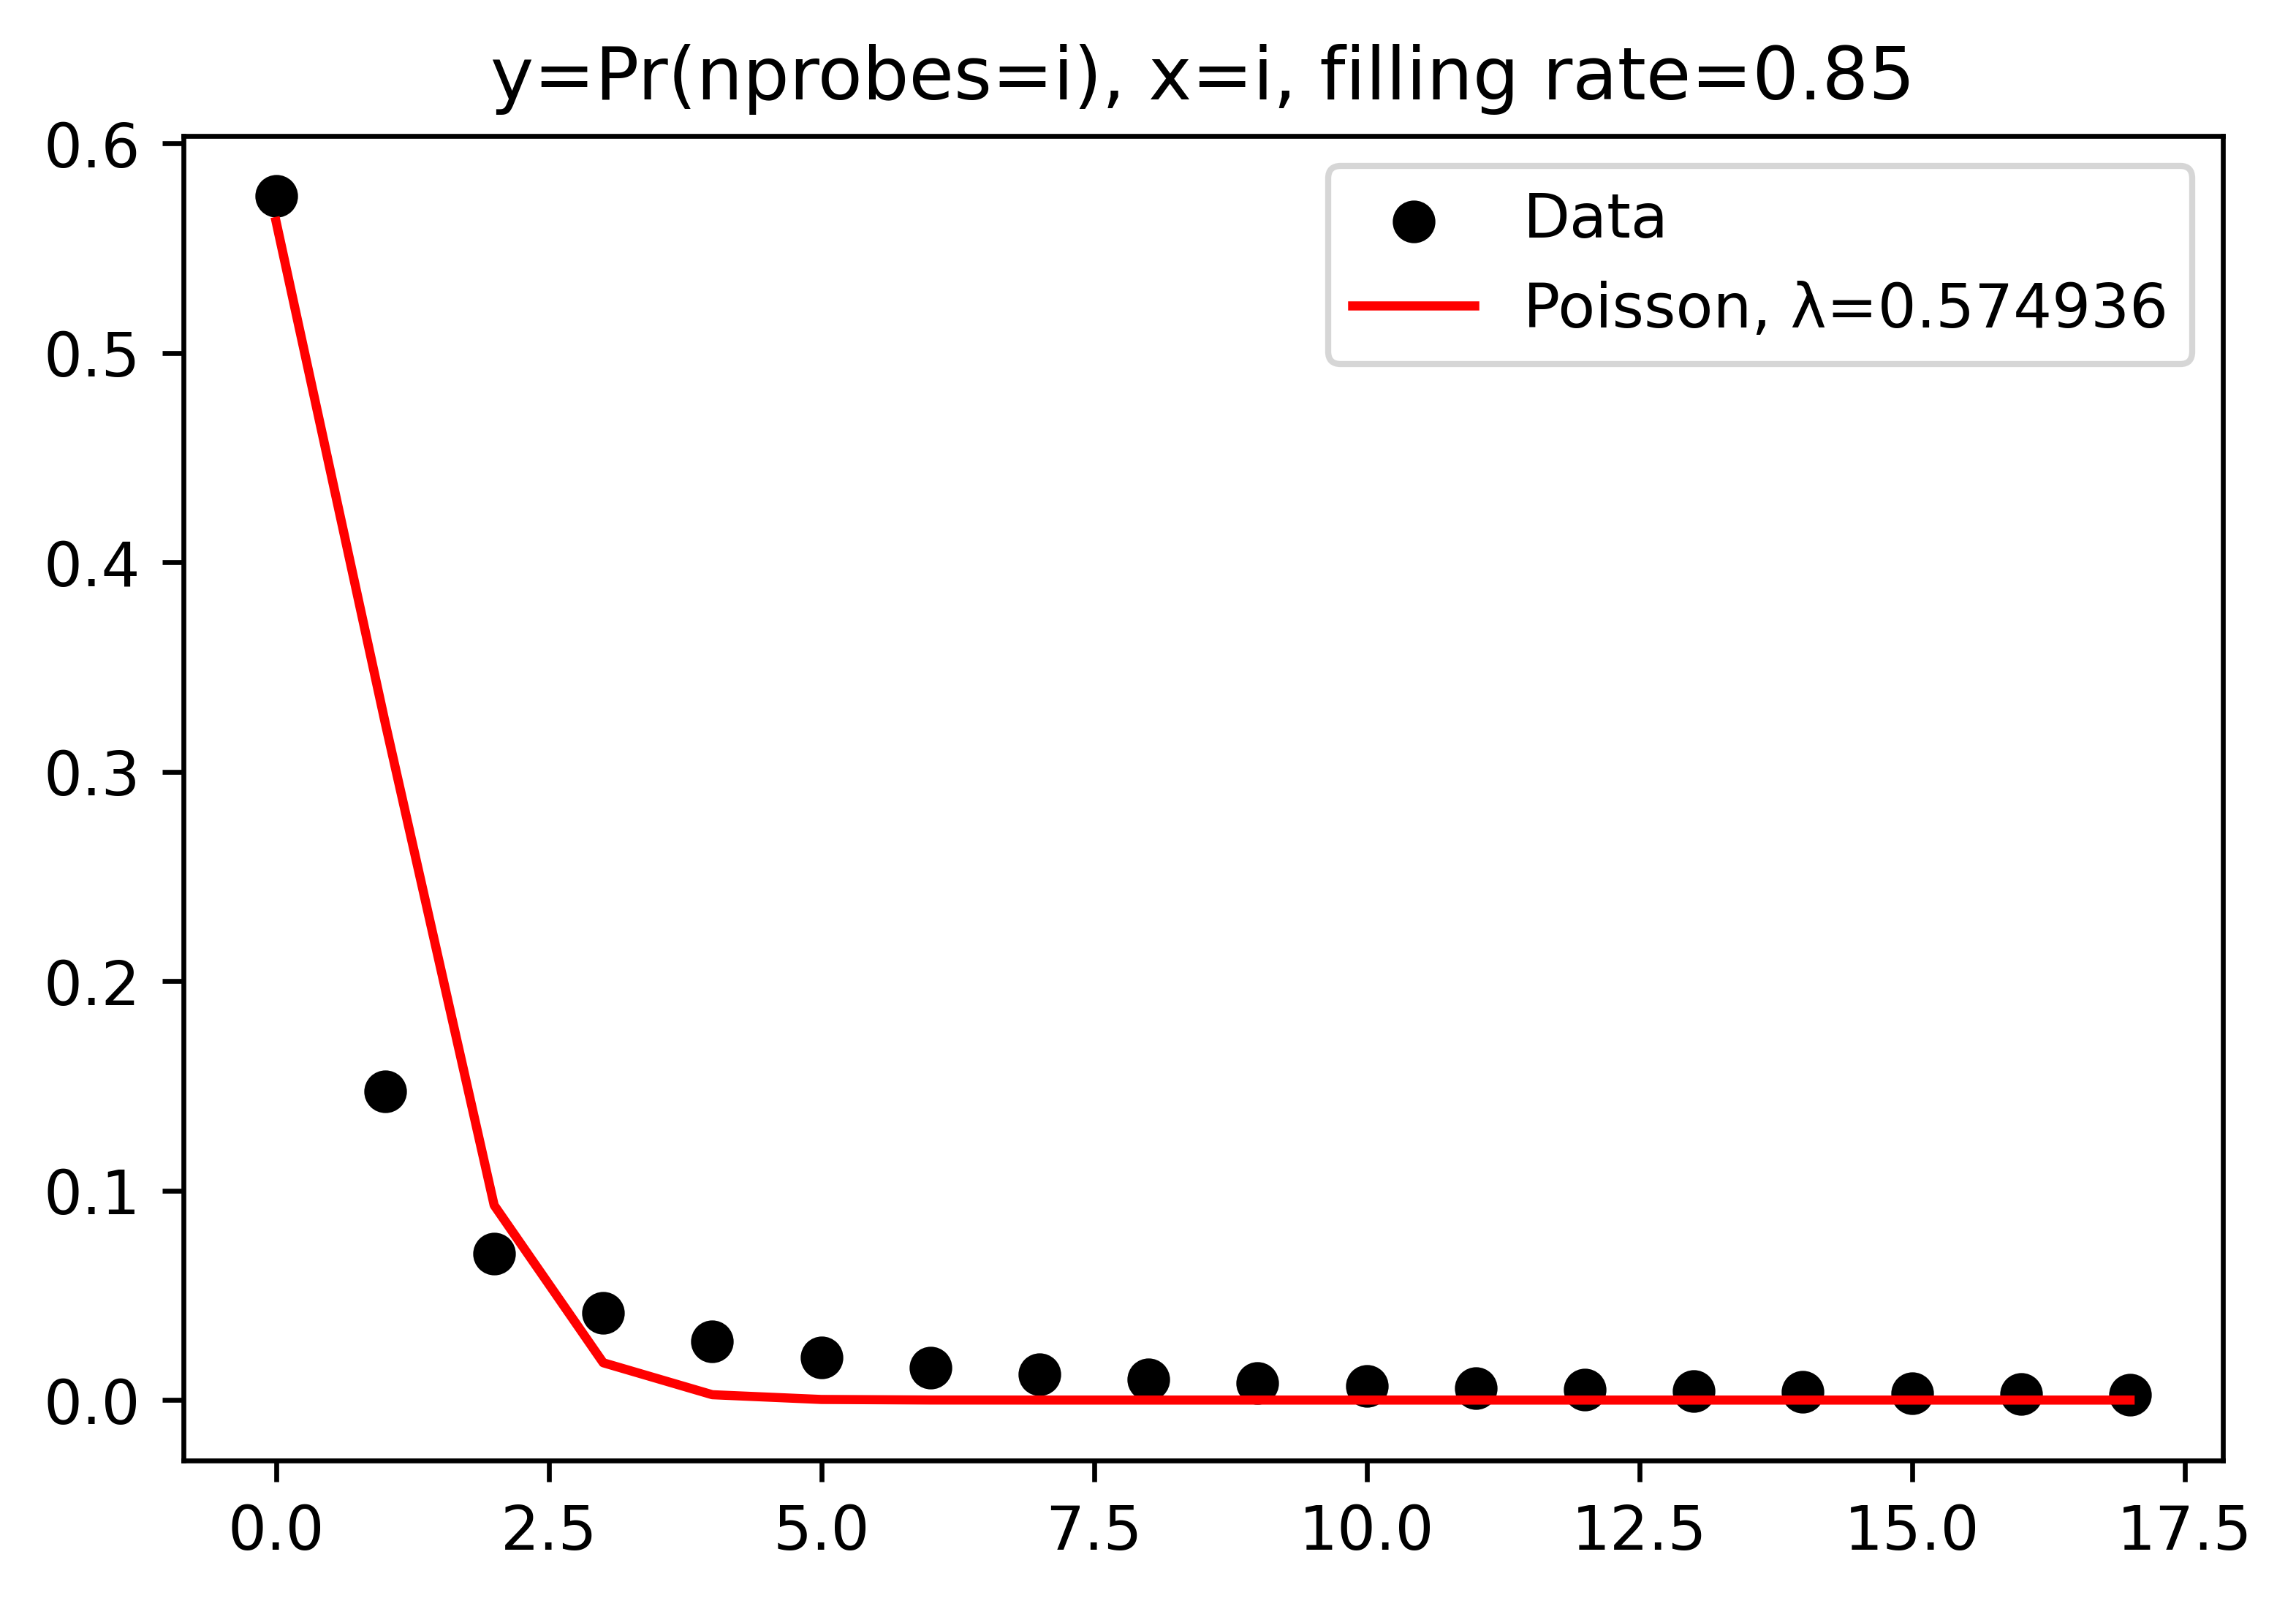

None

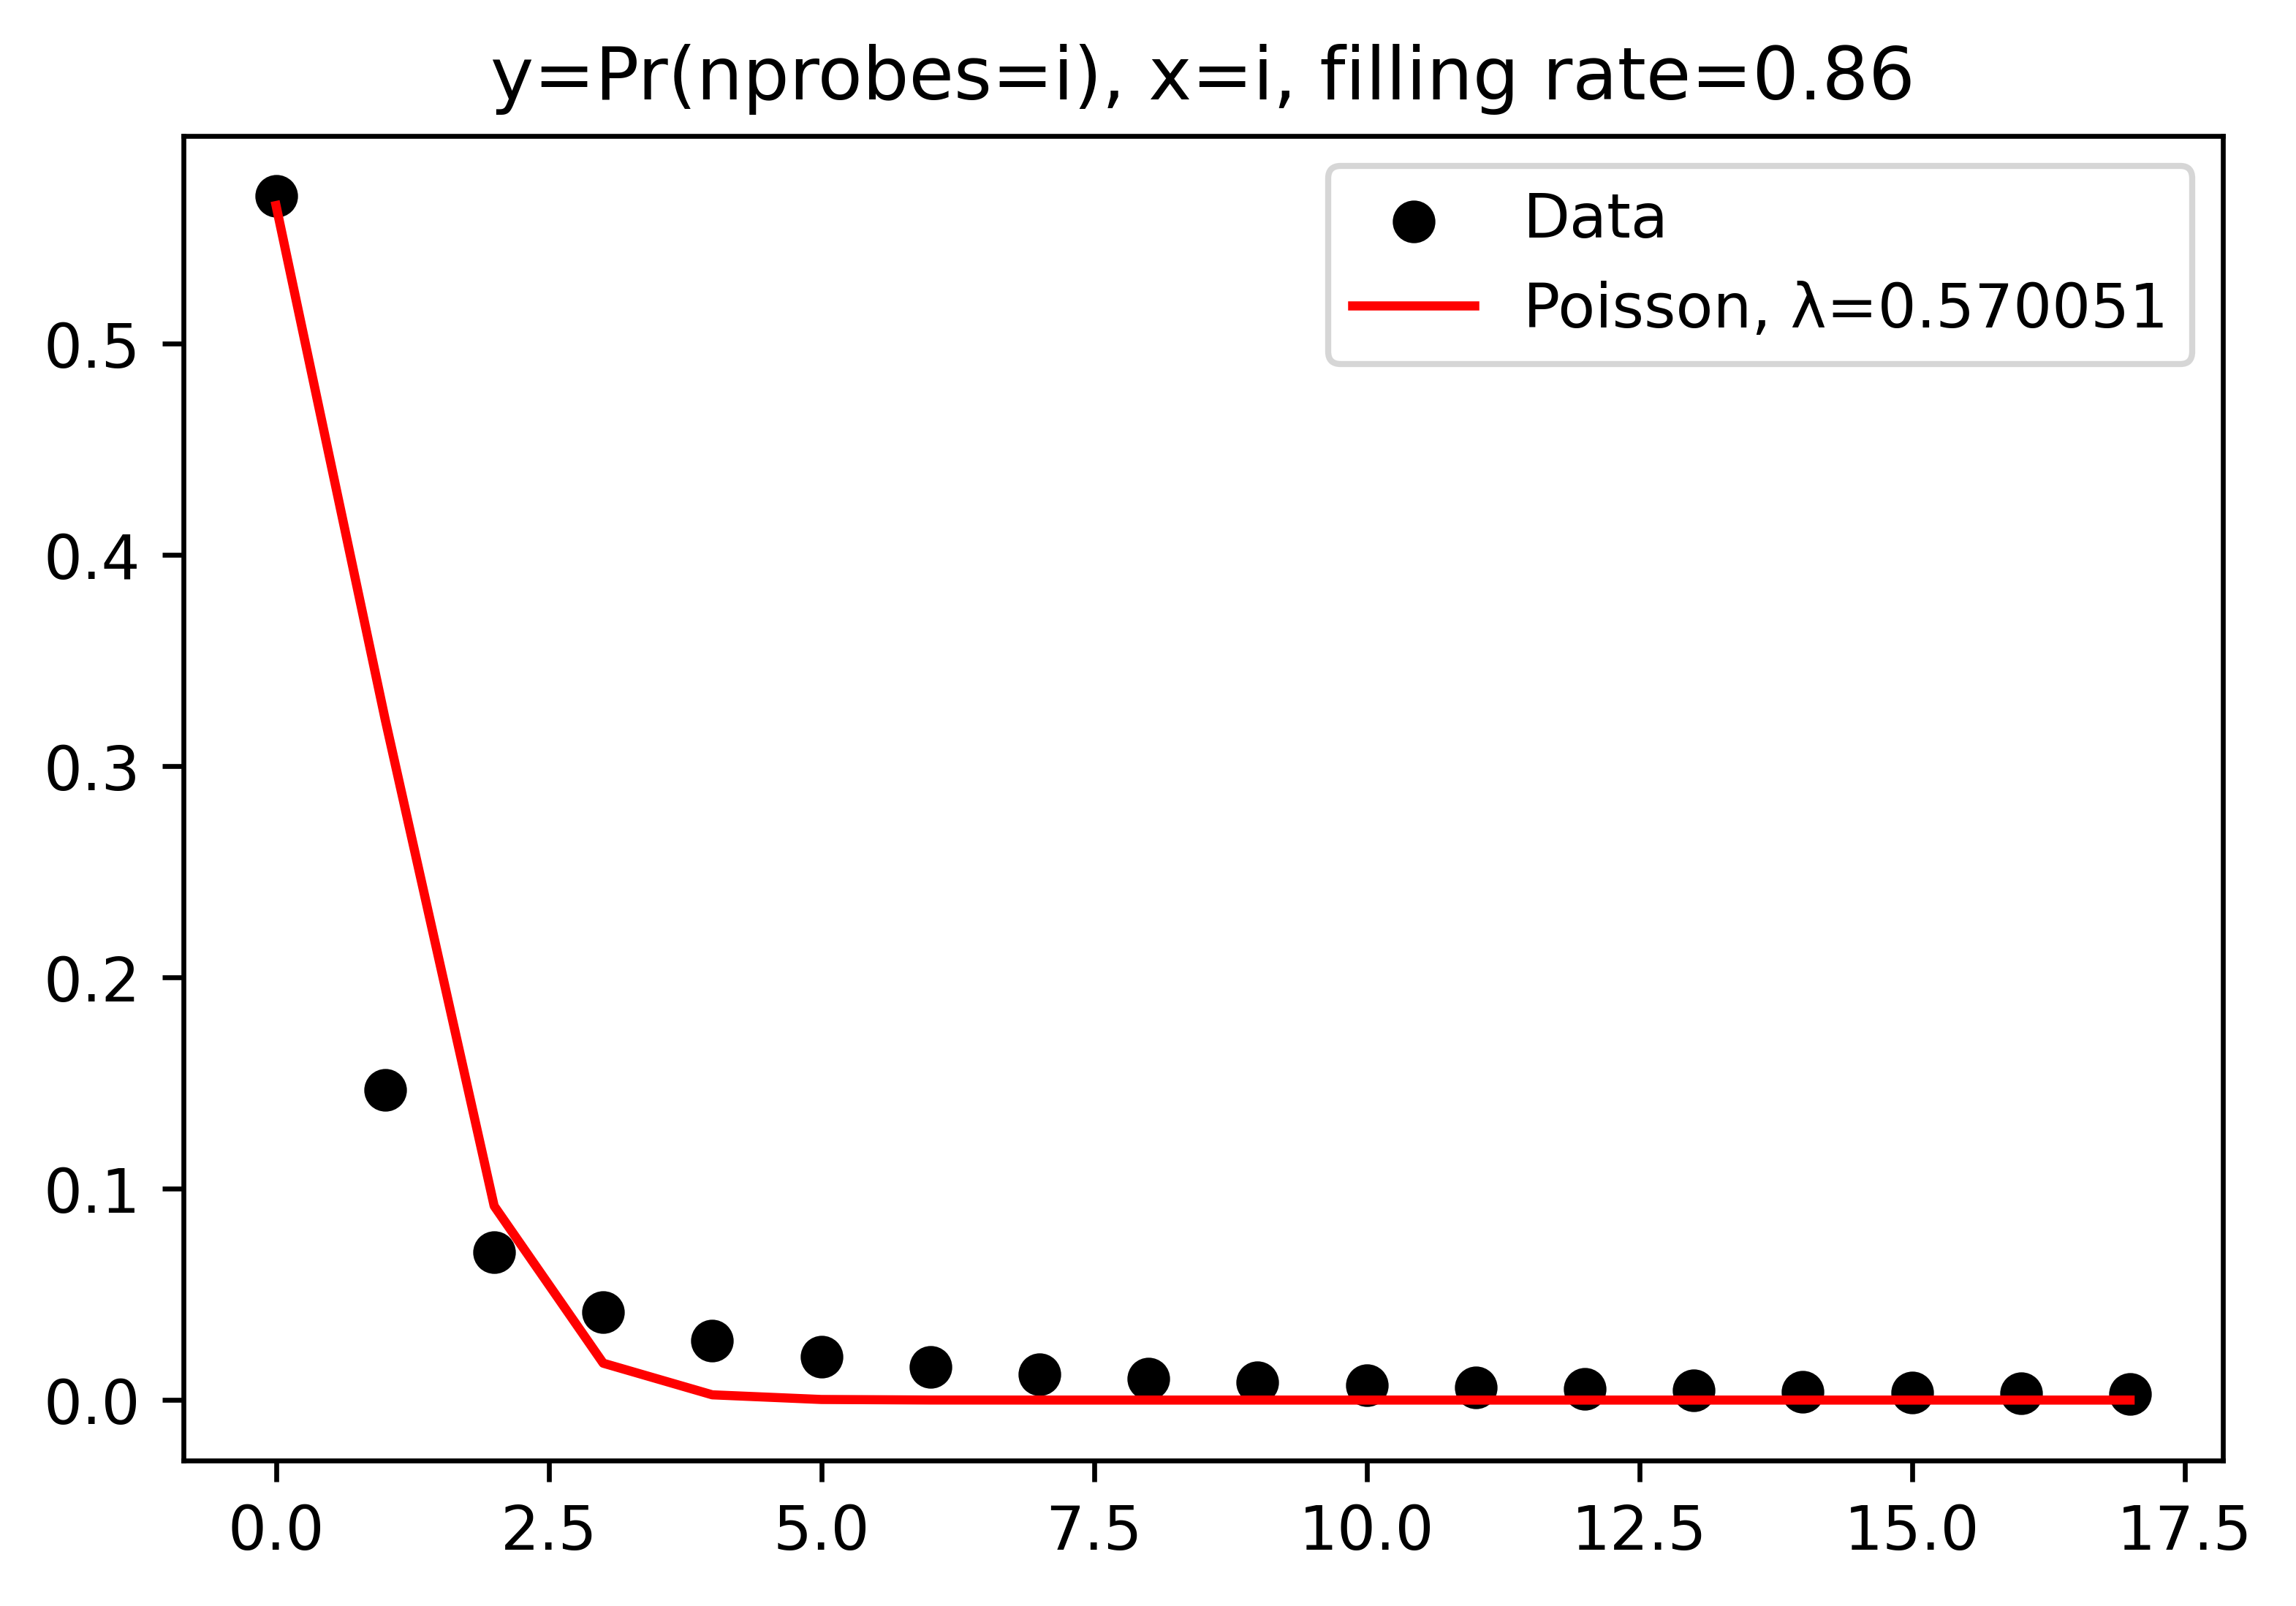

None

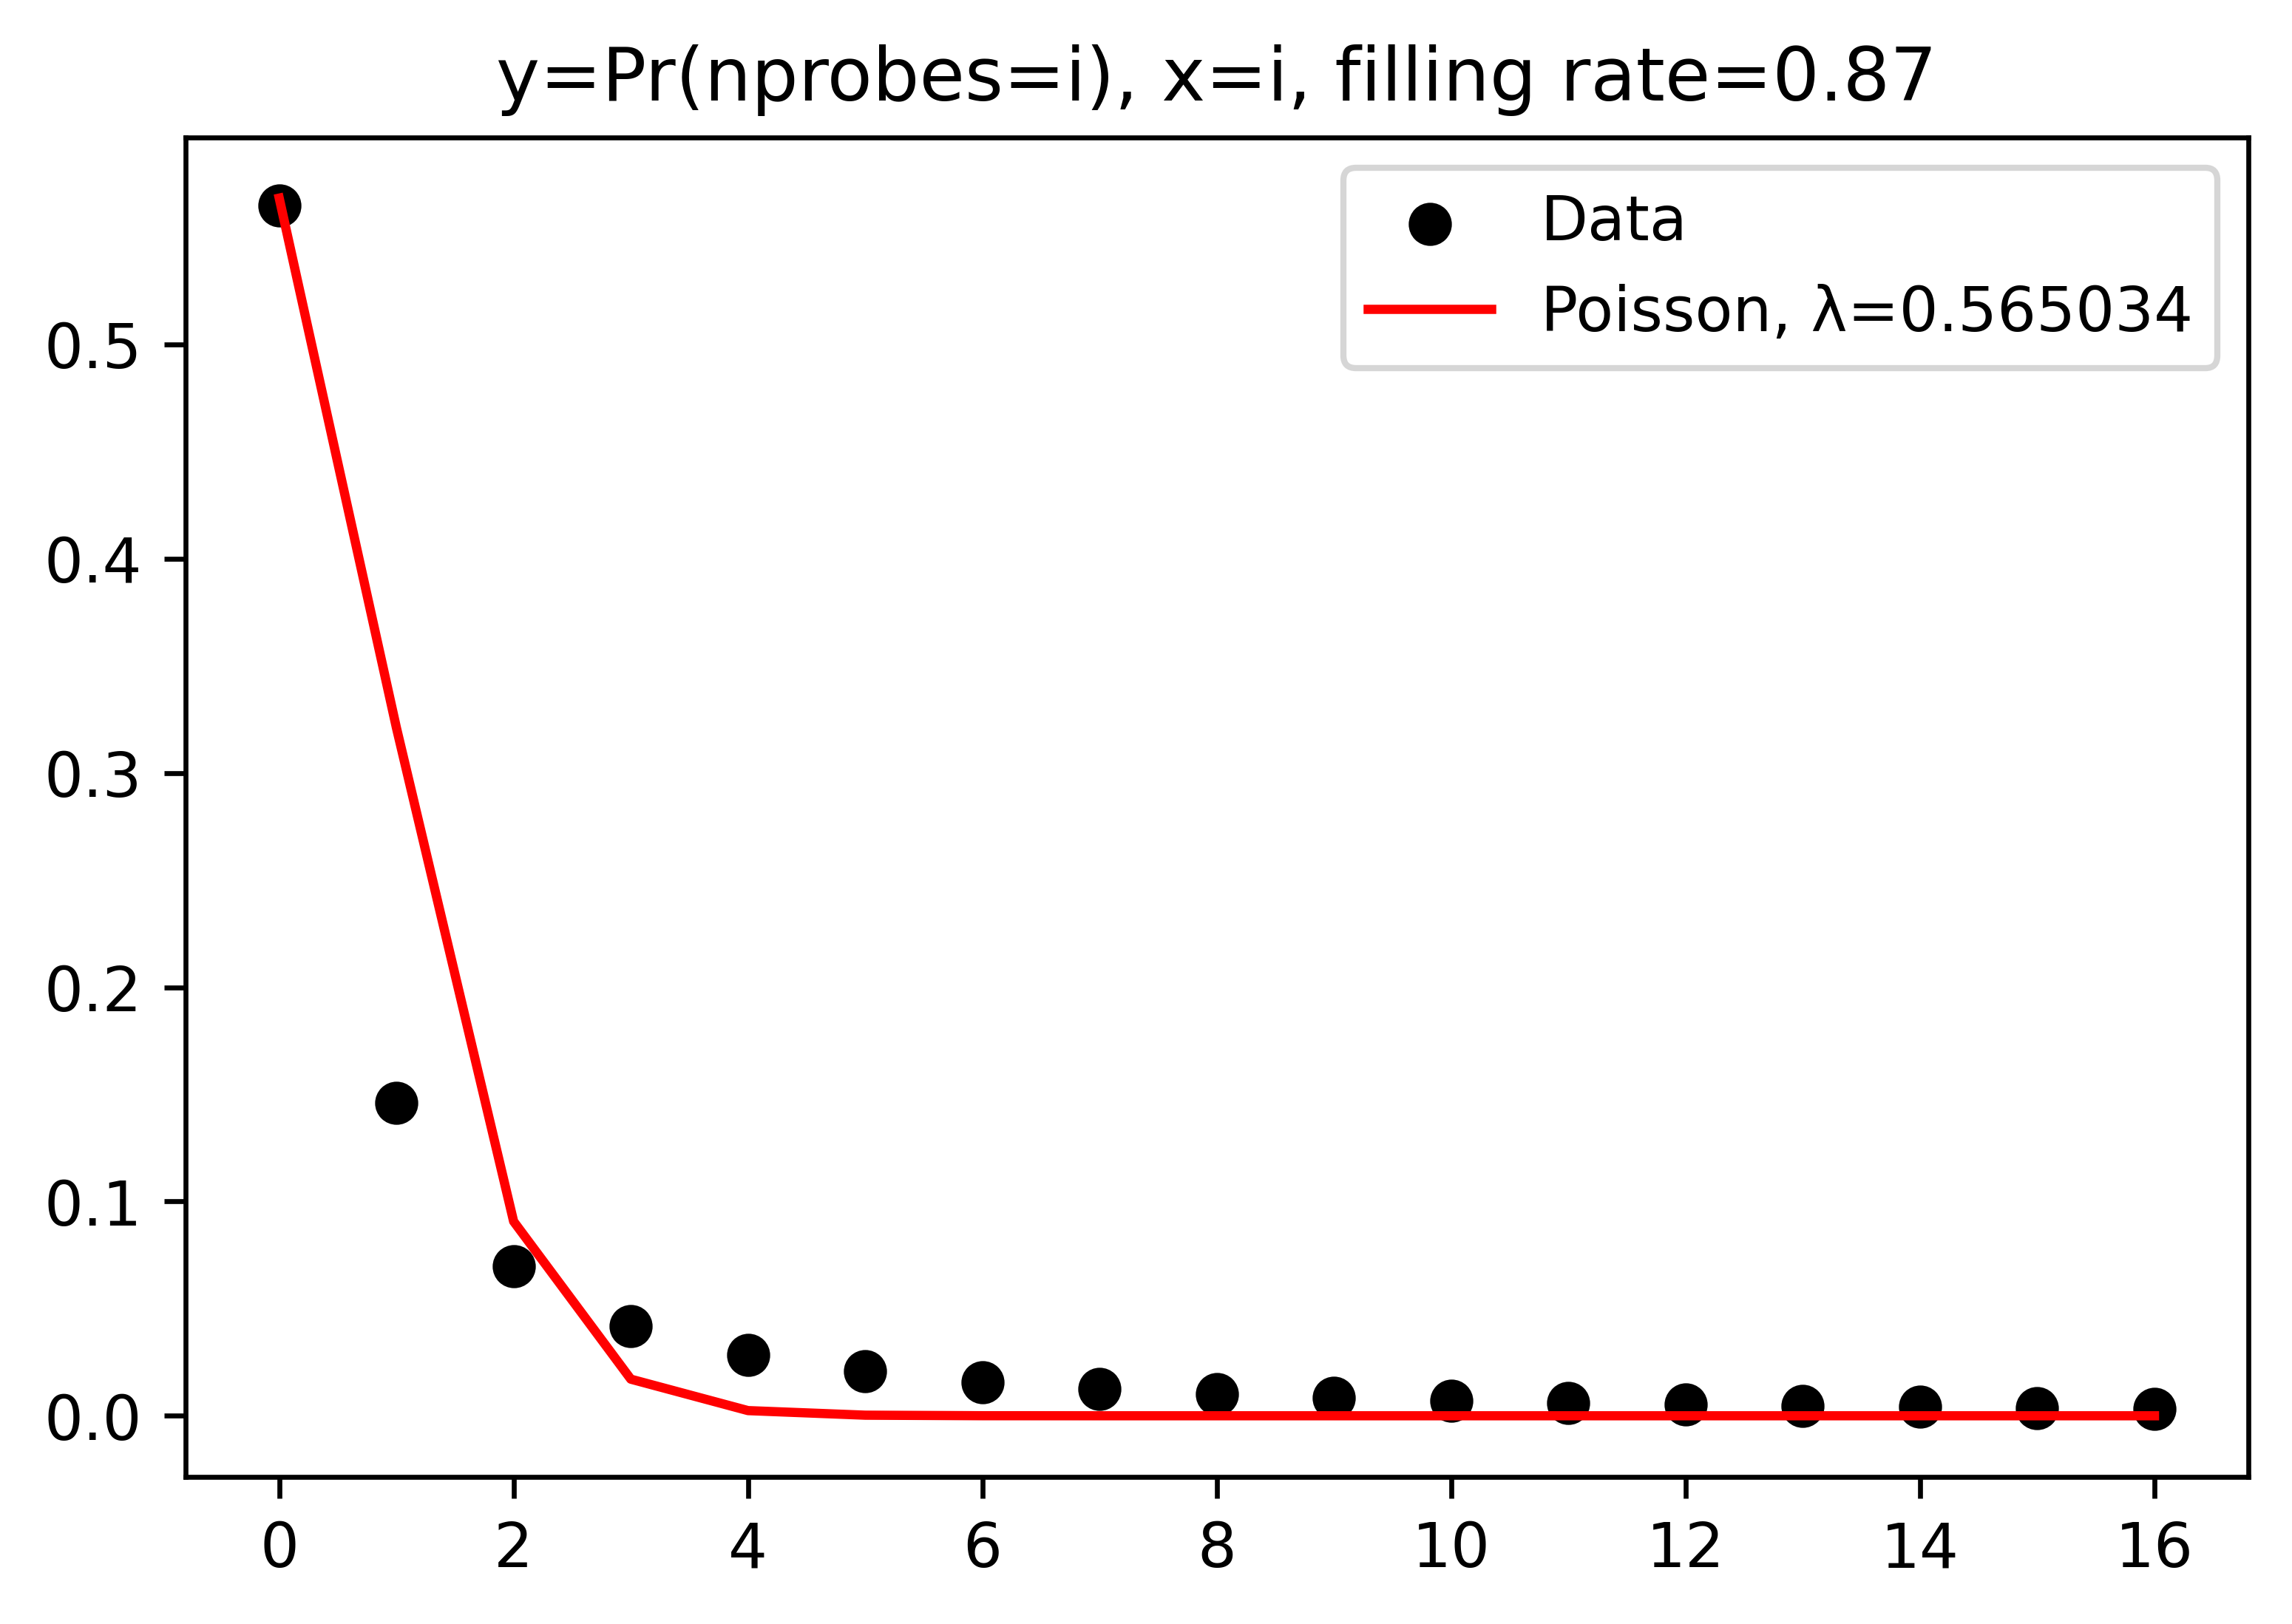

None

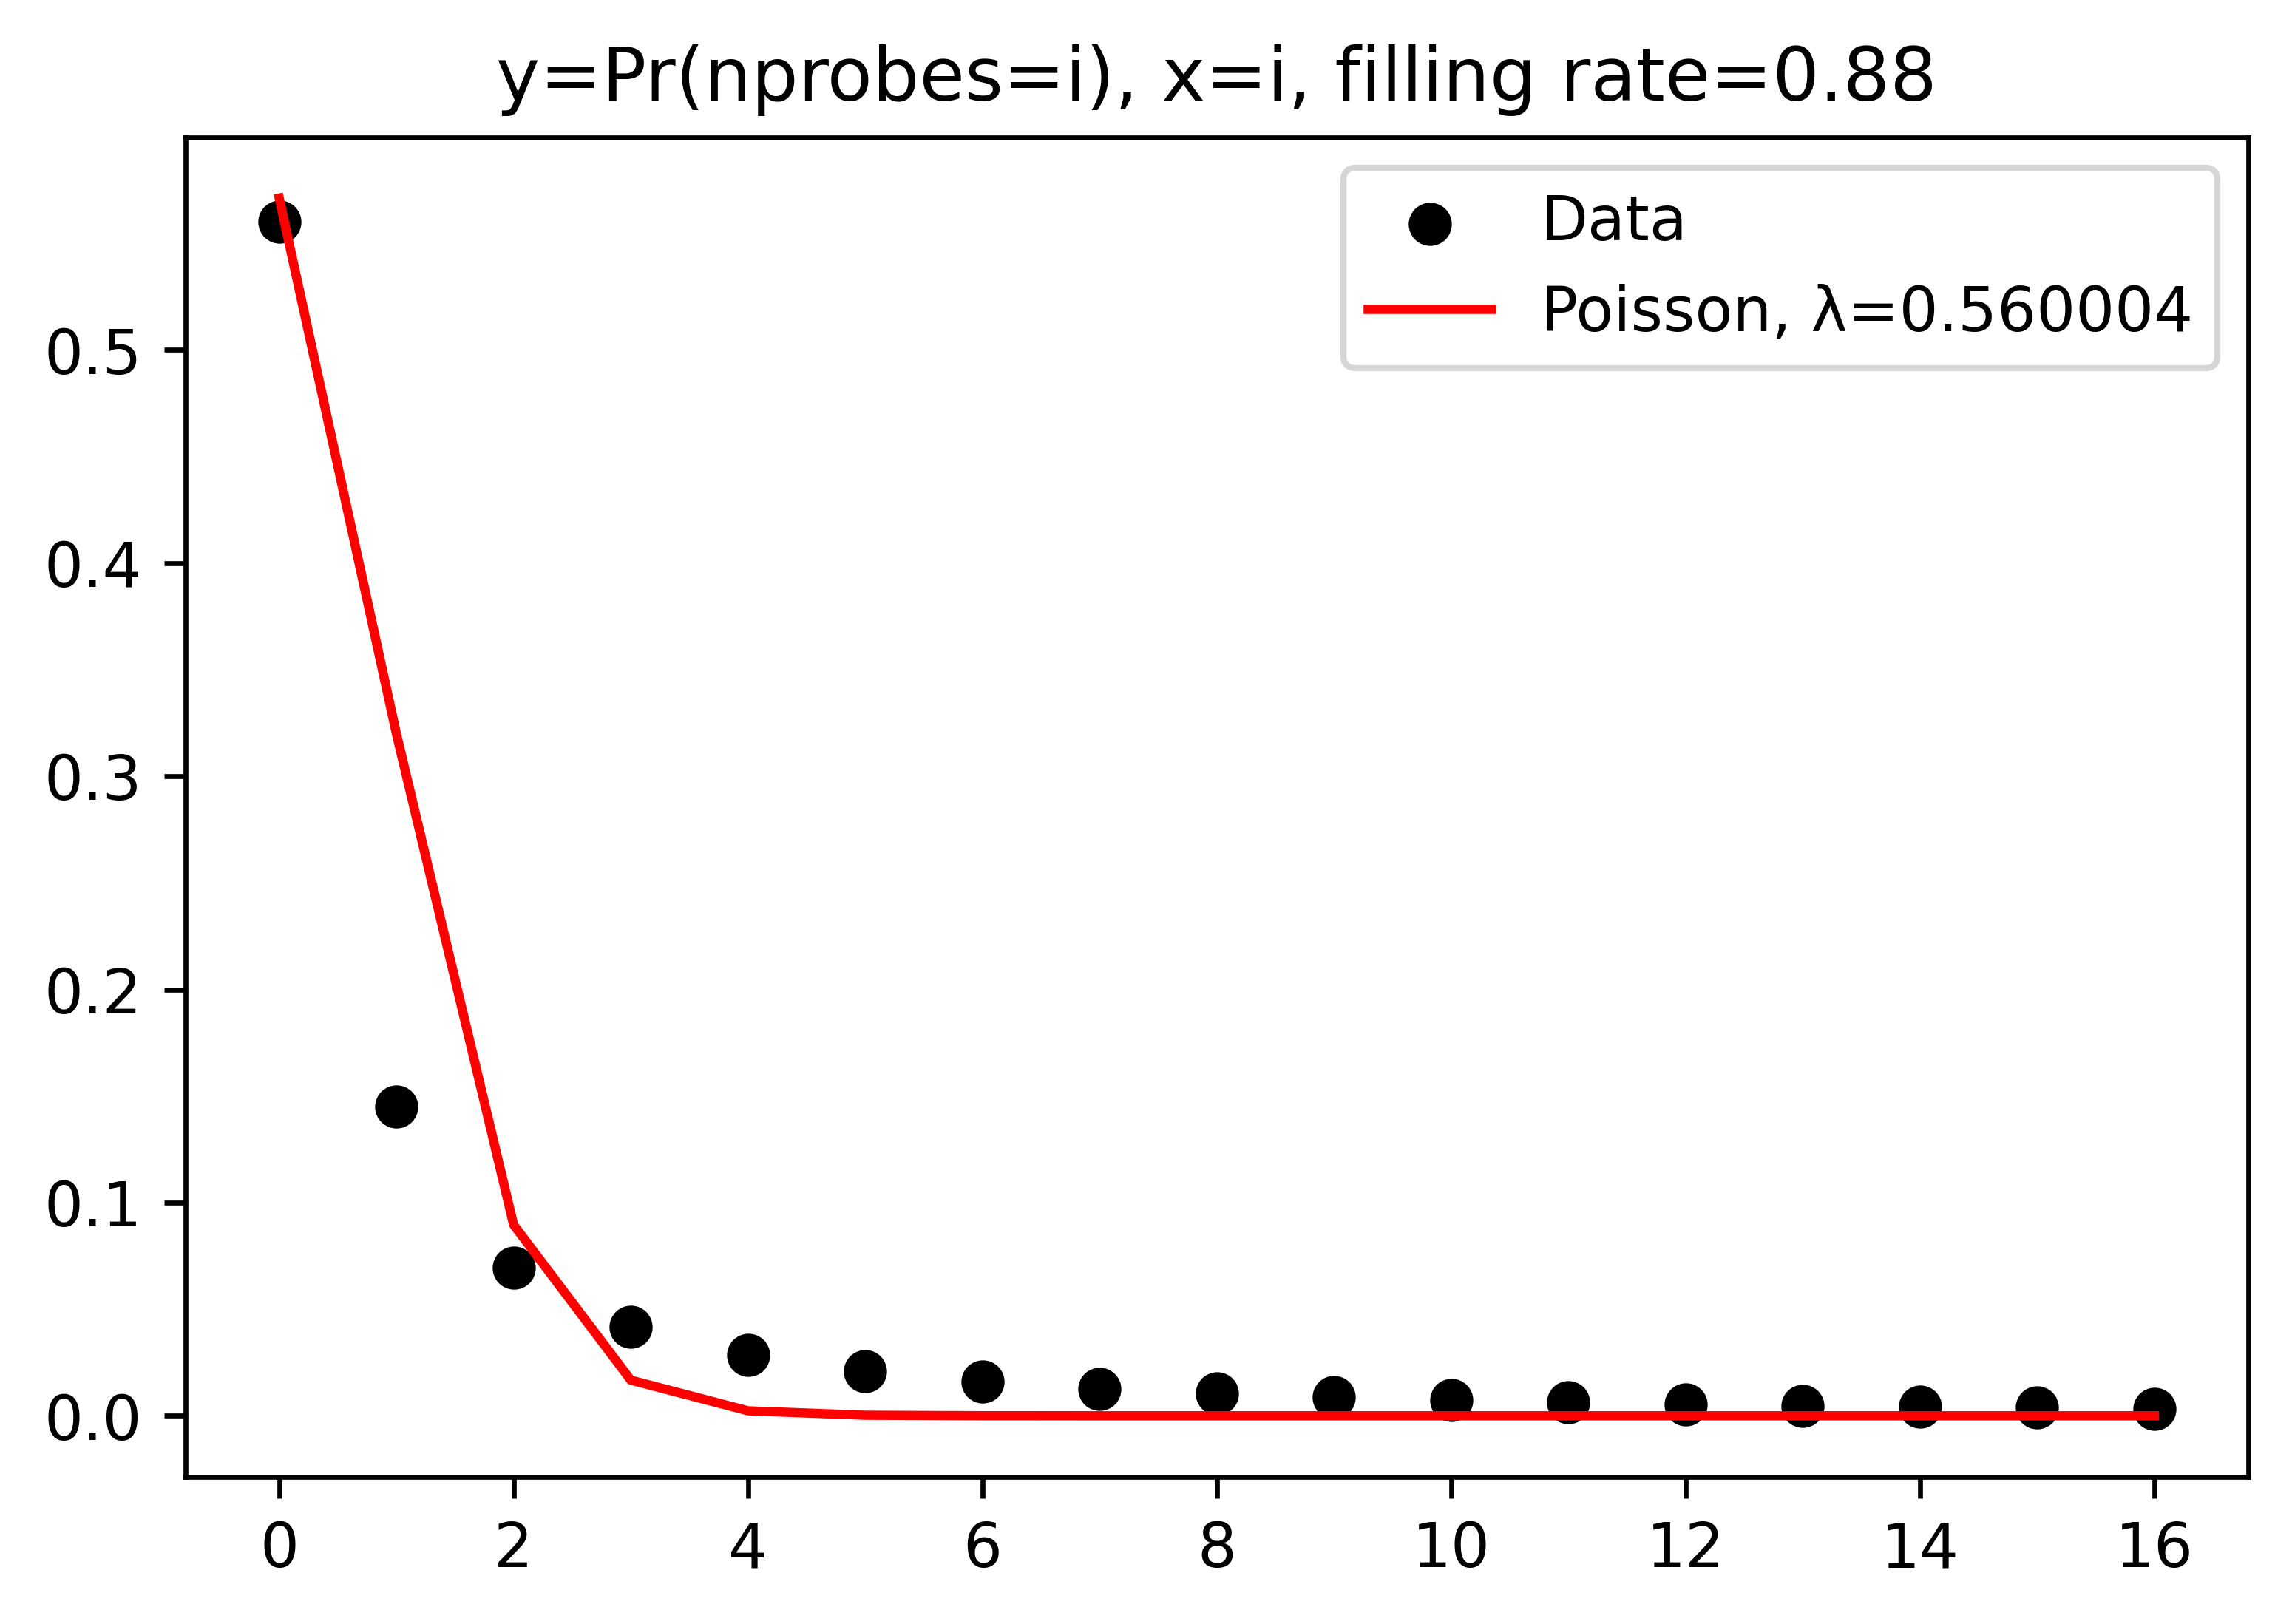

None

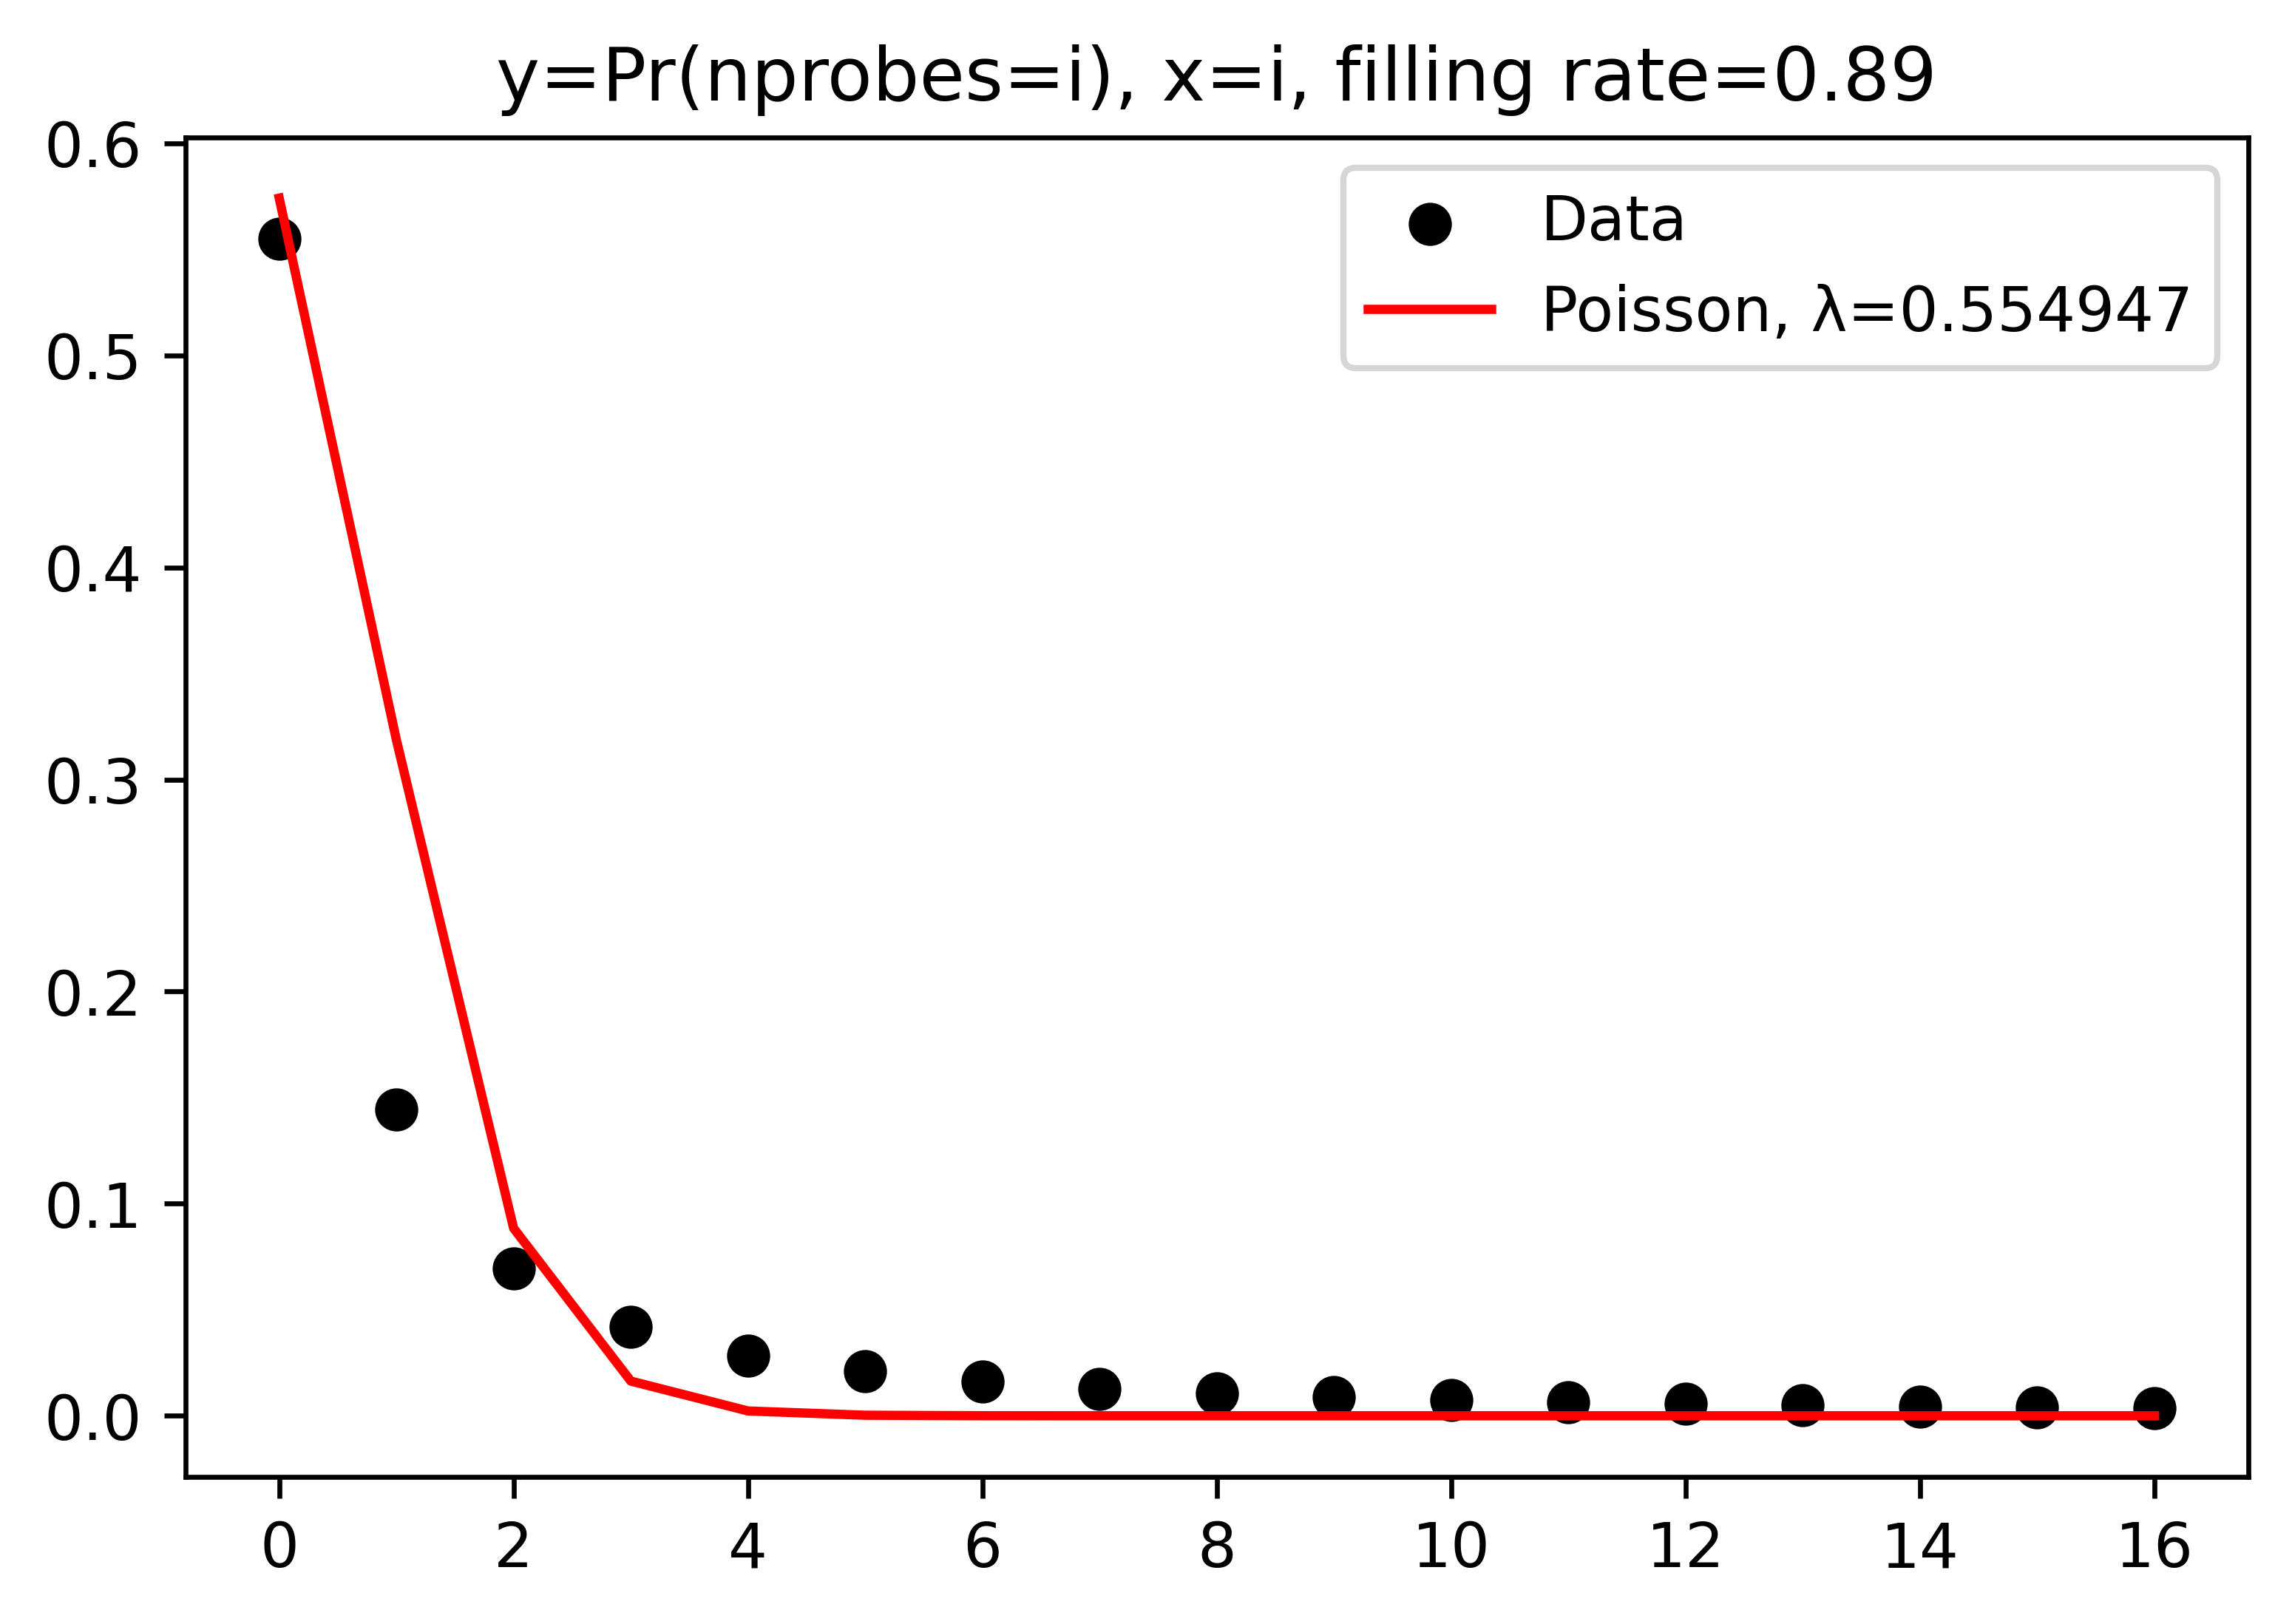

None

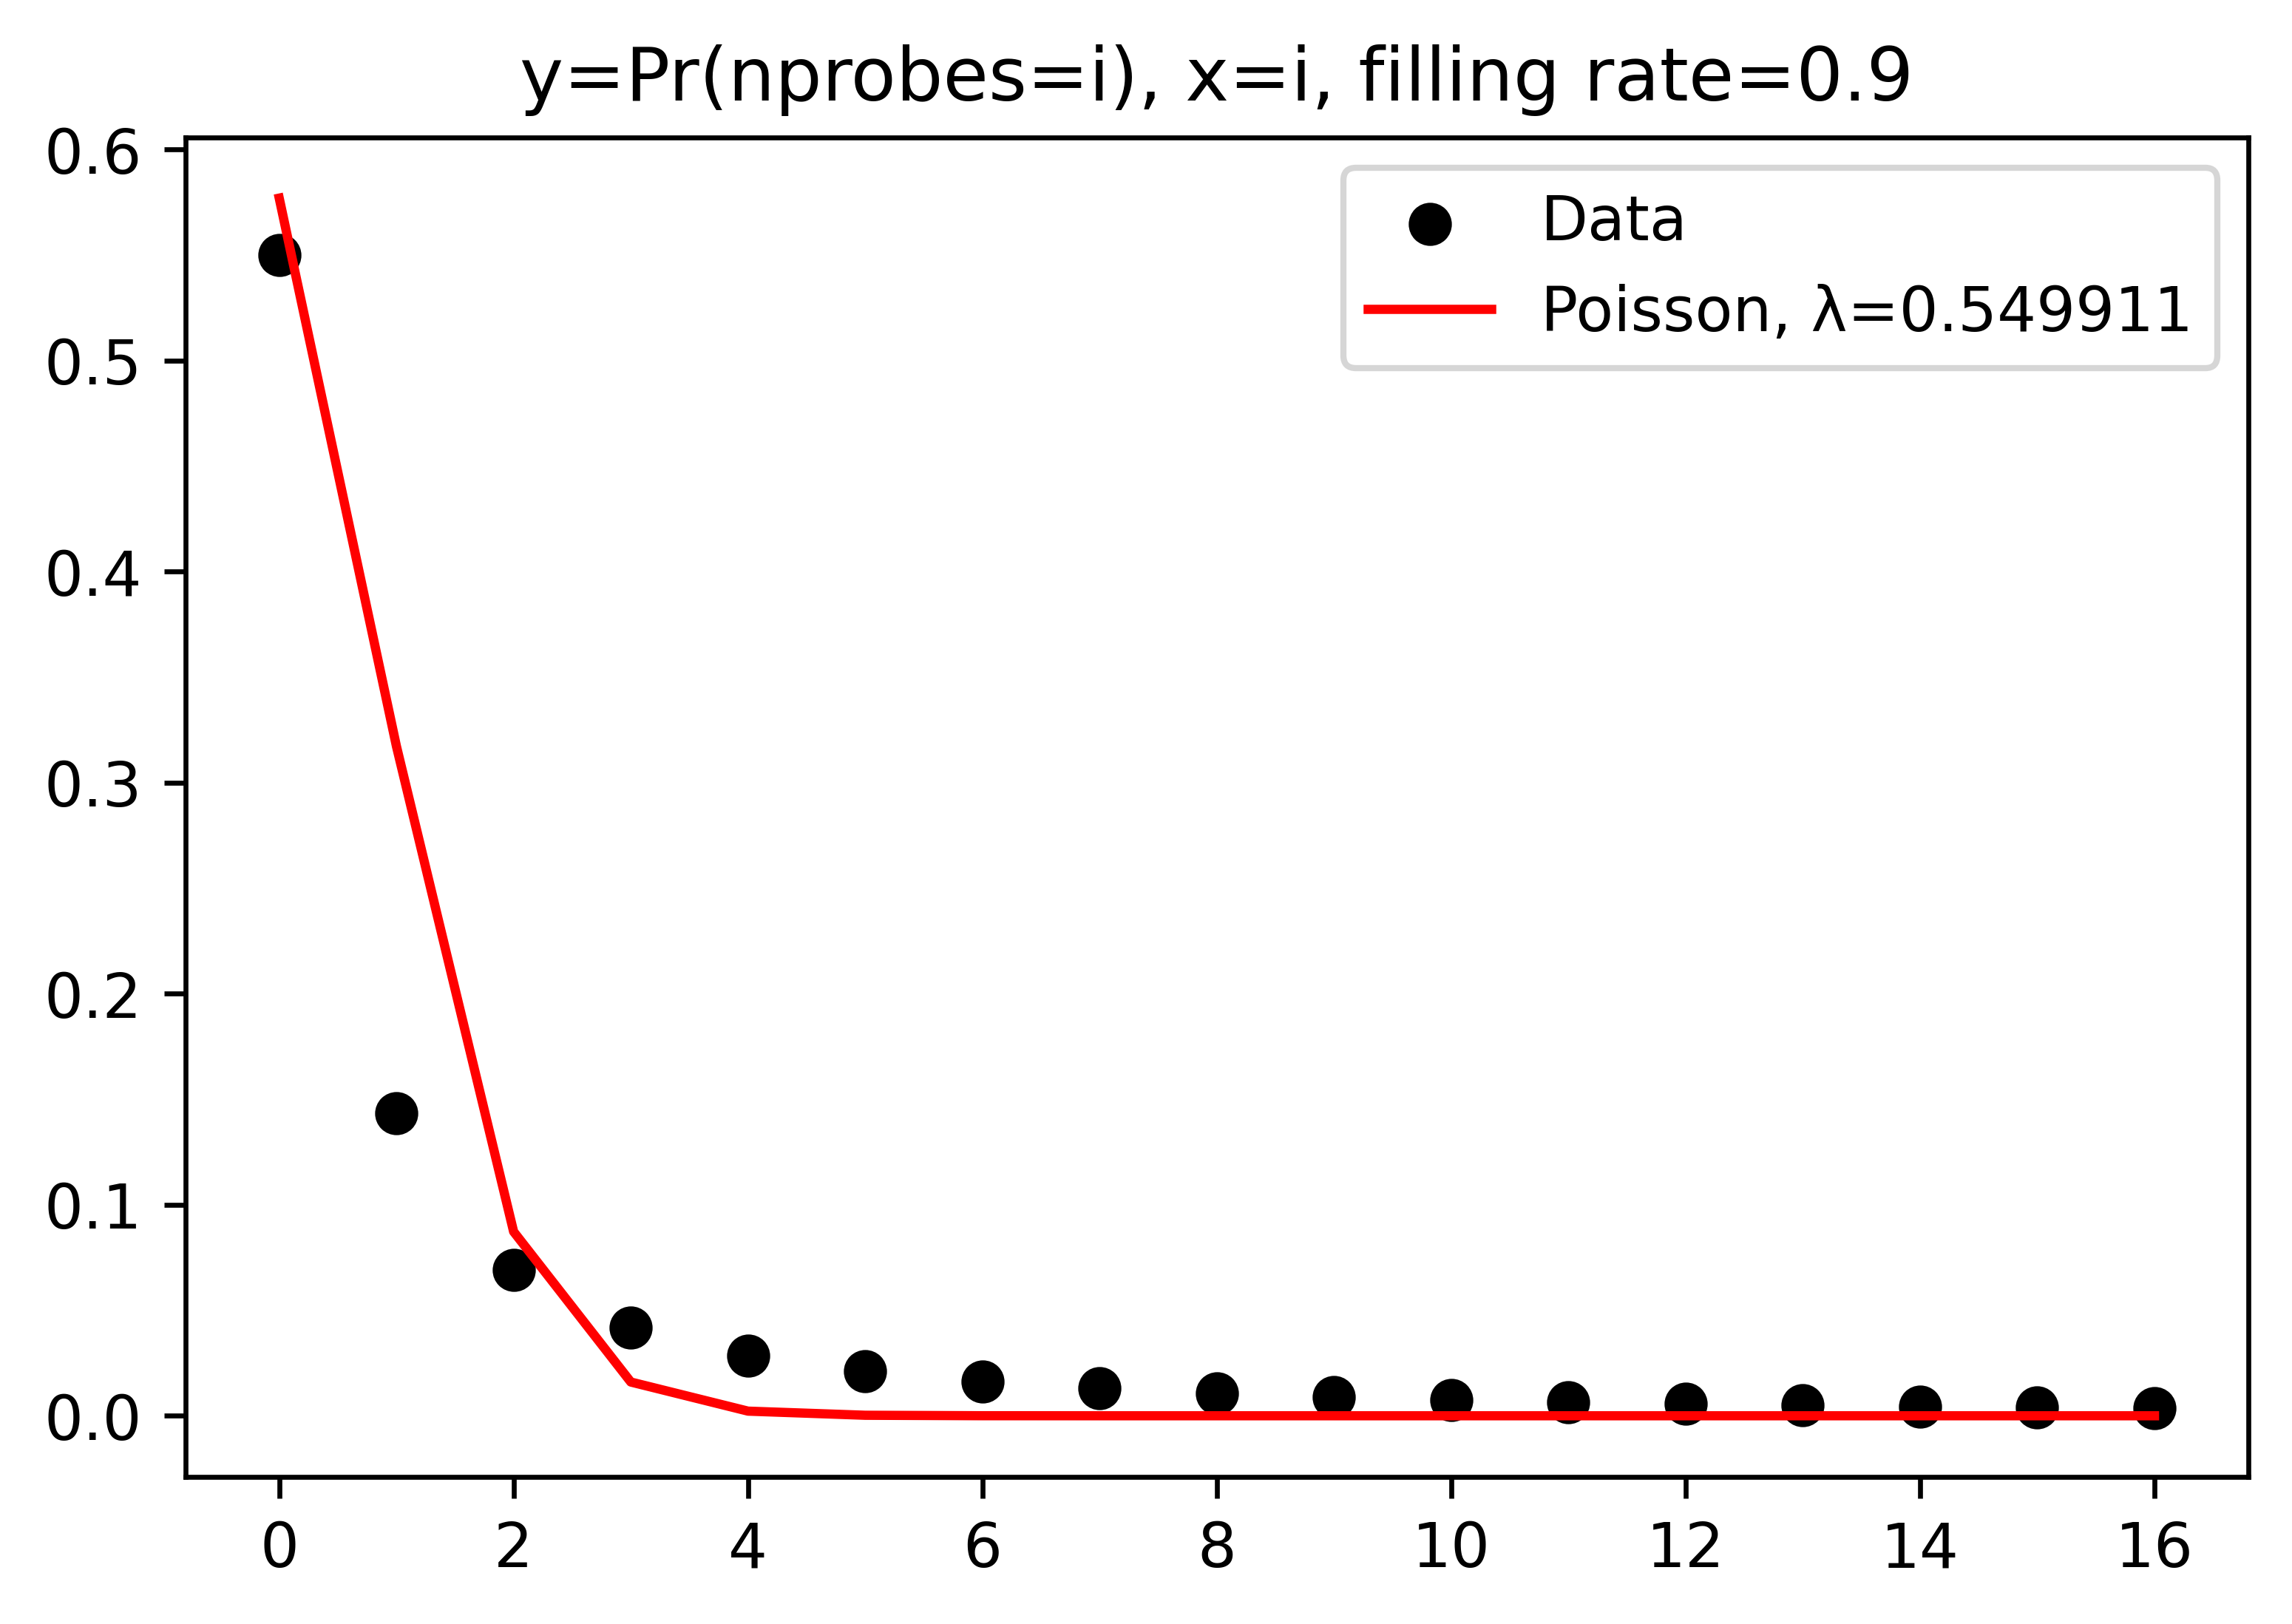

None

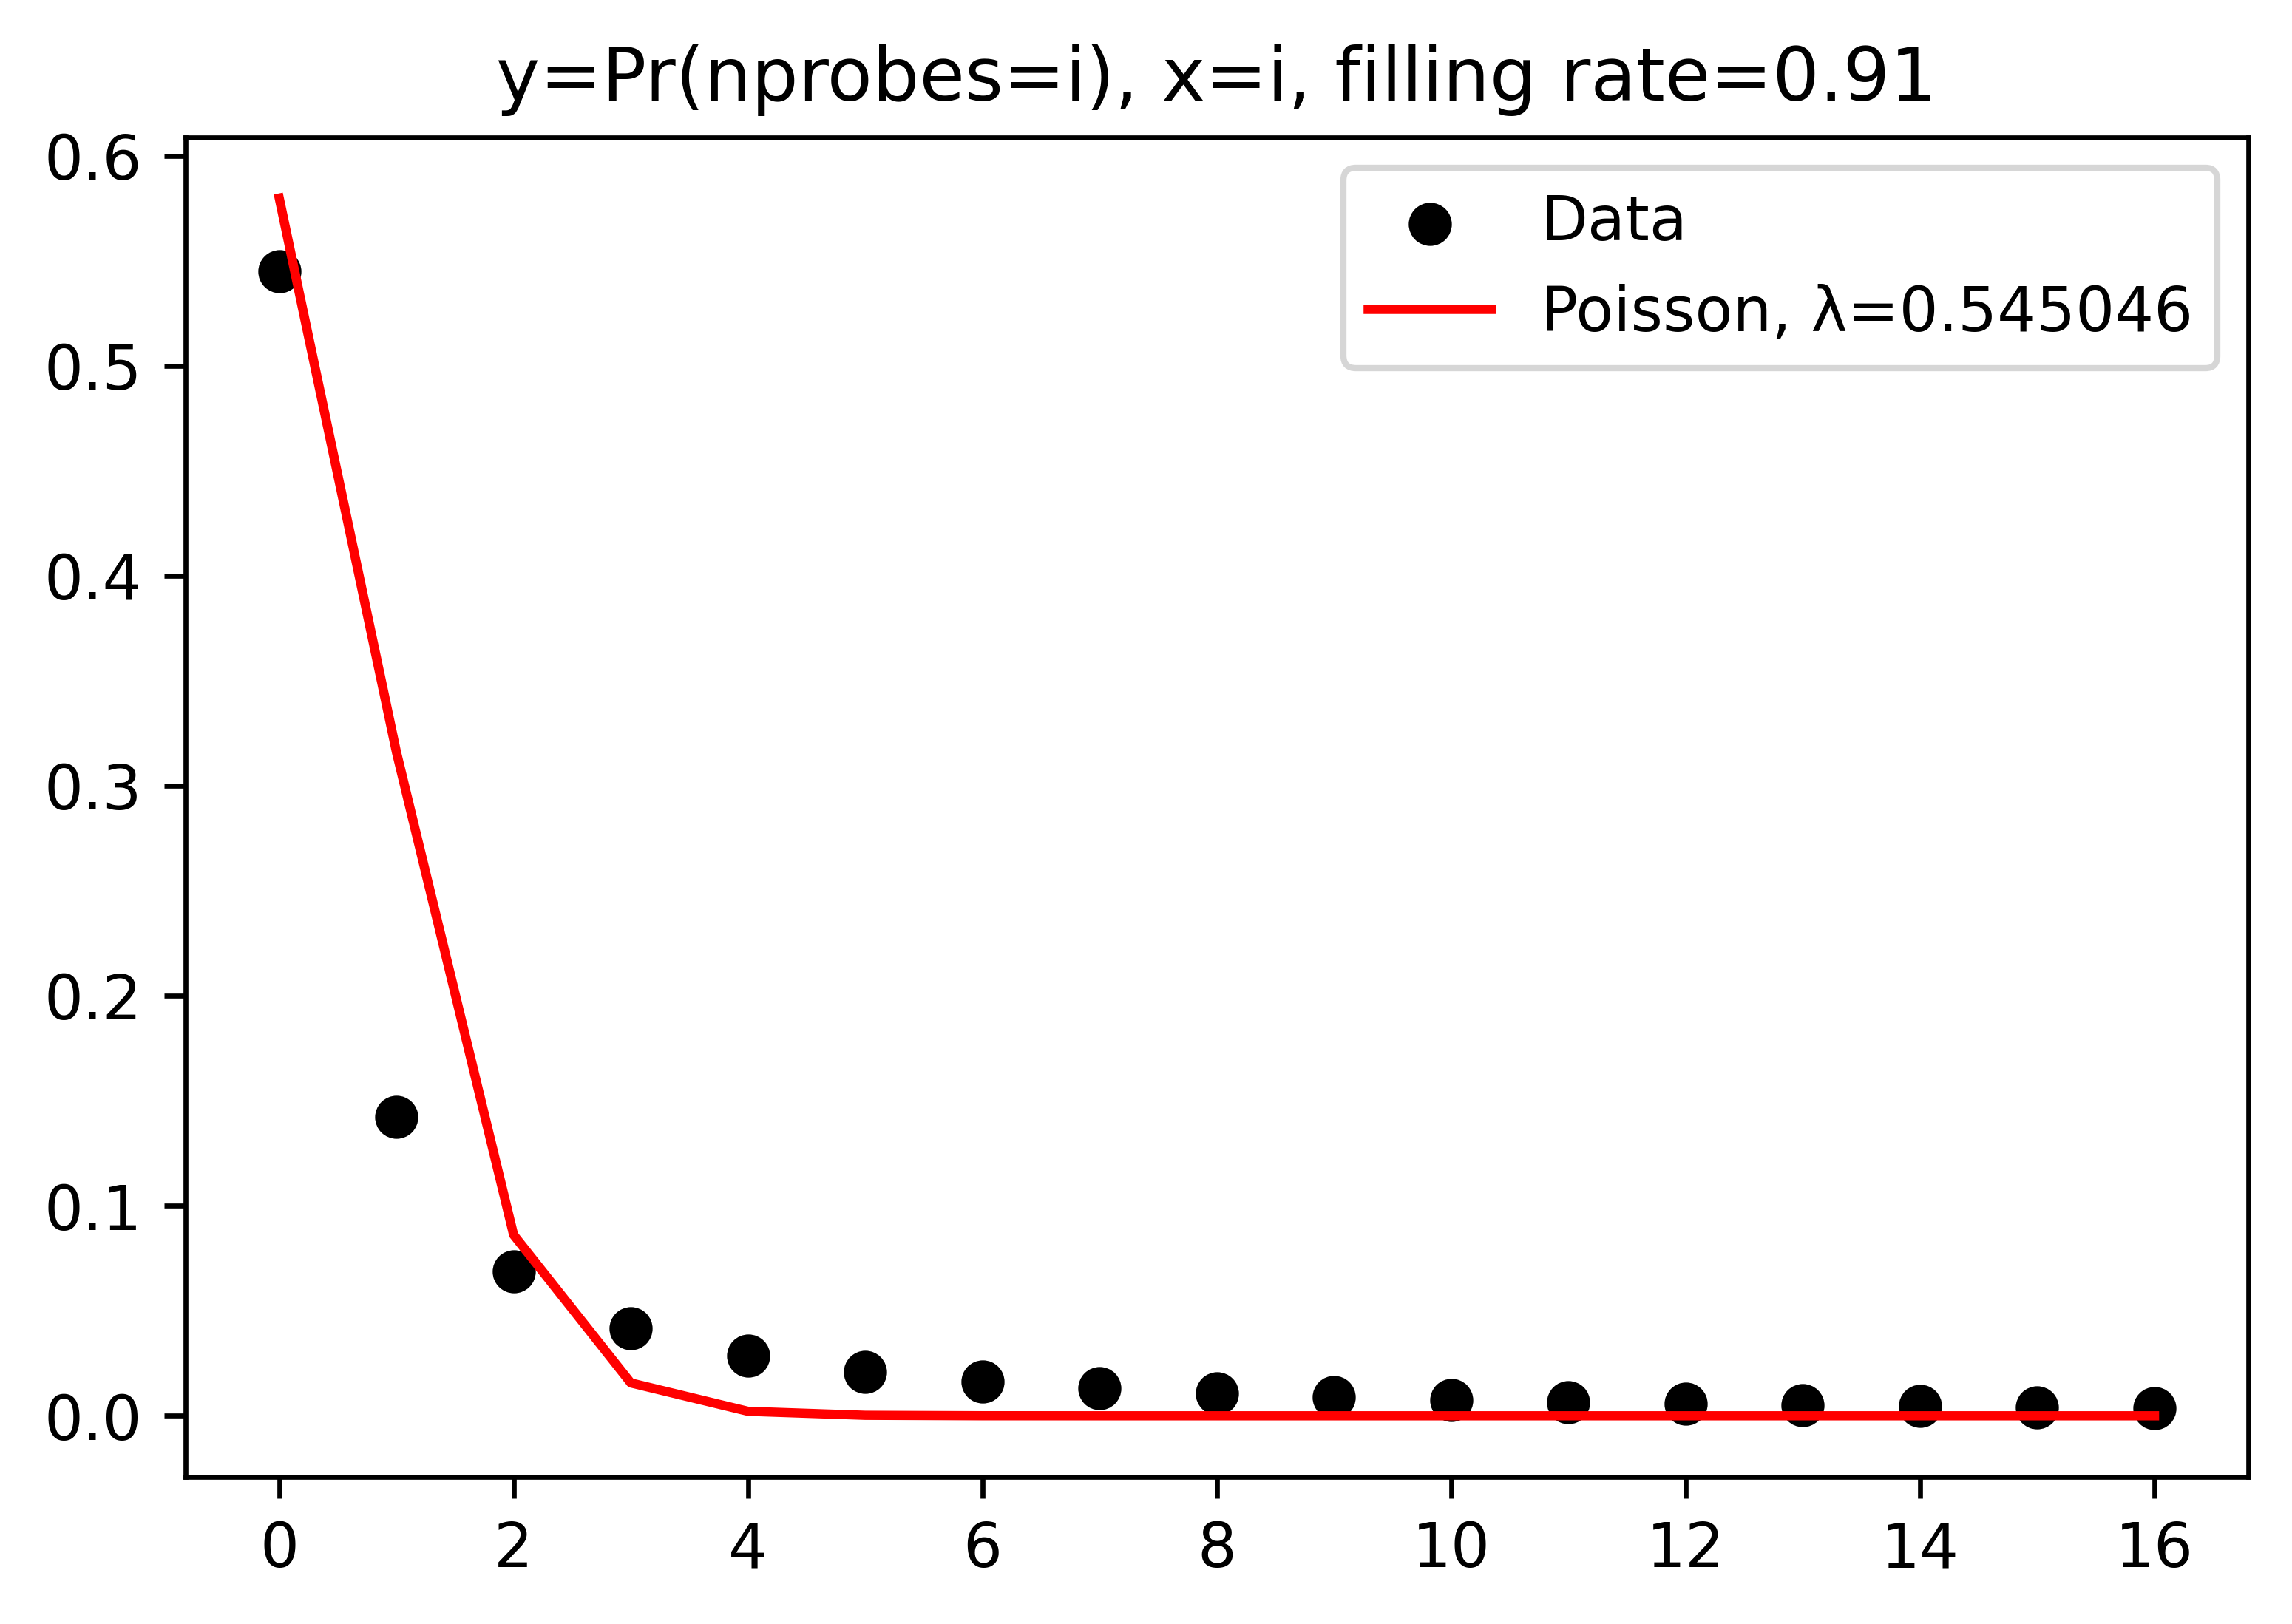

None

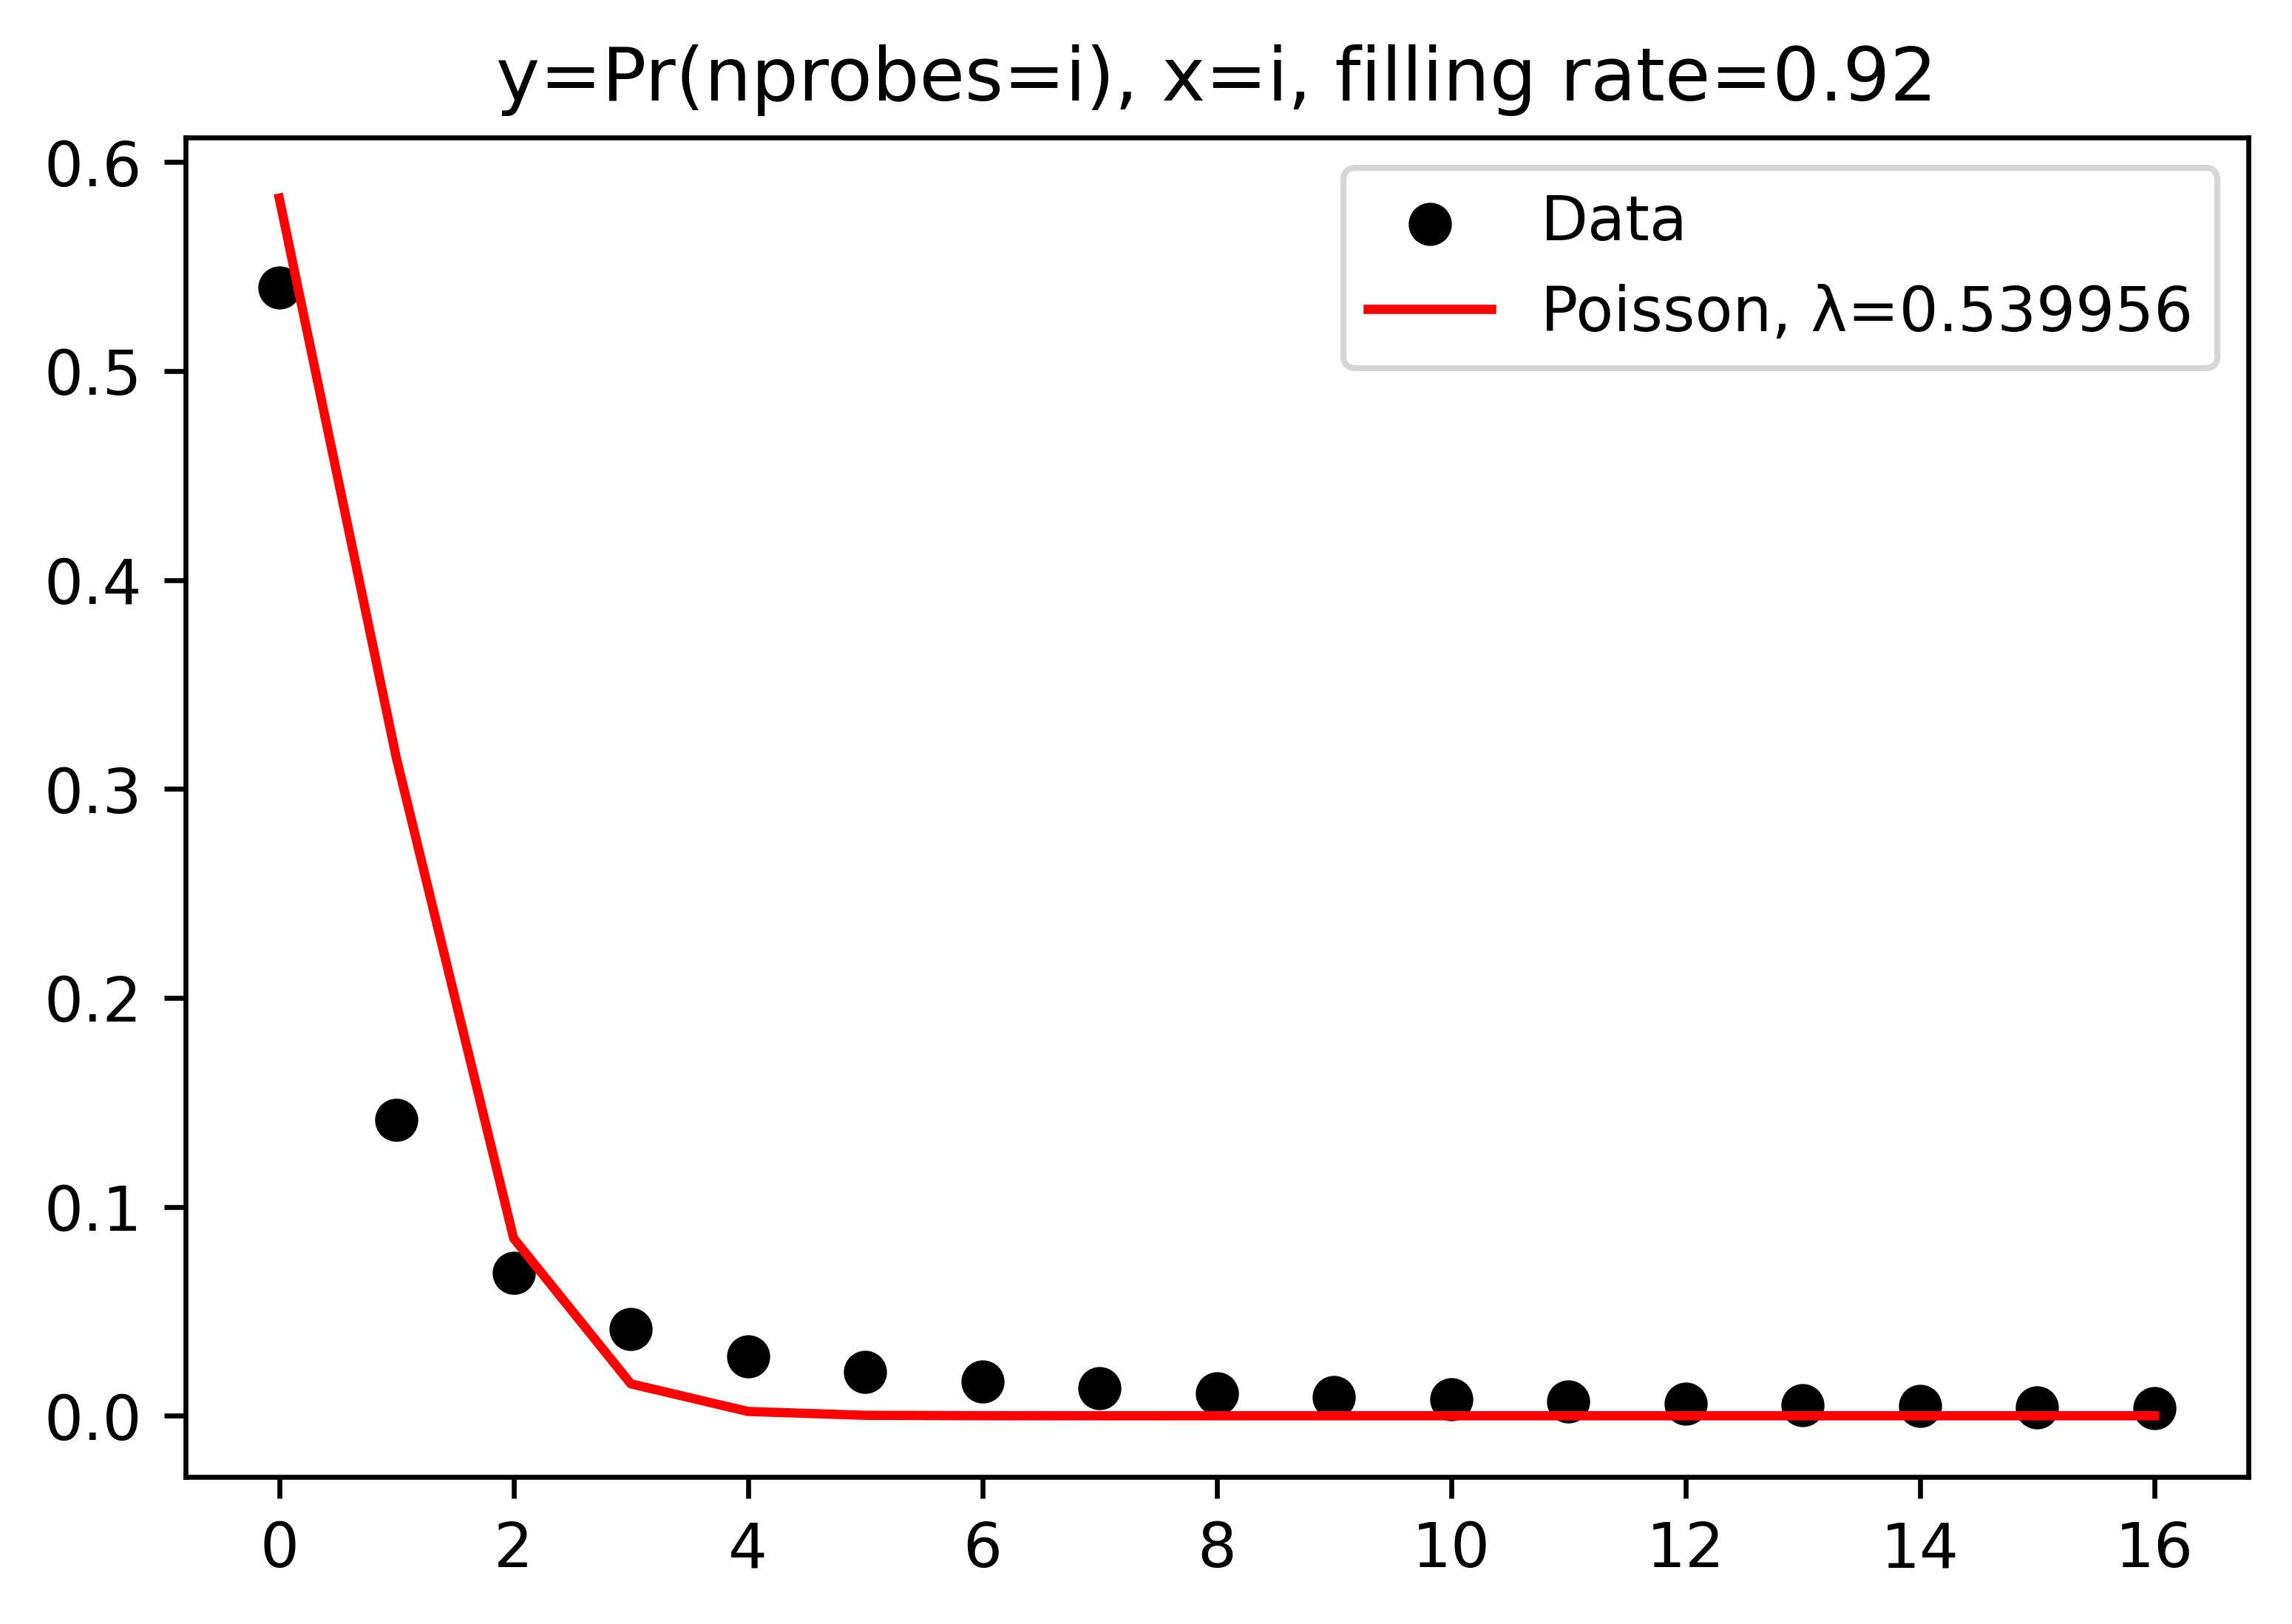

None

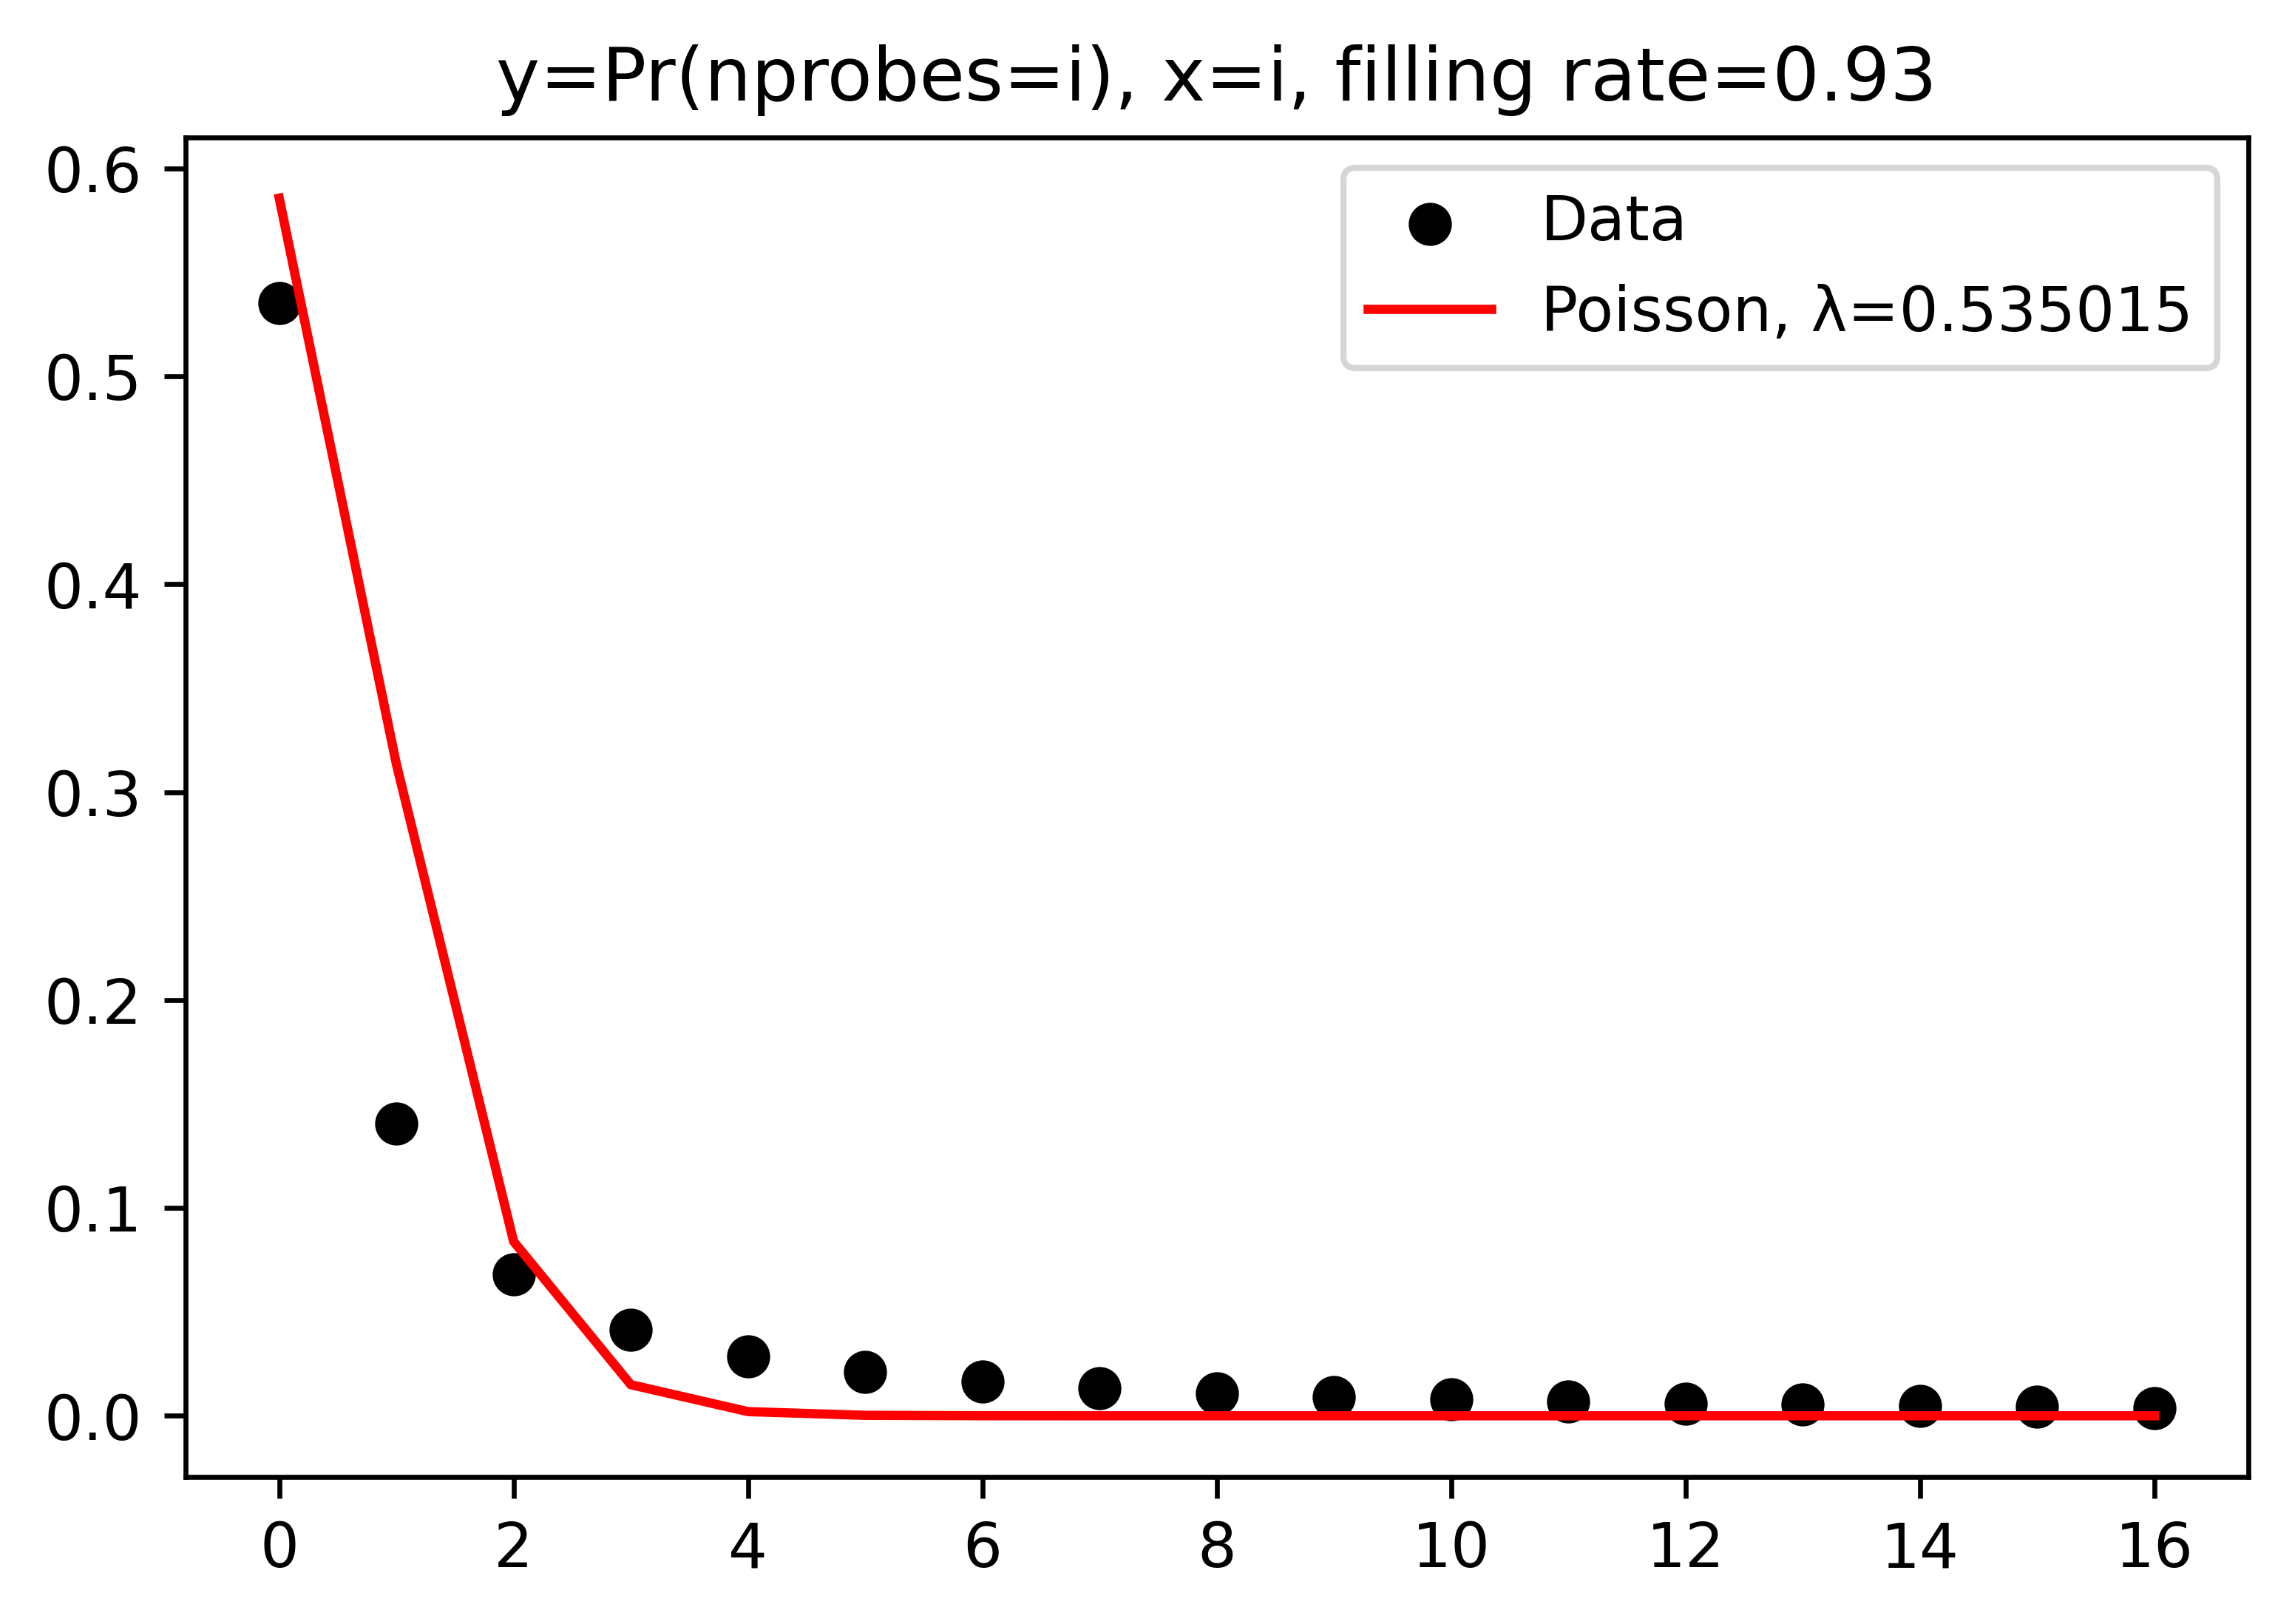

None

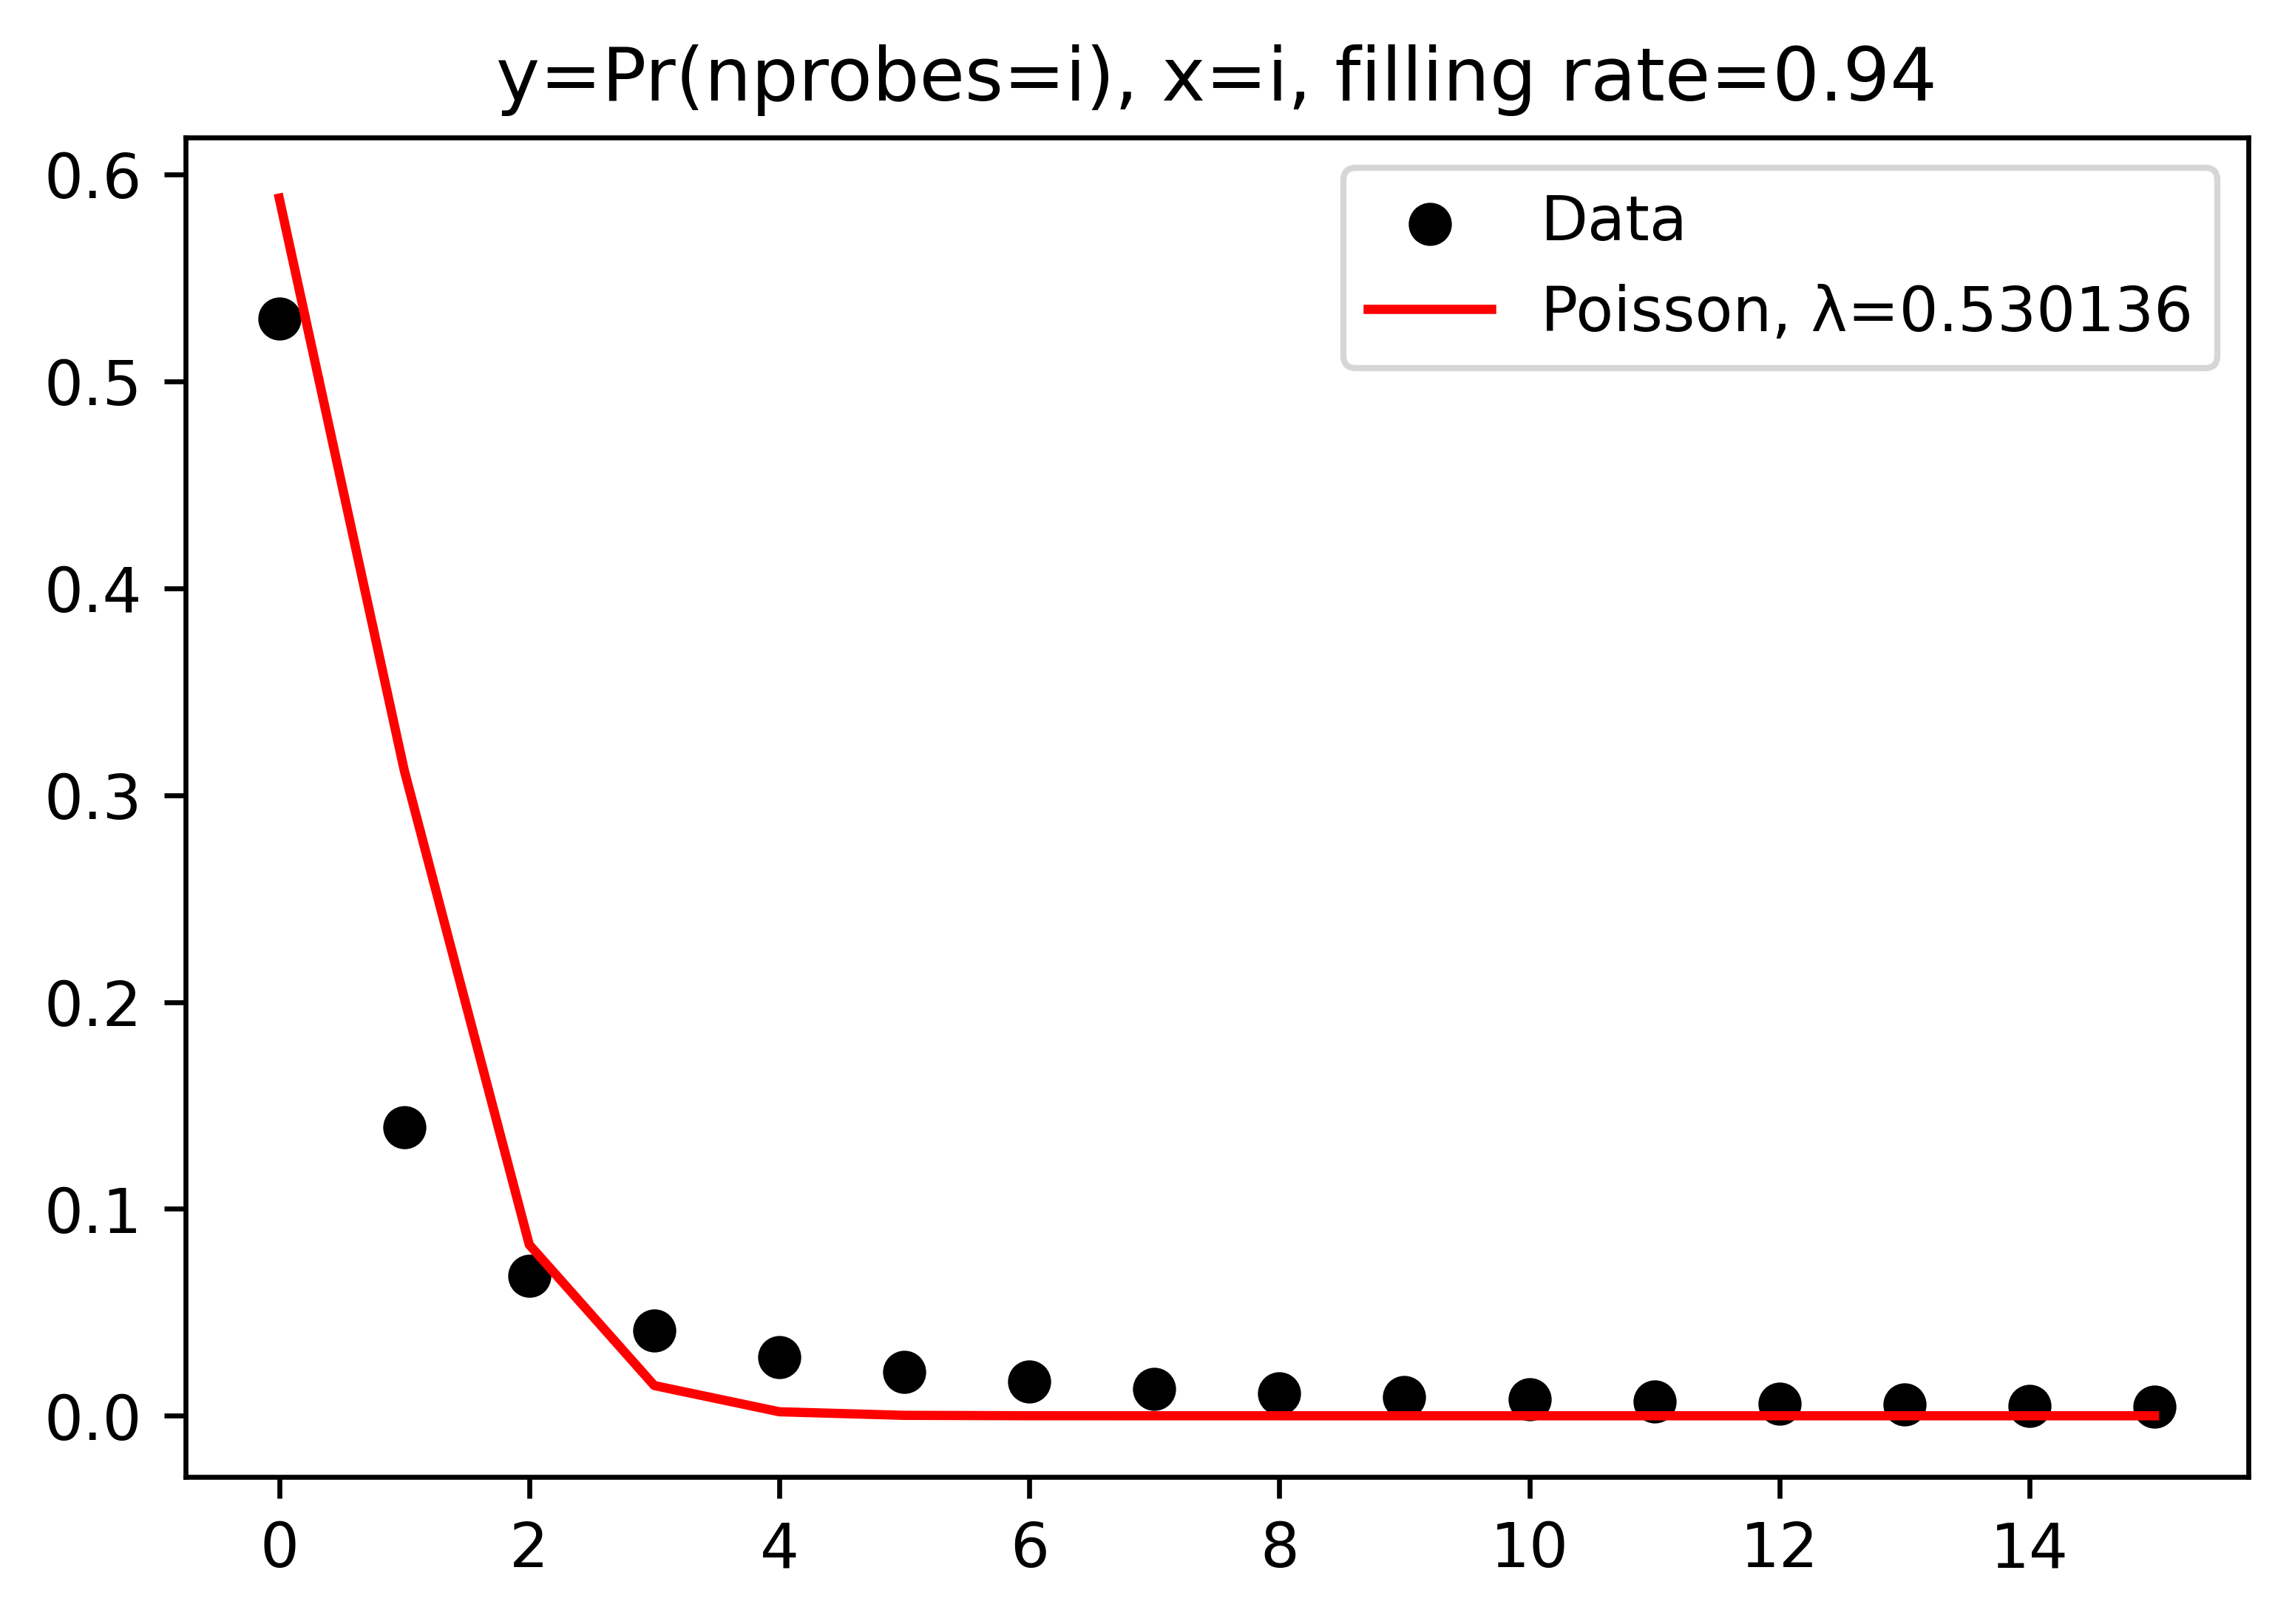

None

In [2]:
# work here

# Edit filling rate for the c files
for k in range(45):
    
    filling_rate = round(0.5 + k/100.0, 3)
    lines = []
    with open("include/config.h", "r") as f:
        for line in f:
            if line[:20] == "#define FILLING_RATE":
                line = "#define FILLING_RATE " + str(filling_rate) + "\n"

            lines.append(line)


    with open("include/config.h", "w") as f:
        f.writelines(lines)       

    # compile and save data in data.py
    os.system("make clean -s")
    os.system("make -s")
    os.system(f"./main > data.py")


    # load the data, and process them
    import data # data is created after calling c code
    importlib.reload(data)



    # mean for poisson is the first element since 
    # Pr(X=0) = mean
    #print(data.mean)

    nelements = float(sum(data.r_seq))


    # Plotting
    # Preparation
    # x-axis
    n = len(data.r_seq) 
    r_seq_prob = [i/nelements for i in data.r_seq]

    # x,y-axis
    n = int(30*data.mean+1) # just truncate the plotting
    y_data = r_seq_prob[:n]
    x_data = [i for i in range(n)]


    #print(r_seq_prob)
    sum(r_seq_prob)


    # Our guess it follows Poisson
    Poisson = lambda x, l: l^x * e^(-l) / gamma(x+1)
    Poisson2 = lambda x: Poisson(x, data.mean)

    from scipy import optimize


    # Actual plotting
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 4), dpi=600)
    plt.scatter(x_data, y_data, c='black', label="Data")
    #plt.plot(x_data, d_max(x_data, a, b), 
    #         label='Fitted function', c='b')

    poisson = [Poisson2(x) for x in x_data]
    plt.plot(x_data, poisson, 
             label=f'Poisson, λ={data.mean}', c='r')


    plt.legend(loc='best')

    plt.title(f'y=Pr(nprobes=i), x=i, filling rate={round(filling_rate, 2)}')


    # force the plot to show in the latex
    show(plt.show())

In [4]:

filling_rate = 0.9
lines = []
with open("include/config.h", "r") as f:
    for line in f:
        if line[:20] == "#define FILLING_RATE":
            line = "#define FILLING_RATE " + str(filling_rate) + "\n"

        lines.append(line)


with open("include/config.h", "w") as f:
    f.writelines(lines)       

# compile and save data in data.py
os.system("make clean -s")
os.system("make -s")
os.system(f"./main > data.py")


# load the data, and process them
import data # data is created after calling c code
importlib.reload(data)



# mean for poisson is the first element since 
# Pr(X=0) = mean
#print(data.mean)

nelements = float(sum(data.r_seq))


# Plotting
# Preparation
# x-axis
n = len(data.r_seq) 
r_seq_prob = [i/nelements for i in data.r_seq]

r_seq_cum = [sum(r_seq_prob[:i]) for i in range(len(r_seq_prob))]

print(r_seq_cum[:int(40*data.mean+1)])


[0, 0.5499114988651851, 0.6933802247885908, 0.7624503000681997, 0.8042413668180111, 0.8327768733087897, 0.8537488944808742, 0.8698931990144235, 0.8827910711605629, 0.8933801830652649, 0.9022487740196716, 0.9098066266893625, 0.9163196676725167, 0.9219915067997696, 0.9269879346870208, 0.9314458932505129, 0.9354067481876877, 0.9389980238640734, 0.9422598044749577, 0.9452027294684578, 0.9479164443906146, 0.9504123337489373]


In [5]:
40*data.mean

21.99644